In [1]:

import yaml
import matplotlib.pyplot as plt
# from train_eval.trainer import Trainer
import torch
import torch.nn as nn
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ["MKL_NUM_THREADS"] = "16"
os.environ["NUMEXPR_NUM_THREADS"] = "16"
os.environ["OMP_NUM_THREADS"] = "16"


### To be added:
1. Add_object function should exclude samples from validation and trainval split
2. Check the maximal radius of the data extracted from online result and use it in matching data extraction
3. More visualization on the matching part
4. Use different thresholds to test matching scores (draw plot)
5. Test HOME baseline, add yaw angle  

In [2]:
from datasets.nuScenes.nuScenes_graphs_match import NuScenesGraphs_MATCH
from datasets.nuScenes.prediction import PredictHelper_occ
from nuscenes import NuScenes
data_dir = "preprocess_graph_match_add_lane_info"
data_root = "/home/stanliu/data/mnt/nuScenes/"
with open("configs/match_train_augment.yml", 'r') as yaml_file:
    cfg = yaml.safe_load(yaml_file)
version = cfg["version"]
nusc=NuScenes(version, data_root)
helper =PredictHelper_occ(nusc)
train_set = NuScenesGraphs_MATCH('load_data', data_dir, cfg['test_set_args'],helper)


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 78.172 seconds.
Reverse indexing ...
Done reverse indexing in 9.5 seconds.


In [ ]:
from datasets.nuScenes.nuScenes_graphs_match import get_tr_scenes
get_tr_scenes('train',nusc)

In [17]:
sample=train_set.__getitem__(0)
sample.keys()

dict_keys(['instance_token', 'sample_token', 'origin', 'lane_node_feats', 'lane_node_masks', 's_next', 'edge_type', 'node_nums', 'lane_ctrs', 'history', 'history_mask', 'future', 'future_mask'])

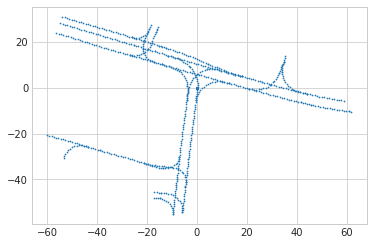

In [18]:
plt.scatter(sample['lane_node_feats'][:,:,0],sample['lane_node_feats'][:,:,1],s=0.5)

In [19]:
from datasets.nuScenes.nuScenes_graphs_match import NuScenesGraphs_MATCH
from datasets.nuScenes.prediction import PredictHelper_occ
from nuscenes import NuScenes
data_dir1 = "preprocess_graph_match_augment"
data_root = "/home/stanliu/data/mnt/nuScenes/"
with open("configs/match_debug.yml", 'r') as yaml_file:
    cfg = yaml.safe_load(yaml_file)
version = cfg["version"]
# nusc=NuScenes(version, data_root)
# helper =PredictHelper_occ(nusc)
train_set1 = NuScenesGraphs_MATCH('load_data', data_dir1, cfg['test_set_args'],helper)


In [28]:
sample1=train_set1.__getitem__(0)
sample1.keys()

dict_keys(['instance_token', 'sample_token', 'origin', 'lane_node_feats', 'lane_node_masks', 'node_nums', 'lane_ctrs', 'history', 'history_mask', 'future', 'future_mask'])

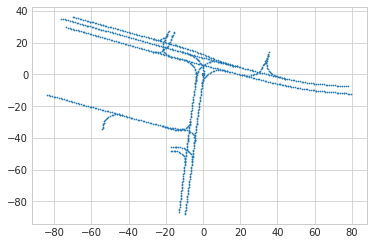

In [27]:
plt.scatter(sample1['lane_node_feats'][:,:,0],sample1['lane_node_feats'][:,:,1],s=0.5)

In [31]:
num_nodes=sample['lane_node_feats'].shape[0]
(sample1['lane_node_feats'][:num_nodes,:,0]-sample['lane_node_feats'][:,:,0]).sum()

tensor(-4547.8462)

In [37]:
sample1['future']

tensor([[[-3.0818e+01,  2.1673e+01,  1.2566e+00,  ...,  1.1900e+01,
          -9.0902e+00,  2.9214e+00],
         [-2.6274e+01,  2.0212e+01,  1.2566e+00,  ...,  1.1400e+01,
          -8.4256e+00,  2.7806e+00],
         [-2.2067e+01,  1.8824e+01,  1.2101e+00,  ...,  1.0901e+01,
          -7.8730e+00,  3.0680e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[-2.0265e+01,  1.7602e+01,  1.2628e+00,  ...,  4.5000e+00,
          -1.1532e+01,  3.6683e+00],
         [-1.4500e+01,  1.5769e+01,  1.2628e+00,  ...,  4.0001e+00,
          -8.8025e+00,  2.7991e+00],
         [-1.0100e+01,  1.4369e+01,  1.2628e+00,  ...,  3.5003e+00,
          -9.4812e+00,  2.9439e+00],
         ...,
         [ 0.0000e+00,  0

In [36]:
sample['future']

tensor([[[-30.8179,  21.6727,   1.2566,  ...,  11.8997,  -9.0902,   2.9214],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[-20.2648,  17.6022,   1.2628,  ...,   4.5000, -11.5322,   3.6683],
         [-14.5003,  15.7685,   1.2628,  ...,   4.0001,  -8.8025,   2.7991],
         [-10.1001,  14.3694,   1.2628,  ...,   3.5003,  -9.4812,   2.9439],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[ 45.8317,  -3.6971,   1.3183,  ...

In [ ]:
nusc=NuScenes('v1.0-trainval', data_root)
helper =PredictHelper_occ(nusc)

In [ ]:
import numpy as np
import numpy.linalg as LA
from tqdm import tqdm
from nuscenes.eval.prediction.splits import get_prediction_challenge_split
category_list = ['vehicle']
sample_list=[]
if helper.data.version == 'v1.0-trainval':
    trainval_token_list= get_prediction_challenge_split('train_val',helper.data.dataroot)
    train_token_list= get_prediction_challenge_split('train',helper.data.dataroot)
    val_token_list= get_prediction_challenge_split('val',helper.data.dataroot)
    trainval_token_list+=train_token_list
    trainval_token_list+=val_token_list
print(len(trainval_token_list))


def get_categ(my_string):
    class0=my_string.split(".")[0]
    if class0=="vehicle" and (my_string.split(".")[1]=="bicycle" or my_string.split(".")[1]=="motorcycle"):
        class0="bicycle"
    return class0
disp_list=[]
dynamic_sample_list=[]
static_sample_list=[]
for instance in tqdm(helper.data.instance):
    cat=get_categ(helper.data.get('category', instance['category_token'])['name'])
    i_t = instance['token']
    if cat in category_list and instance['nbr_annotations']>35:
        token=instance['first_annotation_token']
        
        for idx in range(instance['nbr_annotations']):
            metadata=helper.data.get('sample_annotation', token)
            
            sample_token=metadata['sample_token']

            
            if idx==0:
                prev_pose=np.array(metadata['translation'][:-1]).copy()          
            # print(num_lidar_pts)

            displacement=LA.norm(np.array(metadata['translation'][:-1])-np.array(prev_pose),ord=2)
            disp_list.append(displacement)
            if displacement<=5.0 and displacement>1e-3 and (idx>6 and idx<(instance['nbr_annotations']-int((6+2.5)*2))):
                tokens=i_t+'_'+prev_sample
                if not (tokens in trainval_token_list):
                    dynamic_sample_list.append(tokens)
                # print('Occlusion happens! \n')
            # print(idx)
            elif  displacement<1e-3 and (idx>6 and idx<(instance['nbr_annotations']-int((6+2.5)*2))):
                tokens=i_t+'_'+prev_sample
                if not (tokens in trainval_token_list):
                    static_sample_list.append(tokens)
    # print('Occlusion happens! \n')
            # print(idx)
            token=metadata['next']
            prev_pose=np.array(metadata['translation'][:-1])
            prev_sample=sample_token
print('dynamic list',len(dynamic_sample_list))
print('static list',len(static_sample_list))

In [12]:
print('static list',len(static_sample_list))

static list 26960


In [ ]:
plt.hist(disp_list,bins=20)

In [5]:
print(len(trainval_token_list))

49787


In [20]:
from datasets.nuScenes.nuScenes_graphs_occ_v2 import NuScenesGraphs_OCC
from datasets.nuScenes.prediction import PredictHelper_occ
from nuscenes import NuScenes
data_dir = "preprocess_graph_occ_mini_test"
data_root = "/home/stanliu/data/mnt/nuScenes/"
with open("configs/occlusion_train.yml", 'r') as yaml_file:
    cfg = yaml.safe_load(yaml_file)
version = 'v1.0-mini'
nusc=NuScenes(version, data_root)
helper =PredictHelper_occ(nusc)
train_set = NuScenesGraphs_OCC('load_data', data_dir, cfg['train_set_args'],helper)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 1.891 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


In [3]:
data=train_set.__getitem__(0)

In [13]:
len(train_set)

980

In [6]:
inputs=data['inputs']
inputs.keys()

dict_keys(['instance_token', 'sample_token', 'map_representation', 'target_agent_representation', 'origin'])

In [ ]:
inputs['target_agent_representation']['concat_motion']

In [ ]:
inputs['target_agent_representation']['history']['mask']

In [4]:
def get_categ(my_string):
    class0=my_string.split(".")[0]
    if class0=="vehicle" and (my_string.split(".")[1]=="bicycle" or my_string.split(".")[1]=="motorcycle"):
        class0="bicycle"
    return class0
sensor = 'LIDAR_TOP'
len(nusc.instance)

911

In [3]:
nusc=NuScenes('v1.0-trainval', data_root)
helper =PredictHelper_occ(nusc)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 123.644 seconds.
Reverse indexing ...
Done reverse indexing in 16.6 seconds.


In [9]:
inputs['target_agent_representation'].keys()

dict_keys(['history', 'future', 'concat_motion', 'time_query', 'refine_input'])

In [ ]:
concat_motion=inputs['target_agent_representation']['concat_motion']
concat_motion

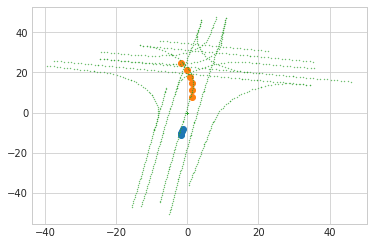

In [28]:
plt.scatter(hist[:,1],hist[:,0])
plt.scatter(future[:,1],future[:,0])
plt.scatter(lanes[:,1],lanes[:,0],s=0.1)

In [ ]:
import numpy as np
from collections import defaultdict
import random
import copy
# def getitem(sample,training=True):
training=True
ret_dict=copy.deepcopy(sample)
inputs=ret_dict['inputs']
hist_length=inputs['target_agent_representation']['history'].shape[0]
future_length=inputs['target_agent_representation']['future'].shape[0]
if training:
    history_frames=random.randint(1,hist_length)
    future_frames=random.randint(1,future_length)
else:
    history_frames=5
    future_frames=5
history=inputs['target_agent_representation']['history'][-history_frames:]
future=inputs['target_agent_representation']['future'][-future_frames:]
concat_motion=inputs['target_agent_representation']['concat_motion'][-future_length-history_frames:hist_length+future_frames]
refine_input=inputs['target_agent_representation']['refine_input'][hist_length-history_frames:-(future_length-future_frames)]
if training:
    history_loc_noise=np.random.randn(*history[:,:2].shape)*1.5
    history_yaw_noise=np.random.randn(*history[:,2].shape)*np.pi/2
    history[:,:2]+=history_loc_noise
    concat_motion[:history_frames,:2]+=history_loc_noise
    refine_input[:history_frames,:2]+=history_loc_noise
    history[:,2]+=history_yaw_noise
    concat_motion[:history_frames,2]+=history_yaw_noise[::-1]
    refine_input[:history_frames,2]+=history_yaw_noise[::-1]
    history[:,3]=np.cos(history[:,2])
    history[:,4]=np.sin(history[:,2])
    concat_motion[:history_frames,3]=np.cos(concat_motion[:history_frames,2])
    refine_input[:history_frames,3]=np.cos(refine_input[:history_frames,2])
    concat_motion[:history_frames,4]=np.sin(concat_motion[:history_frames,2])
    refine_input[:history_frames,4]=np.sin(refine_input[:history_frames,2])
    
    future_loc_noise=np.random.randn(*future[:,:2].shape)*1.5
    future_yaw_noise=np.random.randn(*future[:,2].shape)*np.pi/2
    future[:,:2]+=future_loc_noise
    concat_motion[-future_frames:,:2]+=future_loc_noise[::-1]
    refine_input[-future_frames:,:2]+=future_loc_noise[::-1]
    future[:,2]+=future_yaw_noise
    concat_motion[-future_frames:,2]+=future_yaw_noise[::-1]
    refine_input[-future_frames:,2]+=future_yaw_noise[::-1]
    future[:,3]=np.cos(future[:,2])
    future[:,4]=np.sin(future[:,2])
    concat_motion[-future_frames:,3]=np.cos(concat_motion[-future_frames:,2])
    refine_input[-future_frames:,3]=np.cos(refine_input[-future_frames:,2])
    concat_motion[-future_frames:,4]=np.sin(concat_motion[-future_frames:,2])
    refine_input[-future_frames:,4]=np.sin(refine_input[-future_frames:,2])
hist, hist_masks = self.list_to_tensor([history], 1, int(self.t_h * 2 + 1), 6,False)
future, future_masks = self.list_to_tensor([future], 1, int(self.t_h * 2 + 1), 6,False)
concat_motion, concat_masks = self.list_to_tensor([concat_motion], 1, int(self.t_h * 2 + 1)*2, 7,False)
concat_refine_input, concat_refine_mask = self.list_to_tensor(refine_input, 1, int((self.t_f-2) * 2 + 1)+int(self.t_h * 2 + 1)*2, 6,False)
history={'traj':np.squeeze(hist,0),'mask':np.squeeze(hist_masks,0)}
future={'traj':np.squeeze(future,0),'mask':np.squeeze(future_masks,0)}
concat={'traj':np.squeeze(concat_motion,0),'mask':np.squeeze(concat_masks,0)}
refine_input={'traj':np.squeeze(concat_refine_input,0),'mask':np.squeeze(concat_refine_mask,0)}
target_agent_representation={'history':history,'future':future,'concat_motion':concat,'time_query':inputs['target_agent_representation']['time_query'],'refine_input':refine_input}

In [9]:
sample['inputs'].keys()

dict_keys(['instance_token', 'sample_token', 'map_representation', 'surrounding_agent_representation', 'target_agent_representation', 'origin', 'agent_node_masks'])

In [3]:
import torch
import torch.utils.data as torch_data
from datasets.nuScenes.nuScenes_graphs_match import match_collate
tr_dl = torch_data.DataLoader(train_set, 12, shuffle=True,
                        num_workers=12, pin_memory=True,collate_fn=match_collate)

In [4]:
for i in tr_dl:
    data=i
    break

In [7]:
train_set.augment=False

In [5]:
import copy
batch_list=[]
for i in range(4):
    sample=copy.deepcopy(train_set.__getitem__(i))
    batch_list.append(sample)
sample.keys()

dict_keys(['instance_token', 'sample_token', 'origin', 'lane_node_feats', 'lane_node_masks', 's_next', 'edge_type', 'node_nums', 'lane_ctrs', 'history', 'history_mask', 'future', 'future_mask'])

In [8]:
sample=train_set.__getitem__(i)

In [ ]:
from datasets.nuScenes.prediction import PredictHelper_occ
from return_device import return_device
from nuscenes.prediction.input_representation.static_layers import *
from nuscenes.prediction.input_representation.combinators import Rasterizer
from train_eval.utils import *
from pyquaternion import Quaternion
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
layer_names = ['drivable_area', 'ped_crossing']
maps= load_all_maps(helper)
instance_token=sample['instance_token']
sample_token=sample['sample_token']
colors = [(255, 255, 255), (119, 136, 153)]
cmap = mpl.cm.cool
def local_pose_to_image(local_poses,pose_mask,resolution,img_size,arror_length=None):
    '''local_poses: [T,4] 
    mask: [T]
    '''
    if arror_length is None:
        arror_length=8
    y_m=np.asarray(local_poses[:,1][pose_mask].cpu())
    x_m=np.asarray(local_poses[:,0][pose_mask].cpu())
    img_origin=np.round(np.asarray(img_size)/2).astype(np.int)
    x=img_origin[1]+x_m*resolution
    y=img_origin[0]-y_m*resolution
    yaw=np.asarray((local_poses[:,2][pose_mask]).cpu())
    dy=-np.sin(yaw+np.pi/2)*arror_length
    dx=np.cos(yaw+np.pi/2)*arror_length
    return x,y,dx,dy
dist=np.max((LA.norm(sample['lane_node_feats'][:,:,:2],ord=2,axis=-1)))

origin=tuple(sample['origin'])
image_side_length = 2 * max(25,dist-16)
image_side_length_pixels = 400
resolution=image_side_length_pixels/image_side_length
patchbox = get_patchbox(origin[0], origin[1], image_side_length)

angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi
sample_annotation = helper.get_sample_annotation(instance_token, sample_token)
map_name = helper.get_map_name_from_sample_token(sample_token)
canvas_size = (image_side_length_pixels, image_side_length_pixels)
masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)

images = []
for mask, color in zip(masks, colors):
    images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))
image = Rasterizer().combine(images)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
lanes=sample['lane_node_feats'].flatten(0,1).clone()
lanes_mask=~sample['lane_node_masks'].flatten(0,1)[:,0].bool()
history=sample['history'].clone()
history_mask=~sample['history_mask'][:,0].bool()
future=sample['future'].flatten(0,1).clone()
future_mask=~sample['future_mask'].flatten(0,1)[:,0].bool()
xsl, ysl, dxsl, dysl=local_pose_to_image(lanes,lanes_mask,resolution,canvas_size,2.0)
xs, ys, dxs, dys = local_pose_to_image(history,history_mask,resolution,canvas_size,5)
xsf, ysf, dxsf, dysf = local_pose_to_image(future,future_mask,resolution,canvas_size,5)



# for x, y, dx, dy in zip(xsl, ysl, dxsl, dysl):
#     ax.arrow(x, y, dx, dy, width=0.4, color=(1,0.5,0,0.1))
for x, y, dx, dy in zip(xs, ys, dxs, dys):
    ax.arrow(x, y, dx, dy, width=2.0, color=(1,0,0,1))
# for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
#     ax.arrow(x, y, dx, dy, width=0.8, color=(0,0,1,1))
ax.scatter(xsl, ysl,s=3,color='orange',alpha=1.0)
valid_length=((~sample['future_mask'][:,:,0].bool()).any(-1)).sum()
# ax.scatter(xs, ys,s=50,color='r',marker="*")
for idx in range(len(sample['future'])):
    vehicles=sample['future'][idx]
    masks=~(sample['future_mask'][idx,:,0]).bool()
    if masks.any():
        xsf, ysf, dxsf, dysf = local_pose_to_image(vehicles,masks,resolution,canvas_size,2)
        # x,y=vehicles[:,0],vehicles[:,1]
        color=cmap(1-(idx+1)/valid_length)
        for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
            ax.arrow(x, y, dx, dy ,width=1.25,color=color)
ax.grid(False)
ax.imshow(image)

/home/stanliu/.local/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/stanliu/.local/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


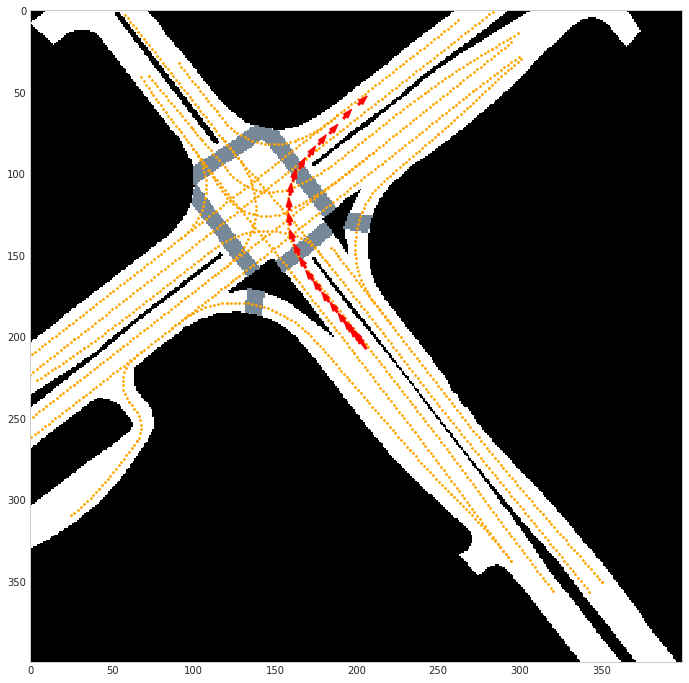

In [10]:
from datasets.nuScenes.prediction import PredictHelper_occ
from return_device import return_device
from nuscenes.prediction.input_representation.static_layers import *
from nuscenes.prediction.input_representation.combinators import Rasterizer
from train_eval.utils import *
from pyquaternion import Quaternion
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
layer_names = ['drivable_area', 'ped_crossing']
maps= load_all_maps(helper)
instance_token=sample['instance_token']
sample_token=sample['sample_token']
colors = [(255, 255, 255), (119, 136, 153)]
cmap = mpl.cm.cool
def local_pose_to_image(local_poses,pose_mask,resolution,img_size,arror_length=None):
    '''local_poses: [T,4] 
    mask: [T]
    '''
    if arror_length is None:
        arror_length=8
    y_m=np.asarray(local_poses[:,1][pose_mask].cpu())
    x_m=np.asarray(local_poses[:,0][pose_mask].cpu())
    img_origin=np.round(np.asarray(img_size)/2).astype(np.int)
    x=img_origin[1]+x_m*resolution
    y=img_origin[0]-y_m*resolution
    yaw=np.asarray((local_poses[:,2][pose_mask]).cpu())
    dy=-np.sin(yaw+np.pi/2)*arror_length
    dx=np.cos(yaw+np.pi/2)*arror_length
    return x,y,dx,dy
dist=np.max((LA.norm(sample['lane_node_feats'][:,:,:2],ord=2,axis=-1)))

origin=tuple(sample['origin'])
image_side_length = 2 * max(25,dist-16)
image_side_length_pixels = 400
resolution=image_side_length_pixels/image_side_length
patchbox = get_patchbox(origin[0], origin[1], image_side_length)

angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi
sample_annotation = helper.get_sample_annotation(instance_token, sample_token)
map_name = helper.get_map_name_from_sample_token(sample_token)
canvas_size = (image_side_length_pixels, image_side_length_pixels)
masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)

images = []
for mask, color in zip(masks, colors):
    images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))
image = Rasterizer().combine(images)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
lanes=sample['lane_node_feats'].flatten(0,1).clone()
lanes_mask=~sample['lane_node_masks'].flatten(0,1)[:,0].bool()
history=sample['history'].clone()
history_mask=~sample['history_mask'][:,0].bool()
future=sample['future'].flatten(0,1).clone()
future_mask=~sample['future_mask'].flatten(0,1)[:,0].bool()
xsl, ysl, dxsl, dysl=local_pose_to_image(lanes,lanes_mask,resolution,canvas_size,2.0)
xs, ys, dxs, dys = local_pose_to_image(history,history_mask,resolution,canvas_size,5)
xsf, ysf, dxsf, dysf = local_pose_to_image(future,future_mask,resolution,canvas_size,5)



# for x, y, dx, dy in zip(xsl, ysl, dxsl, dysl):
#     ax.arrow(x, y, dx, dy, width=0.4, color=(1,0.5,0,0.1))
for x, y, dx, dy in zip(xs, ys, dxs, dys):
    ax.arrow(x, y, dx, dy, width=1.25, color=(1,0,0,1))
# for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
#     ax.arrow(x, y, dx, dy, width=0.8, color=(0,0,1,1))
ax.scatter(xsl, ysl,s=3,color='orange',alpha=1.0)
valid_length=((~sample['future_mask'][:,:,0].bool()).any(-1)).sum()
# ax.scatter(xs, ys,s=50,color='r',marker="*")
for idx in range(len(sample['future'])):
    vehicles=sample['future'][idx]
    masks=~(sample['future_mask'][idx,:,0]).bool()
    if idx==0:
        xsf, ysf, dxsf, dysf = local_pose_to_image(vehicles,masks,resolution,canvas_size,2)
        # x,y=vehicles[:,0],vehicles[:,1]
        color=cmap(1-(idx+1)/valid_length)
        for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
            ax.arrow(x, y, dx, dy ,width=1.25,color=(1,0,0,1))
ax.grid(False)
ax.imshow(image)

In [24]:
sample['inputs'].keys()

dict_keys(['instance_token', 'sample_token', 'map_representation', 'target_agent_representation', 'origin'])

In [ ]:
lanes=sample['inputs']['map_representation']['lane_node_feats']
lane_masks=sample['inputs']['map_representation']['lane_node_masks']

In [ ]:
sample=sample['inputs']
plt.figure(figsize=(10,10))
x,y=sample['map_representation']['lane_node_feats'][:,:,0],sample['map_representation']['lane_node_feats'][:,:,1]
plt.scatter(x,y,s=3,color='r',alpha=0.1)

# x,y=sample['map_representation']['lane_ctrs'][:,0],sample['map_representation']['lane_ctrs'][:,1]
# plt.scatter(x,y,s=5,color='g',alpha=0.8)
target_future=sample['target_agent_representation']['history']['traj']
x,y=target_future[:,0],target_future[:,1]
plt.scatter(x,y,s=15,color='g')

# x,y=vehicles[:,:,0],vehicles[:,:,1]
# plt.scatter(x,y,s=12,alpha=0.5)

x,y=sample['target_agent_representation']['history']['traj'][:,0],sample['target_agent_representation']['history']['traj'][:,1]
plt.scatter(x,y,s=15)

In [ ]:
import numpy as np
target_history_mask=sample['target_agent_representation']['history']['traj'][:,-1]>history_mask_time
target_history=sample['target_agent_representation']['history']['traj'][target_history_mask]
target_history_velo=sample['target_agent_representation']['history']['velo'][target_history_mask]
target_history=np.concatenate((target_history,target_history_velo),axis=-1)
target_history=np.concatenate((target_history,np.zeros([int(train_set.t_h*2)+1-target_history.shape[0],target_history.shape[1]])),axis=0)
target_history_mask=np.concatenate((target_history_mask,np.ones([int(train_set.t_h*2)+1-target_history_mask.shape[0]])),axis=0)
target_history_mask=np.repeat(target_history_mask[:,np.newaxis],target_history.shape[1],axis=1)
target_history.shape

In [8]:
import numpy.random as random
last_time=sample['target_agent_representation']['last_time']-0.1
mask_time=random.random()*(last_time-1.5)+1.5
target_future_mask=sample['target_agent_representation']['future']['traj'][:,-1]>mask_time
future_velocity=sample['target_agent_representation']['future']['velo'][target_future_mask]
target_future=np.concatenate((sample['target_agent_representation']['future']['traj'][target_future_mask],future_velocity),axis=-1)[-(int(train_set.t_h*2)+1):]
# gt_traj=sample['inputs']['target_agent_representation']['future']['traj'][~target_future_mask]

In [9]:
sample['target_agent_representation']['future']['traj'][target_future_mask].shape

(12, 6)

In [10]:
import numpy as np
import copy
last_times=np.array(sample['surrounding_agent_representation']['last_times'])-0.1
mask_times=random.random(last_times.shape)*(last_times-1.5)+1.0
# residual=last_times-mask_times
# res_mask=residual>2.5
# mask_times[res_mask]+=residual[res_mask]*random.random(residual[res_mask].shape)
vehicles=sample['surrounding_agent_representation']['vehicles']
gt=np.concatenate((target_future,np.zeros([vehicles.shape[1]-target_future.shape[0],target_future.shape[-1]])))[np.newaxis,:,:]
gt_mask=(gt==0)
mask_times=np.concatenate((mask_times,np.ones(len(vehicles)-len(mask_times)))).reshape(-1,1)
agent_masks=(vehicles[:,:,-1]<mask_times)
vehicles=np.concatenate((vehicles,sample['surrounding_agent_representation']['velocity']),axis=-1)
vehicles[agent_masks]=0
masks=np.repeat(agent_masks[:,:,np.newaxis],vehicles.shape[-1],axis=-1)

masks=np.concatenate((gt_mask,masks),axis=0)
all_vehicles=np.concatenate((gt,vehicles),axis=0)

# masks=(vehicles[:,:,-1]>mask_times).reshape(1,1,-1).repeat(1,1,vehicles.shape(-1))
# masks[0]
# vehicles[~masks]=0.0
# vehicles

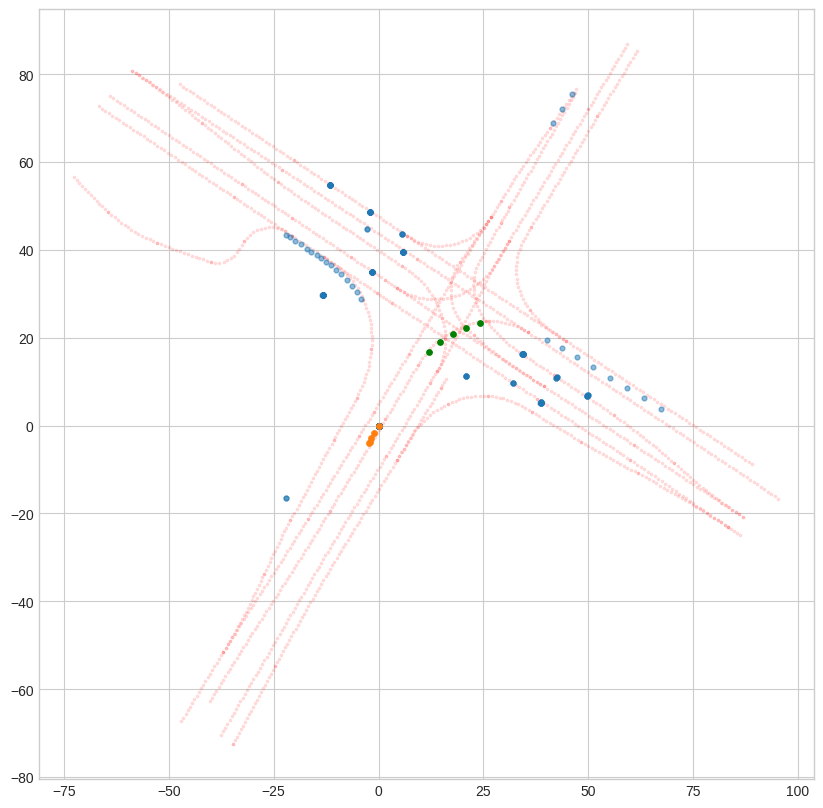

In [15]:
plt.figure(figsize=(10,10))
x,y=sample['map_representation']['lane_node_feats'][:,:,0],sample['map_representation']['lane_node_feats'][:,:,1]
plt.scatter(x,y,s=3,color='r',alpha=0.1)

# x,y=sample['map_representation']['lane_ctrs'][:,0],sample['map_representation']['lane_ctrs'][:,1]
# plt.scatter(x,y,s=5,color='g',alpha=0.8)

x,y=target_future[:,0],target_future[:,1]
plt.scatter(x,y,s=15,color='g')

x,y=vehicles[:,:,0],vehicles[:,:,1]
plt.scatter(x,y,s=12,alpha=0.5)

x,y=sample['target_agent_representation']['history']['traj'][:,0],sample['target_agent_representation']['history']['traj'][:,1]
plt.scatter(x,y,s=15)

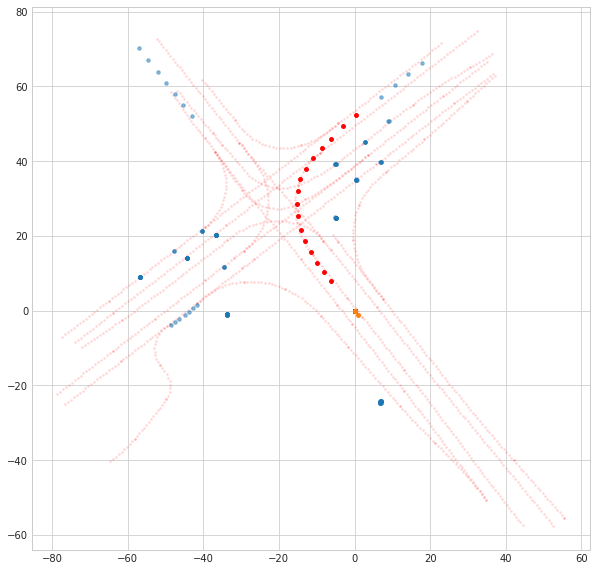

In [31]:
plt.figure(figsize=(10,10))
x,y=sample['lane_node_feats'][:,:,0],sample['lane_node_feats'][:,:,1]
plt.scatter(x,y,s=3,color='r',alpha=0.1)

# x,y=sample['map_representation']['lane_ctrs'][:,0],sample['map_representation']['lane_ctrs'][:,1]
# plt.scatter(x,y,s=5,color='g',alpha=0.8)
target_future=sample['future'][0]
x,y=target_future[:,0],target_future[:,1]
plt.scatter(x,y,s=15,color='r')

vehicles=sample['future'][1:]
x,y=vehicles[:,:,0],vehicles[:,:,1]
plt.scatter(x,y,s=12,alpha=0.5)

x,y=sample['history'][:,0],sample['history'][:,1]
plt.scatter(x,y,s=15)

In [12]:
sample.keys()

dict_keys(['instance_token', 'sample_token', 'origin', 'node_seq_gt', 'lane_node_feats', 'lane_node_masks', 's_next', 'edge_type', 'node_nums', 'lane_ctrs', 'history', 'history_mask', 'future', 'future_mask'])

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap,Colormap

cmap = mpl.cm.cool

In [60]:
cmap(0.5)

(0.5019607843137255, 0.4980392156862745, 1.0, 1.0)

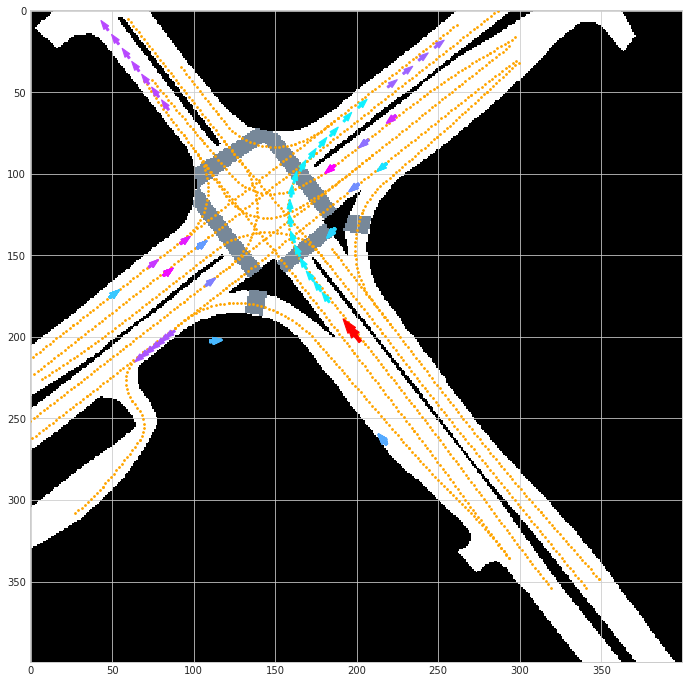

In [64]:
from datasets.nuScenes.prediction import PredictHelper_occ
from return_device import return_device
from nuscenes.prediction.input_representation.static_layers import *
from nuscenes.prediction.input_representation.combinators import Rasterizer
from train_eval.utils import *
from pyquaternion import Quaternion
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
layer_names = ['drivable_area', 'ped_crossing']
maps= load_all_maps(helper)
instance_token=sample['instance_token']
sample_token=sample['sample_token']
colors = [(255, 255, 255), (119, 136, 153)]
cmap = mpl.cm.cool
def local_pose_to_image(local_poses,pose_mask,resolution,img_size,arror_length=None):
    '''local_poses: [T,4] 
    mask: [T]
    '''
    if arror_length is None:
        arror_length=8
    y_m=np.asarray(local_poses[:,1][pose_mask].cpu())
    x_m=np.asarray(local_poses[:,0][pose_mask].cpu())
    img_origin=np.round(np.asarray(img_size)/2).astype(np.int)
    x=img_origin[1]+x_m*resolution
    y=img_origin[0]-y_m*resolution
    yaw=np.asarray((local_poses[:,2][pose_mask]).cpu())
    dy=-np.sin(yaw+np.pi/2)*arror_length
    dx=np.cos(yaw+np.pi/2)*arror_length
    return x,y,dx,dy
dist=np.max((LA.norm(sample['lane_node_feats'][:,:,:2],ord=2,axis=-1)))

origin=tuple(sample['origin'])
image_side_length = 2 * max(25,dist-15)
image_side_length_pixels = 400
resolution=image_side_length_pixels/image_side_length
patchbox = get_patchbox(origin[0], origin[1], image_side_length)

angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi
sample_annotation = helper.get_sample_annotation(instance_token, sample_token)
map_name = helper.get_map_name_from_sample_token(sample_token)
canvas_size = (image_side_length_pixels, image_side_length_pixels)
masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)

images = []
for mask, color in zip(masks, colors):
    images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))
image = Rasterizer().combine(images)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
lanes=sample['lane_node_feats'].flatten(0,1).clone()
lanes_mask=~sample['lane_node_masks'].flatten(0,1)[:,0].bool()
history=sample['history'].clone()
history_mask=~sample['history_mask'][:,0].bool()
future=sample['future'].flatten(0,1).clone()
future_mask=~sample['future_mask'].flatten(0,1)[:,0].bool()
xsl, ysl, dxsl, dysl=local_pose_to_image(lanes,lanes_mask,resolution,canvas_size,2.0)
xs, ys, dxs, dys = local_pose_to_image(history,history_mask,resolution,canvas_size,5)
xsf, ysf, dxsf, dysf = local_pose_to_image(future,future_mask,resolution,canvas_size,5)



# for x, y, dx, dy in zip(xsl, ysl, dxsl, dysl):
#     ax.arrow(x, y, dx, dy, width=0.4, color=(1,0.5,0,0.1))
for x, y, dx, dy in zip(xs, ys, dxs, dys):
    ax.arrow(x, y, dx, dy, width=2.0, color=(1,0,0,1))
# for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
#     ax.arrow(x, y, dx, dy, width=0.8, color=(0,0,1,1))
ax.scatter(xsl, ysl,s=3,color='orange',alpha=1.0)
valid_length=((~sample['future_mask'][:,:,0].bool()).any(-1)).sum()
# ax.scatter(xs, ys,s=50,color='r',marker="*")
for idx in range(len(sample['future'])):
    vehicles=sample['future'][idx]
    masks=~(sample['future_mask'][idx,:,0]).bool()
    if masks.any():
        xsf, ysf, dxsf, dysf = local_pose_to_image(vehicles,masks,resolution,canvas_size,2)
        # x,y=vehicles[:,0],vehicles[:,1]
        color=cmap((idx+1)/valid_length)
        for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
            ax.arrow(x, y, dx, dy ,width=1.25,color=color)
ax.imshow(image)

In [39]:
xsf

array([200.98036, 192.01988, 183.67058, 177.06552, 170.94104, 165.41624,
       161.48126, 159.73022, 159.23857, 159.85315, 161.95093, 165.15381,
       169.11562, 173.60432, 178.18193, 183.27757], dtype=float32)

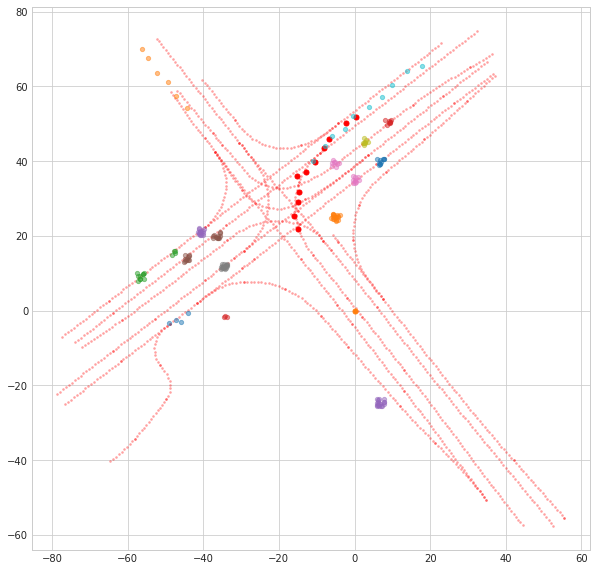

In [19]:
plt.figure(figsize=(10,10))
x,y=sample['lane_node_feats'][:,:,0],sample['lane_node_feats'][:,:,1]
plt.scatter(x,y,s=3,color='r',alpha=0.25)

# x,y=sample['map_representation']['lane_ctrs'][:,0],sample['map_representation']['lane_ctrs'][:,1]
# plt.scatter(x,y,s=5,color='g',alpha=0.8)
target_future=sample['future'][0]
future_mask=~(sample['future_mask'][0,:,0]).bool()
x,y=target_future[:,0],target_future[:,1]
plt.scatter(x[future_mask],y[future_mask],s=25,color='r')

for idx in range(len(sample['future'][1:])):
    vehicles=sample['future'][1+idx]
    masks=~(sample['future_mask'][1+idx,:,0]).bool()
    x,y=vehicles[:,0],vehicles[:,1]
    plt.scatter(x[masks],y[masks],s=18,alpha=0.5)

x,y=sample['history'][:,0],sample['history'][:,1]
masks=~(sample['history_mask'][:,0]).bool()
plt.scatter(x[masks],y[masks],s=25)

In [23]:
sample['inputs']['surrounding_agent_representation'].keys()

dict_keys(['vehicles', 'vehicle_masks', 'last_times'])

In [15]:
print(sample['inputs']['target_agent_representation']['future']['traj'].shape)
print(sample['inputs']['target_agent_representation']['future']['velo'].shape)

(22, 6)
(21, 2)


In [ ]:
import torch.utils.data as torch_data
dl = torch_data.DataLoader(train_set, batch_size=10, shuffle=False, num_workers=8)
stats={}
for i, mini_batch_stats in enumerate(dl):
    for k, v in mini_batch_stats.items():
        if k in stats.keys():
            stats[k] = max(stats[k], torch.max(v).item())
        else:
            stats[k] = torch.max(v).item()

In [69]:
unfold = nn.Unfold(kernel_size=(3, 3), dilation=1, padding=3//2, stride=(1, 1))
unfolded=unfold(test)
unfolded.shape

torch.Size([1, 27, 25])

In [77]:
unfolded.permute(0,2,1).view(1,5,5,-1,9).shape

torch.Size([1, 5, 5, 3, 9])

In [20]:
fold=nn.Fold(output_size=(5, 5), kernel_size=(3, 3), padding=3//2, dilation=1, stride=(1, 1))
fold(unfolded)/test

tensor([[[[4.0000, 6.0000, 6.0000, 6.0000, 4.0000],
          [6.0000, 9.0000, 9.0000, 9.0000, 6.0000],
          [6.0000, 9.0000, 9.0000, 9.0000, 6.0000],
          [6.0000, 9.0000, 9.0000, 9.0000, 6.0000],
          [4.0000, 6.0000, 6.0000, 6.0000, 4.0000]],

         [[4.0000, 6.0000, 6.0000, 6.0000, 4.0000],
          [6.0000, 9.0000, 9.0000, 9.0000, 6.0000],
          [6.0000, 9.0000, 9.0000, 9.0000, 6.0000],
          [6.0000, 9.0000, 9.0000, 9.0000, 6.0000],
          [4.0000, 6.0000, 6.0000, 6.0000, 4.0000]]]])

In [ ]:
def get_unfolded_feature(feature,kernel,mask):
    ## Input shape B,C,H,W
    channel=feature.shape[1]
    unfold = nn.Unfold(kernel_size=(kernel, kernel), dilation=1, padding=kernel//2, stride=(1, 1))
    unfolded_feature=unfold(feature).permute(0,2,1) ## B,Number of slided window, channel*Number of elements in every window
    # unfolded_feature=unfolded_feature.view(unfolded_feature.shape[0],unfolded_feature.shape[1],channel,kernel**2)
    current_node_feat=feature.view(feature.shape[0],channel,-1).permute(0,2,1)## B,Number of slided window, channel
    # unfolded_feature=(unfolded_feature*mask.unsqueeze(-1)).to_sparse()
    # current_node_feat=(current_node_feat*mask.unsqueeze(-1)).to_sparse()
    target_feat=[]
    source_feat=[]
    for idx,batch in enumerate(current_node_feat):
        source_feat.append(batch[mask[idx]])
        target_feat.append(unfolded_feature[idx][mask[idx]])
    return source_feat,target_feat
source_feat,target_feat=get_unfolded_feature(op,15,mask_map)

In [3]:
# with open("configs/pgp_gatx2_lvm_traversal_debug.yml", 'r') as yaml_file:
with open("configs/match_train_augment.yml", 'r') as yaml_file:
    cfg = yaml.safe_load(yaml_file)

In [4]:
from train_eval.trainer import Trainer
from train_eval.visualizer import Visualizer
# from torch.utils.tensorboard import SummaryWriter
# import os
# writer = SummaryWriter(log_dir=os.path.join('/home/stanliu/code/pgp/PGP/output/test_ram', 'tensorboard_logs'))
# trainer = Trainer(cfg, "/home/stanliu/data/mnt/nuScenes/", "/home/stanliu/code/pgp/PGP/preprocess_home","output/test_home_original_9/checkpoints/7.tar")
# visualizer = Visualizer(cfg, "/home/stanliu/data/mnt/nuScenes/", "/home/stanliu/code/pgp/PGP/preprocess_home","output/test_home_original_7/checkpoints/7.tar")
# trainer = Trainer(cfg, "/home/stanliu/data/mnt/nuScenes/", "preprocess_graph_match_mini_test_add_lane_info")
trainer = Trainer(cfg, "/home/stanliu/data/mnt/nuScenes/", "preprocess_graph_match_augment")
# 
# trainer = Trainer(cfg, "/home/stanliu/data/mnt/nuScenes/", "/home/stanliu/code/pgp/PGP/preprocess")

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 2.114 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


In [4]:
from train_eval.evaluator import Evaluator
# from train_eval.visualizer import Visualizer
# from torch.utils.tensorboard import SummaryWriter
# import os
# writer = SummaryWriter(log_dir=os.path.join('/home/stanliu/code/pgp/PGP/output/test_ram', 'tensorboard_logs'))
# trainer = Trainer(cfg, "/home/stanliu/data/mnt/nuScenes/", "/home/stanliu/code/pgp/PGP/preprocess_home","output/test_home_original_9/checkpoints/7.tar")
# visualizer = Visualizer(cfg, "/home/stanliu/data/mnt/nuScenes/", "/home/stanliu/code/pgp/PGP/preprocess_home","output/test_home_original_7/checkpoints/7.tar")
# trainer = Trainer(cfg, "/home/stanliu/data/mnt/nuScenes/", "preprocess_graph_match_mini_test_add_lane_info")
trainer = Evaluator(cfg, "/home/stanliu/data/mnt/nuScenes/", "preprocess_graph_match_augment","output/test_match/augmentation_add_data_b64_05lr/fade/checkpoints/49.tar")

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 85.941 seconds.
Reverse indexing ...
Done reverse indexing in 9.8 seconds.


In [6]:
from train_eval.initialization import initialize_prediction_model, initialize_dataset, get_specific_args
from nuscenes.eval.prediction.splits import get_prediction_challenge_split
from nuscenes.prediction.input_representation.static_layers import StaticLayerRasterizer
from nuscenes.prediction.input_representation.agents import AgentBoxesWithFadedHistory
from nuscenes.prediction.input_representation.interface import InputRepresentation
from nuscenes.prediction.input_representation.combinators import Rasterizer
import train_eval.utils as u
# self=visualizer
# index_list = self.get_vis_idcs_nuscenes()



In [6]:
checkpoint = torch.load("output/test_occ/ugru/v2_augment/checkpoints/9.tar",map_location='cuda:0')
trainer.model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
idcs=index_list[7]
import numpy as np
with torch.no_grad():
    map_extent = self.ds.map_extent
    resolution = 0.1
    static_layer_rasterizer = StaticLayerRasterizer(self.ds.helper,
                                                    resolution=resolution,
                                                    meters_ahead=map_extent[3],
                                                    meters_behind=-map_extent[2],
                                                    meters_left=-map_extent[0],
                                                    meters_right=map_extent[1])

    agent_rasterizer = AgentBoxesWithFadedHistory(self.ds.helper, seconds_of_history=1,
                                                    resolution=resolution,
                                                    meters_ahead=map_extent[3],
                                                    meters_behind=-map_extent[2],
                                                    meters_left=-map_extent[0],
                                                    meters_right=map_extent[1])

    raster_maps = InputRepresentation(static_layer_rasterizer, agent_rasterizer, Rasterizer())

    imgs = []
    for idx in idcs:

        # Load data
        data = self.ds[idx]
        data = u.send_to_device(u.convert_double_to_float(u.convert2tensors(data)))
        data['inputs']['gt_traj']= None
        i_t = data['inputs']['instance_token']
        s_t = data['inputs']['sample_token']

        # Get raster map
        hd_map = raster_maps.make_input_representation(i_t, s_t)
        r, g, b = hd_map[:, :, 0] / 255, hd_map[:, :, 1] / 255, hd_map[:, :, 2] / 255
        hd_map_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

        # Predict
        predictions = self.model(data['inputs'])
        mask_map=predictions['mask'].unsqueeze(1).clone().detach().float()
        prob=predictions['pred'][:,-1].clone().detach().unsqueeze(1)*50
        heatmap=torch.cat((prob,torch.zeros_like(prob),mask_map*10),dim=1)
        origin=torch.round(torch.Tensor([400,244])).int()
        heatmap[:,:,origin[0]-3:origin[0]+4,origin[1]-3:origin[1]+4]=torch.Tensor([[255,0,0]]).unsqueeze(-1).unsqueeze(-1).repeat(1,1,7,7)
        endpoints=predictions['endpoints'].squeeze(0)
        for point in endpoints:
            heatmap[:,:,point[0]-1:point[0]+2,point[1]-1:point[1]+2]=60
        fig, ax = plt.subplots(2, 2, figsize=(20, 20))
        ax[0,0].imshow(hd_map, extent=self.ds.map_extent)
        ax[0,1].imshow(hd_map_gray, cmap='gist_gray', extent=self.ds.map_extent)
        ax[1,0].imshow(heatmap.squeeze(0).permute(1,2,0).cpu(), cmap='gist_gray', extent=self.ds.map_extent)
        ax[1,1].imshow(hd_map_gray, cmap='gist_gray', extent=self.ds.map_extent)
        for n, traj in enumerate(predictions['traj'][0]):
            ax[0,1].plot(traj[:, 0].detach().cpu().numpy(), traj[:, 1].detach().cpu().numpy(), lw=4,
                        color='r', alpha=0.8)
            ax[0,1].scatter(traj[-1, 0].detach().cpu().numpy(), traj[-1, 1].detach().cpu().numpy(), 60,
                            color='r', alpha=0.8)

        traj_gt = data['ground_truth']['traj'][0]
        ax[1,1].plot(traj_gt[:, 0].detach().cpu().numpy(), traj_gt[:, 1].detach().cpu().numpy(), lw=12, color='g')
        ax[1,1].scatter(traj_gt[-1, 0].detach().cpu().numpy(), traj_gt[-1, 1].detach().cpu().numpy(), 80, color='g')

        ax[0,0].axis('off')
        ax[0,1].axis('off')
        ax[1,0].axis('off')
        ax[1,1].axis('off')
        fig.tight_layout(pad=0)
        ax[0,0].margins(0)
        ax[0,1].margins(0)
        ax[1,0].margins(0)
        ax[1,1].margins(0)

        fig.canvas.draw()
        image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # break

In [ ]:
# self = trainer
# self.add_img=False
# with torch.no_grad():
#     val_epoch_metrics = self.run_epoch('val', self.val_dl)
# self.print_metrics(val_epoch_metrics, self.val_dl, mode='val')

In [4]:
indices =  list(range(30312,32186))  # select your indices here as a list  
subset = torch.utils.data.Subset(trainer.tr_dl.dataset, indices)
trainloader = torch.utils.data.DataLoader(subset , batch_size =  36  , shuffle =False,num_workers=6, pin_memory=True) #set shuffle to False 



In [5]:
import train_eval.utils as u
for i,data in enumerate(trainer.tr_dl):
    # torch.cuda.empty_cache()
    # Load data
    data = u.send_to_device(u.convert_double_to_float(data))
    data_test=data['inputs']
    gt_test=data['ground_truth']

    break


In [10]:
trainer.tr_dl.dataset.augment_input

True

In [7]:
trainer.model.eval()
with torch.no_grad():
    predcitions=trainer.model(data_test)

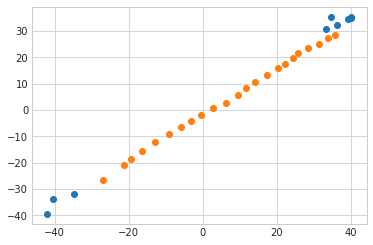

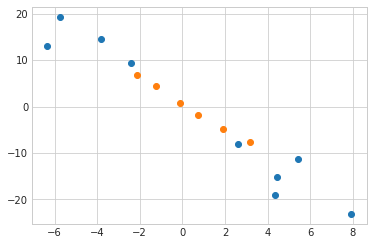

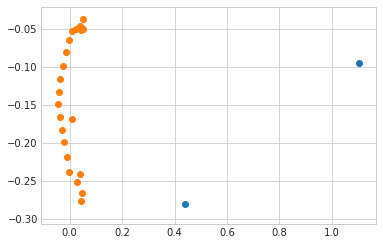

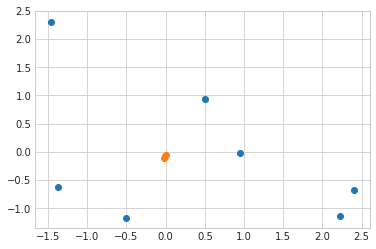

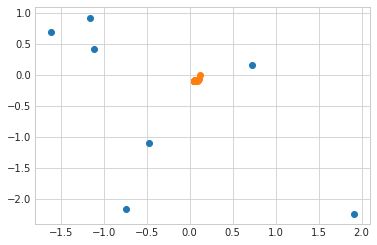

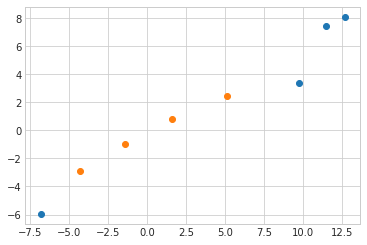

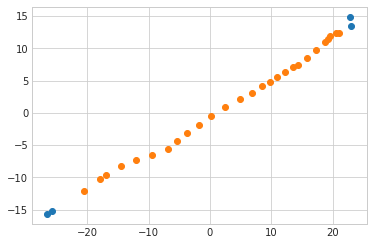

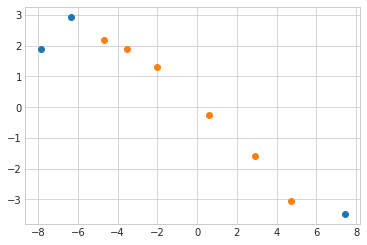

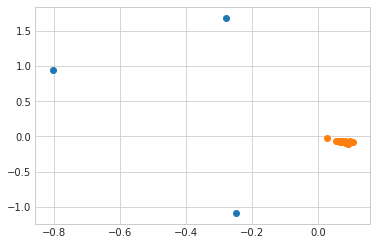

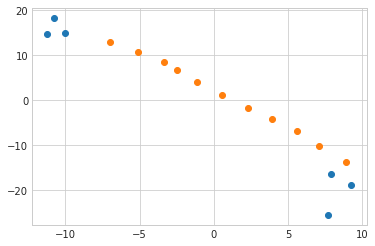

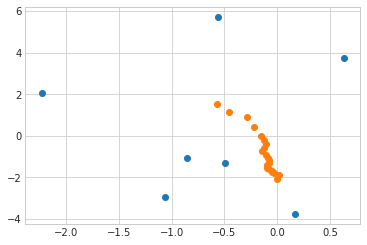

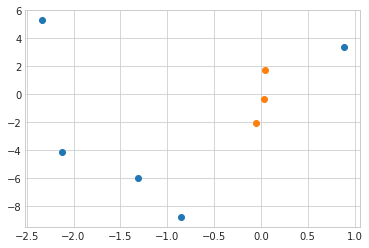

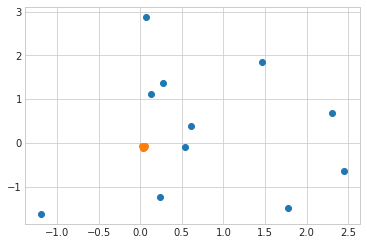

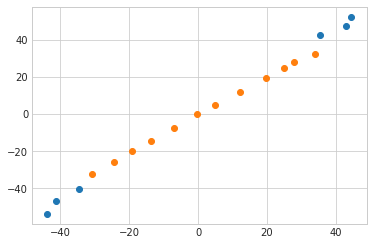

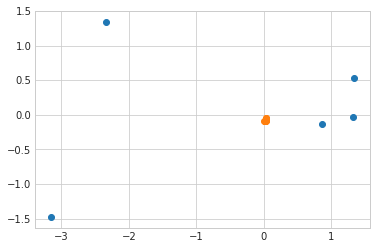

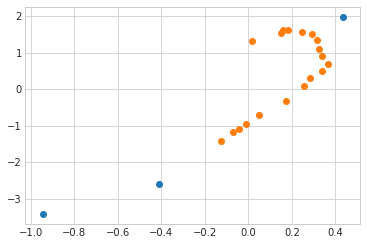

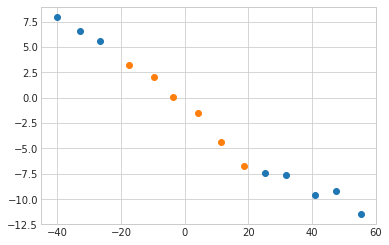

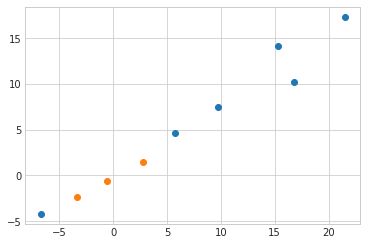

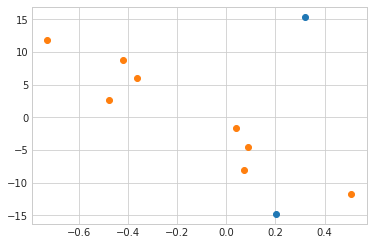

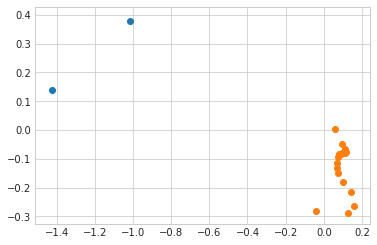

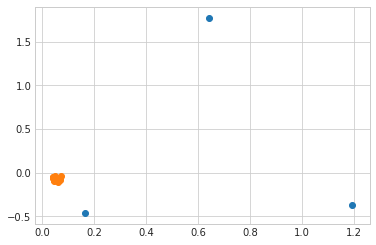

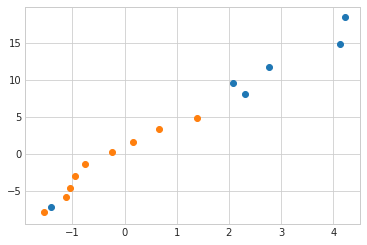

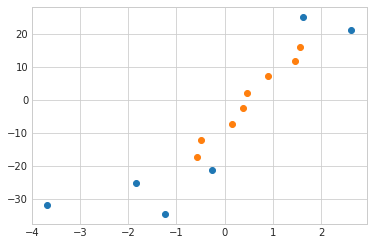

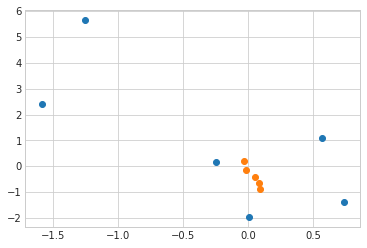

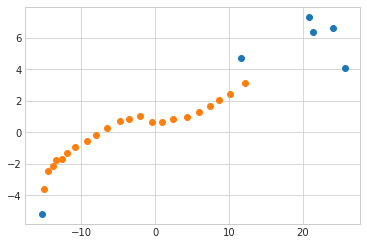

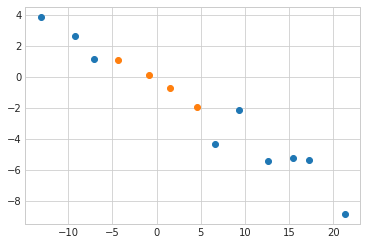

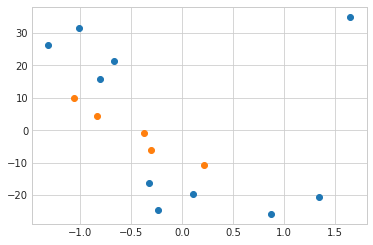

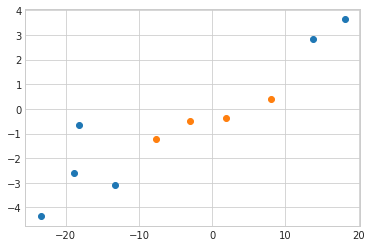

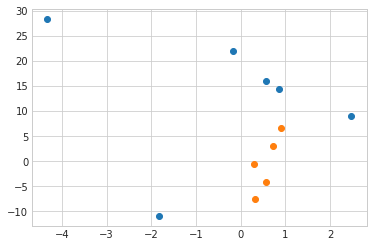

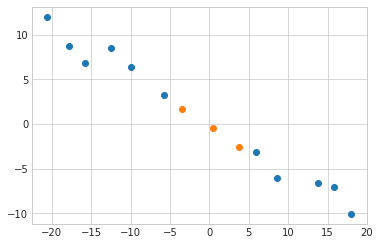

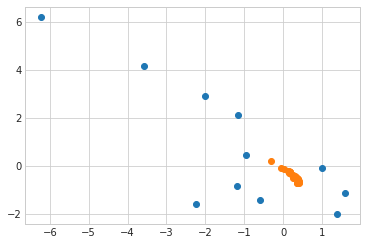

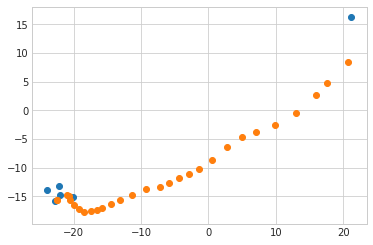

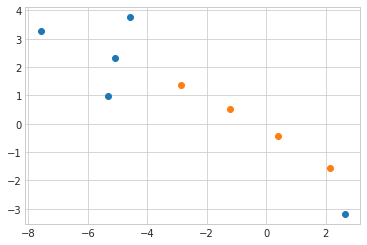

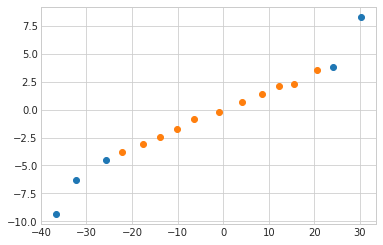

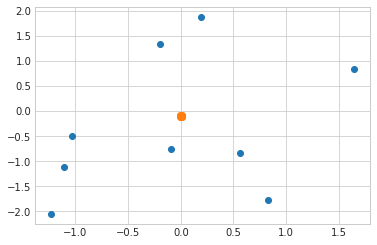

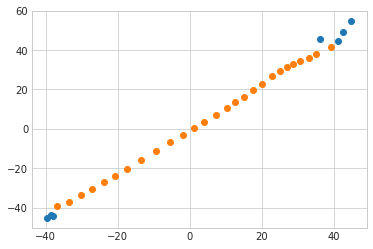

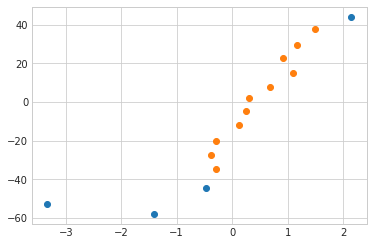

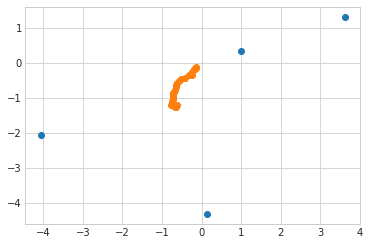

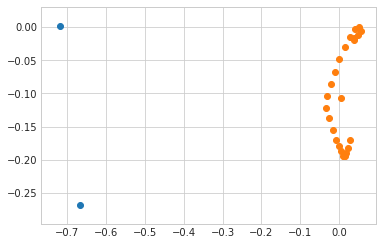

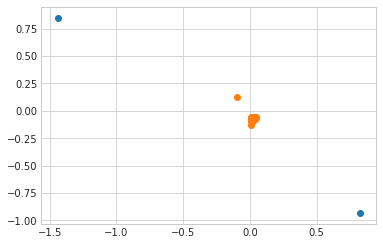

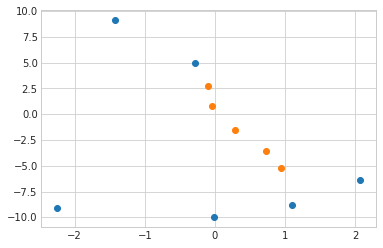

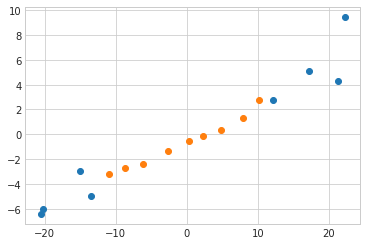

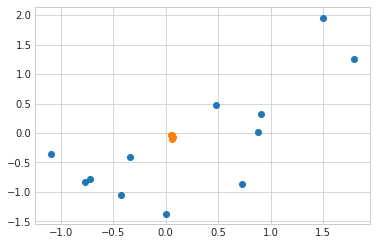

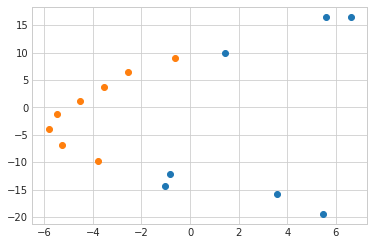

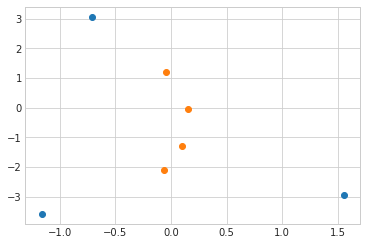

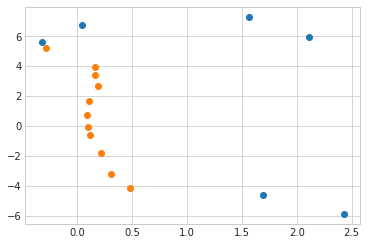

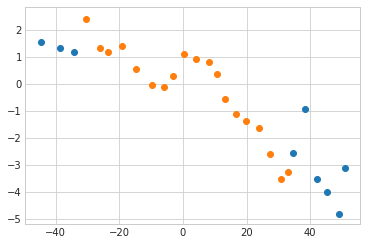

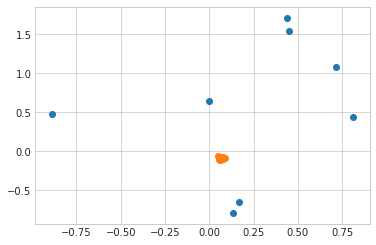

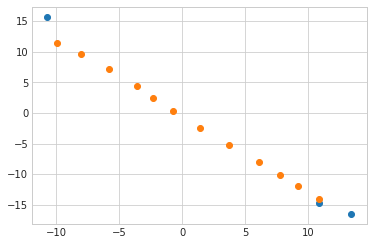

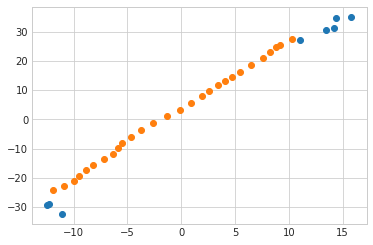

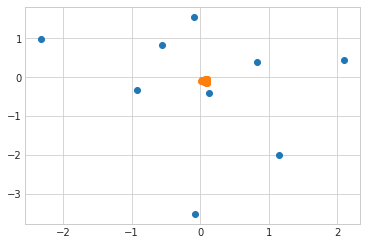

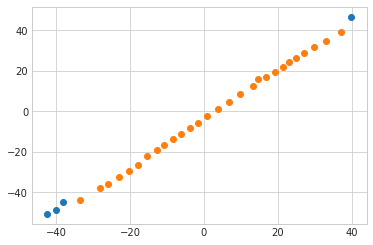

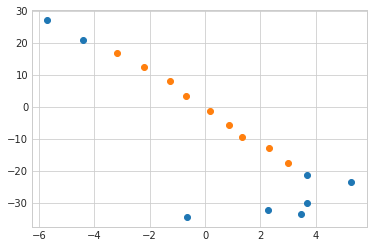

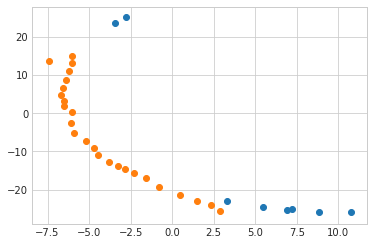

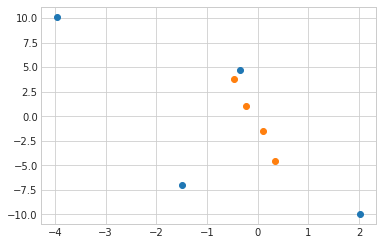

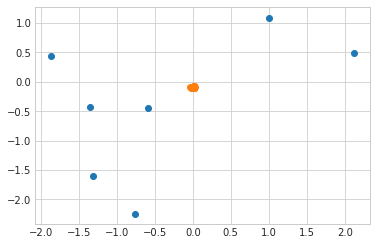

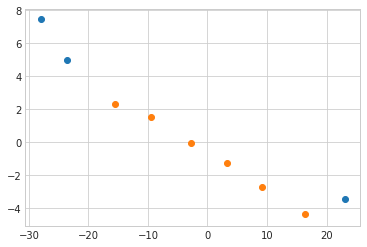

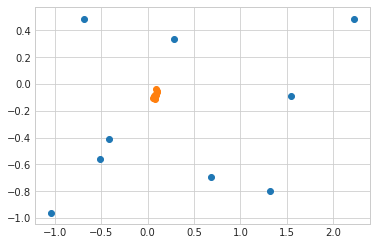

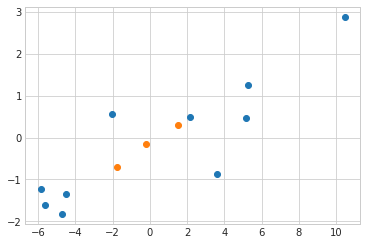

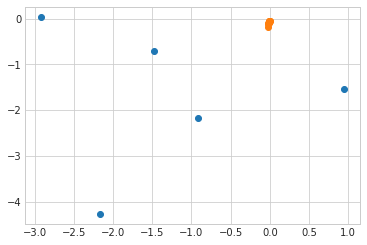

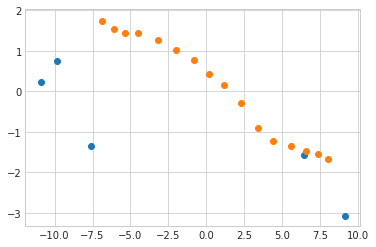

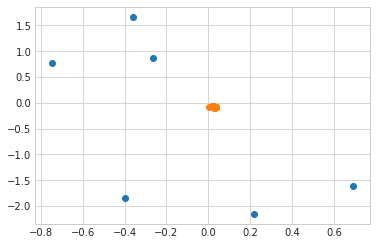

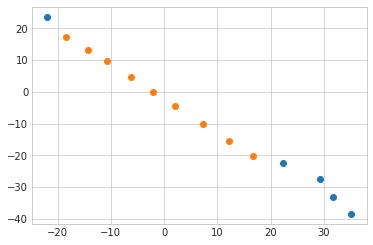

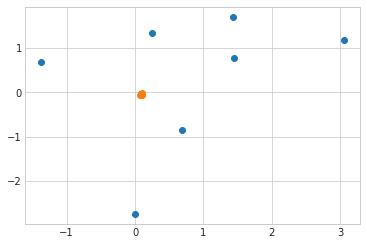

In [8]:
yaw=predcitions['refined_yaw'].clone()
traj=predcitions['refined_traj'].clone().squeeze(1)
mask=predcitions['mask'].clone().squeeze(1)

for idx,traj_submask in enumerate(mask):
    traj_submask=~traj_submask.bool()
    filled_traj=traj[idx][traj_submask]
    filled_yaw=yaw[idx][traj_submask]
    motion=data_test['target_agent_representation']['concat_motion']
    motion_mask=~motion['mask'][idx,:,0].bool()
    motion_traj=motion['traj'][idx,:,:2][motion_mask]
    motion_yaw=motion['traj'][idx,:,2][motion_mask]
    plt.scatter(motion_traj[:,0].cpu(),motion_traj[:,1].cpu())
    plt.scatter(filled_traj[:,0].cpu(),filled_traj[:,1].cpu())
    plt.show()
    # print(traj[idx])
    # print(data['target_agent_representation'])
    # break

In [19]:
data_test['surrounding_agent_representation'].pop
for k,v in data_test['surrounding_agent_representation'].items():
    print(k,v.shape)

vehicles torch.Size([30, 54, 34, 4])
vehicle_masks torch.Size([30, 54, 34, 4])
pedestrians torch.Size([30, 44, 34, 4])
pedestrian_masks torch.Size([30, 44, 34, 4])


In [29]:
dataset=trainer.val_dl.dataset
inputs=dataset.load_data(0)['inputs']

In [31]:
hist_length=inputs['target_agent_representation']['history'].shape[0]
future_length=inputs['target_agent_representation']['future'].shape[0]
print(hist_length,future_length)

2 4


In [ ]:
with torch.no_grad():
    for idx,map in enumerate(data_test['map_representation']['lane_node_feats']):
        map=(map[:,:,:2][~(data_test['map_representation']['lane_node_masks'][idx,:,:,0]).bool()]).cpu().numpy()
        plt.scatter(map[:,0],map[:,1],s=1)
        plt.show()

In [10]:
data_test.keys()

dict_keys(['instance_token', 'sample_token', 'map_representation', 'surrounding_agent_representation', 'target_agent_representation', 'origin'])

In [17]:
print(data_test['target_agent_representation']['history']['traj'][0])
print(data_test['target_agent_representation']['future']['traj'][0])

tensor([[ 0.1345, -2.5146, -0.0611,  0.9981, -0.0610, -0.4999],
        [ 0.1202, -2.5102, -0.0611,  0.9981, -0.0610,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')
tensor([[-2.3022,  7.3983,  0.5847,  0.8339,  0.5519,  7.8493],
        [-1.2928,  5.9046,  0.4102,  0.9171,  0.3987,  7.3488],
        [-0.5582,  4.2591,  0.2356,  0.9724,  0.2334,  6.8987],
        [-0.1202,  2.5102,  0.0611,  0.9981,  0.0610,  6.3989],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')


In [24]:
print(data_test['target_agent_representation']['concat_motion']['traj'][0])
print(data_test['target_agent_representation']['refine_input'])

tensor([[ 0.1345, -2.5146, -0.0611,  0.9981, -0.0610, -0.4999,  0.0000],
        [ 0.1202, -2.5102, -0.0611,  0.9981, -0.0610,  0.0000,  0.0000],
        [-0.1202,  2.5102,  0.0611,  0.9981,  0.0610,  6.3989,  1.0000],
        [-0.5582,  4.2591,  0.2356,  0.9724,  0.2334,  6.8987,  1.0000],
        [-1.2928,  5.9046,  0.4102,  0.9171,  0.3987,  7.3488,  1.0000],
        [-2.3022,  7.3983,  0.5847,  0.8339,  0.5519,  7.8493,  1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')
{'traj': tensor([[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0.

In [5]:
self=trainer.model.encoder

In [ ]:
from models.library.blocks import *
self.future_map_aggtor = Att(n_agt=16,n_ctx=16)
self.past_map_aggtor = Att(n_agt=16,n_ctx=16)

In [ ]:
import math
inputs = data_test
lane_node_feats=inputs['map_representation']['lane_node_feats']
lane_node_masks=inputs['map_representation']['lane_node_masks']
lane_node_embedding = self.leaky_relu(self.node_emb(lane_node_feats))
lane_node_ctrs = lane_node_feats.clone().detach().flatten(1,2)
lane_node_ctrs[lane_node_masks.flatten(1,2).bool()] = math.inf
lane_node_ctrs=lane_node_ctrs[:,:,:2]
# gru_lane_feats = node_gru_enc(lane_node_masks, lane_subnode_embedding, self.sub_node_encoder)
# lane_node_ctrs

In [15]:
lane_node_embedding.shape

torch.Size([30, 221, 20, 16])

In [9]:
target_agent_representation=inputs['target_agent_representation']
hist=target_agent_representation['history']['traj']
hist_mask=target_agent_representation['history']['mask']
future=target_agent_representation['future']['traj']
future_mask=target_agent_representation['future']['mask']
concat=target_agent_representation['concat_motion']['traj']
concat_mask=target_agent_representation['concat_motion']['mask']

In [ ]:
last_inds=torch.argmax(future_mask[:,:,0],dim=-1).cpu()-1
inds1=torch.arange(last_inds.shape[0])
future[:,:,:2]

In [ ]:
last_inds=torch.argmax(future_mask[:,:,0],dim=-1).cpu()-1
inds1=torch.arange(last_inds.shape[0])

future_ctrs=future[:,:,:2]
last_ctrs=future_ctrs[inds1,last_inds].view(future_ctrs.shape[0],2)

lane_subnode_embedding = get_attention( lane_node_ctrs, lane_node_embedding, last_ctrs, target_enc, self.future_map_aggtor)

In [ ]:
hist_last_inds=torch.argmax(hist_mask[:,:,0],dim=-1).cpu()-1
hist_inds1=torch.arange(hist_last_inds.shape[0])
hist_inds=torch.cat((hist_inds1.unsqueeze(-1),hist_last_inds.unsqueeze(-1)),dim=-1).T
hist_ctrs=history[:,:,:2]
hist_last_ctrs=hist_ctrs[hist_inds[0],hist_inds[1]].view(hist_ctrs.shape[0],2)

lane_subnode_embedding = get_attention( lane_node_ctrs, lane_subnode_embedding, hist_last_ctrs.unsqueeze(1), h0.transpose(0,1), self.past_map_aggtor)
lane_subnode_embedding=lane_subnode_embedding.view(lane_subnode_embedding.shape[0],lane_node_feats.shape[1],
                                                    lane_node_feats.shape[2],lane_subnode_embedding.shape[-1])

In [5]:
from models.encoders.match_encoder import *
from models.library.blocks import *
from models.library.blocks import *
import math

inputs=data_test
self=trainer.model.encoder
lane_node_feats=inputs['map_representation']['lane_node_feats']
lane_node_masks=inputs['map_representation']['lane_node_masks']
lane_node_ctrs = lane_node_feats.clone().detach().flatten(1,2)
lane_node_ctrs[lane_node_masks.flatten(1,2).bool()] = math.inf
lane_node_ctrs=lane_node_ctrs[:,:,:2]
lane_subnode_embedding = self.leaky_relu(self.subnode_emb(lane_node_feats))
history = inputs['history']
history_mask=inputs['history_mask']
future = inputs['future']
future_mask=inputs['future_mask']
history_emb = self.leaky_relu(self.target_past_emb(history))
future_emb = self.leaky_relu(self.target_fut_emb(future))

hist_seq_lens = torch.sum(1 - history_mask[:,  :, 0], dim=-1)
seq_lens_batched = hist_seq_lens[hist_seq_lens != 0].cpu()
hist_embedding_packed = pack_padded_sequence(history_emb, seq_lens_batched,batch_first=True, enforce_sorted=False)
_, h0 = self.target_past_enc(hist_embedding_packed)
hidden_init=h0.transpose(0,1).repeat(1,future.shape[1],1)
rev_encoding=rev_gru_encode(future_emb,future_mask,self.bi_gru,hidden_init)
target_enc=ugru_encode(rev_encoding,future_emb,future_mask, self.target_future_enc)

In [6]:
from models.encoders.pgp_encoder import PGPEncoder
lane_node_ctrs = lane_node_feats.clone().detach().flatten(1,2)
lane_node_ctrs[lane_node_masks.flatten(1,2).bool()] = math.inf
lane_node_ctrs=lane_node_ctrs[:,:,:2]
# gru_lane_feats = node_gru_enc(lane_node_masks, lane_subnode_embedding, self.sub_node_encoder)
last_inds=torch.argmax(future_mask[:,:,:,0],dim=-1).cpu()-1
inds1,inds2=torch.meshgrid(torch.arange(last_inds.shape[0]), 
                            torch.arange(last_inds.shape[1]))
inds=(torch.cat((inds1.unsqueeze(-1),inds2.unsqueeze(-1),last_inds.unsqueeze(-1)),dim=-1).flatten(0,1)).T
future_ctrs=future[:,:,:,:2]
last_ctrs=future_ctrs[inds[0],inds[1],inds[2]].view(future_ctrs.shape[0],future_ctrs.shape[1],2)
ctx_mask=(~(future_mask[:,:,:,0].bool())).any(dim=-1)
ctx_mask=list((~ctx_mask).float())
lane_subnode_embedding = get_attention( lane_node_ctrs, lane_subnode_embedding.flatten(1,2), last_ctrs, target_enc,self.future_map_aggtor,ctx_mask=ctx_mask)


hist_last_inds=torch.argmax(history_mask[:,:,0],dim=-1).cpu()-1
hist_inds1=torch.arange(hist_last_inds.shape[0])
hist_inds=torch.cat((hist_inds1.unsqueeze(-1),hist_last_inds.unsqueeze(-1)),dim=-1).T
hist_ctrs=history[:,:,:2]
hist_last_ctrs=hist_ctrs[hist_inds[0],hist_inds[1]].view(hist_ctrs.shape[0],2)
lane_subnode_embedding = get_attention( lane_node_ctrs, lane_subnode_embedding, hist_last_ctrs.unsqueeze(1), h0.transpose(0,1), self.past_map_aggtor)
lane_subnode_embedding=lane_subnode_embedding.view(lane_subnode_embedding.shape[0],lane_node_feats.shape[1],
                                                    lane_node_feats.shape[2],lane_subnode_embedding.shape[-1])
bigru_lane_feats = node_gru_enc(lane_node_masks, lane_subnode_embedding, self.lane_bi_gru)
lane_node_encodings = PGPEncoder.variable_size_gru_encode(bigru_lane_feats, lane_node_masks, self.lane_node_aggtor)

In [33]:
graph=trainer.model.aggregator.graph1
mask_base=(~lane_node_masks[:,:,:,0].bool()).any(-1).unsqueeze(-1)
attn_mask=(mask_base*mask_base.transpose(1,-1)).float()
encodings=graph(lane_node_encodings, attention_mask=attn_mask)

In [2]:
import pickle
filename = os.path.join("temp" + '.pickle')

if not os.path.isfile(filename):
    raise Exception('Could not find data. Please run the dataset in extract_data mode')

with open(filename, 'rb') as handle:
    data = pickle.load(handle)

In [3]:
occ_times=data['occ_times']
scores=data['scores']
gt_occ_times=data['gt_occ_times']
gt_scores=data['gt_scores']
map_scores=data['map_scores']
gt_map_scores=data['gt_map_scores']

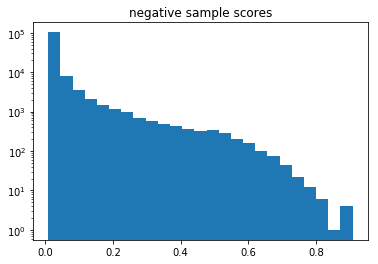

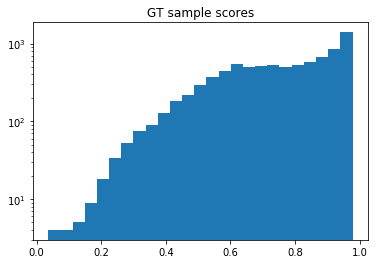

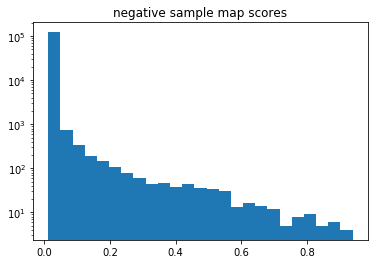

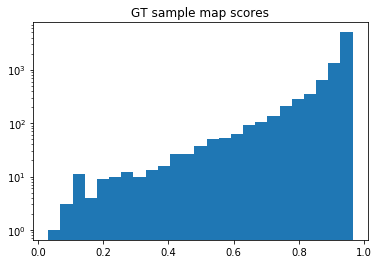

In [4]:
plt.hist(scores,bins=25)
plt.title('negative sample scores')
plt.yscale('log',basey=10)
plt.show()
plt.hist(gt_scores,bins=25)
plt.title('GT sample scores')
plt.yscale('log',basey=10)
plt.show()
plt.hist(map_scores,bins=25)
plt.title('negative sample map scores')
plt.yscale('log',basey=10)
plt.show()
plt.hist(gt_map_scores,bins=25)
plt.title('GT sample map scores')
plt.yscale('log',basey=10)
plt.show()

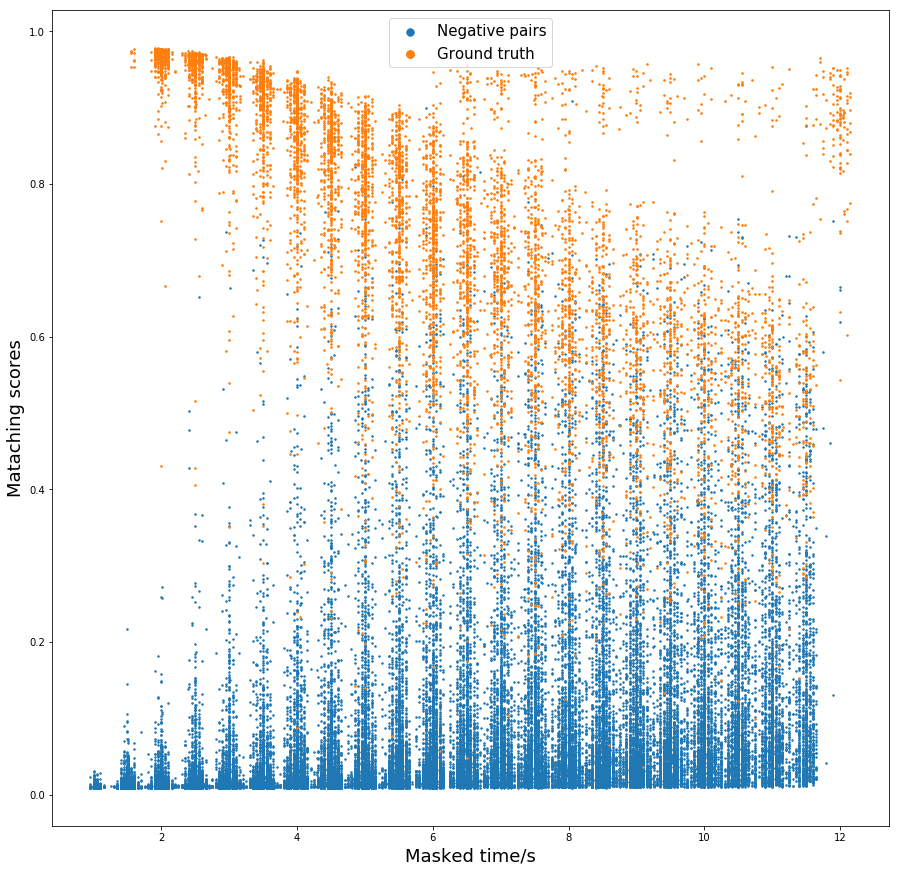

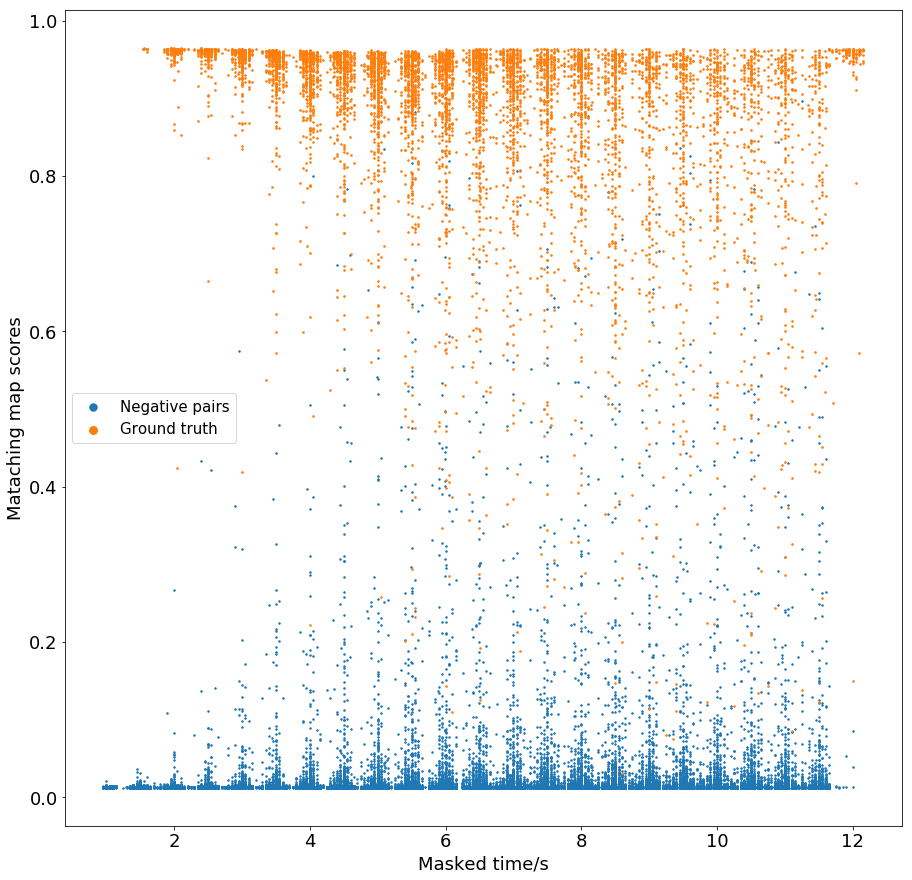

In [5]:
plt.figure(figsize=(15,15))
plt.scatter(occ_times,scores,s=2.2)
plt.scatter(gt_occ_times,gt_scores,s=2.5)
plt.xlabel("Masked time/s",fontsize=18)
plt.ylabel("Mataching scores", fontsize=18)
plt.legend(["Negative pairs","Ground truth"],markerscale=5.0,fontsize=15)
plt.rcParams.update({'font.size': 18})
plt.show()
plt.figure(figsize=(15,15))
plt.scatter(occ_times,map_scores,s=2.2)
plt.scatter(gt_occ_times,gt_map_scores,s=2.5)
plt.xlabel("Masked time/s",fontsize=18)
plt.ylabel("Mataching map scores", fontsize=18)
plt.legend(["Negative pairs","Ground truth"],markerscale=5.0,fontsize=15)
plt.rcParams.update({'font.size': 18})
plt.show()

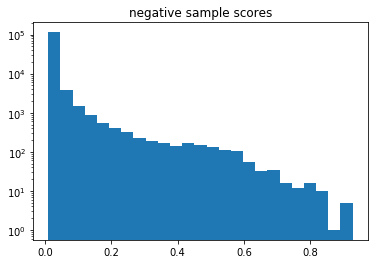

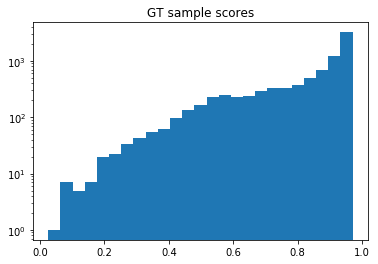

In [4]:
plt.hist(scores,bins=25)
plt.title('negative sample scores')
plt.yscale('log',basey=10)
plt.show()
plt.hist(gt_scores,bins=25)
plt.title('GT sample scores')
plt.yscale('log',basey=10)
plt.show()

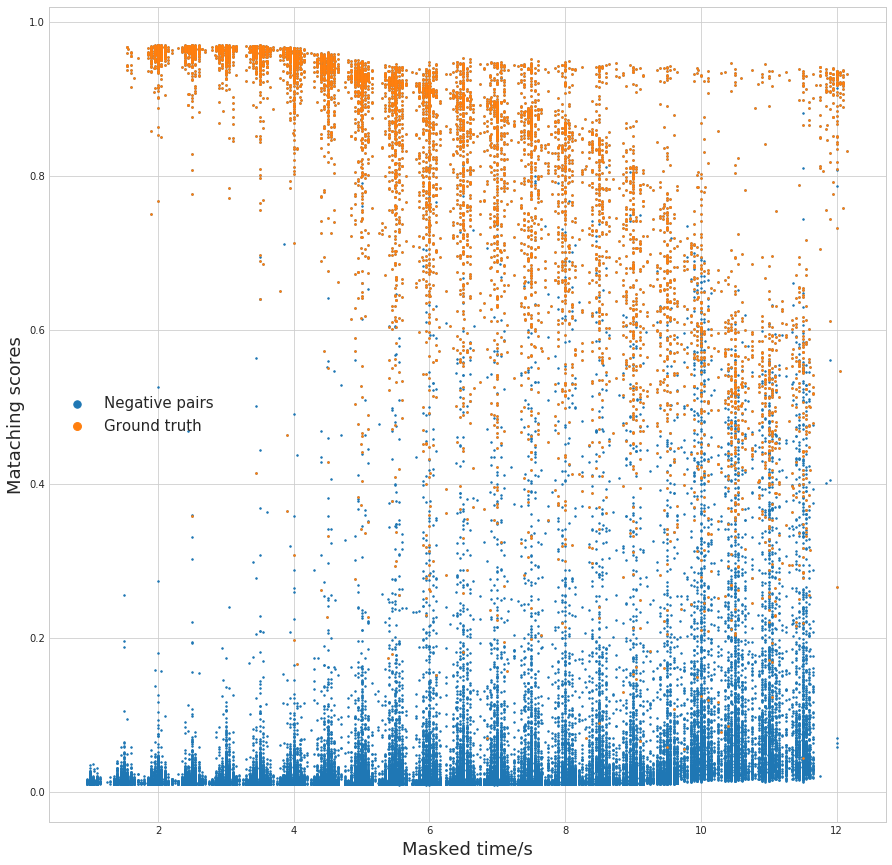

In [22]:
plt.figure(figsize=(15,15))
plt.scatter(occ_times,scores,s=2.2)
plt.scatter(gt_occ_times,gt_scores,s=2.5)
plt.xlabel("Masked time/s",fontsize=18)
plt.ylabel("Mataching scores", fontsize=18)
plt.legend(["Negative pairs","Ground truth"],markerscale=5.0,fontsize=15)
plt.rcParams.update({'font.size': 18})


In [ ]:
import sys
import train_eval.utils as u
import math 
occ_times=[]
scores=[]
gt_occ_times=[]
gt_scores=[]
with torch.no_grad():
    for i,data in enumerate(trainer.val_dl):
        # torch.cuda.empty_cache()
        # Load data
        sys.stdout.write('processing %d, %d/%d\r' % (i, i+1, len(trainer.val_dl)))
        sys.stdout.flush()

        data = u.send_to_device(u.convert_double_to_float(data))
        data_test=data['inputs']
        gt_test=data['ground_truth']
        
        predictions=trainer.model(data_test)
        times=data_test['future'][:,1:,:,-3]
        gt_times=data_test['future'][:,0,:,-3]
        mask=data_test['future_mask'][:,1:,:,-3].bool()
        gt_mask=data_test['future_mask'][:,0,:,-3].bool()
        times[mask]=math.inf
        gt_times[gt_mask]=math.inf
        occ_time,inds=torch.min(times,dim=-1)
        occ_time=occ_time[~torch.isinf(occ_time)]
        gt_time,_=torch.min(gt_times,dim=-1)
        score=predictions['scores'][:,1:][(~(predictions['masks'][:,1:,:,0]).bool()).any(dim=-1)].flatten()
        gt_score=predictions['scores'][:,0].flatten()
        occ_times+=list(occ_time.cpu().numpy())
        gt_occ_times+=list(gt_time.cpu().numpy())
        scores+=list(score.cpu().numpy())
        gt_scores+=list(gt_score.cpu().numpy())
        

        break

In [ ]:
import numpy as np
bins=np.linspace(min(occ_times)-0.01,max(occ_times)+0.01,num=24)
gt_bins=np.linspace(min(gt_occ_times)-0.01,max(gt_occ_times)+0.01,num=24)

scores=np.asarray(scores)
gt_scores=np.asarray(gt_scores)
scores_list=[scores,gt_scores]
occ_times=np.asarray(occ_times)
gt_occ_times=np.asarray(gt_occ_times)
threshs=np.linspace(0.3,0.7,num=39)
for thresh in threshs:
    accs=[]
    gt_accs=[]
    accs_lists=[accs,gt_accs]
    for idx,lb in enumerate(bins[:-1]):
        ub=bins[idx+1]
        masks=((occ_times<ub) * (occ_times>=lb))
        all_scores=scores_list[0]
        acc_list=accs_lists[0]
        selected_scores=all_scores[masks]
        acc=((selected_scores<thresh).sum())/max(len(selected_scores),0.001)
        acc_list.append(acc)
    xs=(bins[1:]+bins[:-1])/2
    plt.scatter(xs,acc_list)
    for idx,lb in enumerate(gt_bins[:-1]):
        ub=gt_bins[idx+1]
        masks=((gt_occ_times<ub) * (gt_occ_times>=lb))
        all_scores=scores_list[1]
        acc_list=accs_lists[1]
        selected_scores=all_scores[masks]
        acc=((selected_scores>=thresh).sum())/max(len(selected_scores),0.001)
        acc_list.append(acc)
    xs=(gt_bins[1:]+gt_bins[:-1])/2
    plt.scatter(xs,acc_list)
    plt.title('Accuracy at threshold of' + str(thresh))
    plt.legend(["Negative pairs","Ground truth"])
    plt.show()
    

In [13]:
len(acc_list)

46

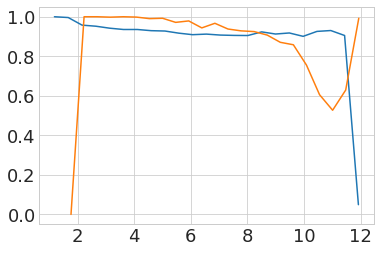

In [33]:
x_values = [(bins[1:]+bins[:-1])/2,(gt_bins[1:]+gt_bins[:-1])/2]
for xs,accs_list in zip(x_values,accs_lists):
    plt.plot(xs,accs_list)

In [ ]:
import sys
import train_eval.utils as u
import math 
occ_times=[]
scores=[]
gt_occ_times=[]
gt_scores=[]
with torch.no_grad():
    for i,data in enumerate(trainer.val_dl):
        # torch.cuda.empty_cache()
        # Load data
        sys.stdout.write('processing %d, %d/%d\r' % (i, i+1, len(trainer.val_dl)))
        sys.stdout.flush()

        data = u.send_to_device(u.convert_double_to_float(data))
        data_test=data['inputs']
        gt_test=data['ground_truth']
        
        predictions=trainer.model(data_test)
        times=data_test['future'][:,:,:,-3]
        gt_times=data_test['future'][:,0,:,-3]
        mask=data_test['future_mask'][:,:,:,-3].bool()
        gt_mask=data_test['future_mask'][:,0,:,-3].bool()
        times[mask]=math.inf
        gt_times[gt_mask]=math.inf
        occ_time,inds=torch.min(times,dim=-1)
        occ_time=occ_time[~torch.isinf(occ_time)]
        gt_time,_=torch.min(gt_times,dim=-1)
        score=predictions['scores'][(~(predictions['masks'][:,:,:,0]).bool()).any(dim=-1)].flatten()
        gt_score=predictions['scores'][:,0].flatten()
        occ_times+=list(occ_time.cpu().numpy())
        gt_occ_times+=list(gt_time.cpu().numpy())
        scores+=list(score.cpu().numpy())
        gt_scores+=list(gt_score.cpu().numpy())
        

        # break

In [19]:
predictions=trainer.model(data_test)
times=data_test['future'][:,:,:,-3]
gt_times=data_test['future'][:,0,:,-3]
mask=data_test['future_mask'][:,:,:,-3].bool()
gt_mask=data_test['future_mask'][:,0,:,-3].bool()
times[mask]=math.inf
gt_times[gt_mask]=math.inf
occ_time,inds=torch.min(times,dim=-1)
occ_time=occ_time[~torch.isinf(occ_time)]
gt_time,_=torch.min(gt_times,dim=-1)
score=predictions['scores'][(~(predictions['masks'][:,:,:,0]).bool()).any(dim=-1)].flatten()
gt_score=predictions['scores'][:,0].flatten()
occ_times+=list(occ_time.cpu().numpy())
gt_occ_times+=list(gt_time.cpu().numpy())
scores+=list(score.cpu().numpy())
gt_scores=+=list(gt_score.cpu().numpy())

In [15]:
data_test.keys()

dict_keys(['instance_token', 'sample_token', 'origin', 'node_seq_gt', 'node_nums', 'history', 'history_mask', 'future', 'future_mask', 'map_representation'])

In [ ]:
## To be added
from datasets.nuScenes.prediction import PredictHelper_occ
from return_device import return_device
from nuscenes.prediction.input_representation.static_layers import *
from nuscenes.prediction.input_representation.combinators import Rasterizer
from train_eval.utils import *
from pyquaternion import Quaternion
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def local_pose_to_image(local_poses,pose_mask,resolution,img_size,arror_length=None):
    '''local_poses: [T,4] 
    mask: [T]
    '''
    if arror_length is None:
        arror_length=8
    y_m=np.asarray(local_poses[:,1][pose_mask].cpu())
    x_m=np.asarray(local_poses[:,0][pose_mask].cpu())
    img_origin=np.round(np.asarray(img_size)/2).astype(np.int)
    x=img_origin[1]+x_m*resolution
    y=img_origin[0]-y_m*resolution
    yaw=np.asarray((local_poses[:,2][pose_mask]).cpu())
    dy=-np.sin(yaw+np.pi/2)*arror_length
    dx=np.cos(yaw+np.pi/2)*arror_length
    return x,y,dx,dy
def visualize_match(map_nodes,map_mask,origin,sample_token,instance_token,arror_length=None):
    layer_names = ['drivable_area', 'ped_crossing']
    maps= load_all_maps(helper)
   
    colors = [(255, 255, 255), (119, 136, 153)]
    cmap = mpl.cm.cool
    dist=np.max((LA.norm(map_nodes,ord=2,axis=-1)))

    # origin=tuple(sample['origin'])
    image_side_length = 2 * max(25,dist)
    image_side_length_pixels = 400
    resolution=image_side_length_pixels/image_side_length
    patchbox = get_patchbox(origin[0], origin[1], image_side_length)

    angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi
    sample_annotation = helper.get_sample_annotation(instance_token, sample_token)
    map_name = helper.get_map_name_from_sample_token(sample_token)
    canvas_size = (image_side_length_pixels, image_side_length_pixels)
    masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)

    images = []
    for mask, color in zip(masks, colors):
        images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))
    image = Rasterizer().combine(images)
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(1,1,1) 
    lanes=map_nodes.flatten(0,1).clone()
    lanes_mask=~sample['lane_node_masks'].flatten(0,1)[:,0].bool()
    history=sample['history'].clone()
    history_mask=~sample['history_mask'][:,0].bool()
    future=sample['future'].flatten(0,1).clone()
    future_mask=~sample['future_mask'].flatten(0,1)[:,0].bool()
    xsl, ysl, dxsl, dysl=local_pose_to_image(lanes,lanes_mask,resolution,canvas_size,2.0)
    xs, ys, dxs, dys = local_pose_to_image(history,history_mask,resolution,canvas_size,5)
    xsf, ysf, dxsf, dysf = local_pose_to_image(future,future_mask,resolution,canvas_size,5)



    # for x, y, dx, dy in zip(xsl, ysl, dxsl, dysl):
    #     ax.arrow(x, y, dx, dy, width=0.4, color=(1,0.5,0,0.1))
    for x, y, dx, dy in zip(xs, ys, dxs, dys):
        ax.arrow(x, y, dx, dy, width=2.0, color=(1,0,0,1))
    # for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
    #     ax.arrow(x, y, dx, dy, width=0.8, color=(0,0,1,1))
    ax.scatter(xsl, ysl,s=3,color='orange',alpha=1.0)
    valid_length=((~sample['future_mask'][:,:,0].bool()).any(-1)).sum()
    # ax.scatter(xs, ys,s=50,color='r',marker="*")
    for idx in range(len(sample['future'])):
        vehicles=sample['future'][idx]
        masks=~(sample['future_mask'][idx,:,0]).bool()
        if masks.any():
            xsf, ysf, dxsf, dysf = local_pose_to_image(vehicles,masks,resolution,canvas_size,2)
            # x,y=vehicles[:,0],vehicles[:,1]
            color=cmap((idx+1)/valid_length)
            for x, y, dx, dy in zip(xsf, ysf, dxsf, dysf):
                ax.arrow(x, y, dx, dy ,width=1.25,color=color)
    ax.imshow(image)

In [ ]:
import train_eval.utils as u
with torch.no_grad():
    vis_lanes=[]
    vis_history=[]
    vis_future=[]
    vis_scores=[]
    map_vis_scores=[]
    for i,data in enumerate(trainer.val_dl):
    # torch.cuda.empty_cache()
    # Load data
        sys.stdout.write('processing %d, %d/%d\r' % (i, i+1, len(trainer.val_dl)))
        sys.stdout.flush()
        data = u.send_to_device(u.convert_double_to_float(data))
        data_test=data['inputs']
        gt_test=data['ground_truth']
        predictions=trainer.model(data_test)
        for idx,sample_token in enumerate(data_test['sample_token']):
            map_nodes=data_test['map_representation']['lane_node_feats'][idx,:,:,:2]
            history=data_test['history'][idx,:,:2]
            future=data_test['future'][idx,:,:,:2].cpu().numpy()
            map_mask=~(data_test['map_representation']['lane_node_masks'][idx,:,:,0]).bool()
            history_mask=~(data_test['history_mask'][idx,:,0]).bool()
            future_mask=~(data_test['future_mask'][idx,:,:,0]).bool().cpu().numpy()
            vis_lanes.append(map_nodes[map_mask].cpu().numpy())
            vis_history.append(history[history_mask].cpu().numpy())
            scores=predictions['scores'][idx].cpu().numpy()
            map_scores=predictions['map_scores'][idx].cpu().numpy()
            sample_future=[]
            sample_scores=[]
            sample_map_scores=[]
            for i,traj in enumerate(future):
                if future_mask[i].any():
                    sample_future.append(traj[future_mask[i]])
                    sample_scores.append(scores[i,0])
                    sample_map_scores.append(map_scores[i,0])
                    
            vis_future.append(sample_future)
            vis_scores.append(sample_scores)
            map_vis_scores.append(sample_map_scores)
        if len(map_vis_scores)>500:
            break

In [6]:
import train_eval.utils as u
with torch.no_grad():
    vis_lanes=[]
    vis_history=[]
    vis_future=[]
    vis_scores=[]
    map_vis_scores=[]
    for i,data in enumerate(trainer.val_dl):
    # torch.cuda.empty_cache()
    # Load data
        sys.stdout.write('processing %d, %d/%d\r' % (i, i+1, len(trainer.val_dl)))
        sys.stdout.flush()
        data = u.send_to_device(u.convert_double_to_float(data))
        data_test=data['inputs']
        gt_test=data['ground_truth']
        predictions=trainer.model(data_test)
        for idx,sample_token in enumerate(data_test['sample_token']):
            map_nodes=data_test['map_representation']['lane_node_feats'][idx,:,:,:2]
            history=data_test['history'][idx,:,:2]
            future=data_test['future'][idx,:,:,:2].cpu().numpy()
            map_mask=~(data_test['map_representation']['lane_node_masks'][idx,:,:,0]).bool()
            history_mask=~(data_test['history_mask'][idx,:,0]).bool()
            future_mask=~(data_test['future_mask'][idx,:,:,0]).bool().cpu().numpy()
            vis_lanes.append(map_nodes[map_mask].cpu().numpy())
            vis_history.append(history[history_mask].cpu().numpy())
            scores=predictions['scores'][idx].cpu().numpy()
            map_scores=predictions['map_scores'][idx].cpu().numpy()
            sample_future=[]
            sample_scores=[]
            sample_map_scores=[]
            for i,traj in enumerate(future):
                if future_mask[i].any():
                    sample_future.append(traj[future_mask[i]])
                    sample_scores.append(scores[i,0])
                    sample_map_scores.append(map_scores[i,0])
                    
            vis_future.append(sample_future)
            vis_scores.append(sample_scores)
            map_vis_scores.append(sample_map_scores)
        if len(map_vis_scores)>500:
            break

In [6]:
import train_eval.utils as u
with torch.no_grad():
    vis_lanes=[]
    vis_history=[]
    vis_future=[]
    vis_scores=[]
    map_vis_scores=[]
    for i,data in enumerate(trainer.dl):
    # torch.cuda.empty_cache()
    # Load data
        sys.stdout.write('processing %d, %d/%d\r' % (i, i+1, len(trainer.dl)))
        sys.stdout.flush()
        data = u.send_to_device(u.convert_double_to_float(data))
        data_test=data['inputs']
        gt_test=data['ground_truth']
        predictions=trainer.model(data_test)
        for idx,sample_token in enumerate(data_test['sample_token']):
            map_nodes=data_test['map_representation']['lane_node_feats'][idx,:,:,:2]
            history=data_test['history'][idx,:,:2]
            future=data_test['future'][idx,:,:,:2].cpu().numpy()
            map_mask=~(data_test['map_representation']['lane_node_masks'][idx,:,:,0]).bool()
            history_mask=~(data_test['history_mask'][idx,:,0]).bool()
            future_mask=~(data_test['future_mask'][idx,:,:,0]).bool().cpu().numpy()
            vis_lanes.append(map_nodes[map_mask].cpu().numpy())
            vis_history.append(history[history_mask].cpu().numpy())
            scores=predictions['scores'][idx].cpu().numpy()
            map_scores=predictions['map_scores'][idx].cpu().numpy()
            sample_future=[]
            sample_scores=[]
            sample_map_scores=[]
            for i,traj in enumerate(future):
                if future_mask[i].any():
                    sample_future.append(traj[future_mask[i]])
                    sample_scores.append(scores[i,0])
                    sample_map_scores.append(map_scores[i,0])
                    
            vis_future.append(sample_future)
            vis_scores.append(sample_scores)
            map_vis_scores.append(sample_map_scores)
        if len(map_vis_scores)>800:
            break

In [5]:
import matplotlib
import matplotlib.cm as cm
import numpy as np
# def get_colors(lst):

#     minima = min(lst)
#     maxima = max(lst)

#     norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#     mapper = cm.ScalarMappable(norm=norm, cmap=cm.hot)
#     return cm.hot(lst)

def get_colors(lst):

    minima = min(lst)
    maxima = max(lst)

    norm_scores = ((np.array(lst)-minima)/(maxima-minima)).reshape([-1,1])
    colors=np.concatenate((norm_scores,np.zeros_like(norm_scores),
                           1-norm_scores,np.ones_like(norm_scores)),axis=-1)
    return colors
# for v in lst:
#     print(mapper.to_rgba(v))

/home/stanliu/.local/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


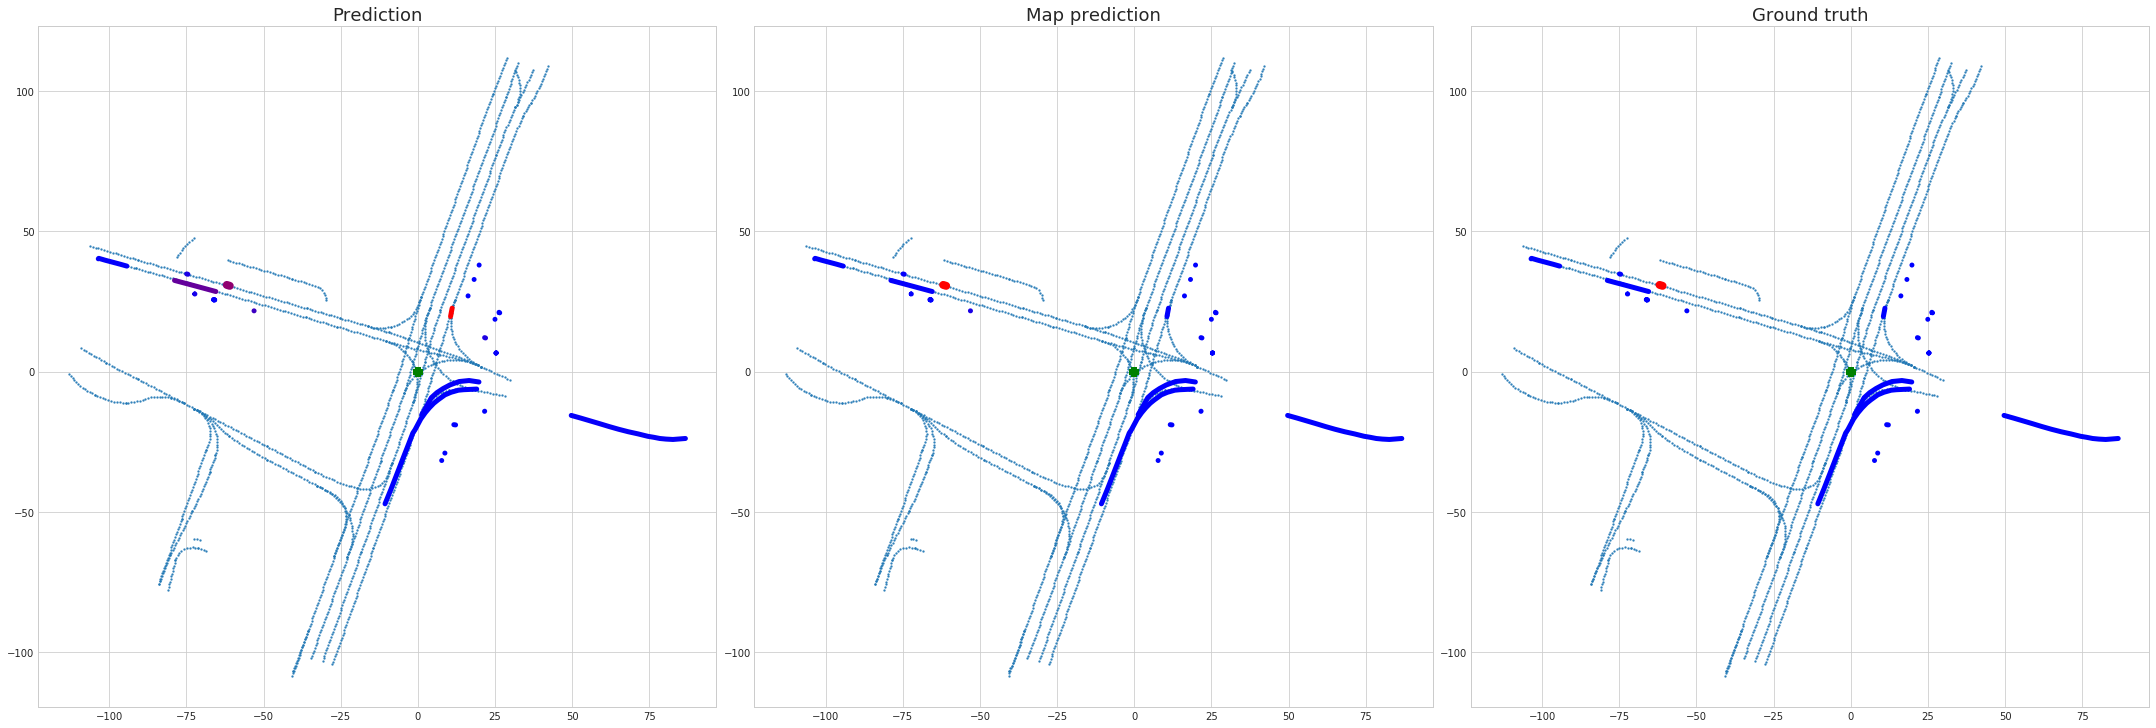

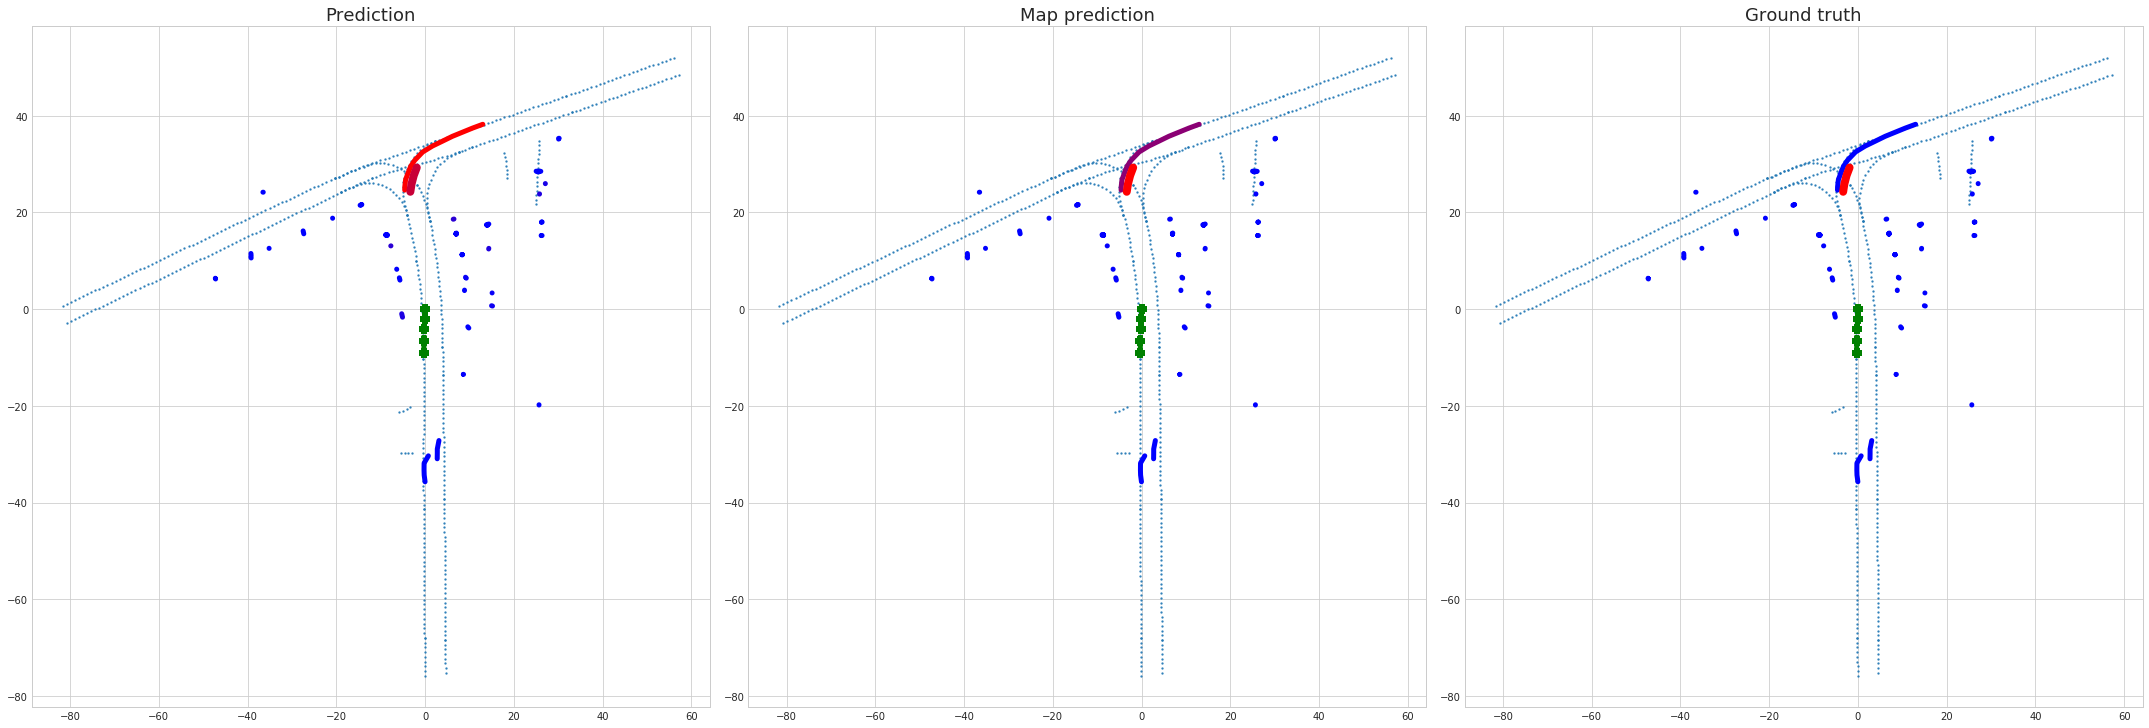

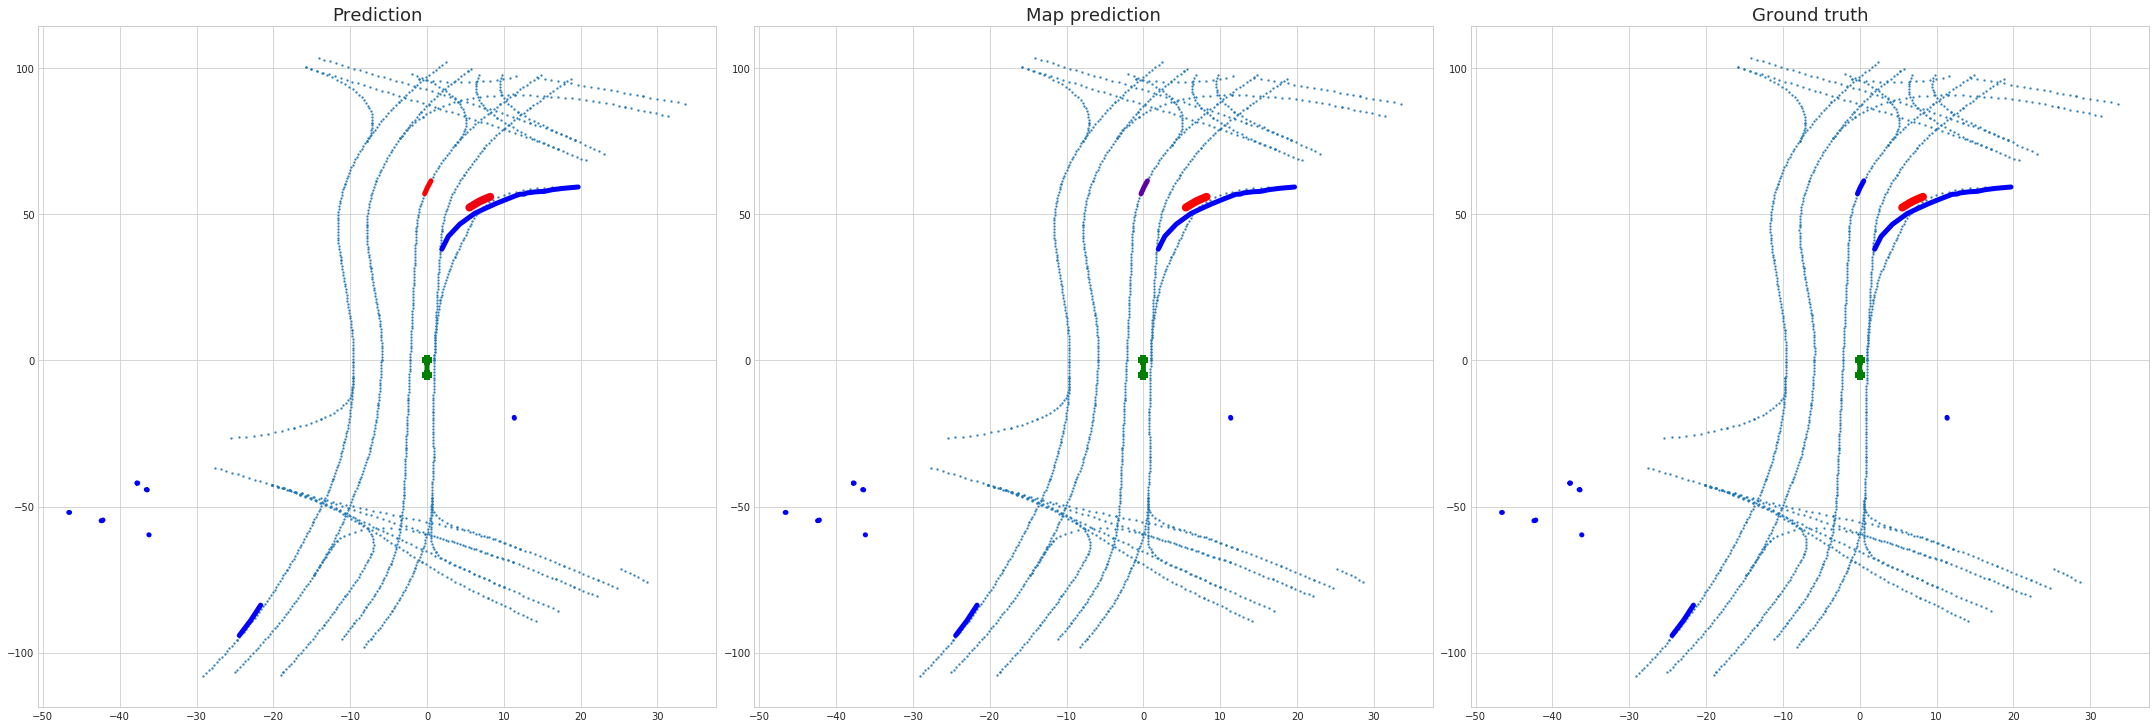

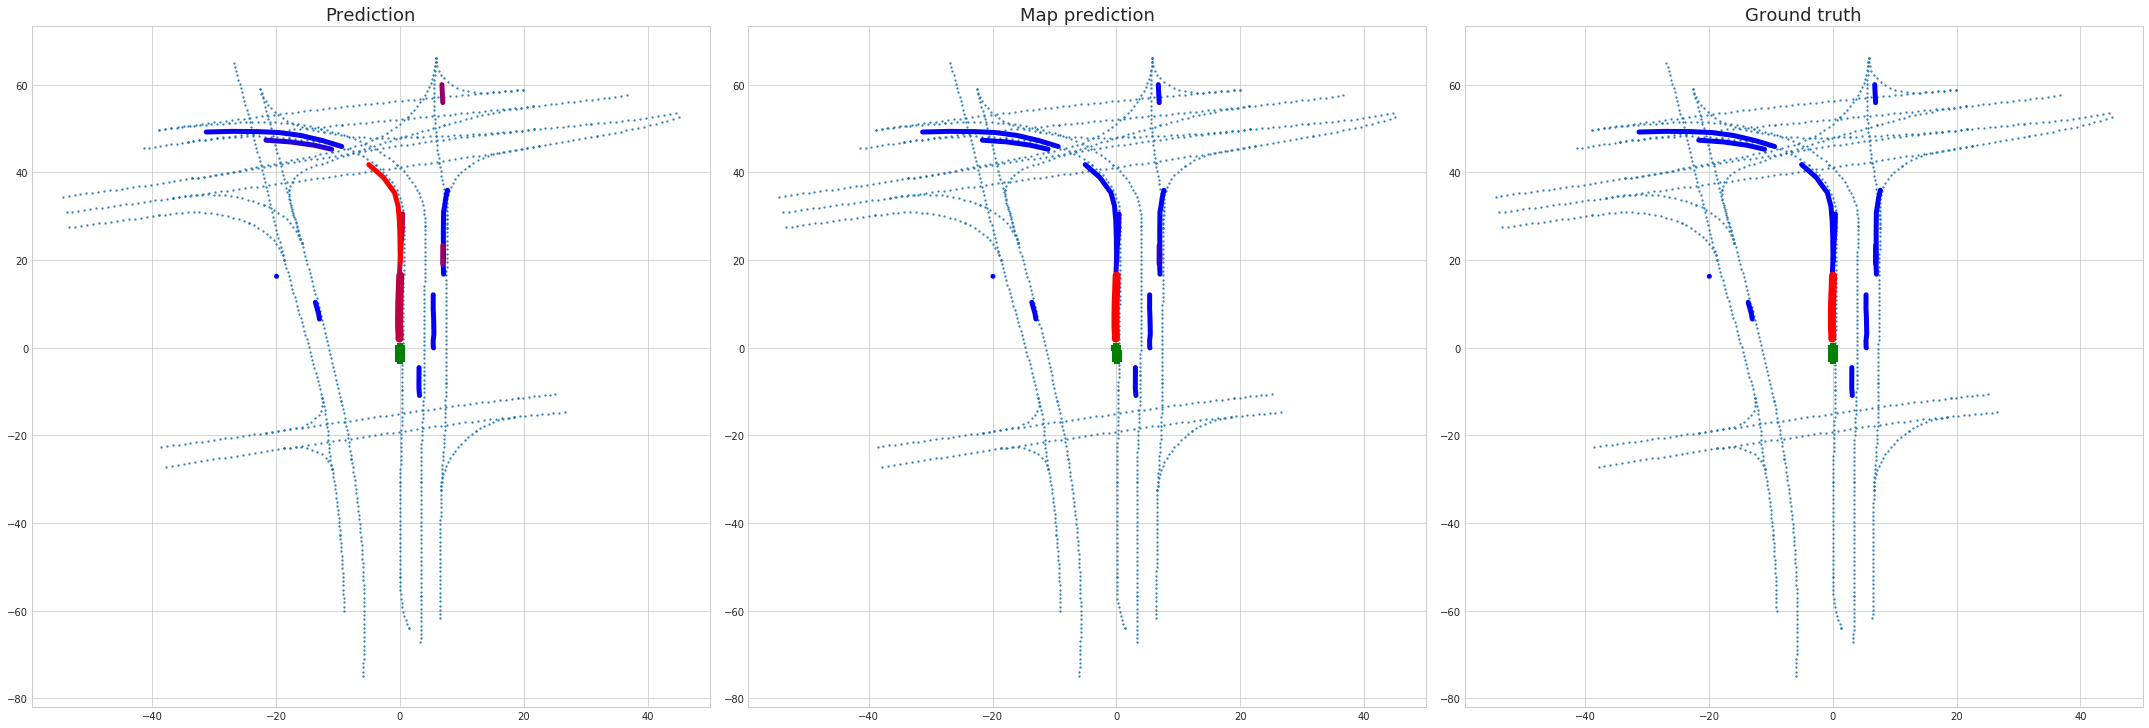

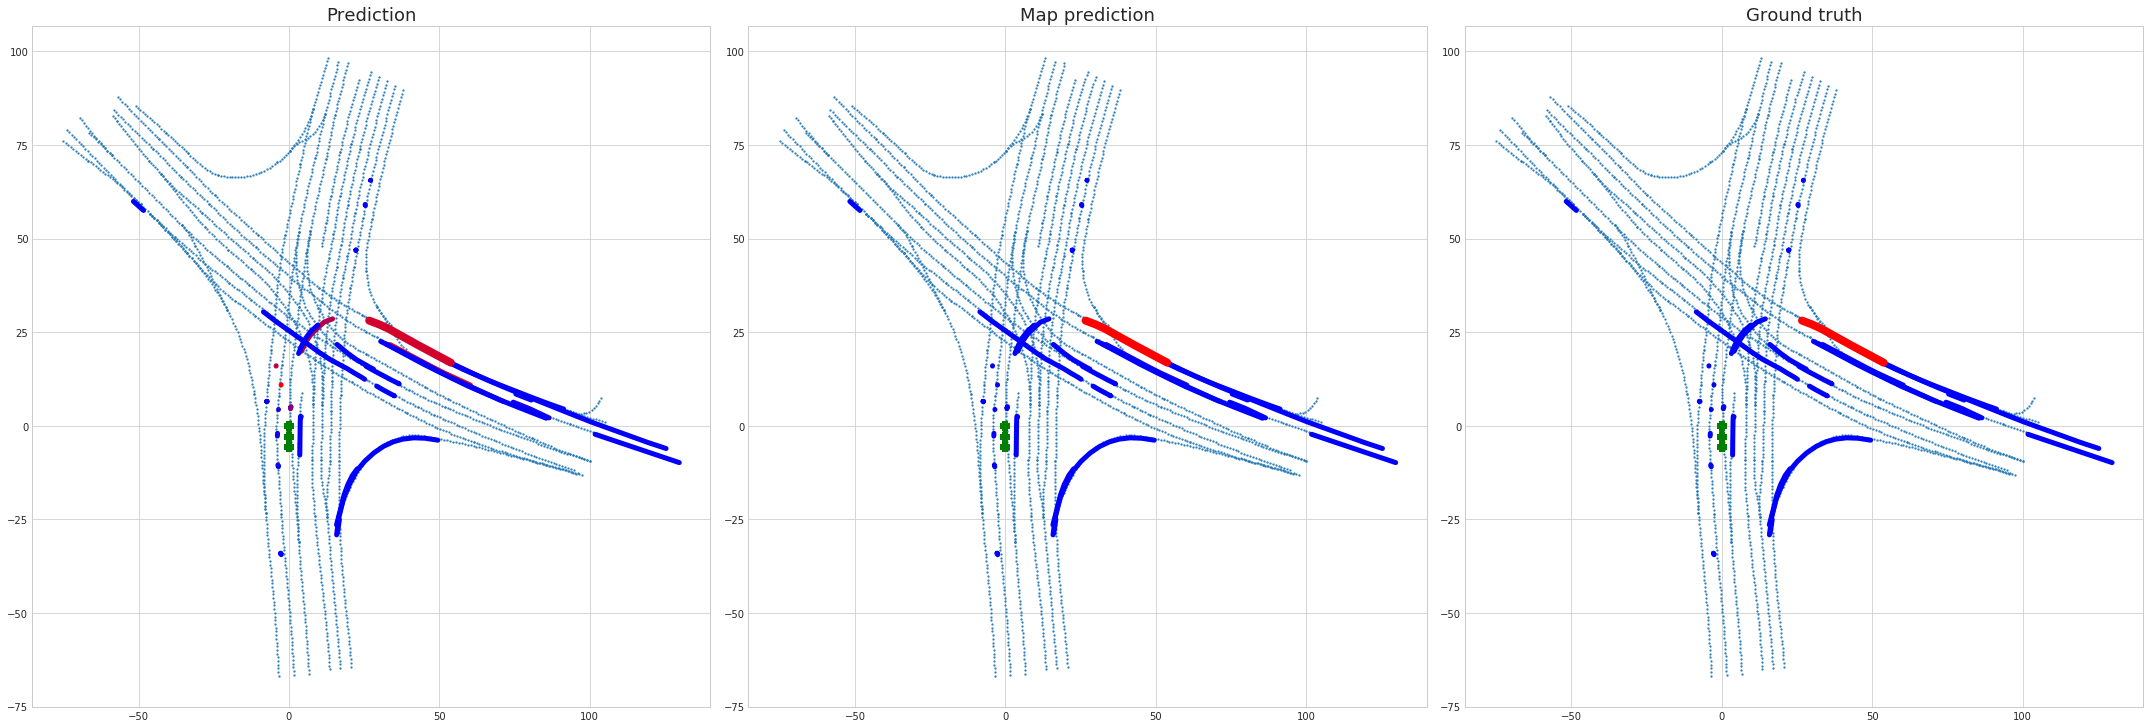

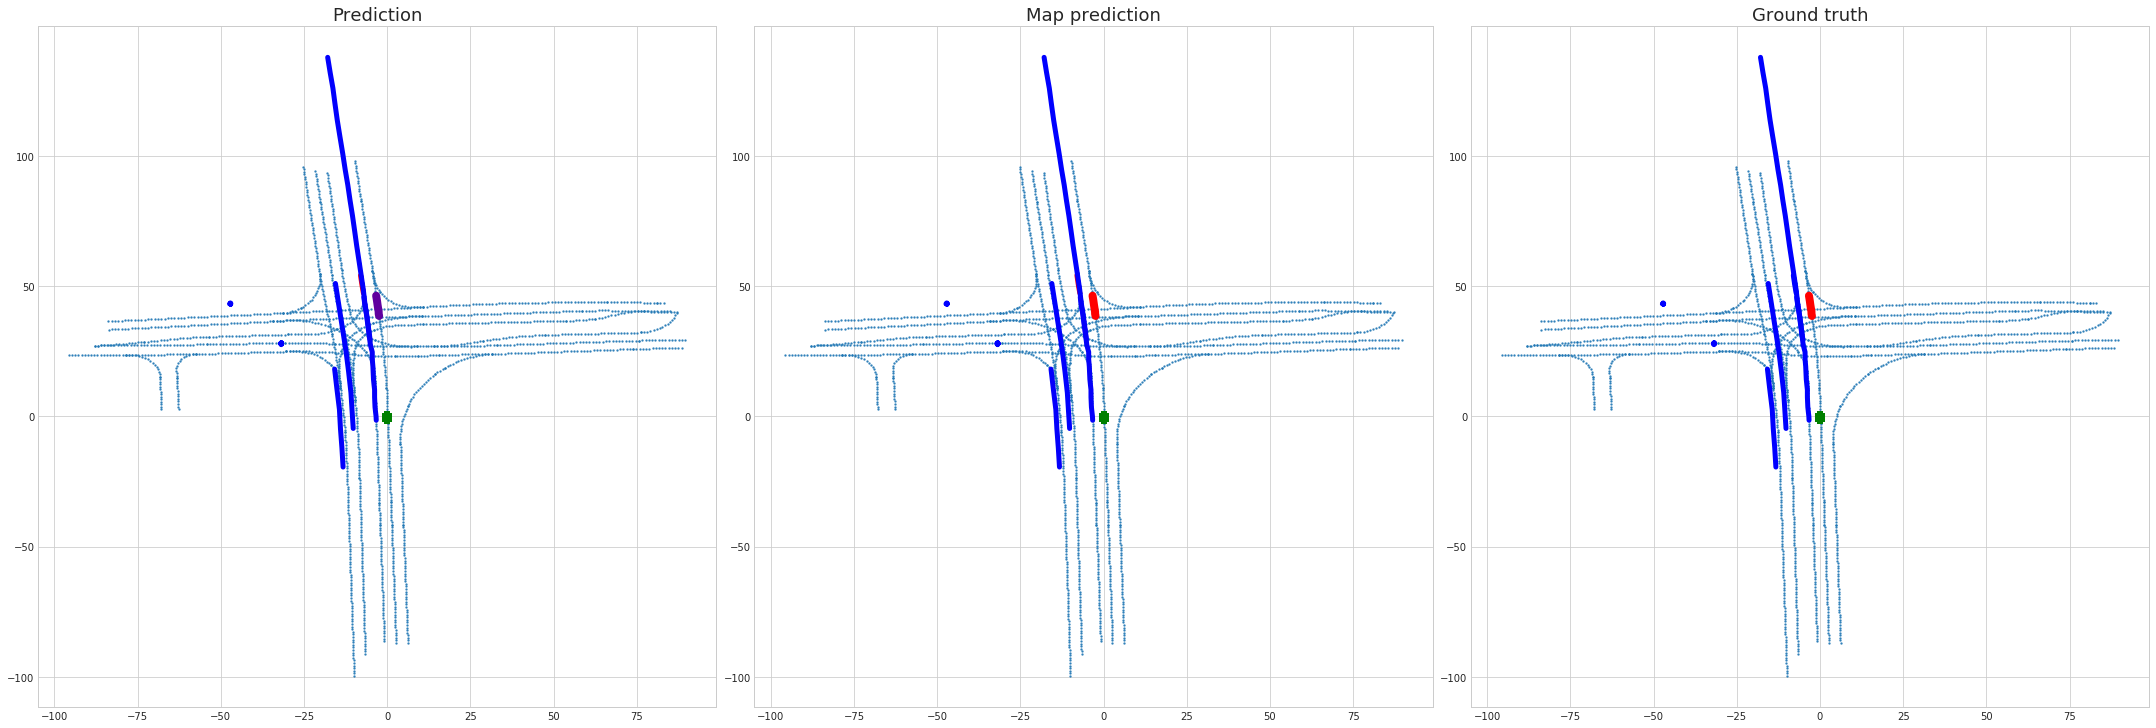

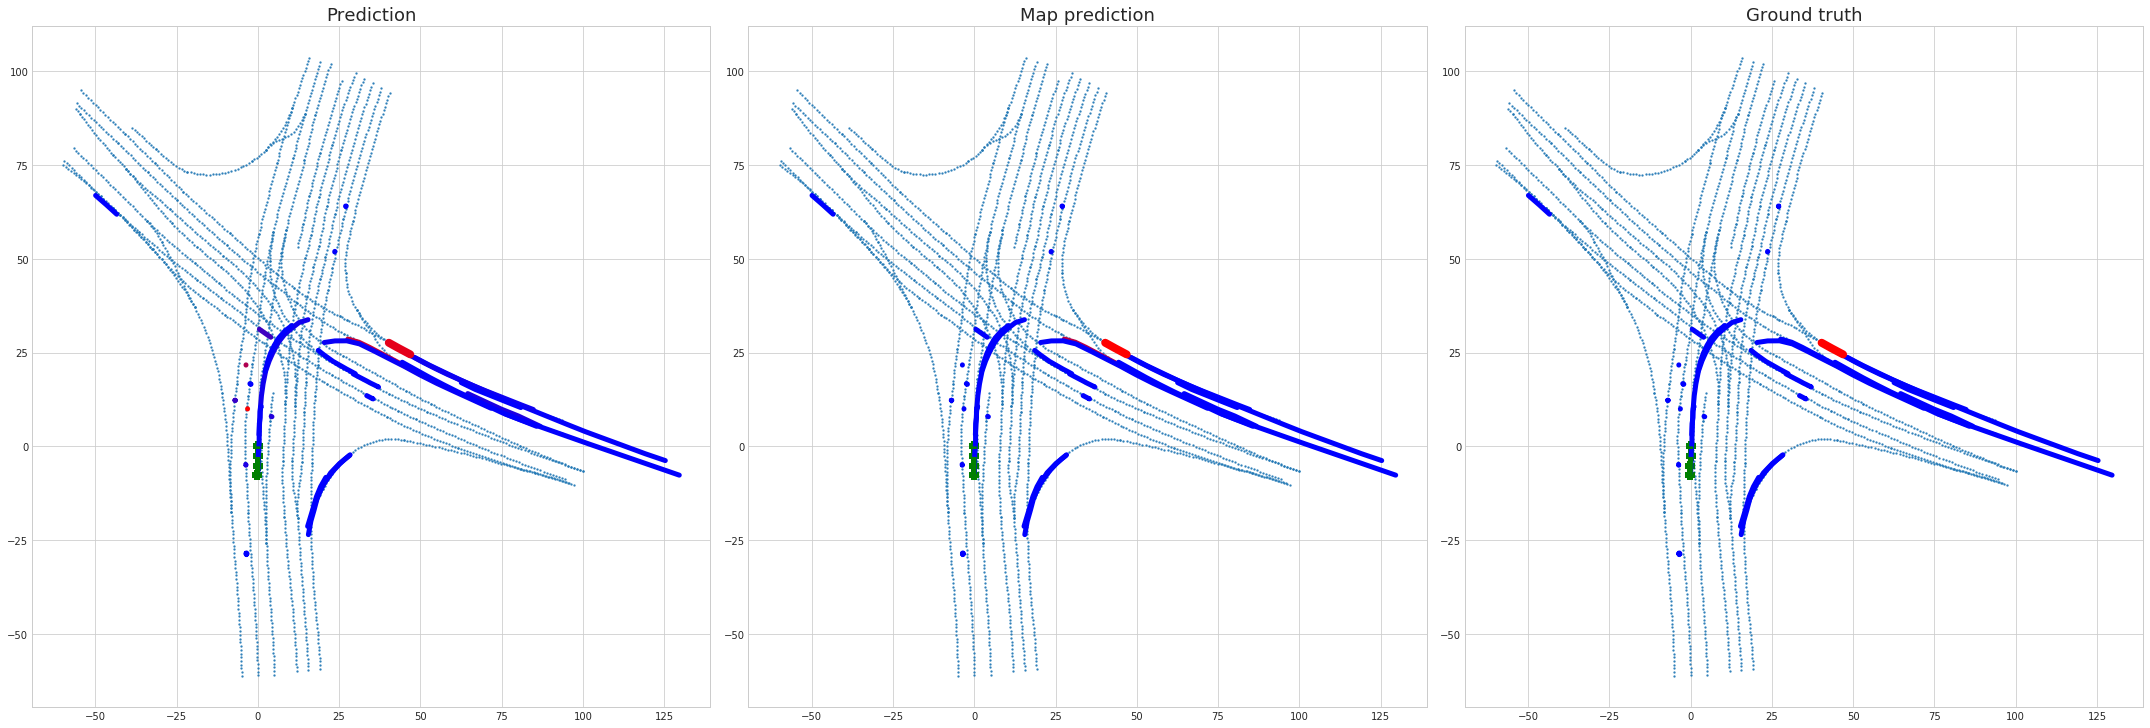

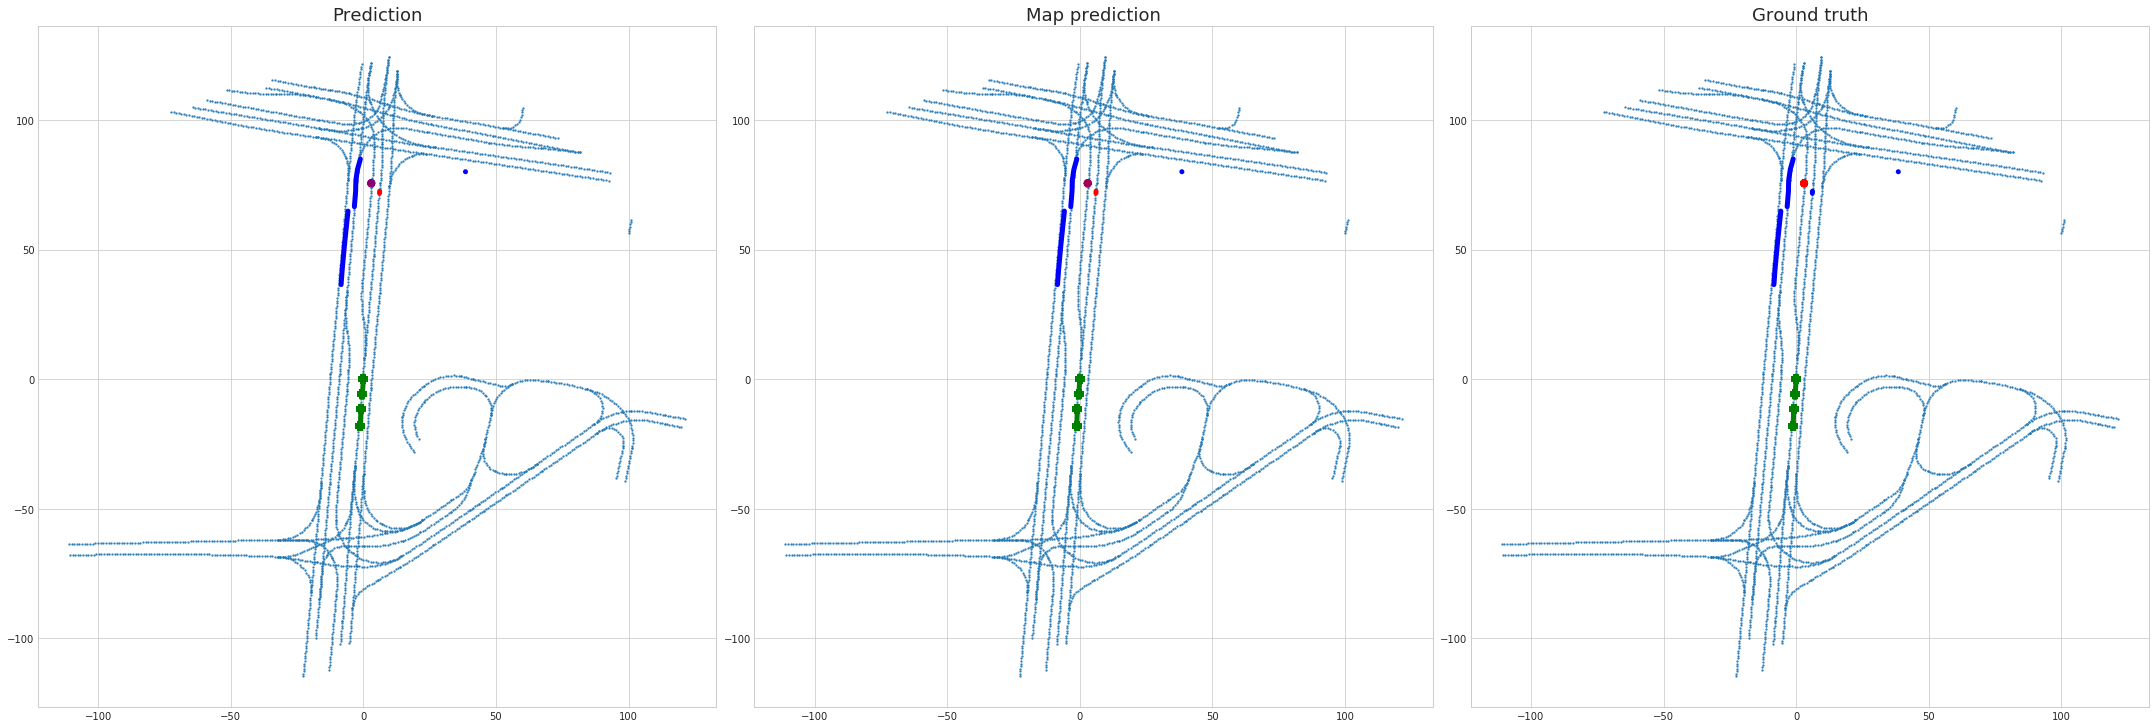

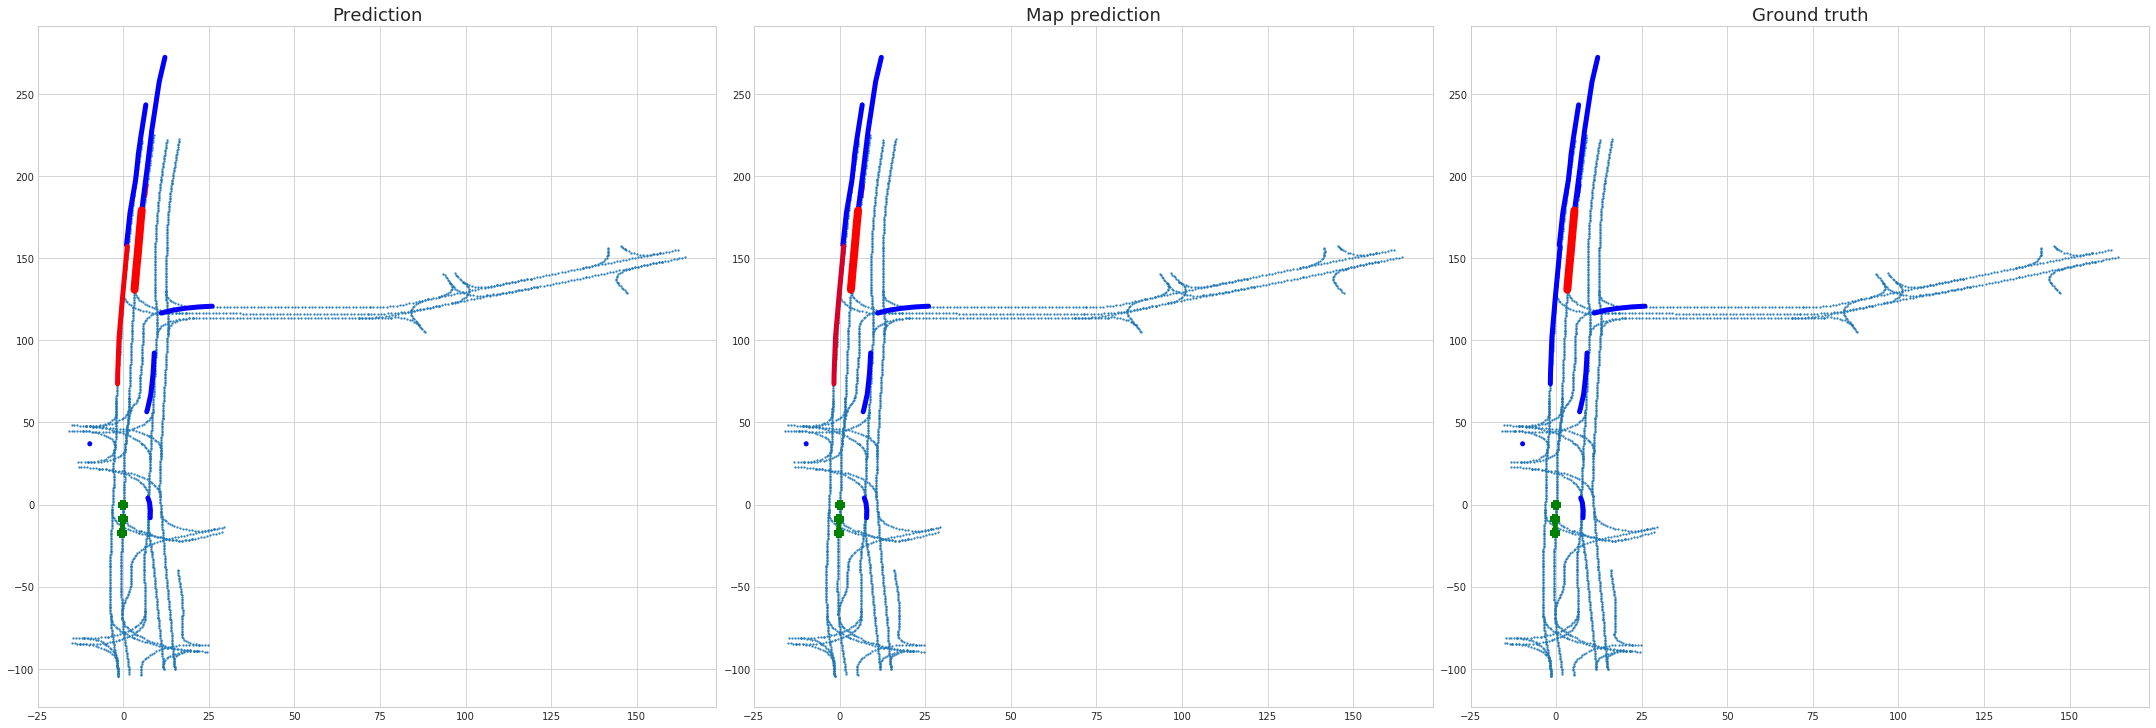

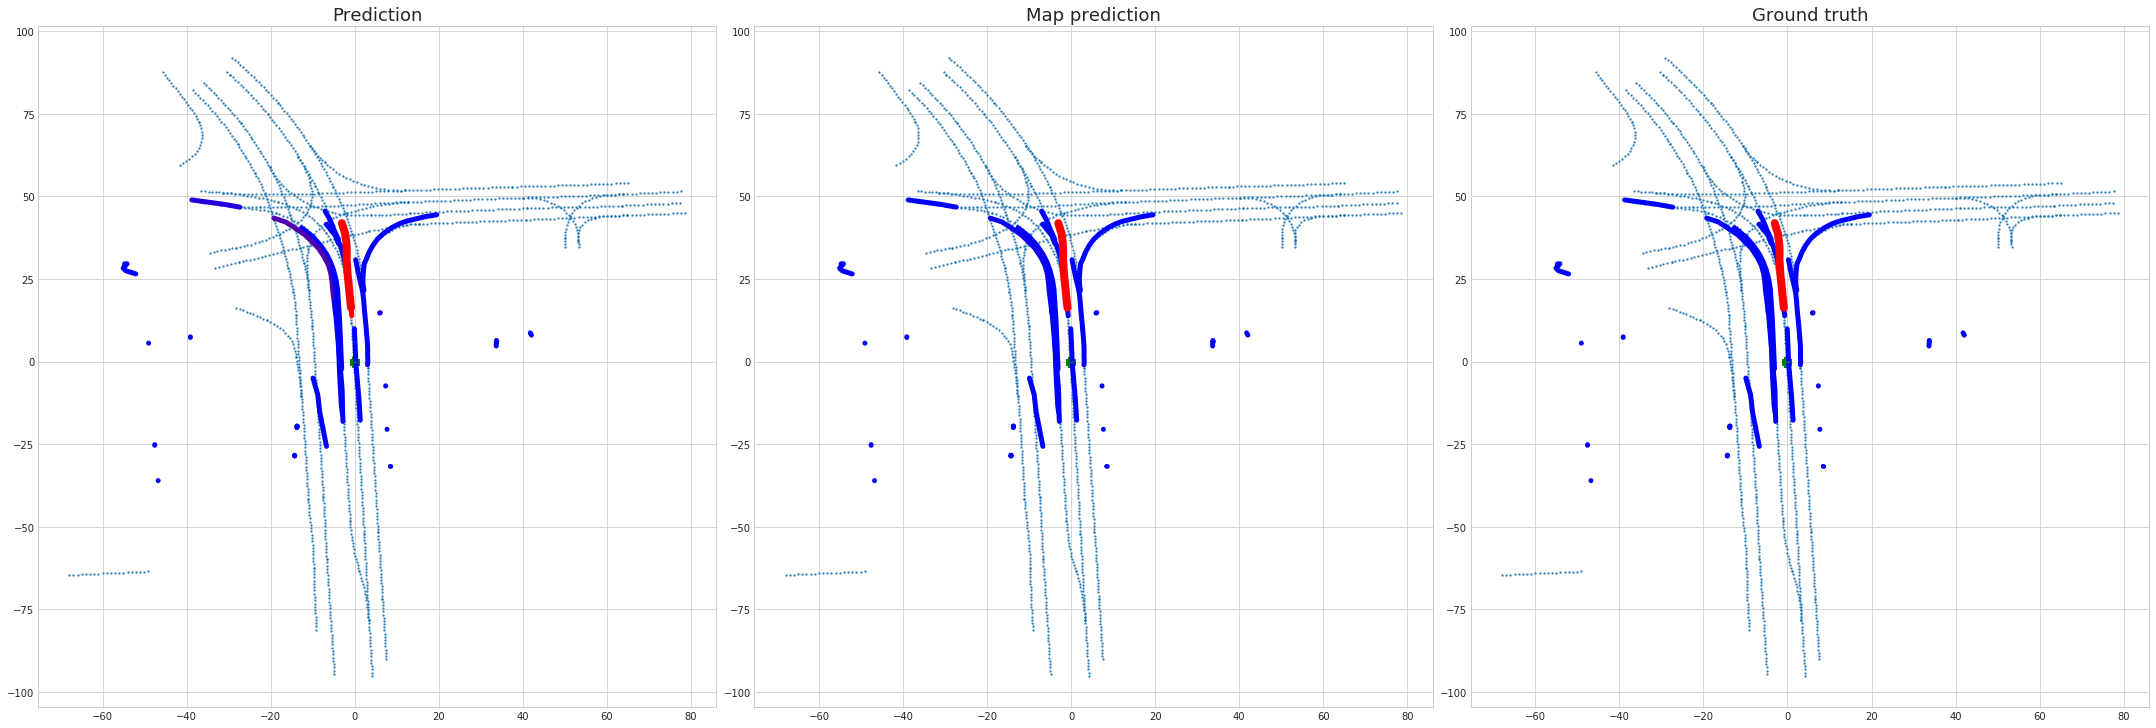

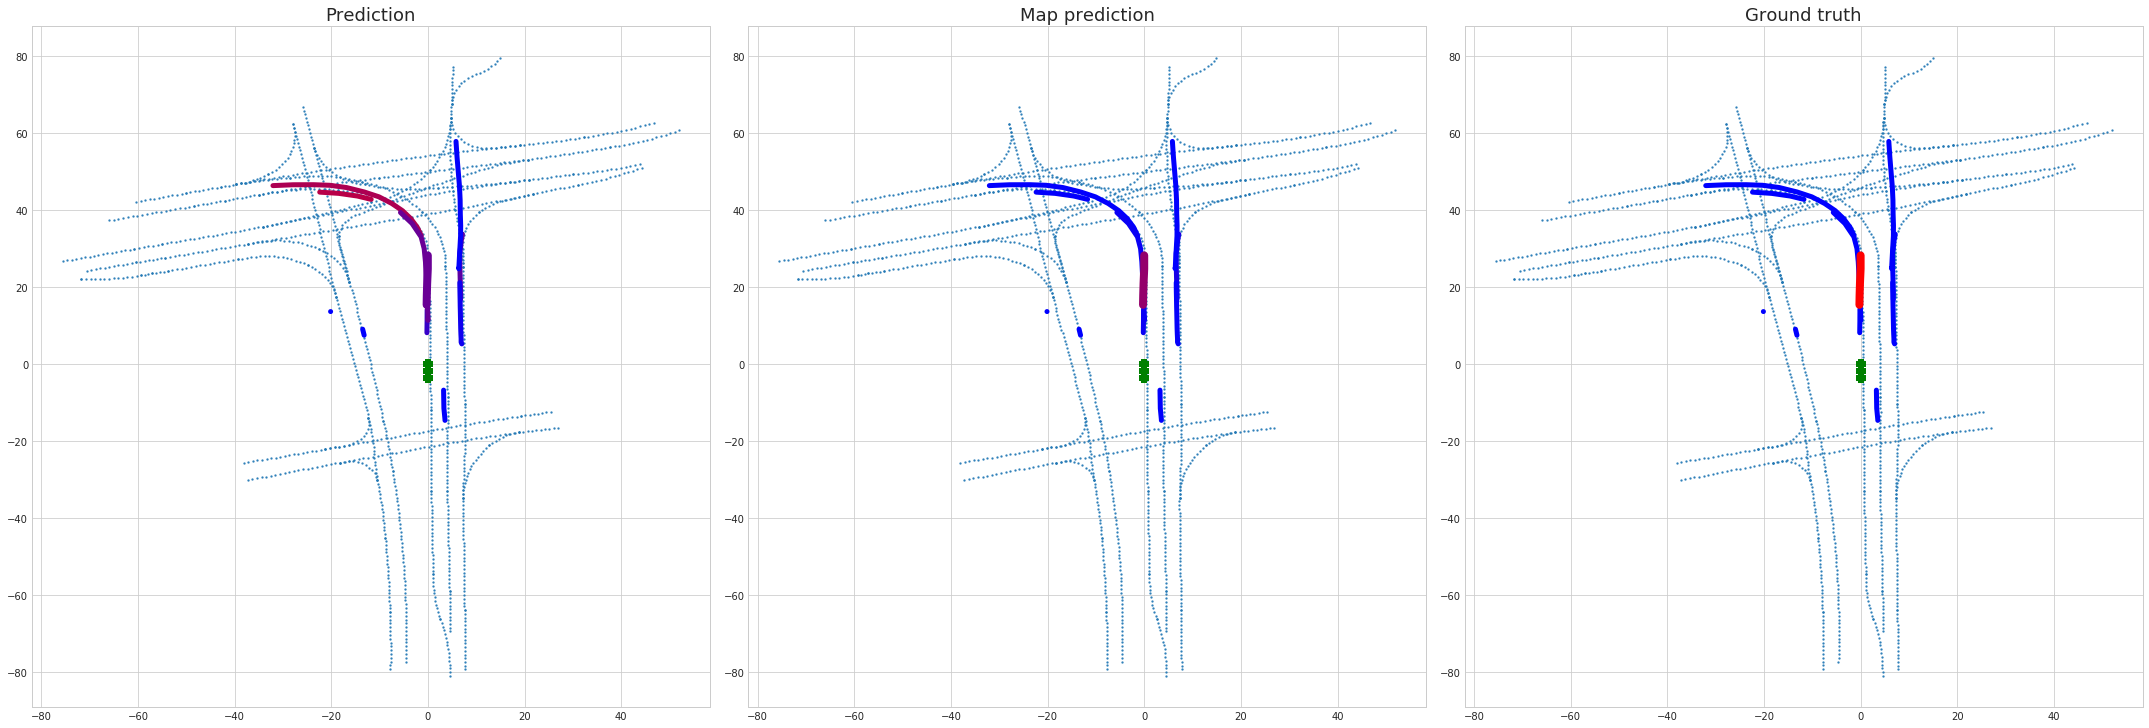

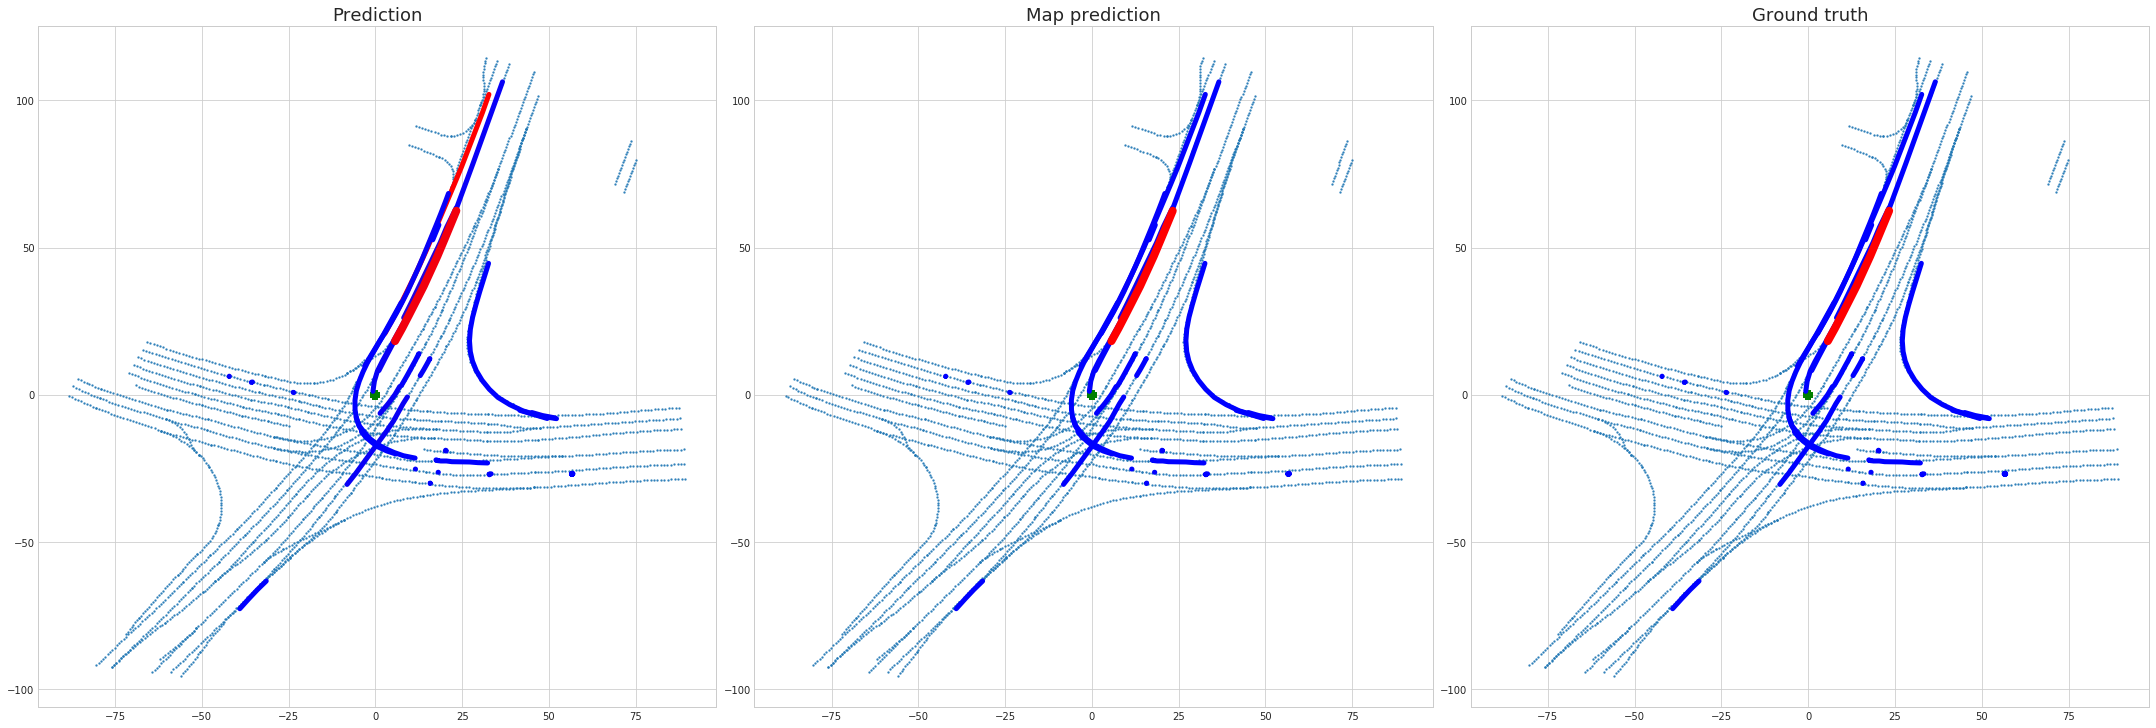

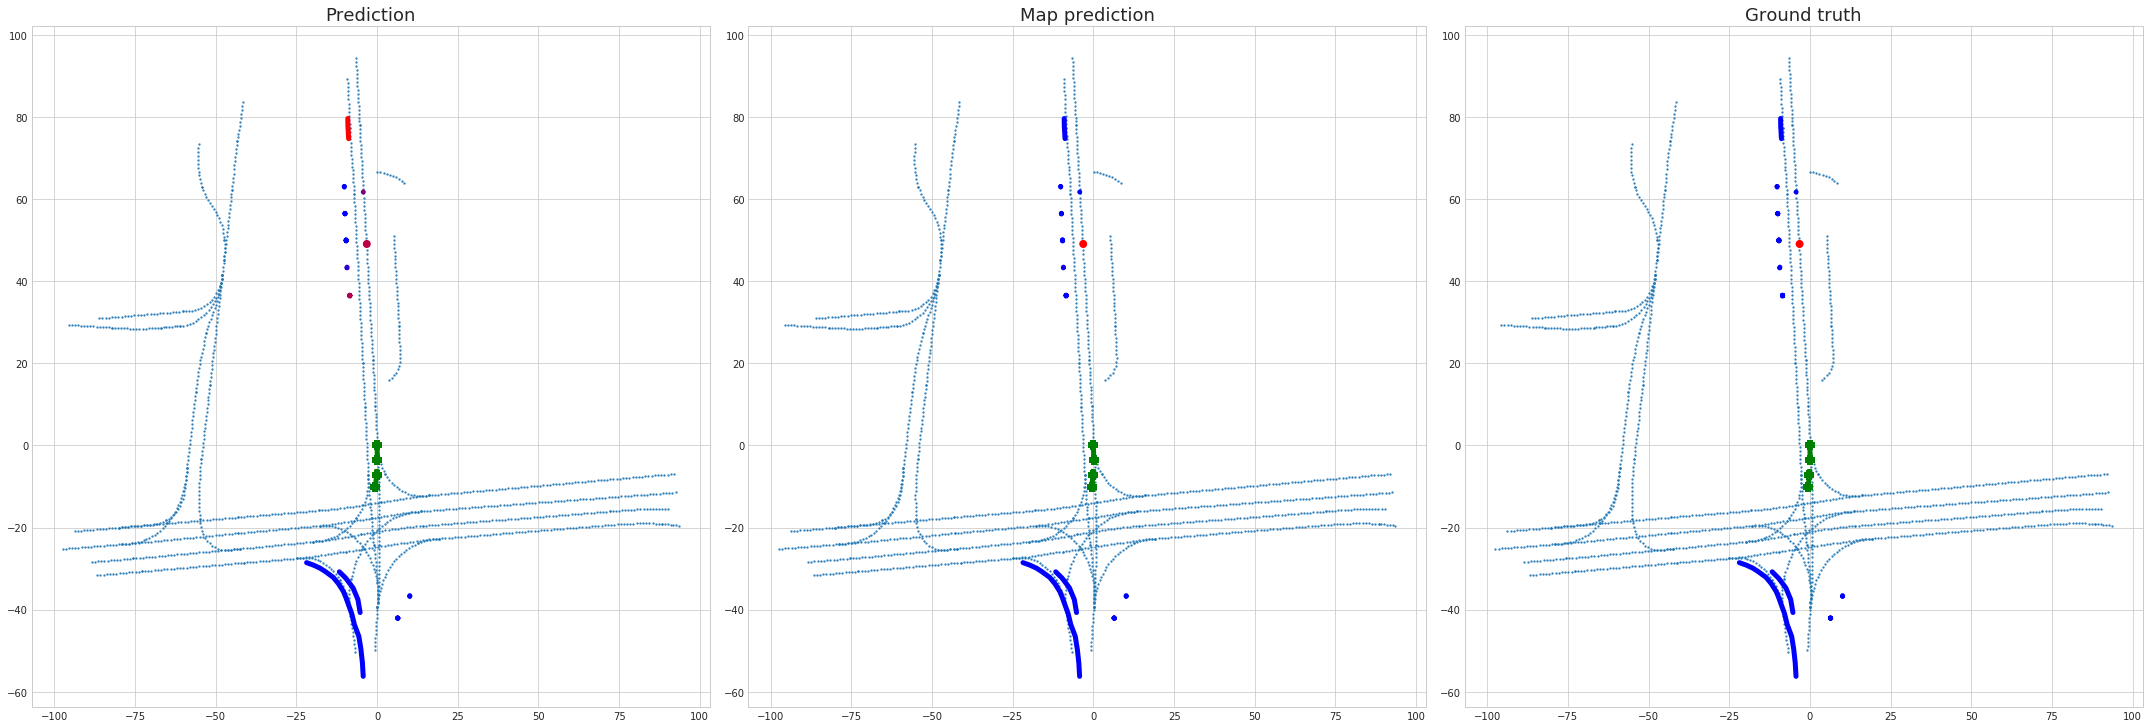

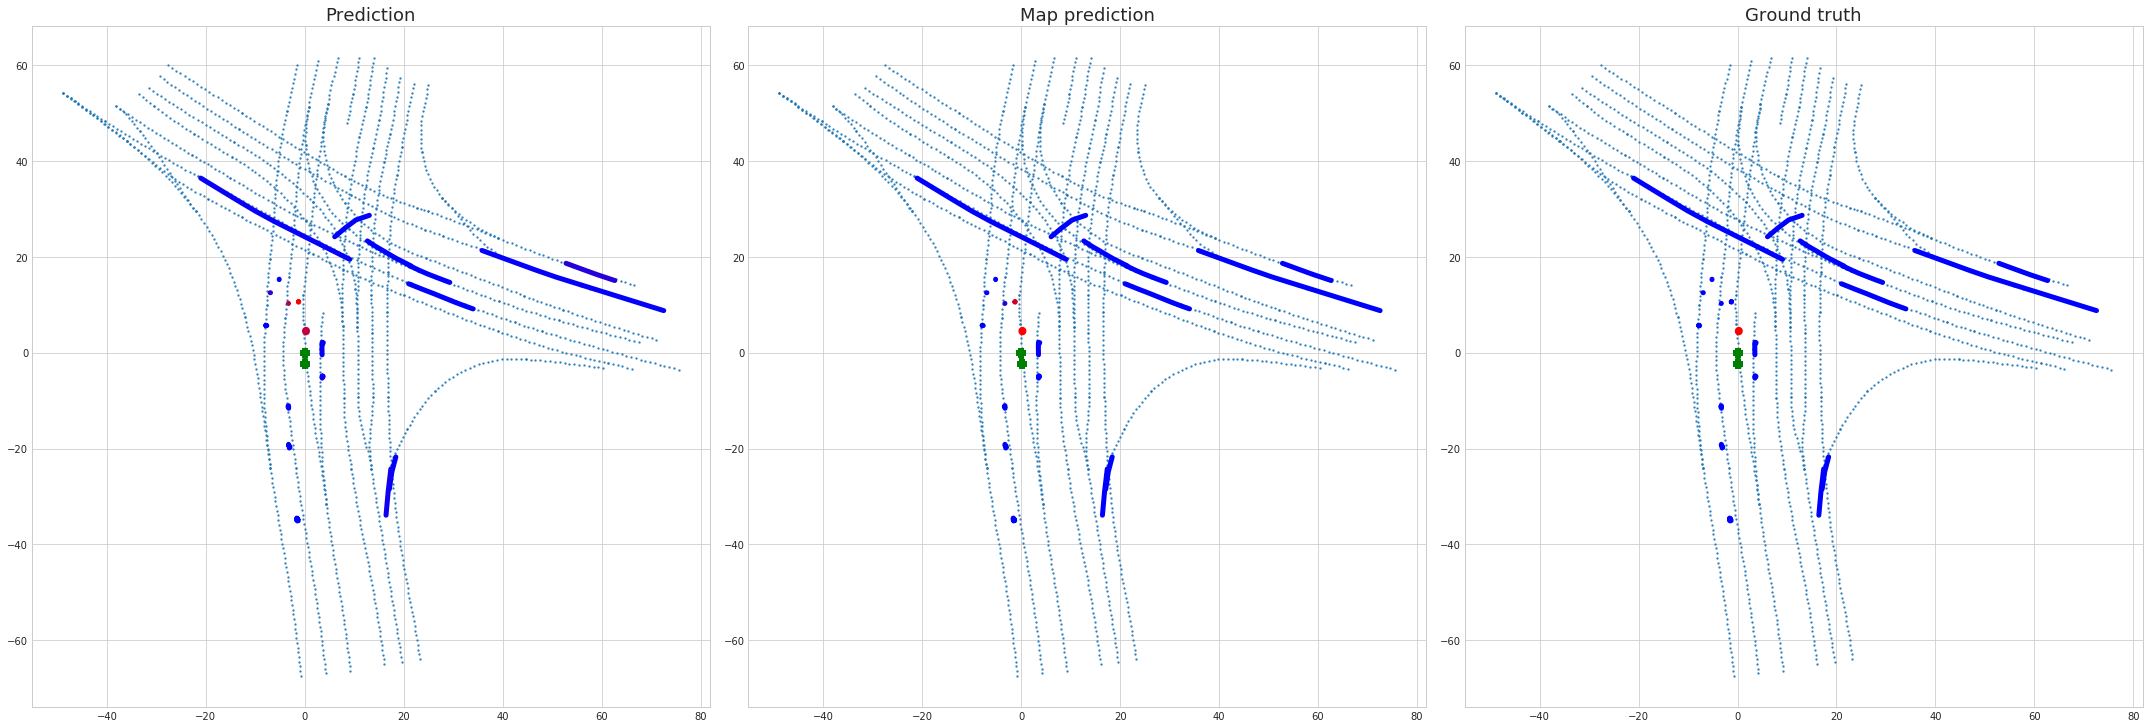

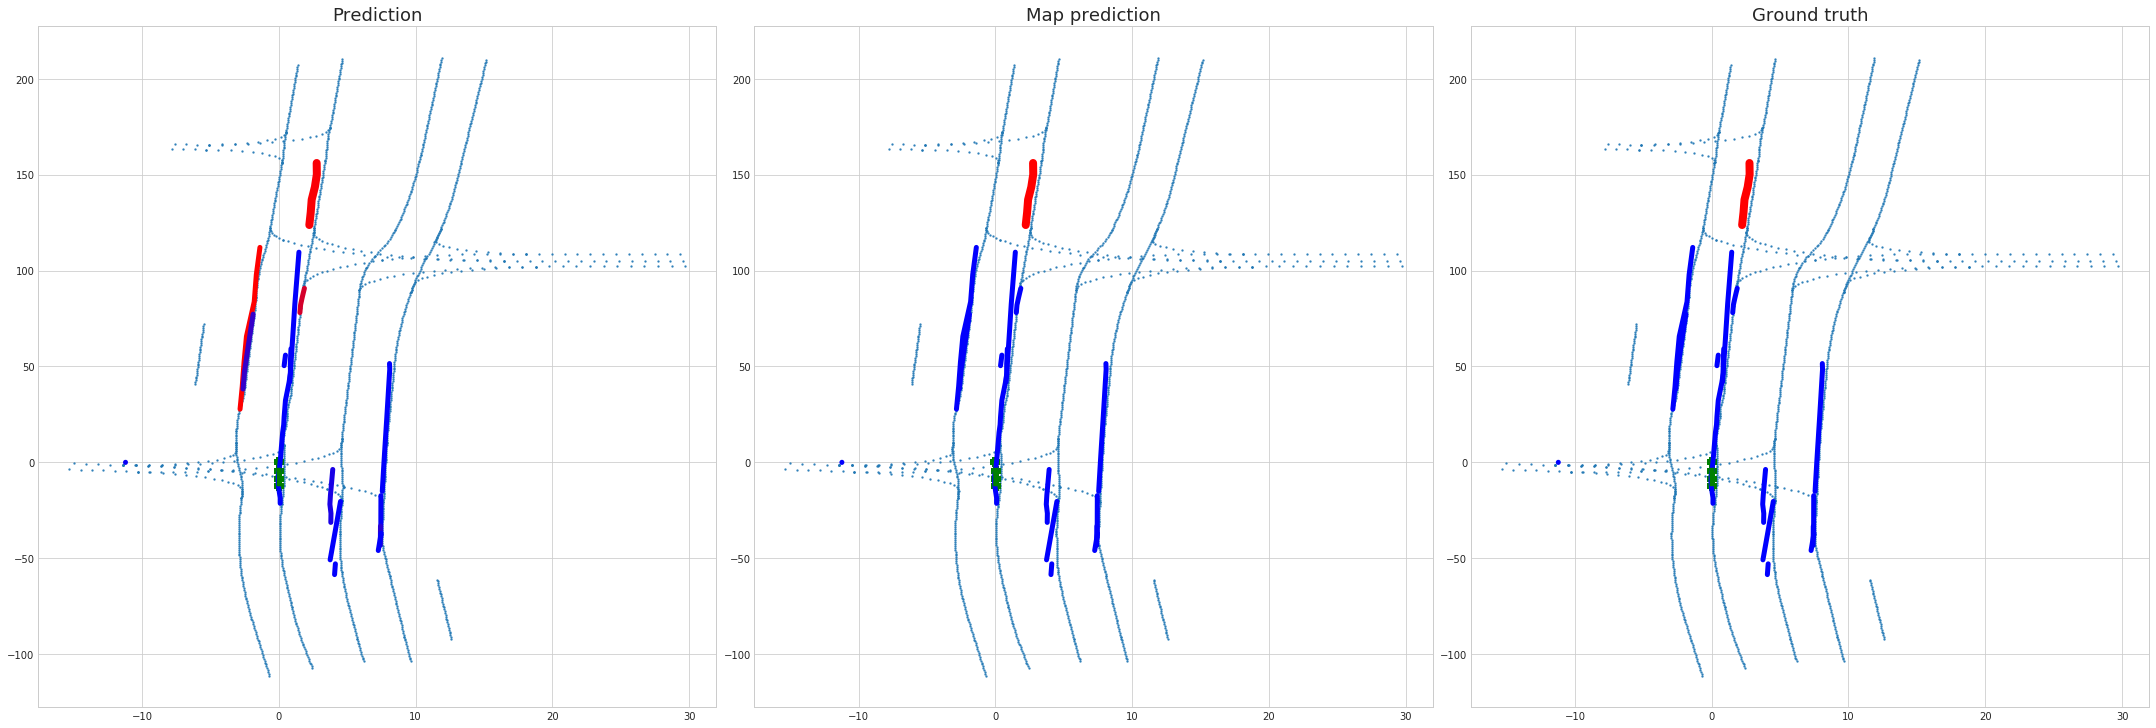

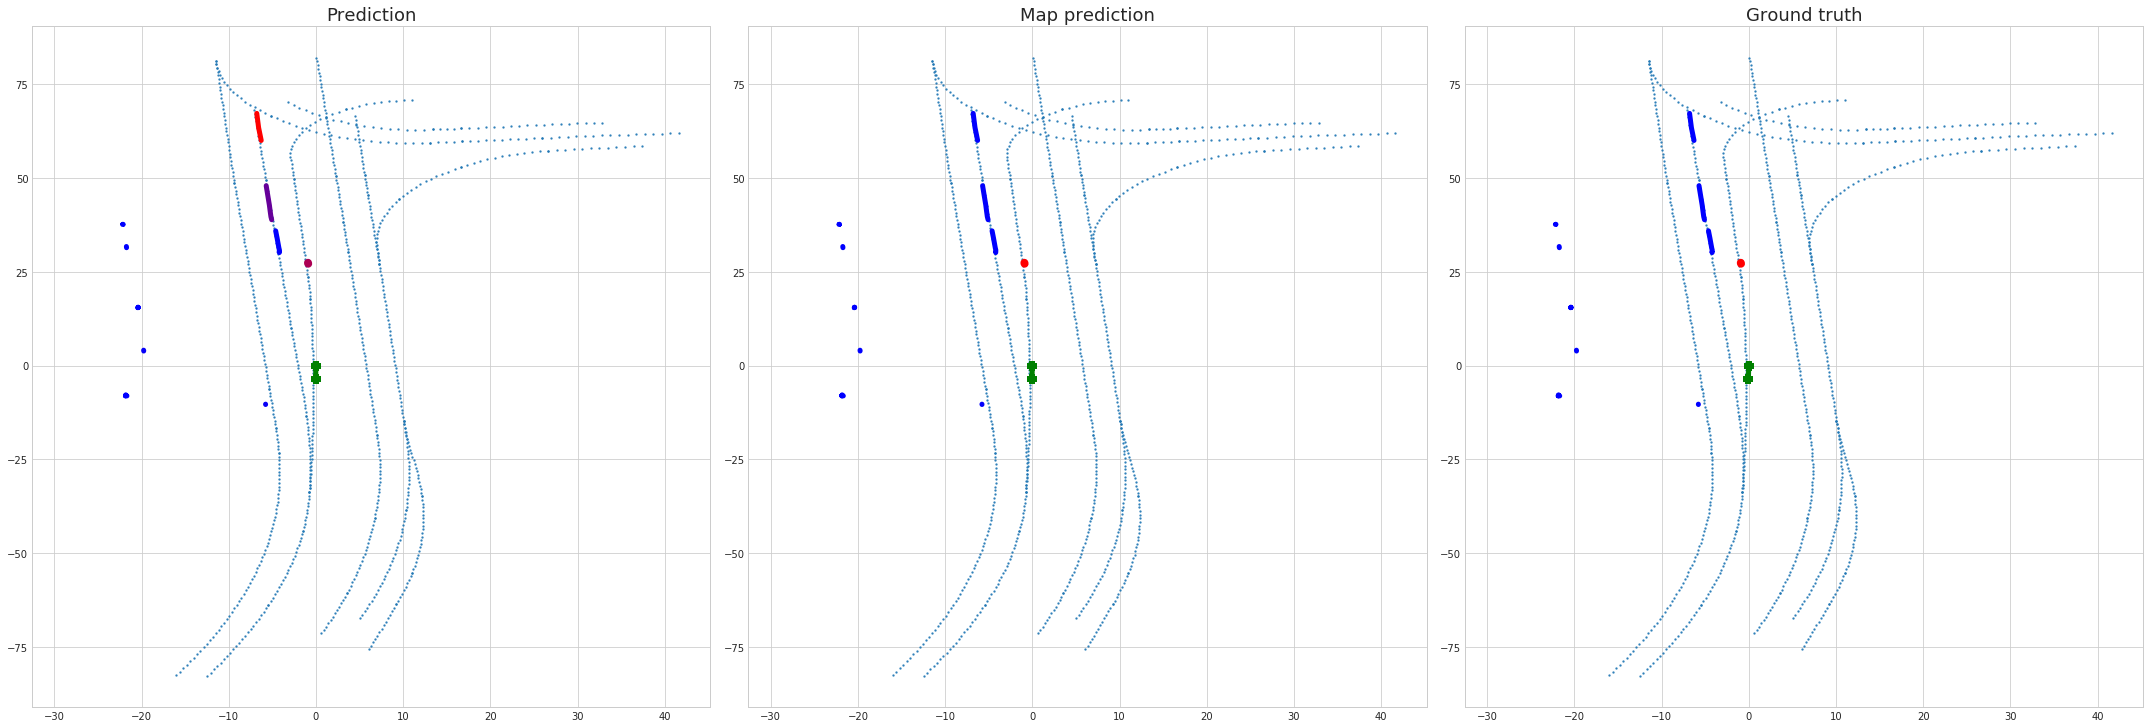

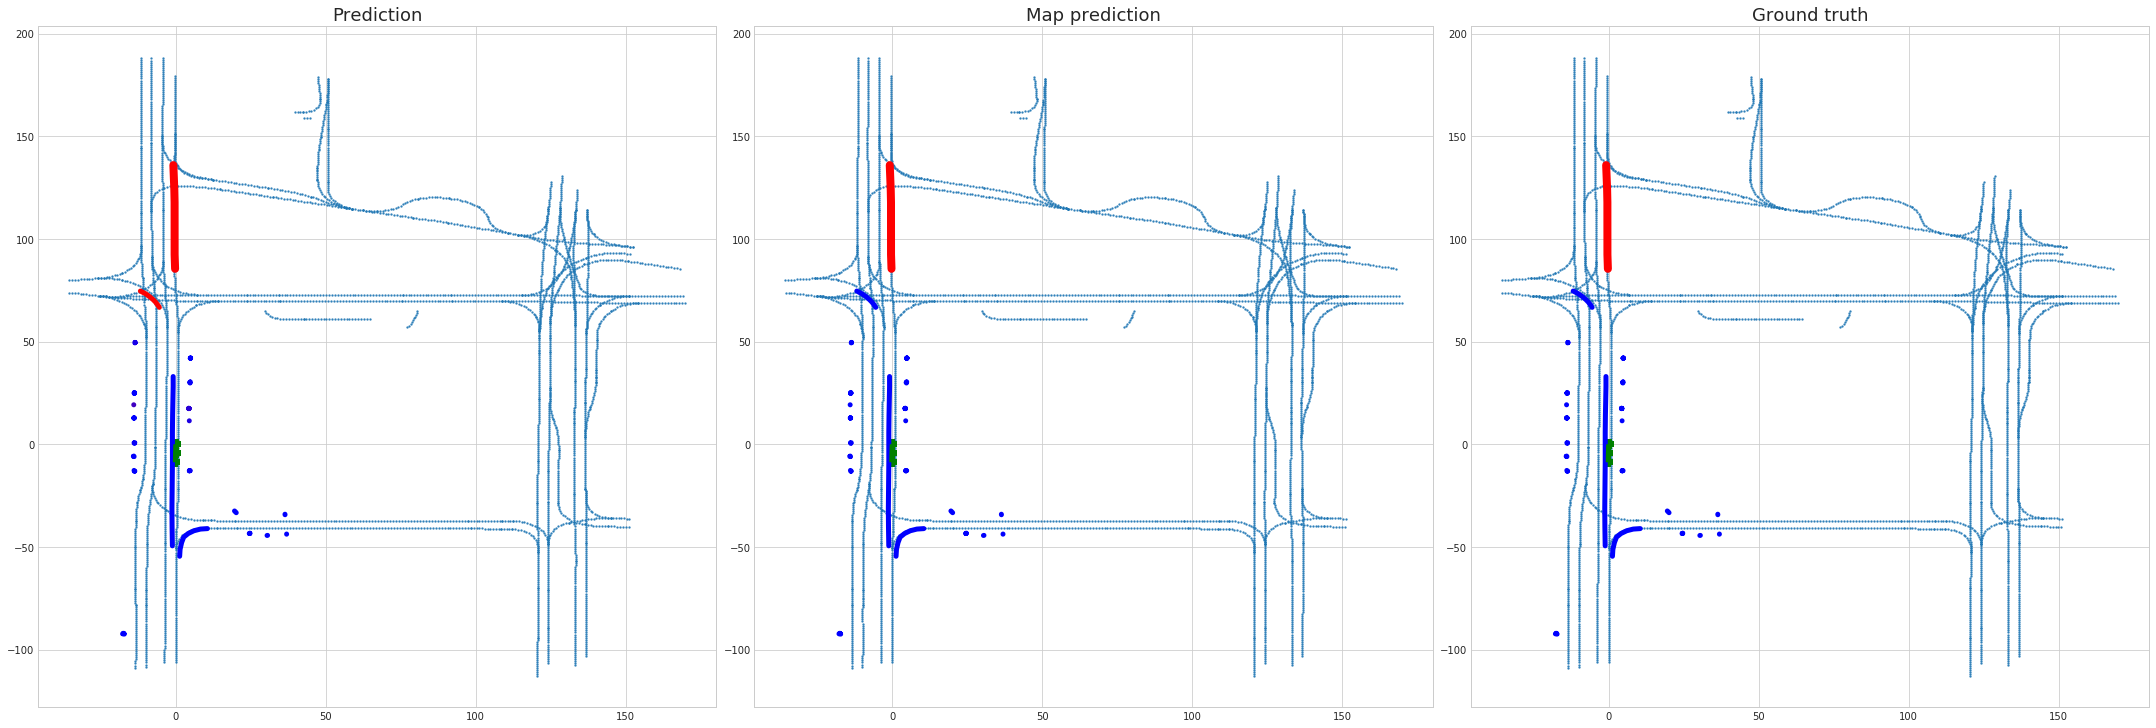

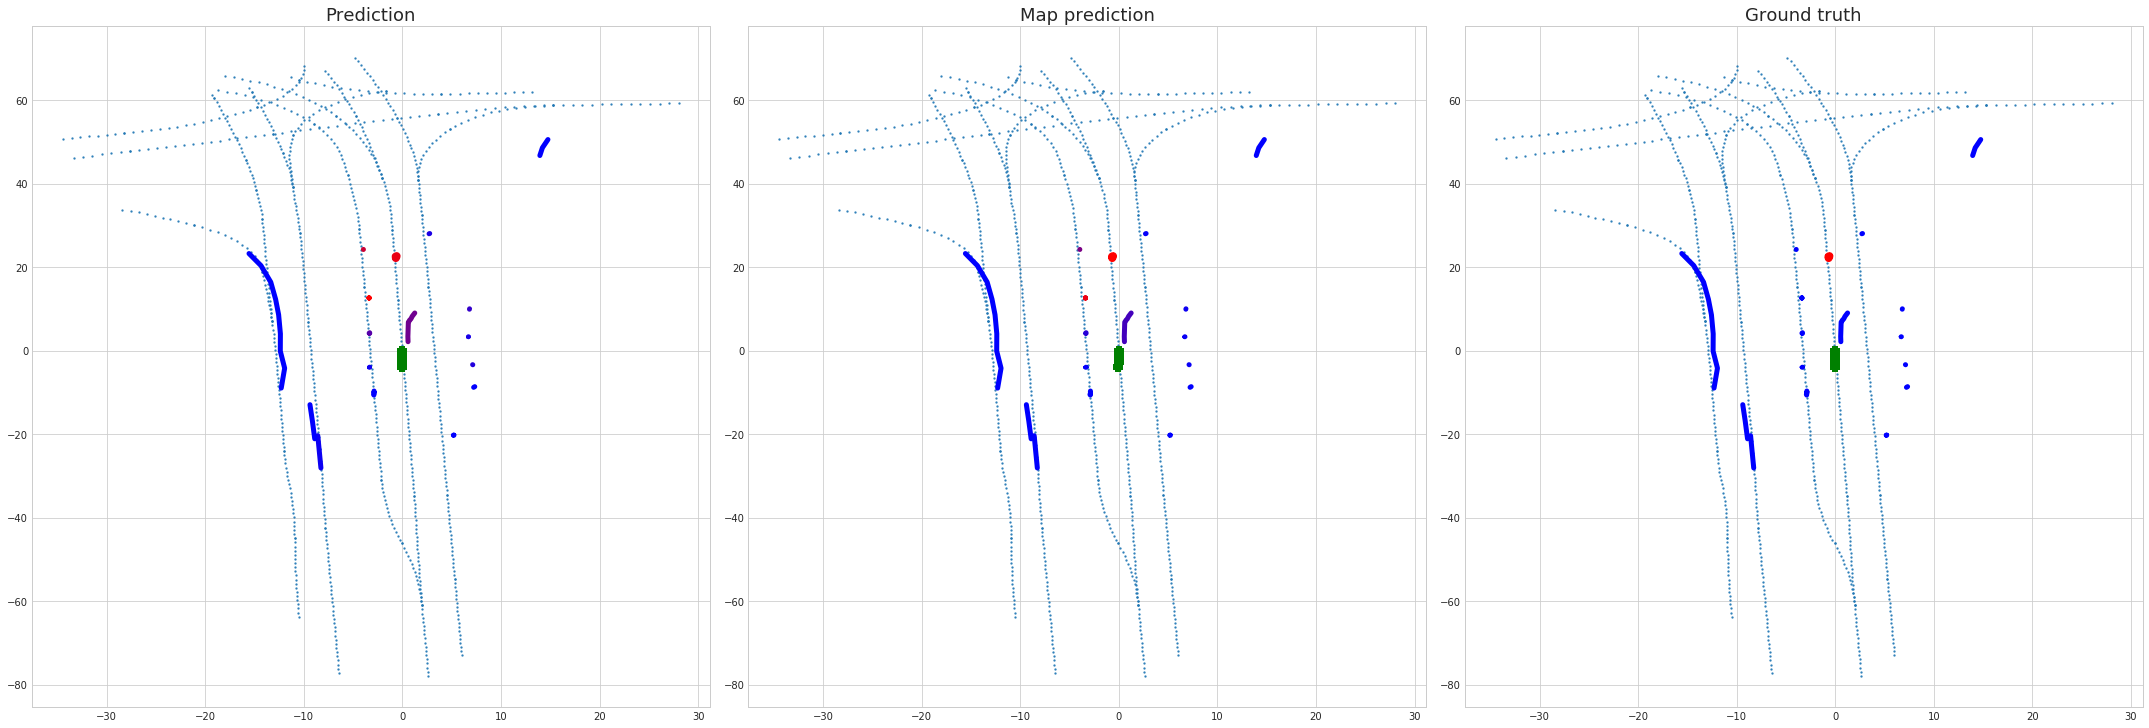

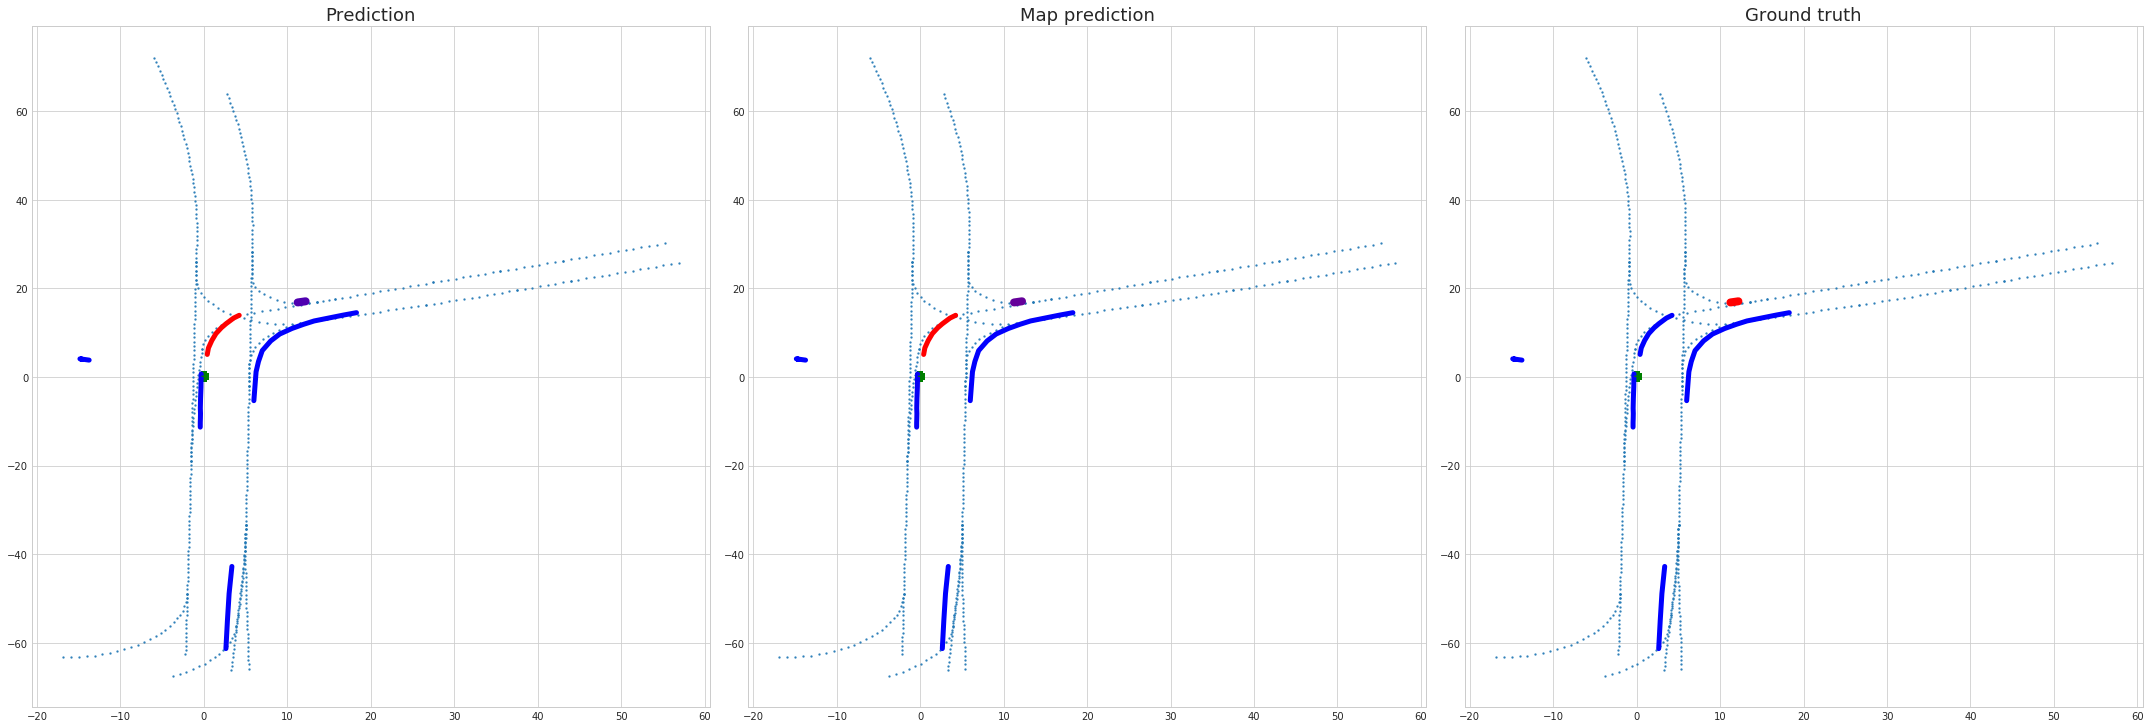

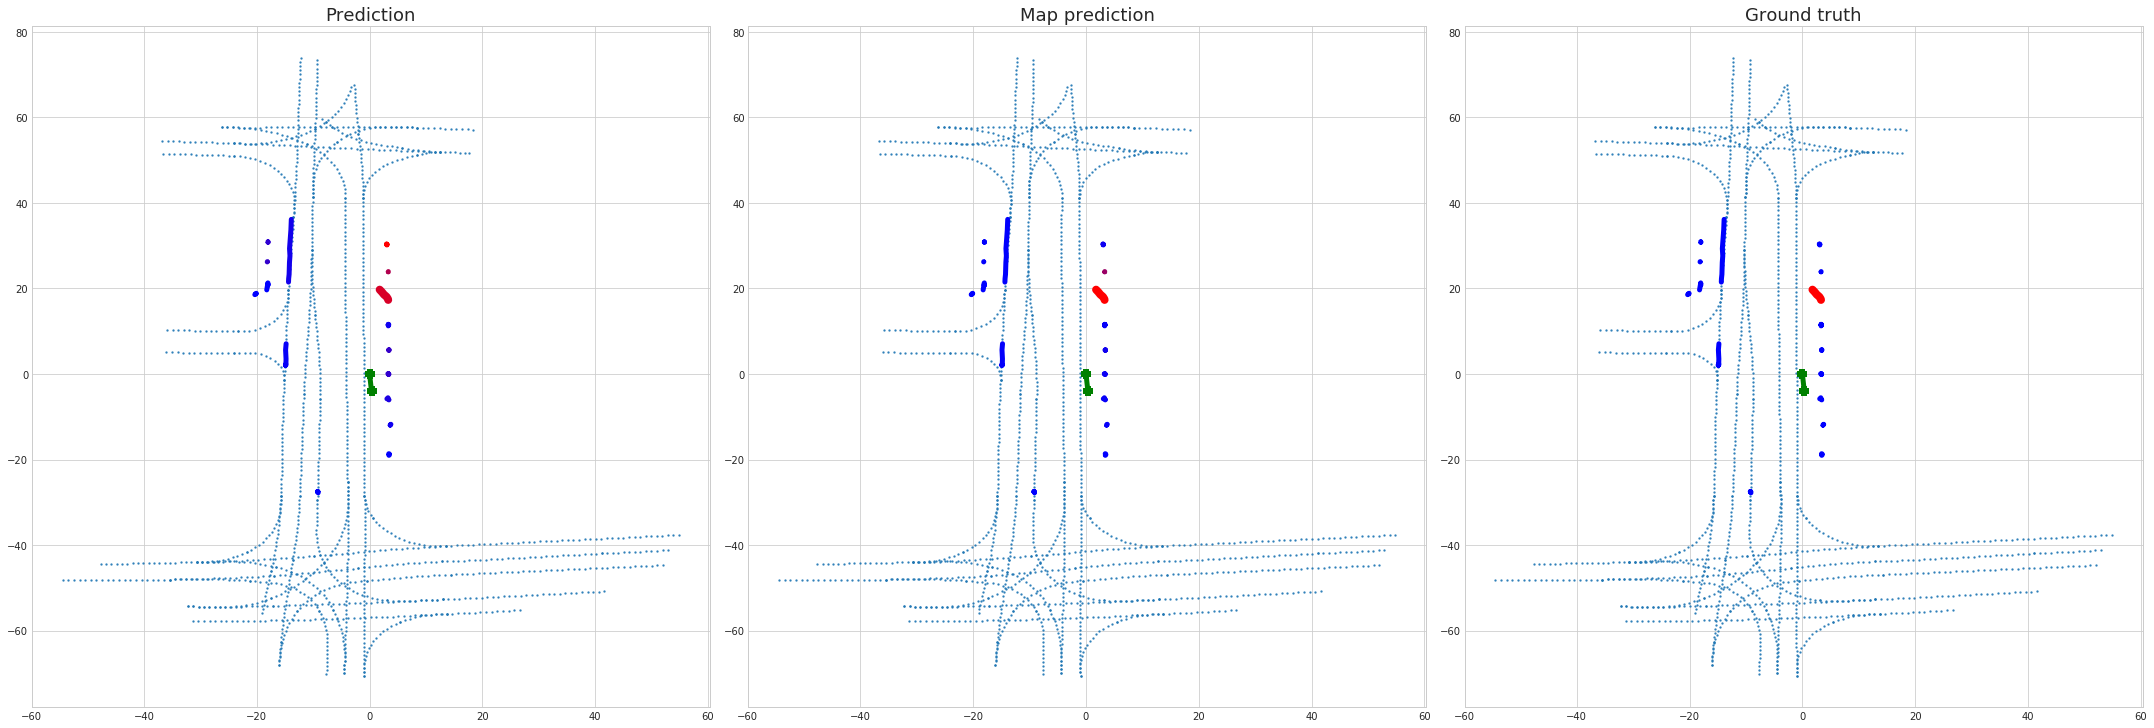

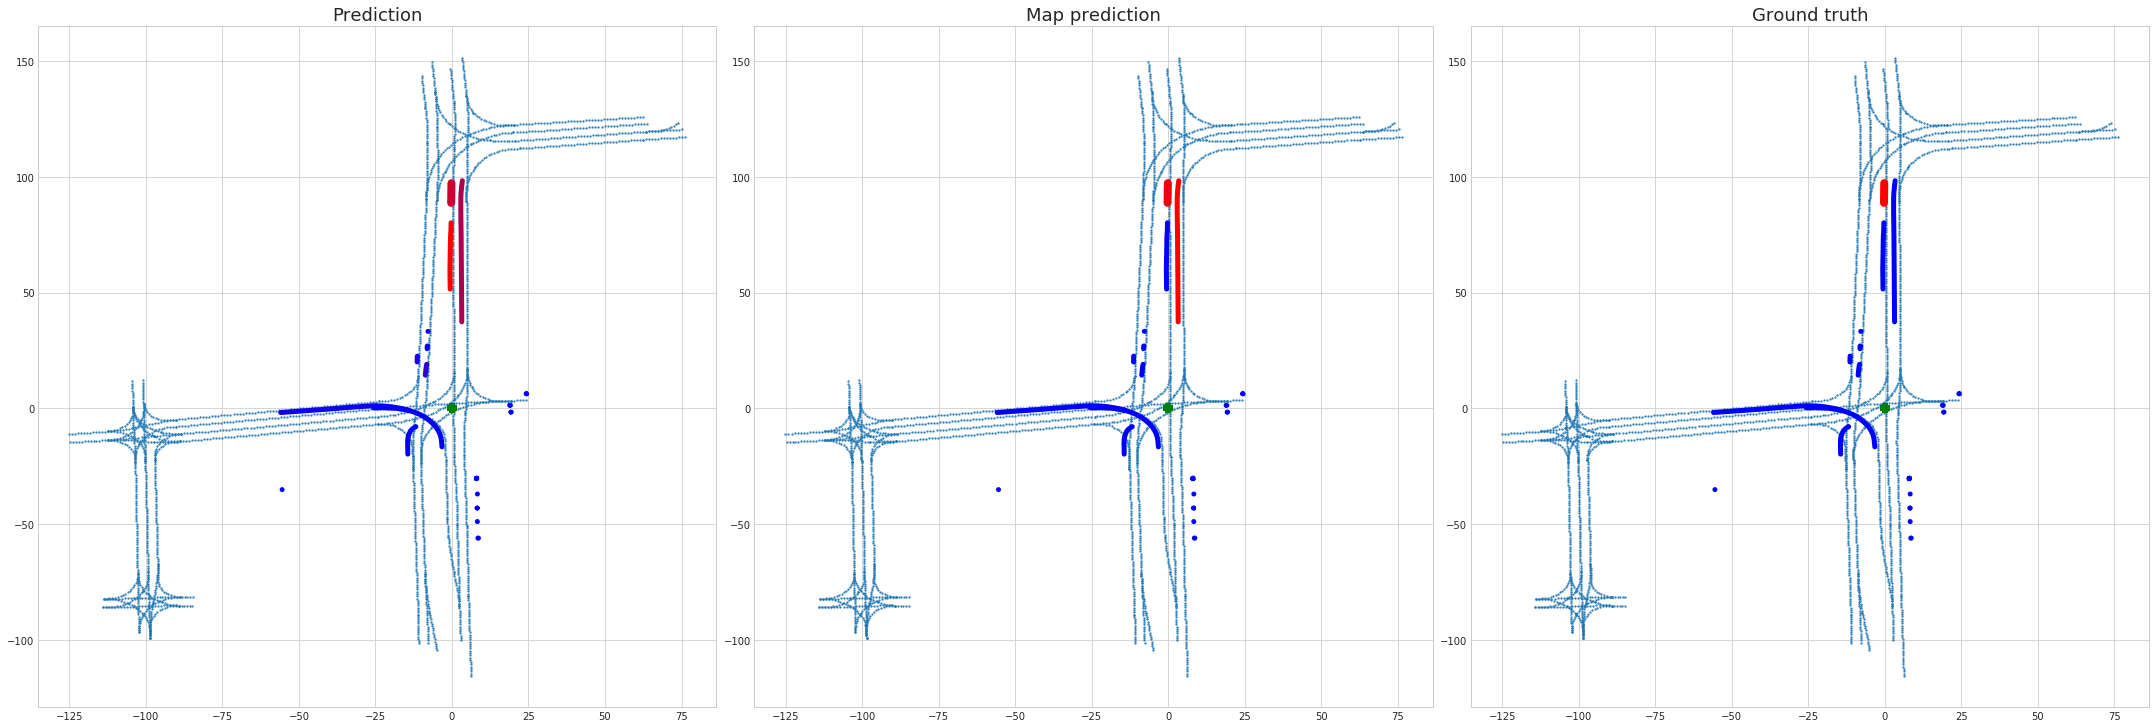

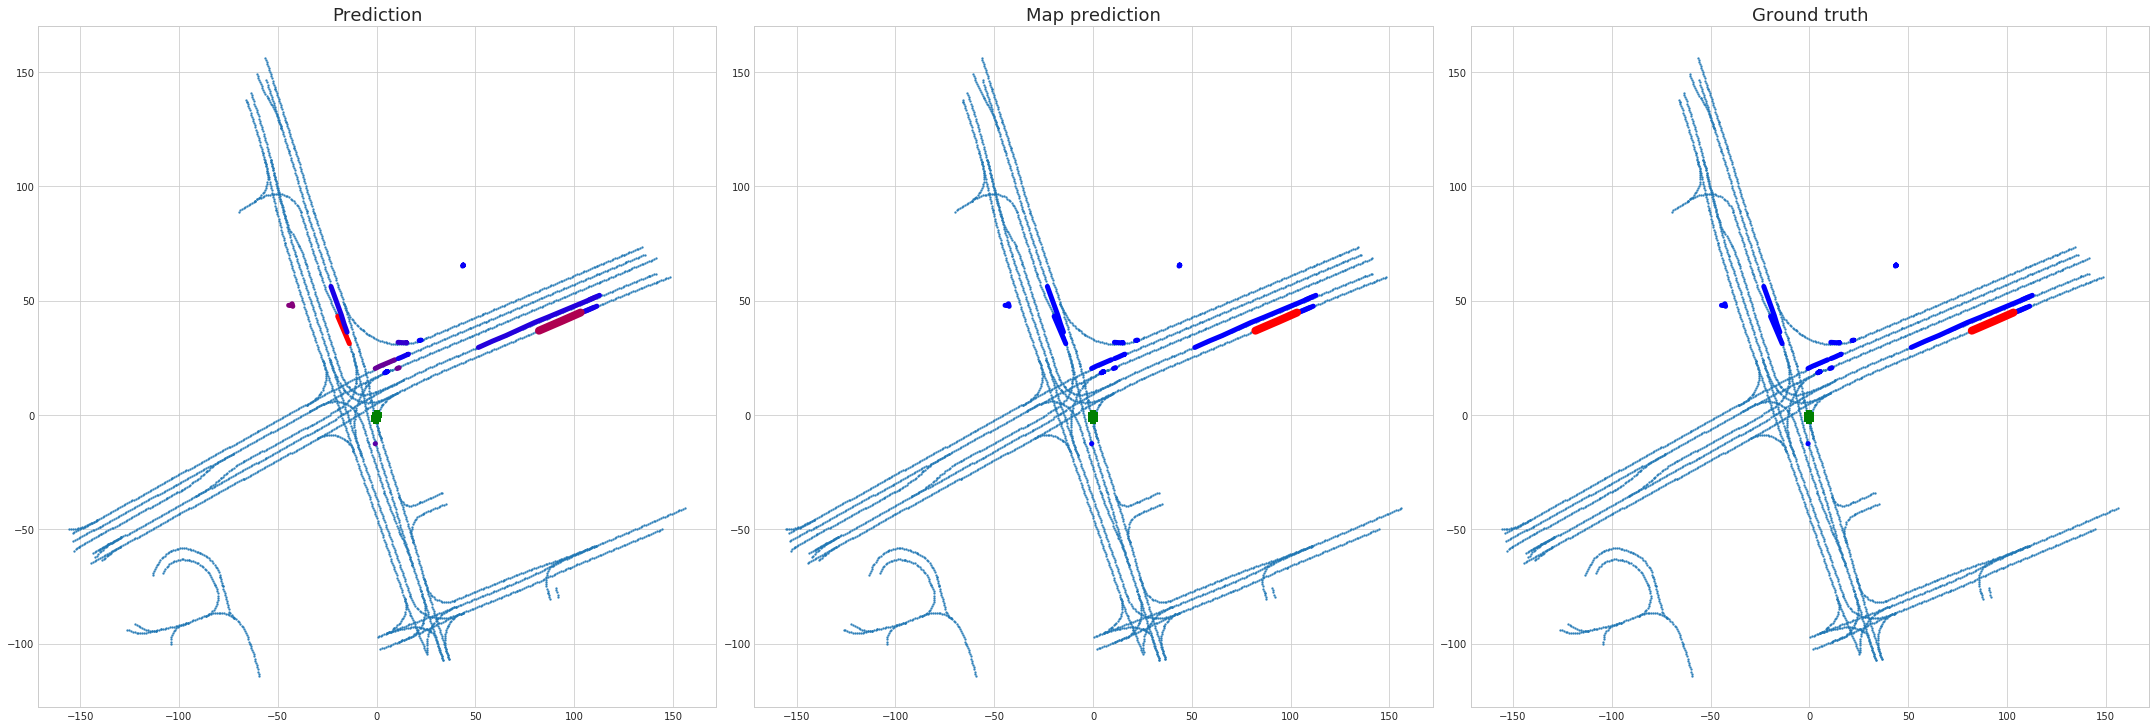

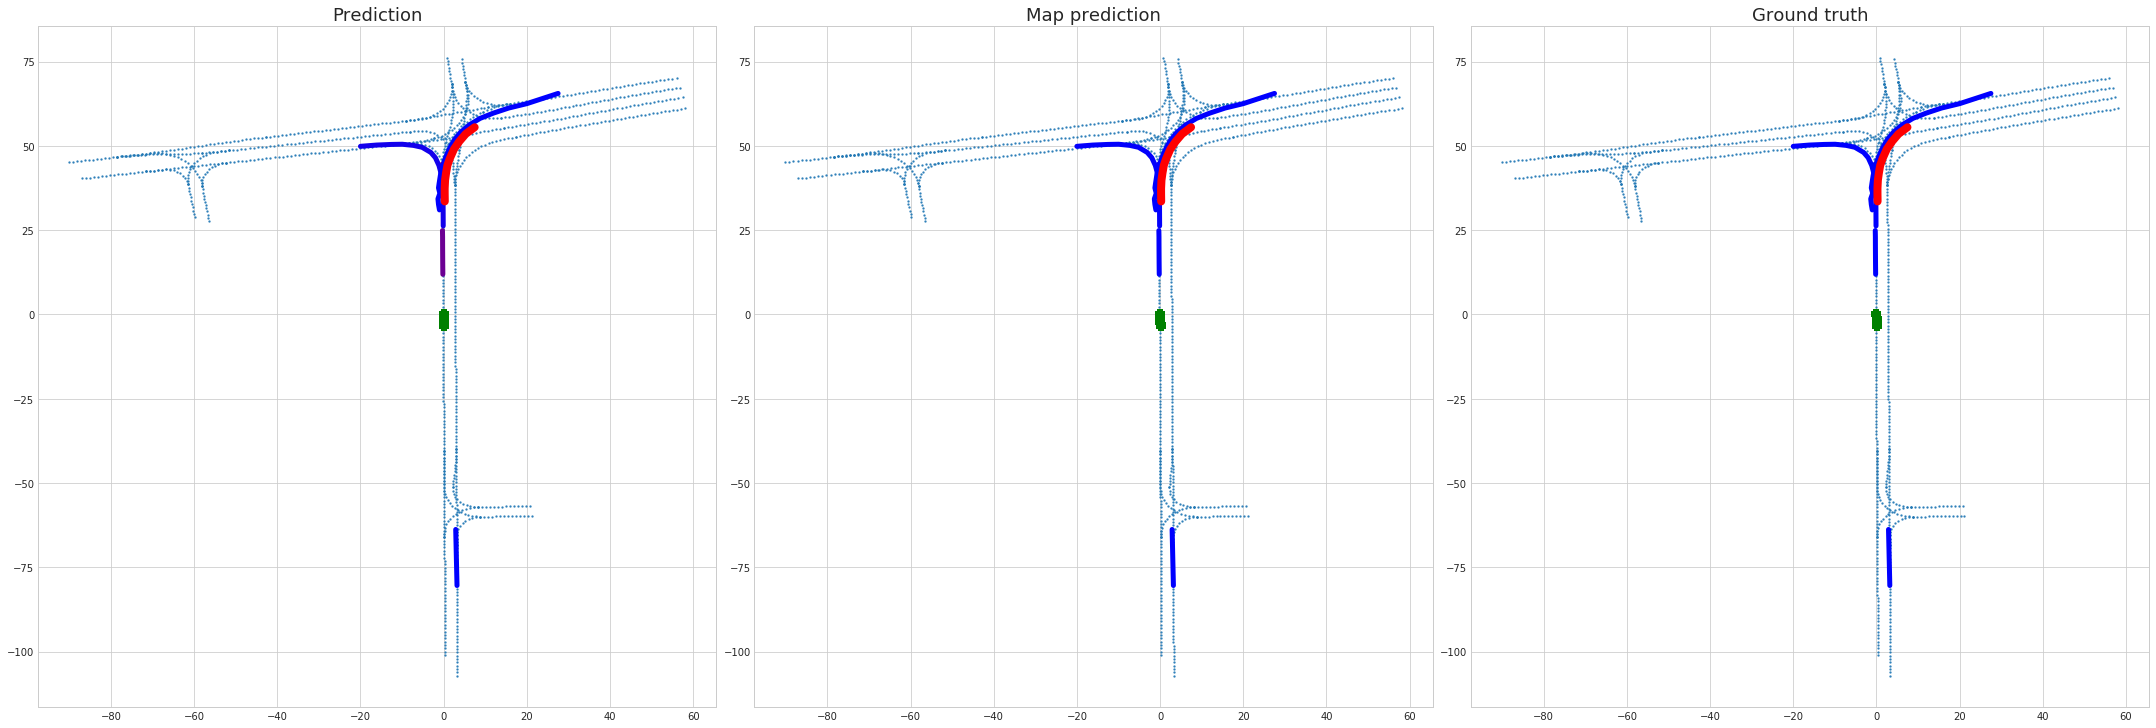

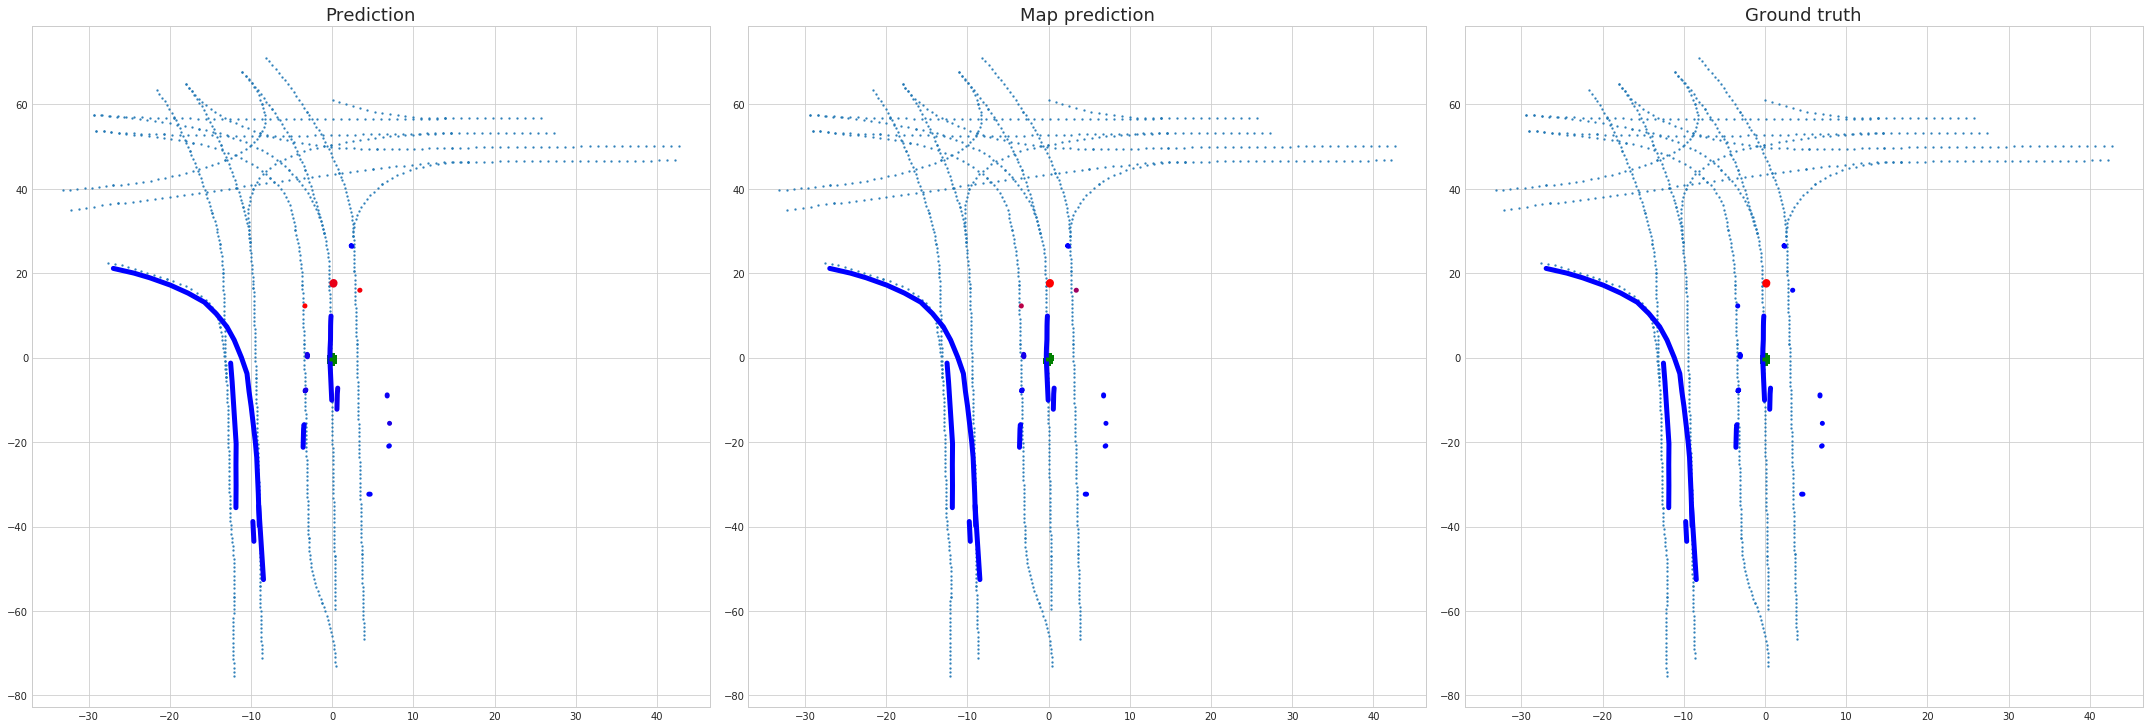

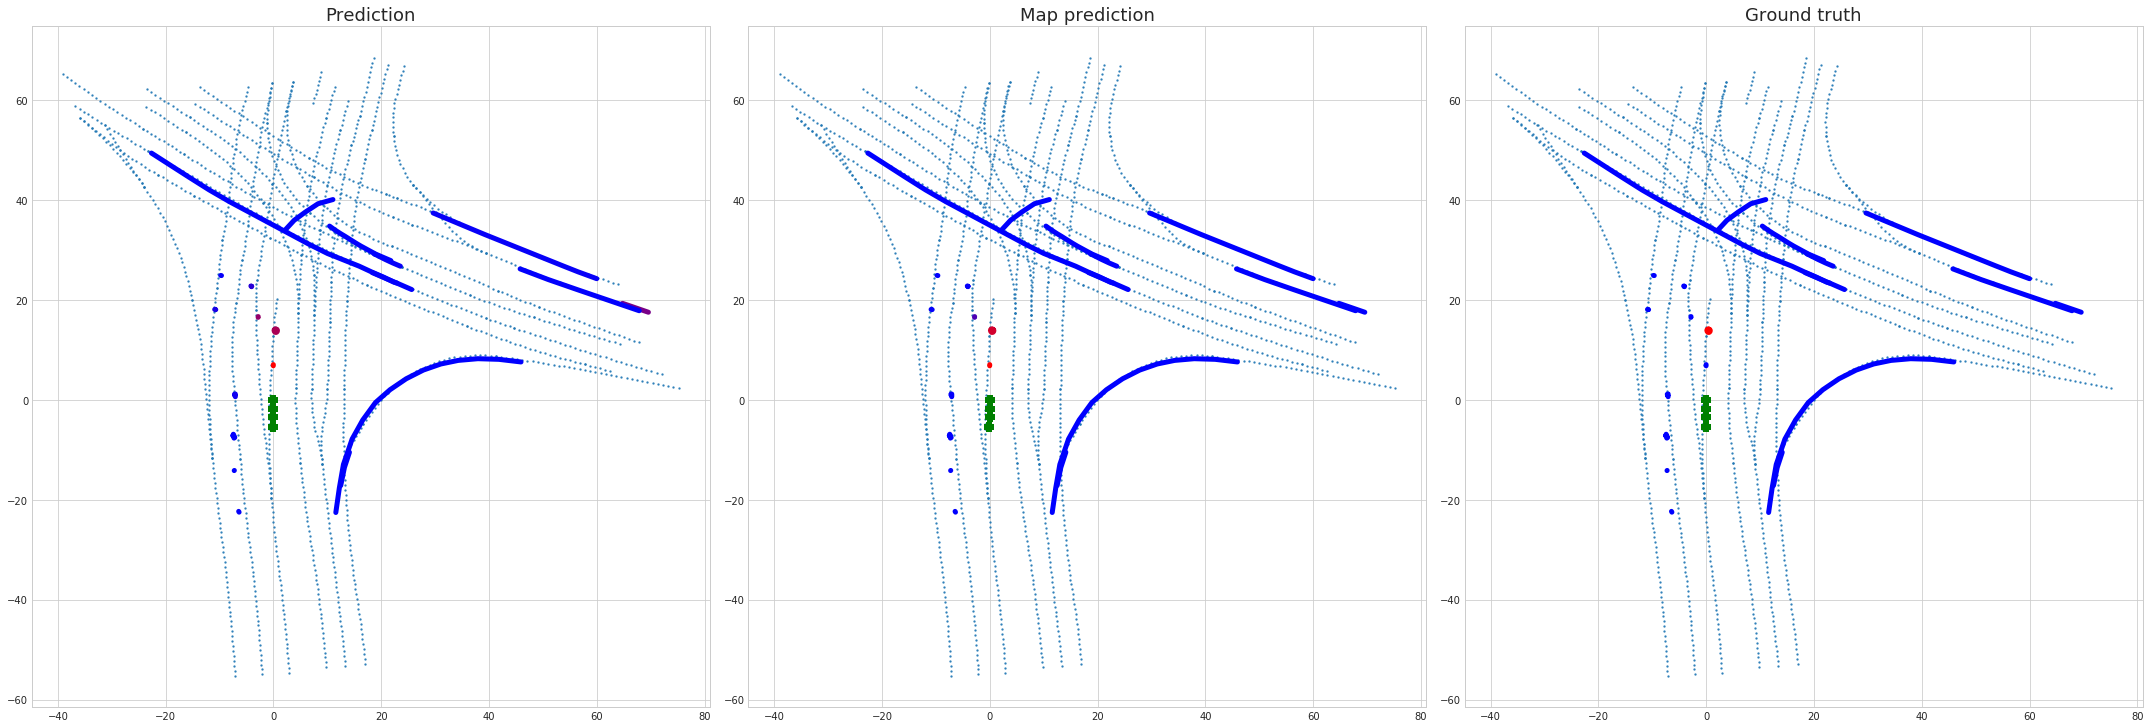

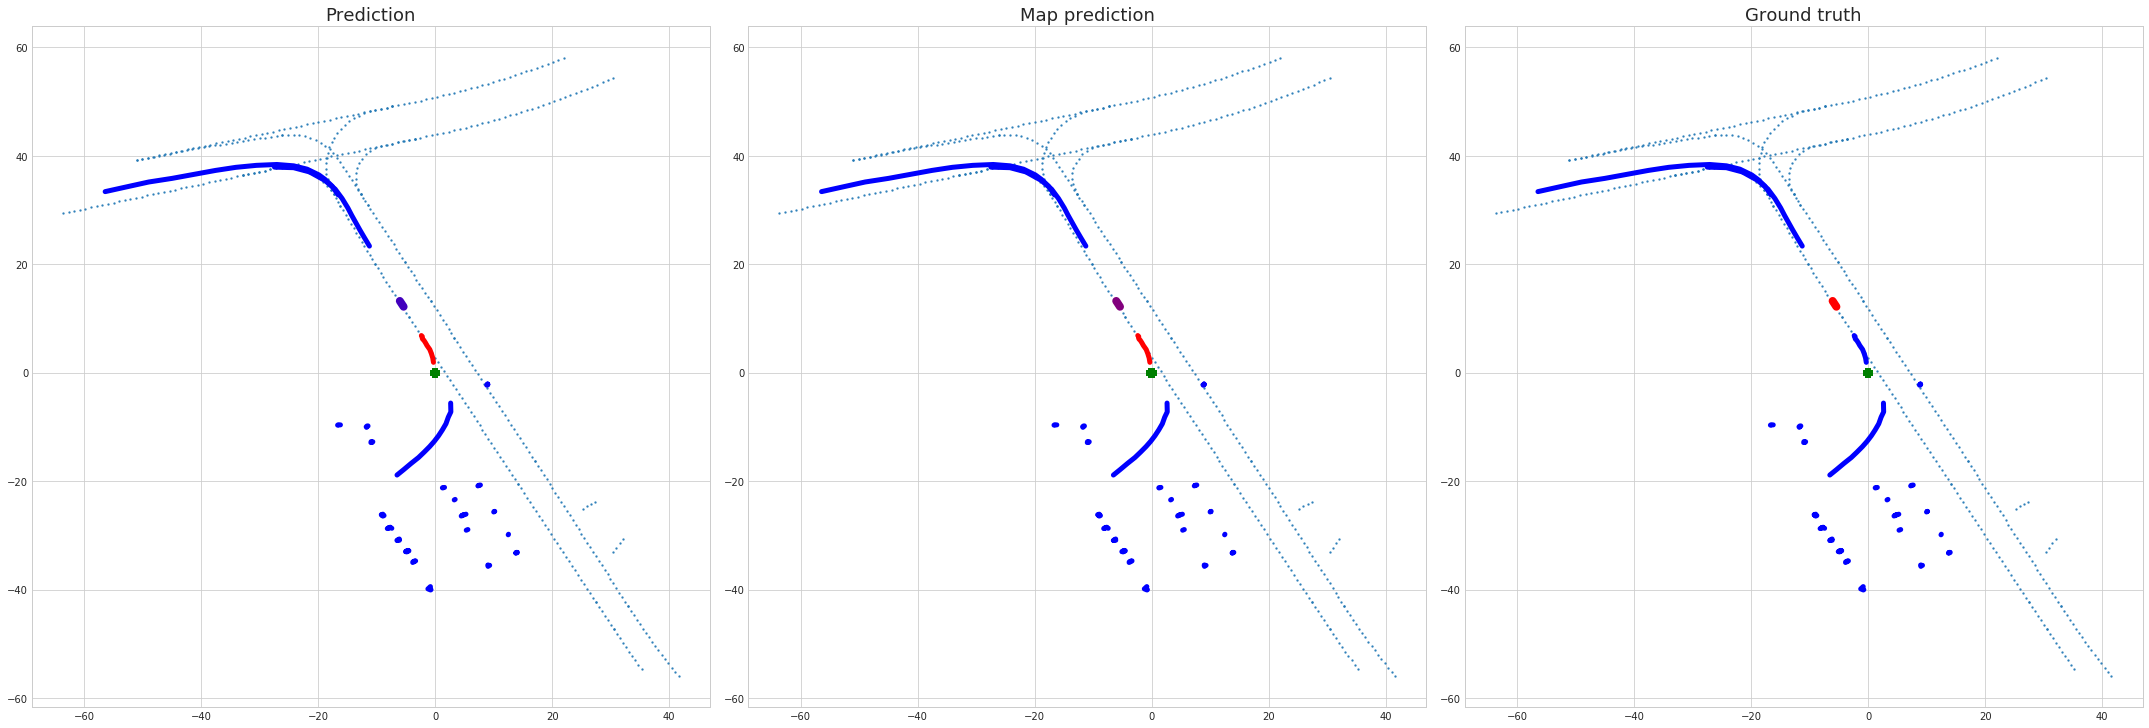

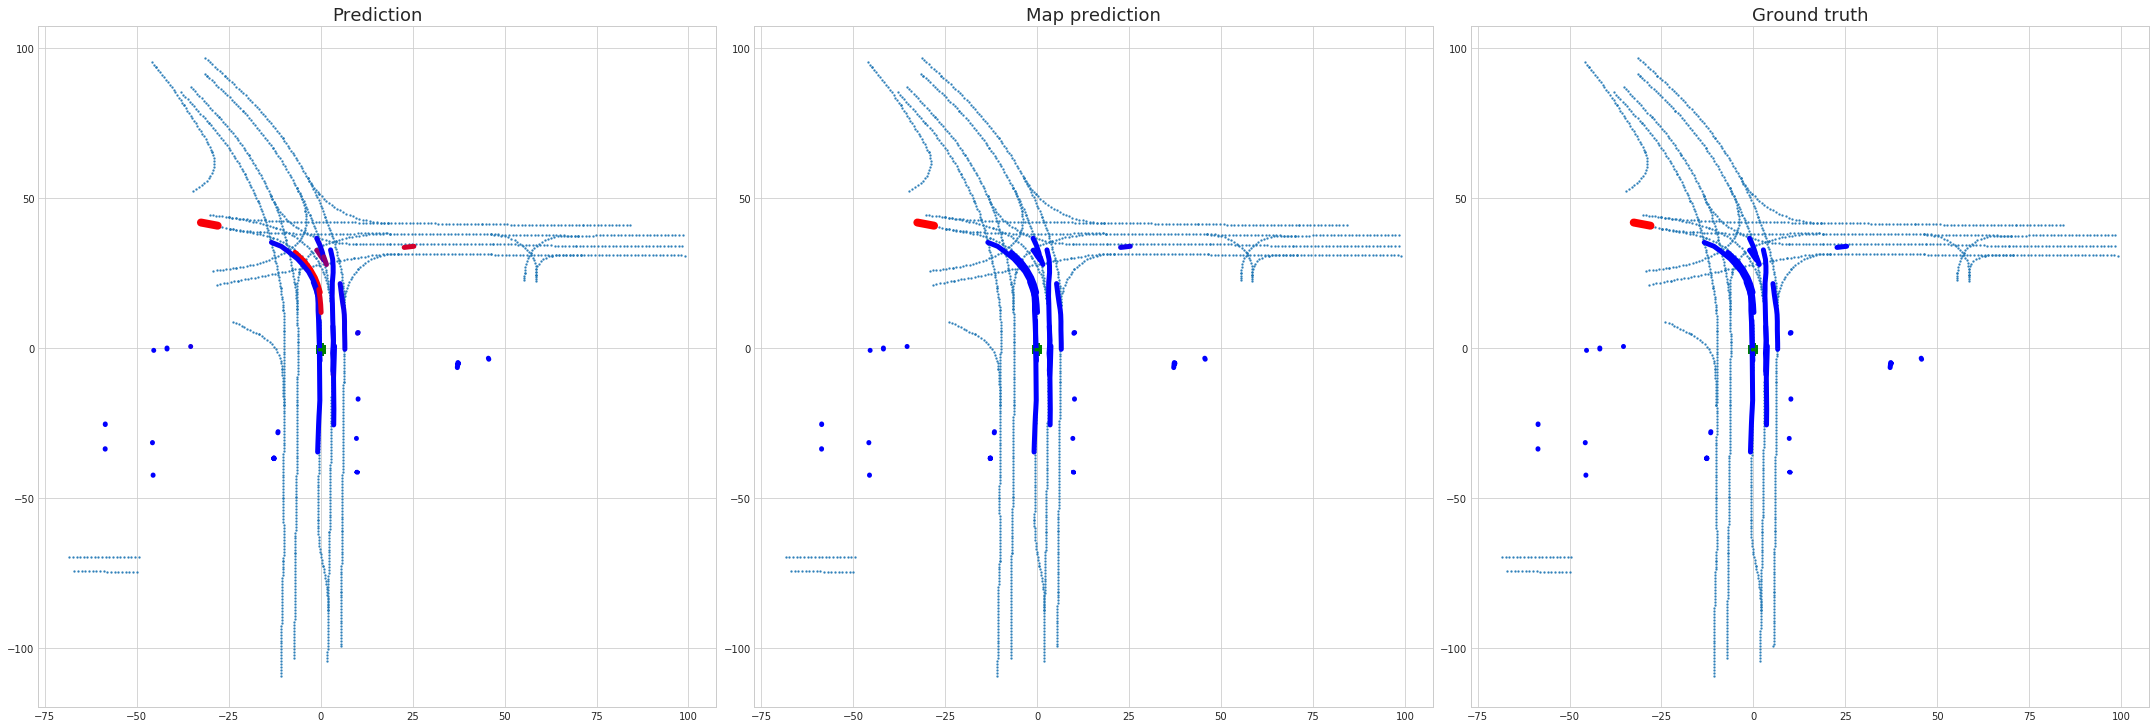

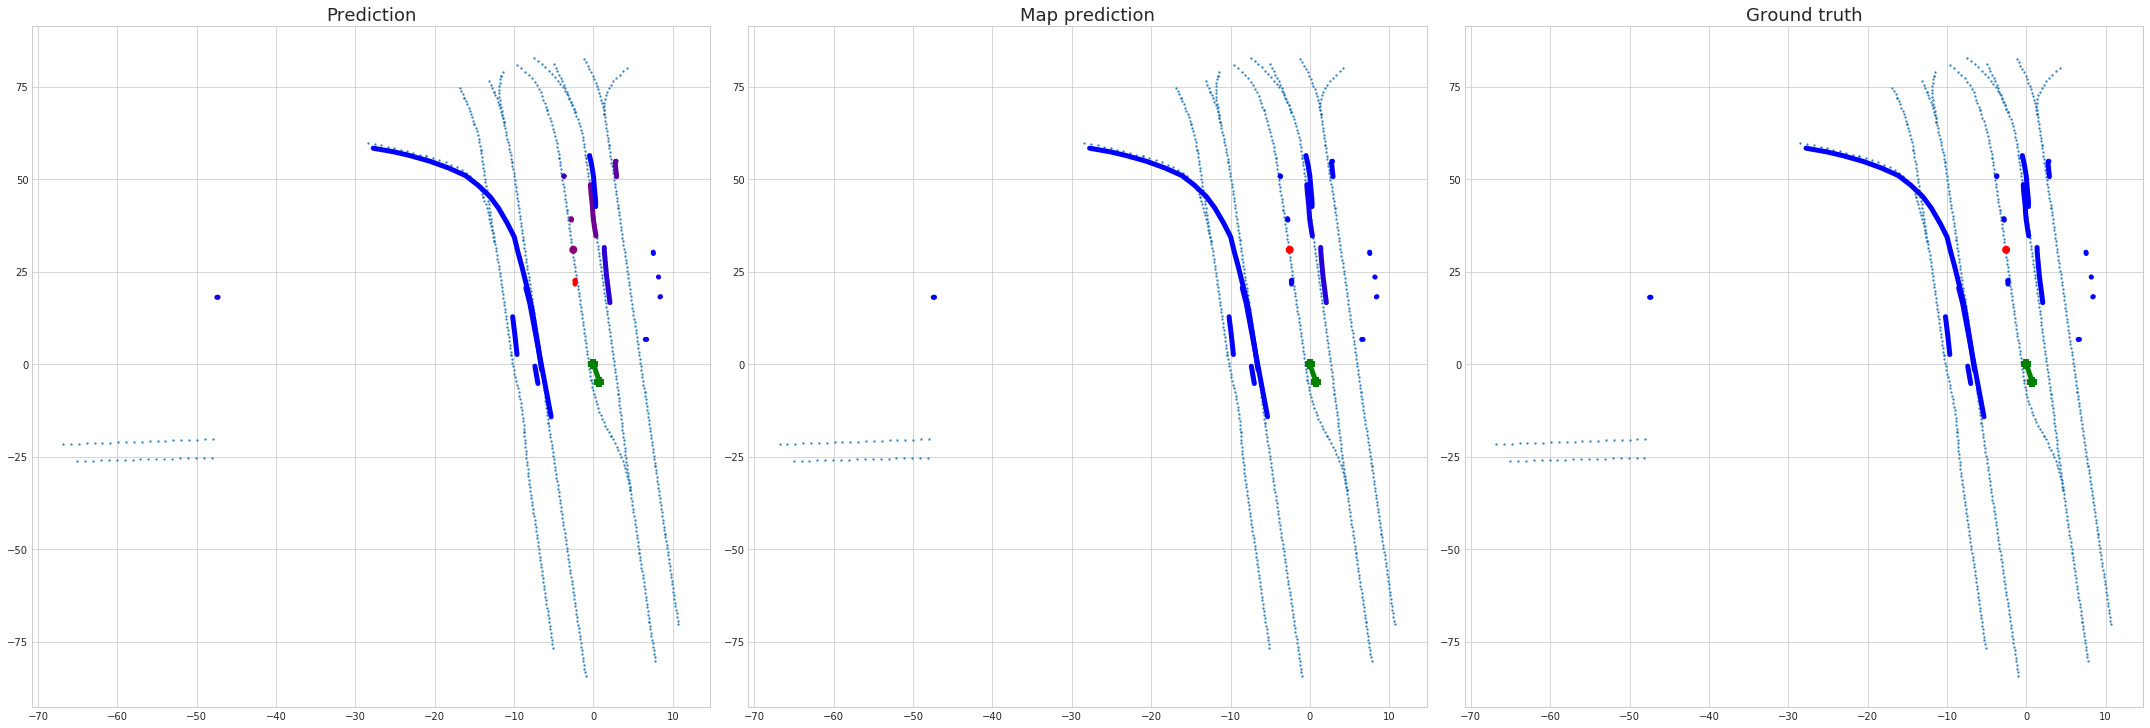

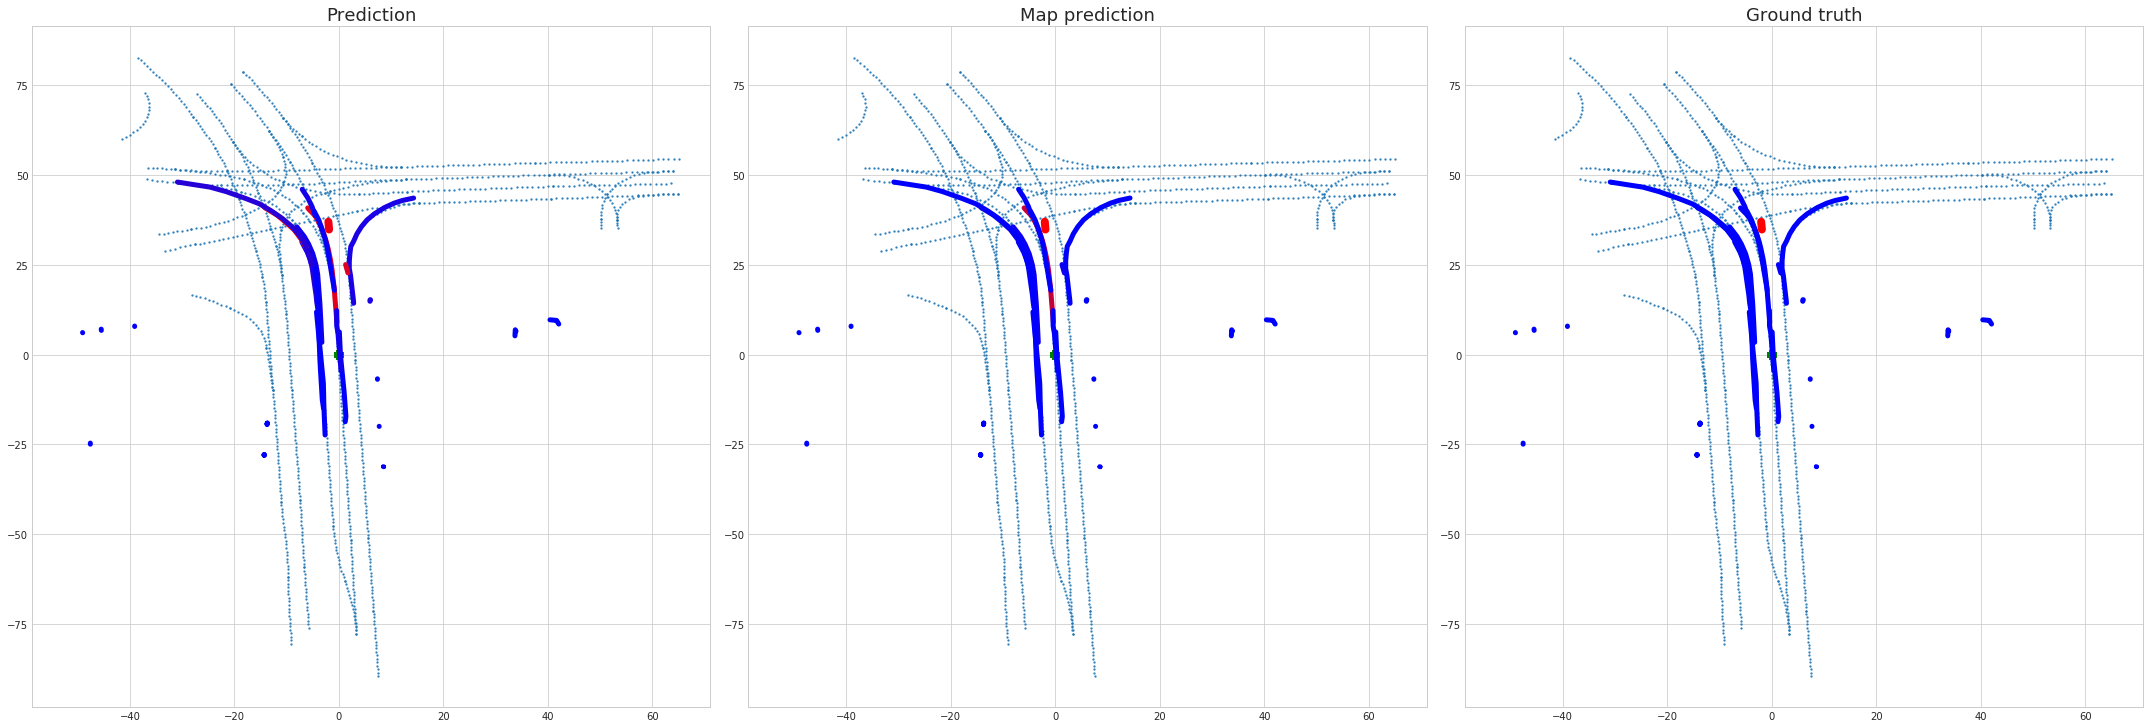

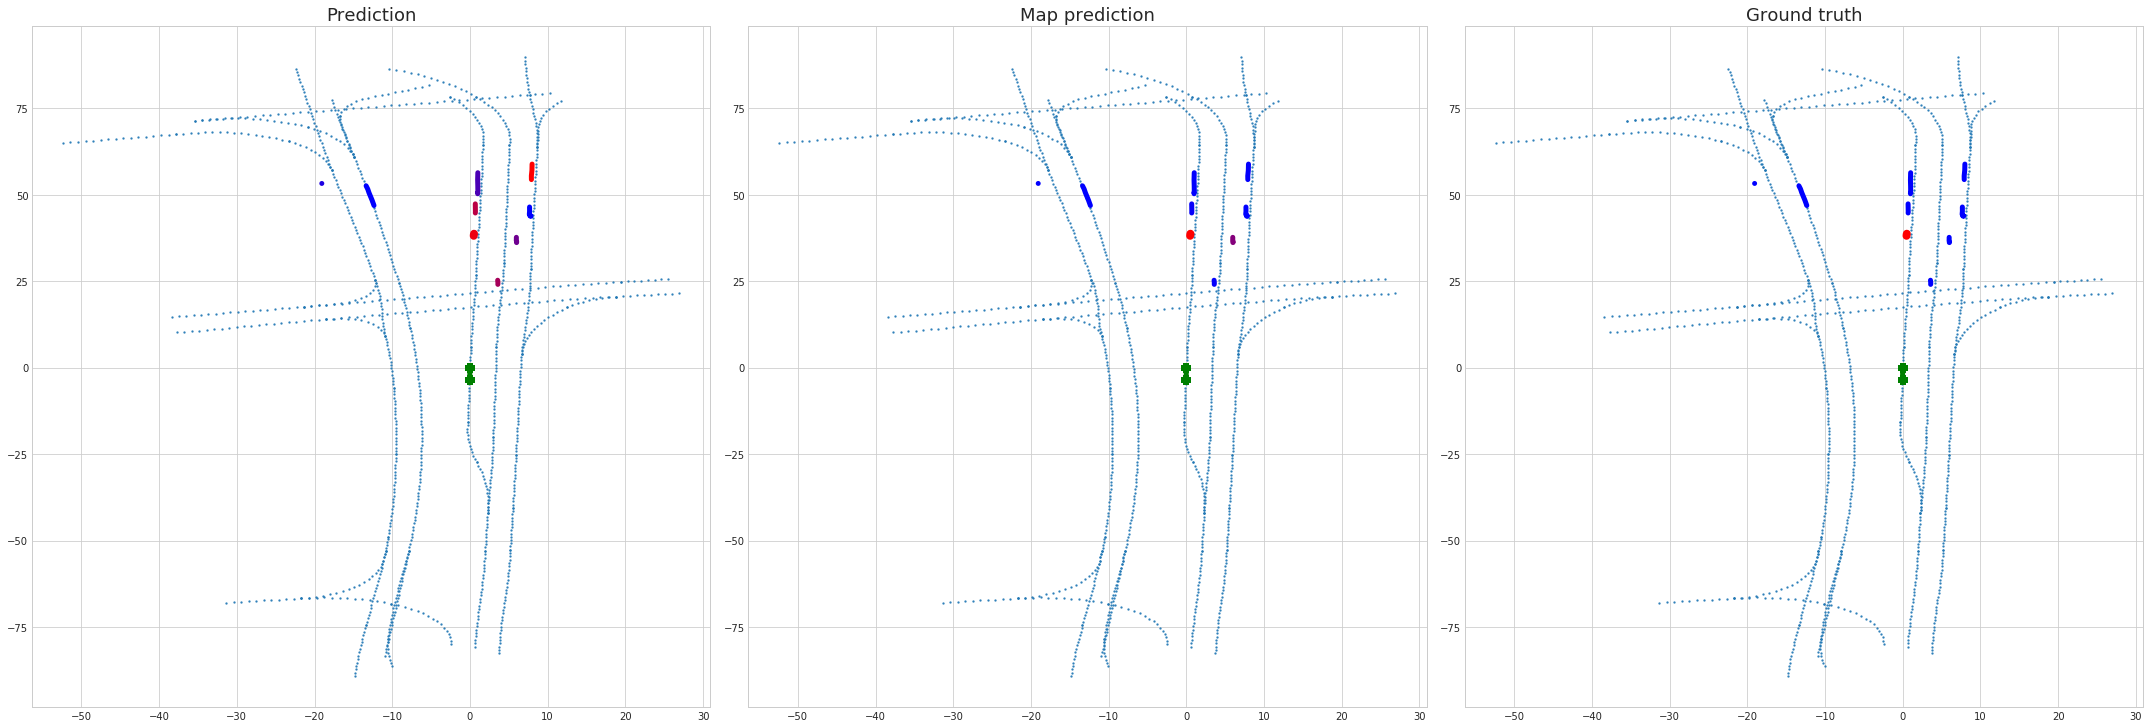

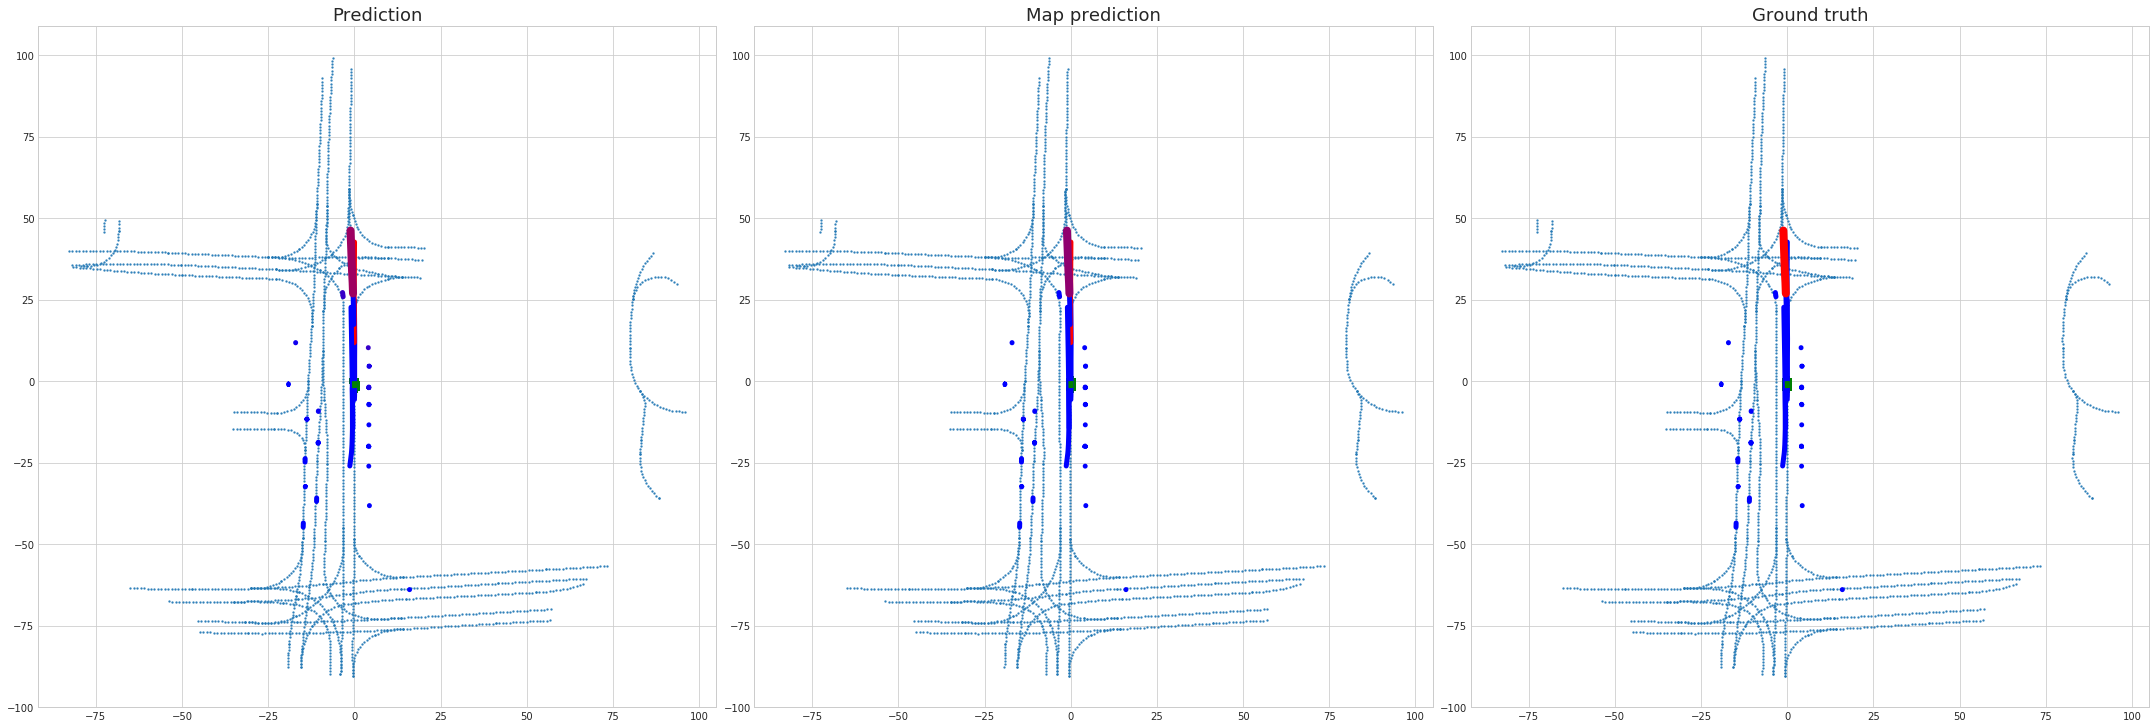

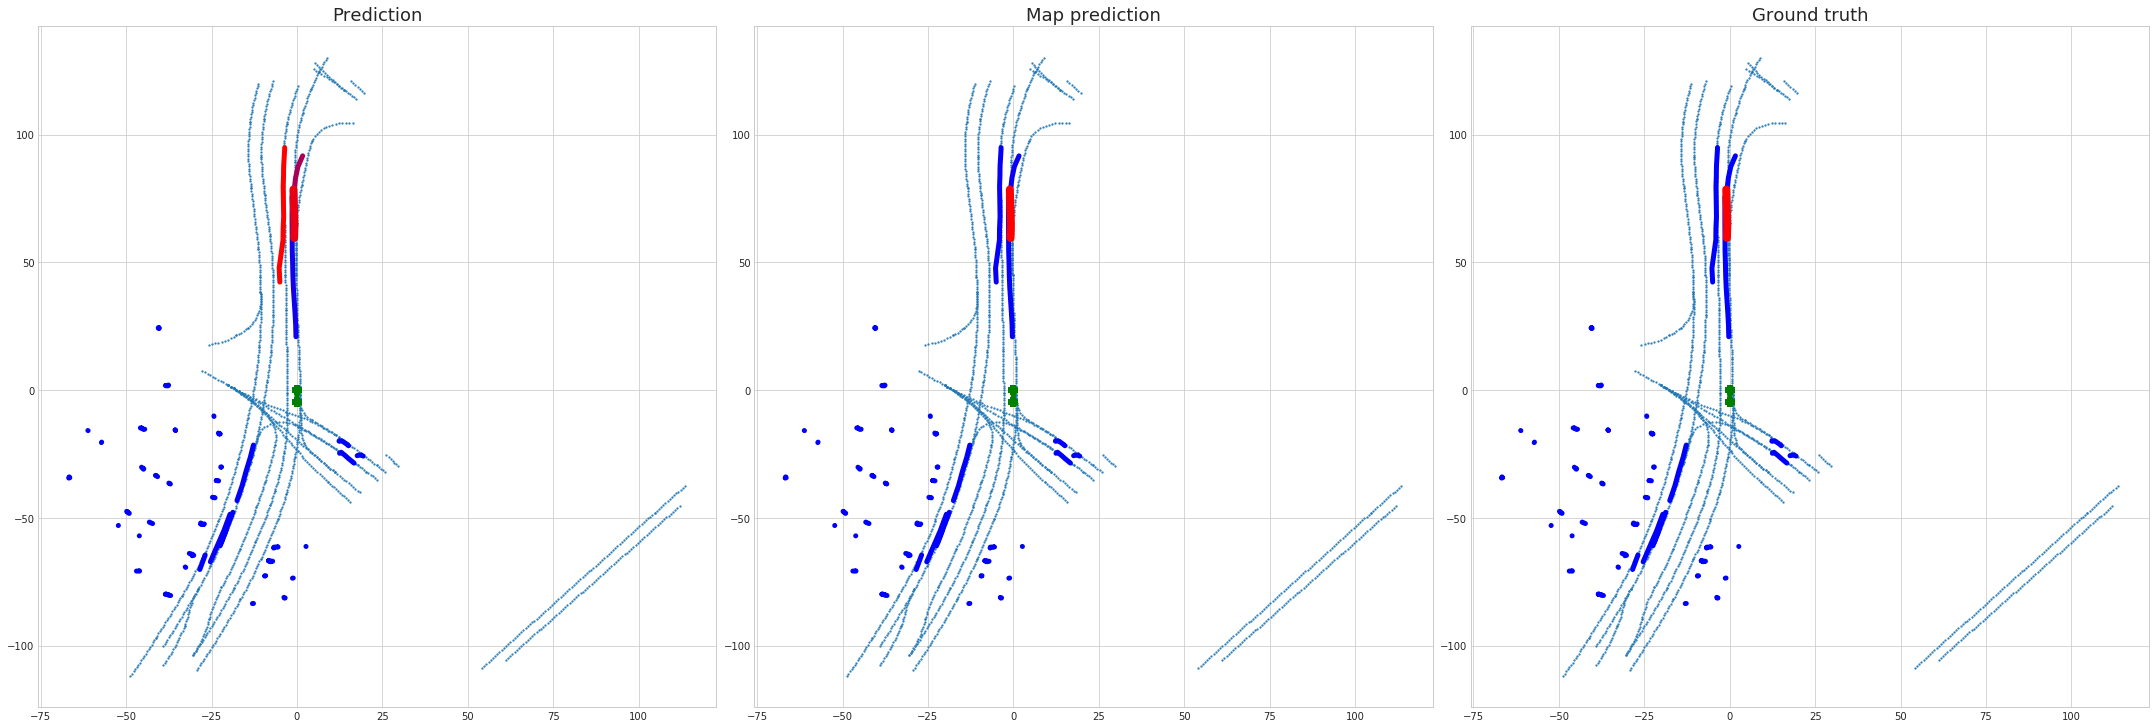

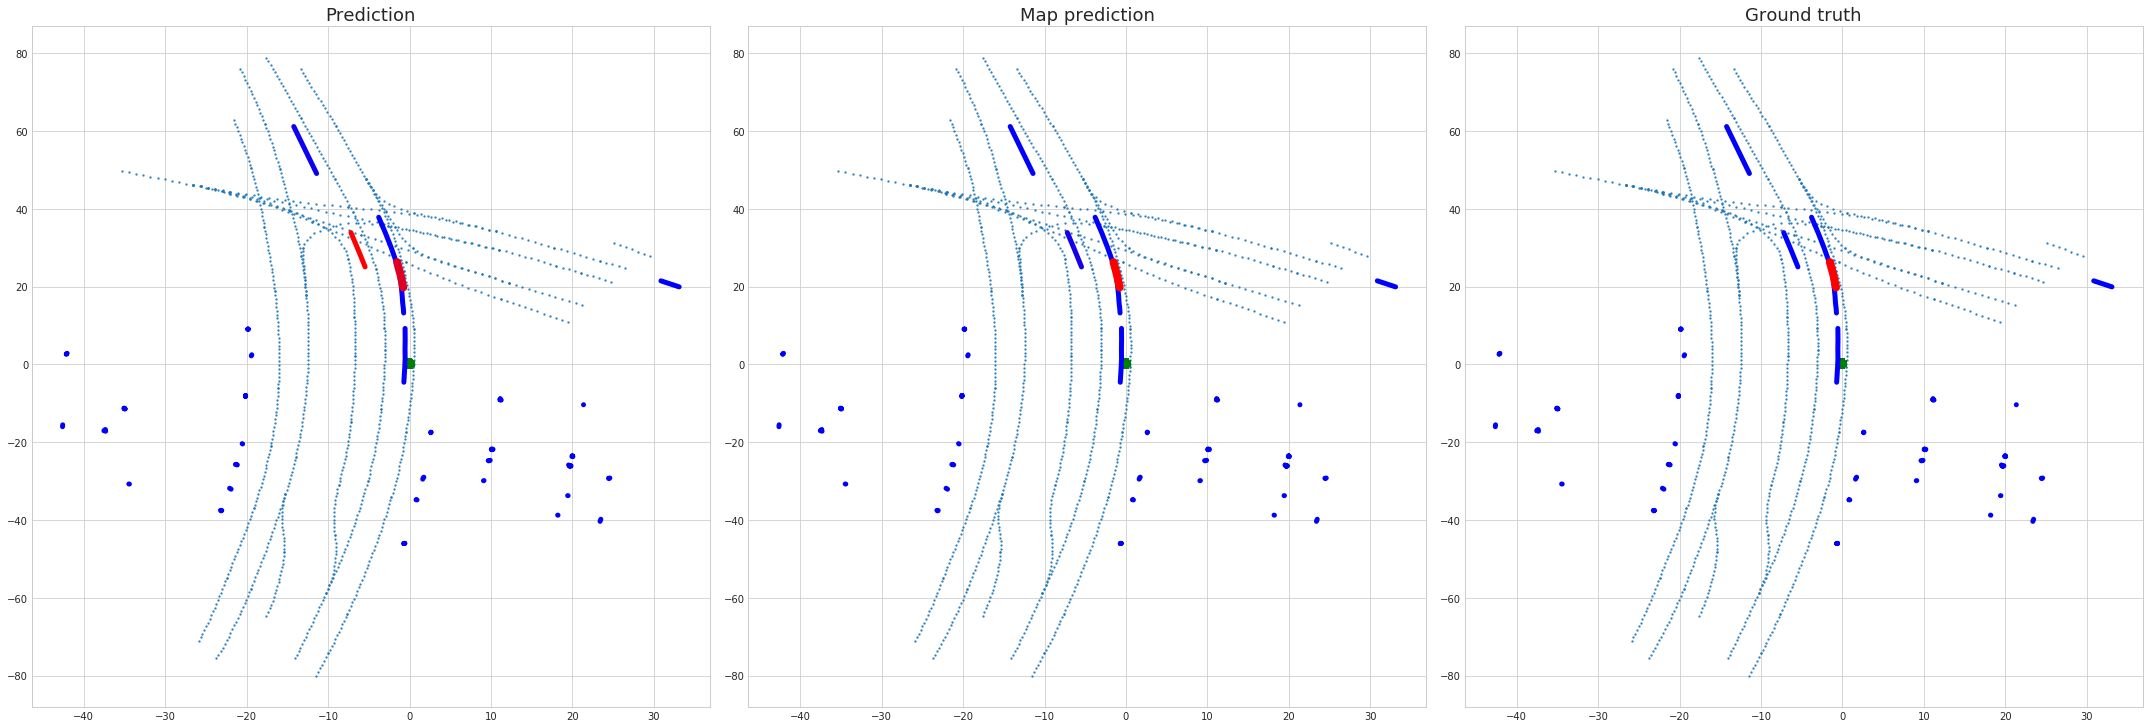

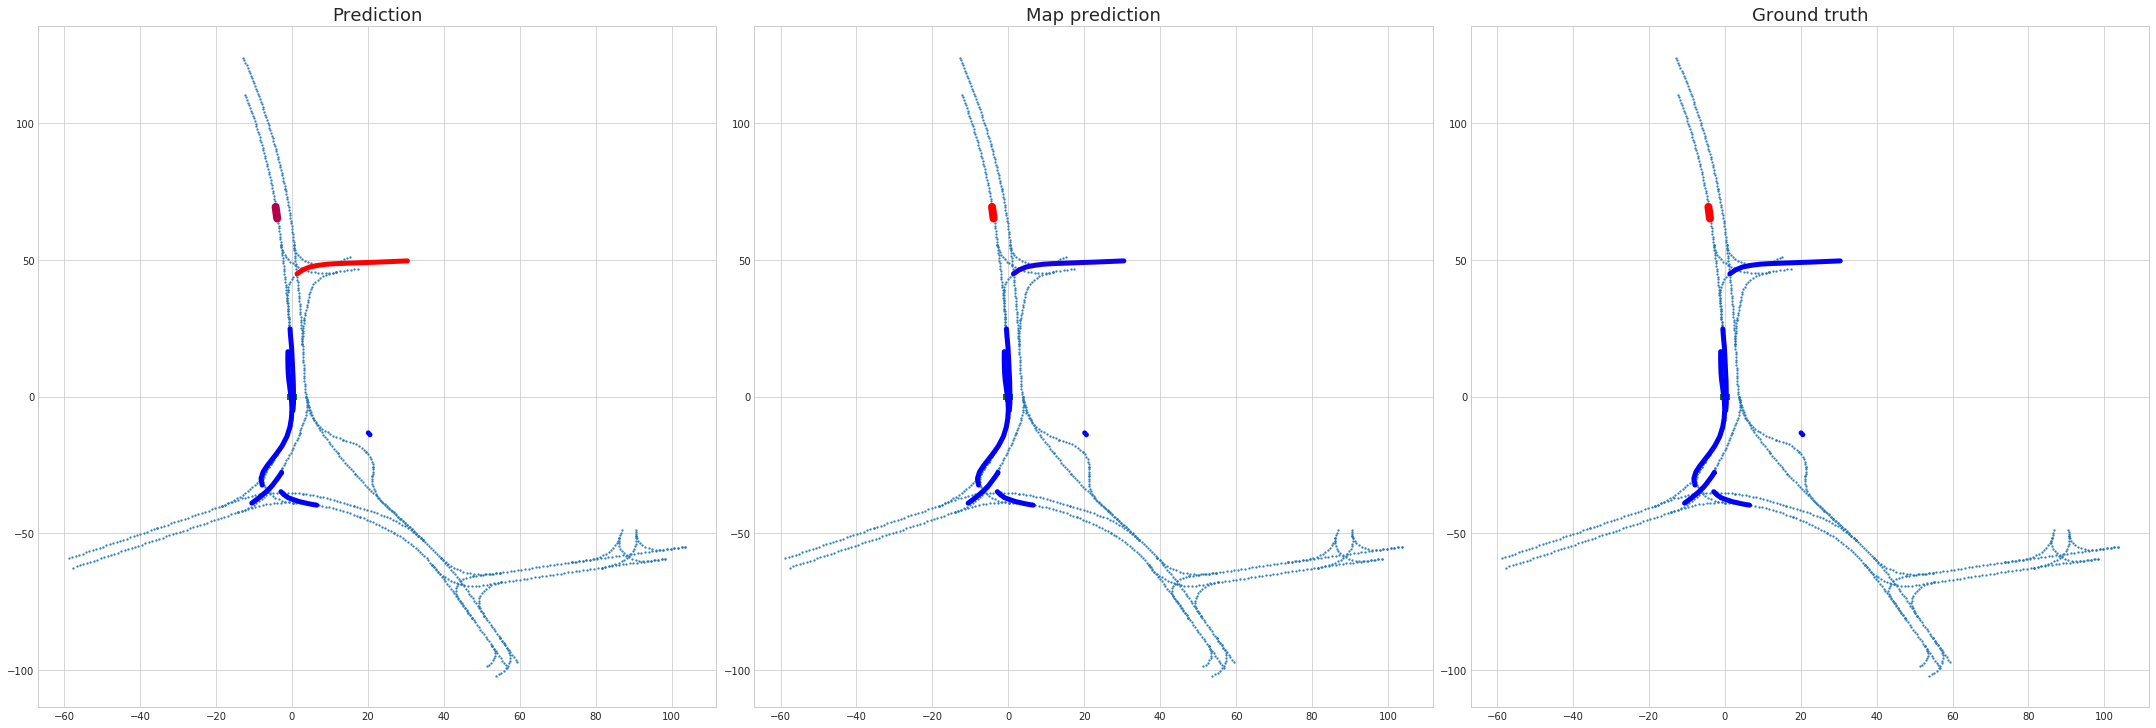

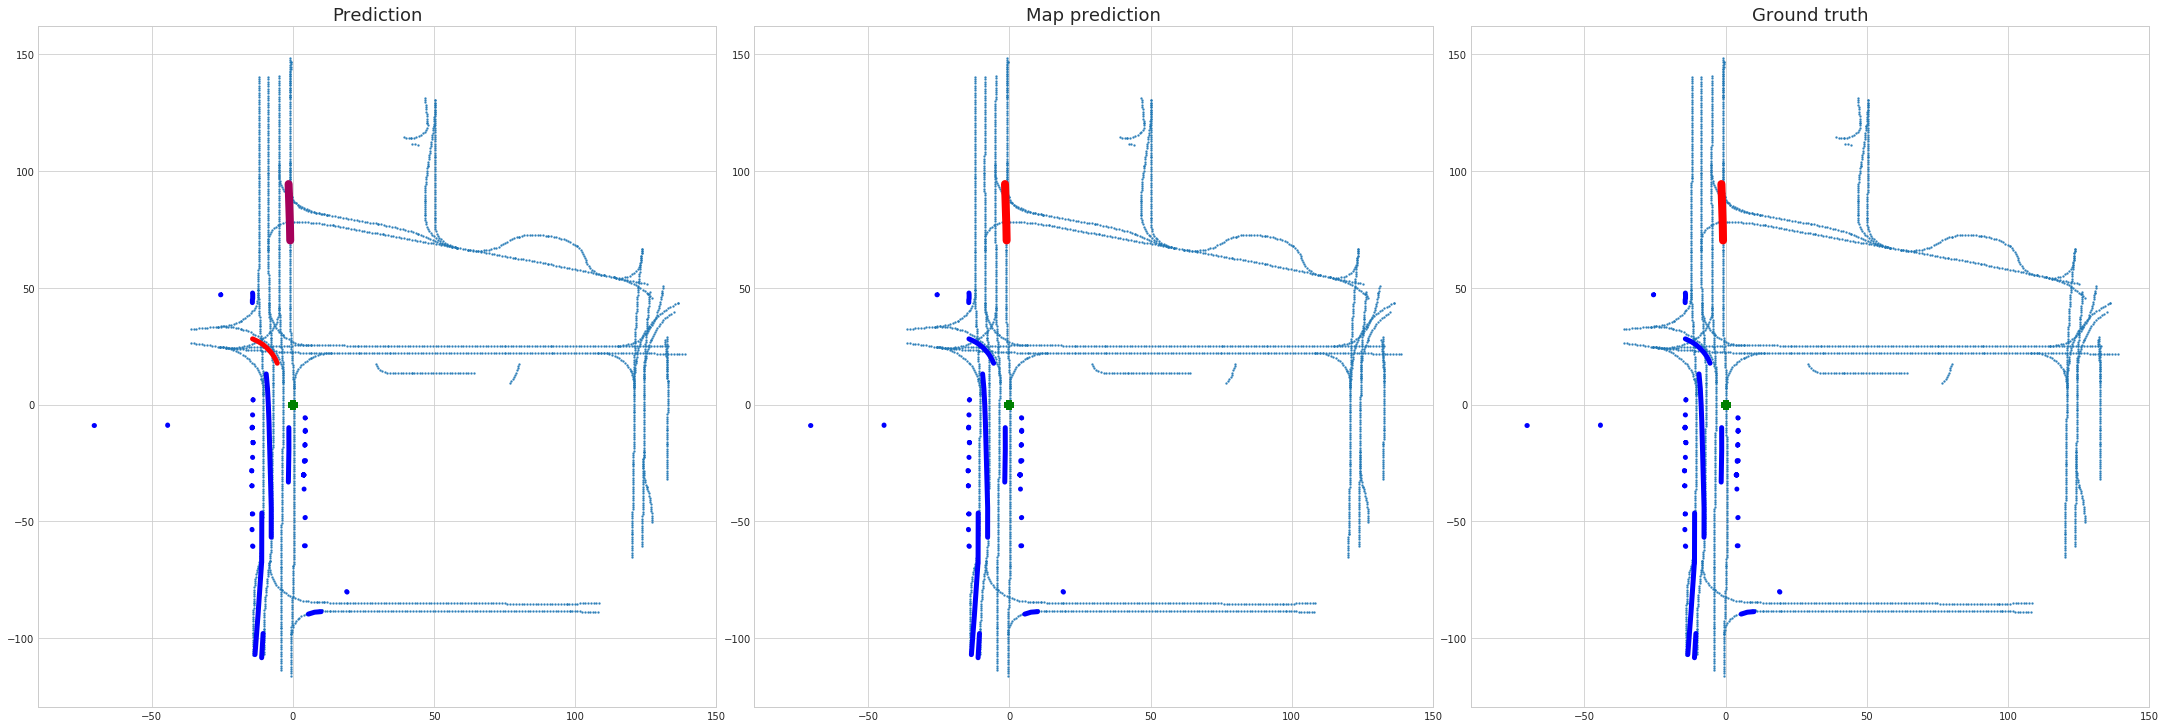

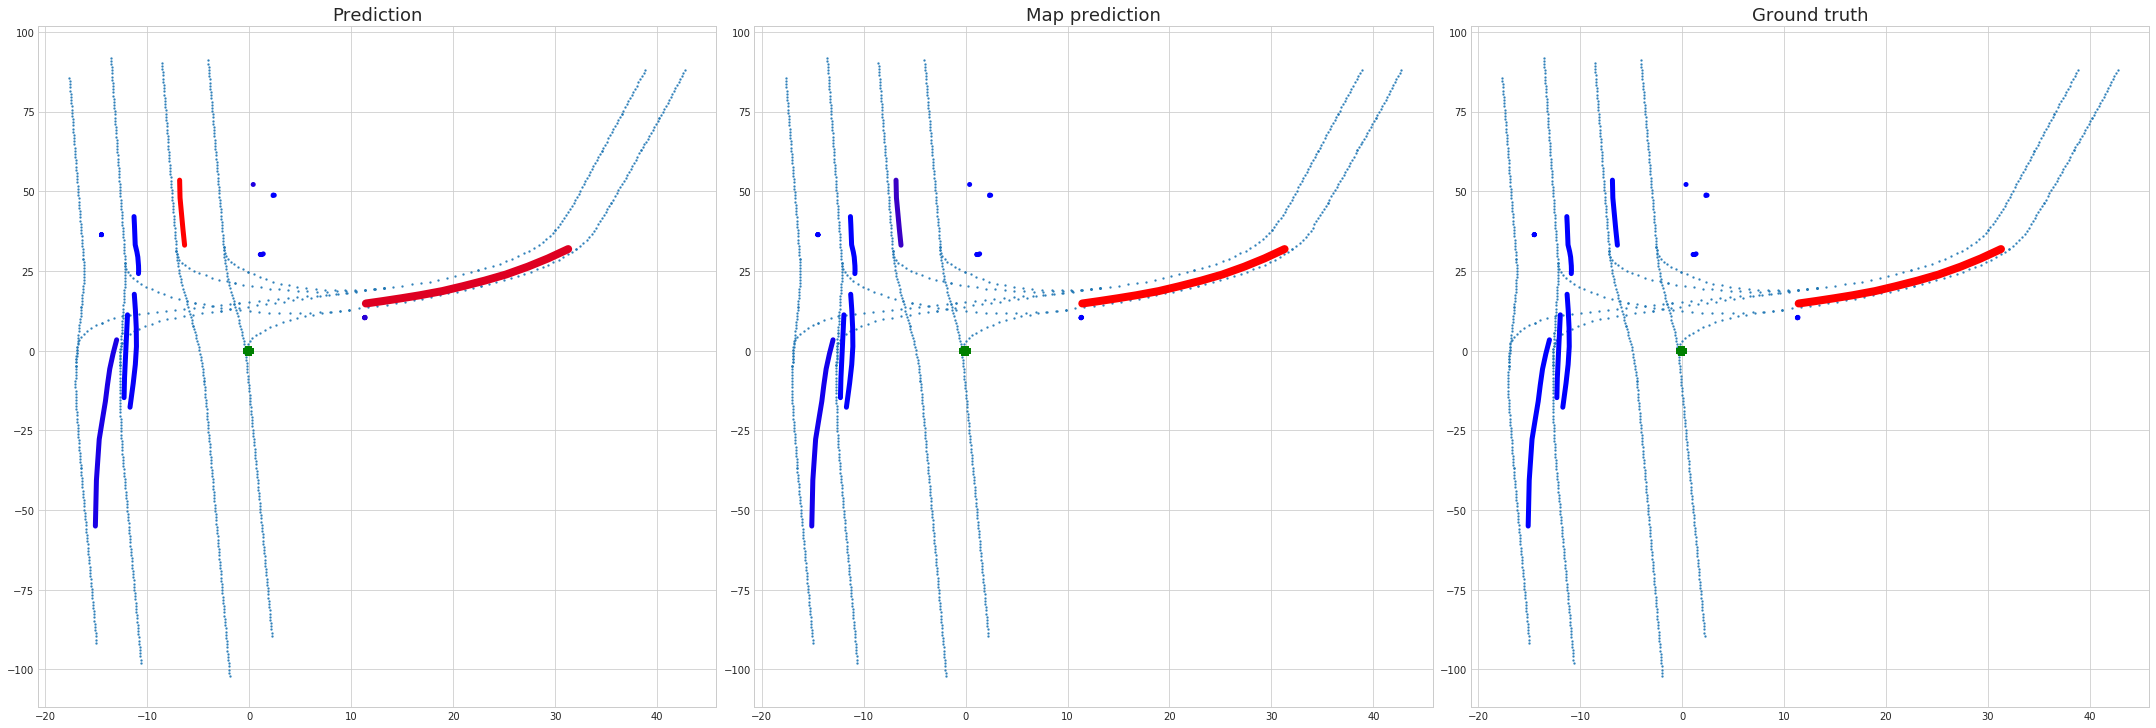

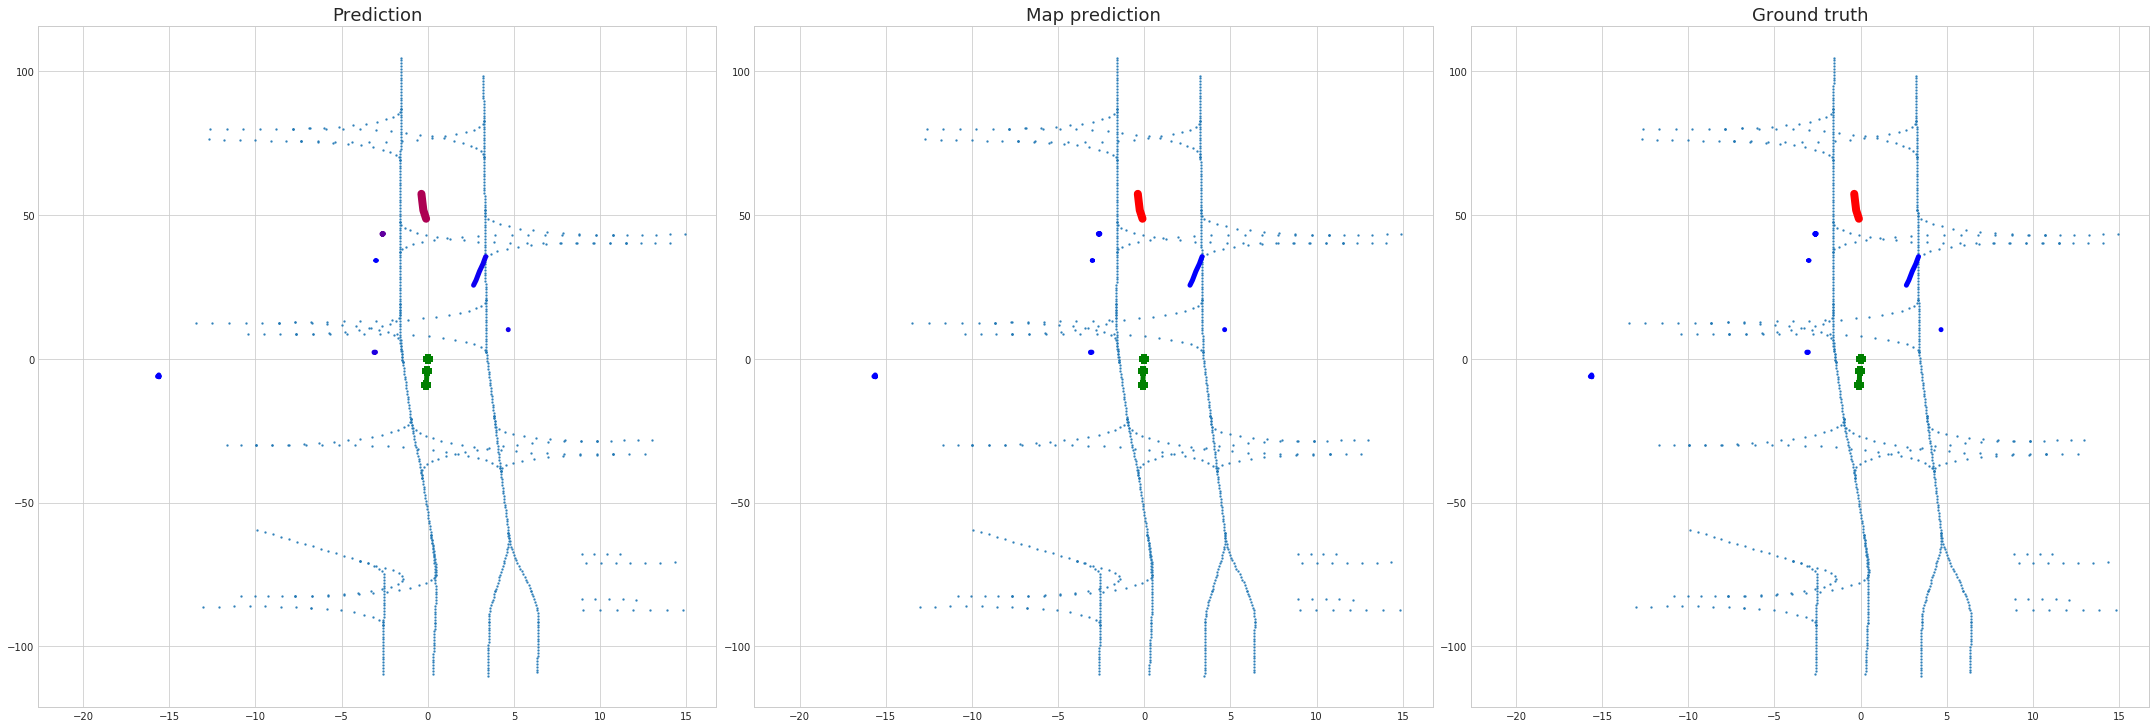

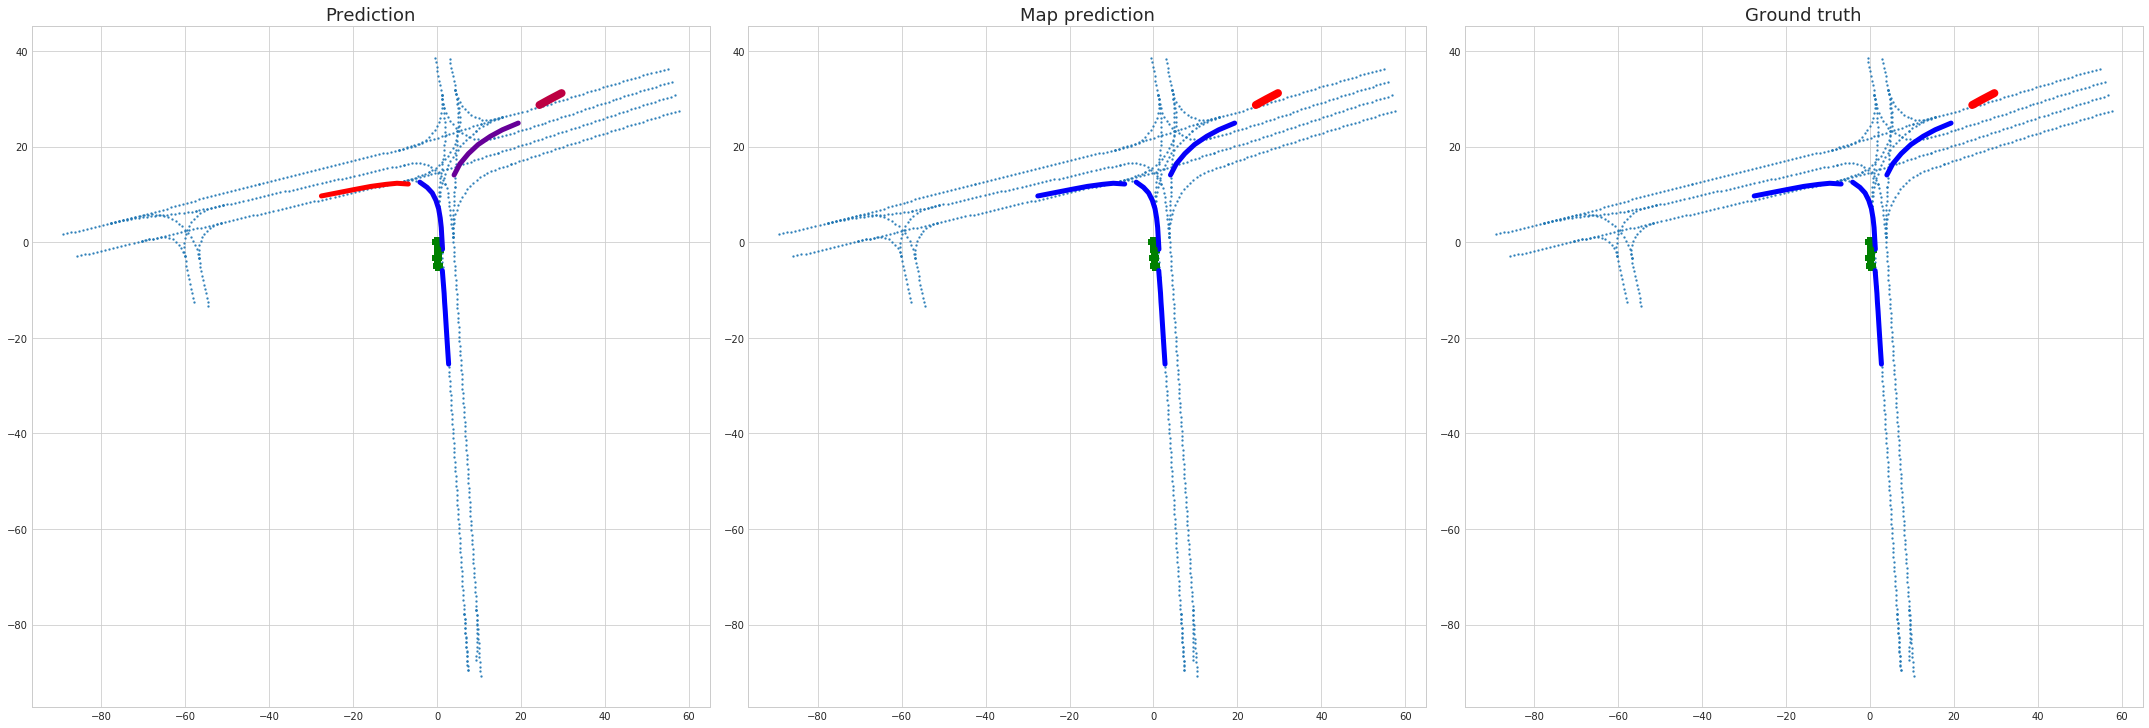

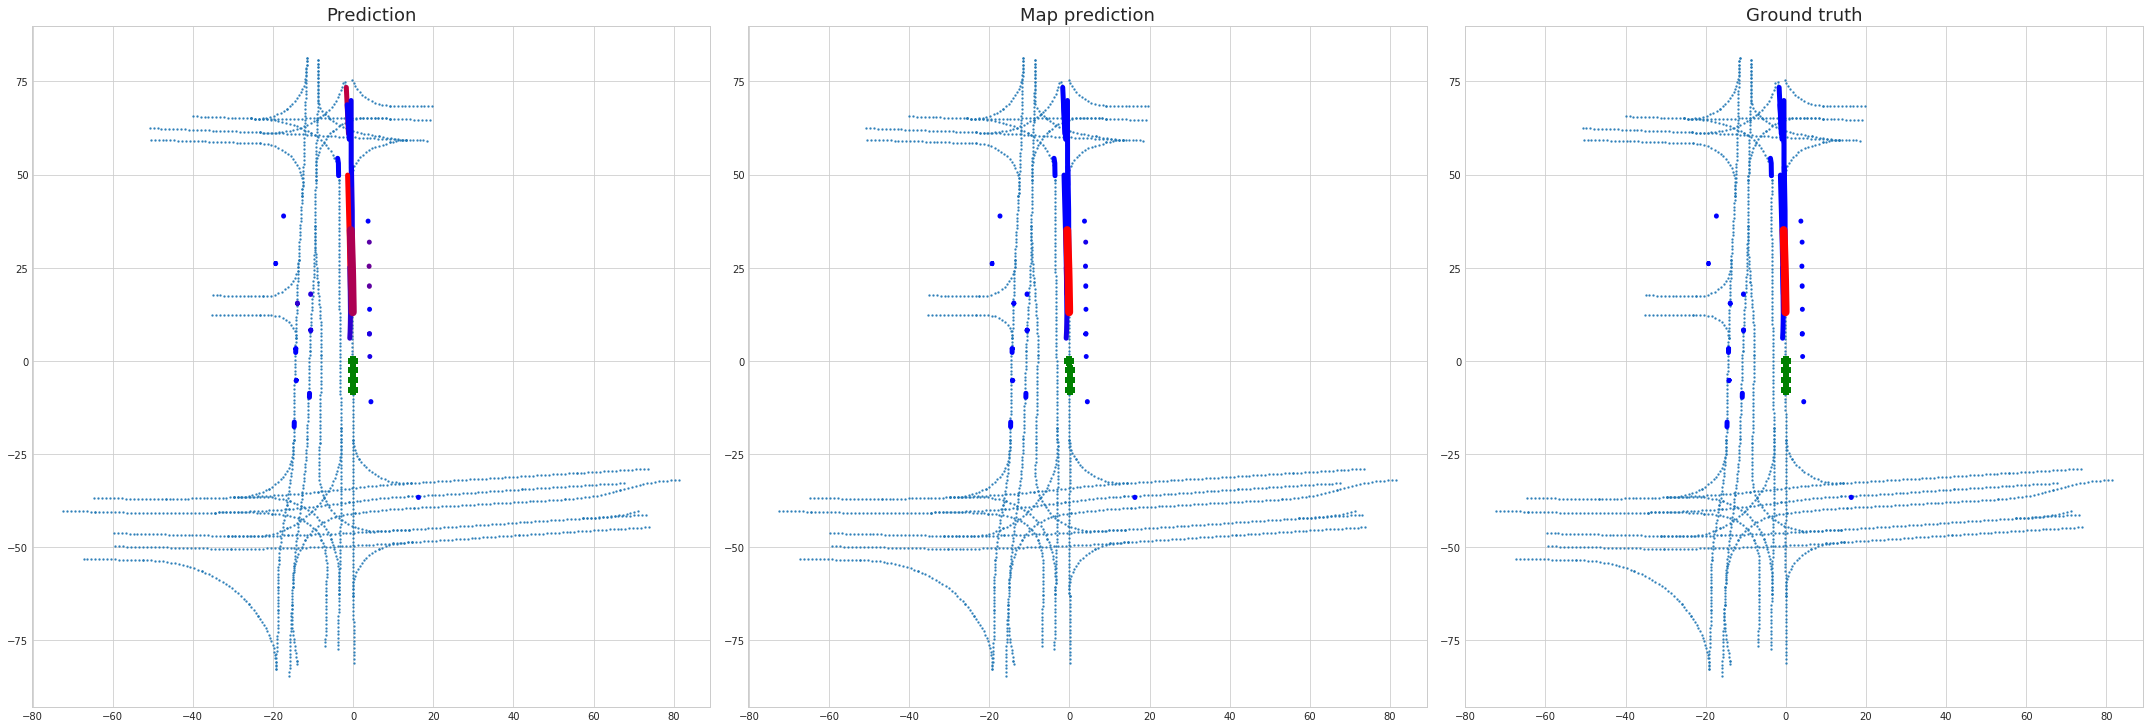

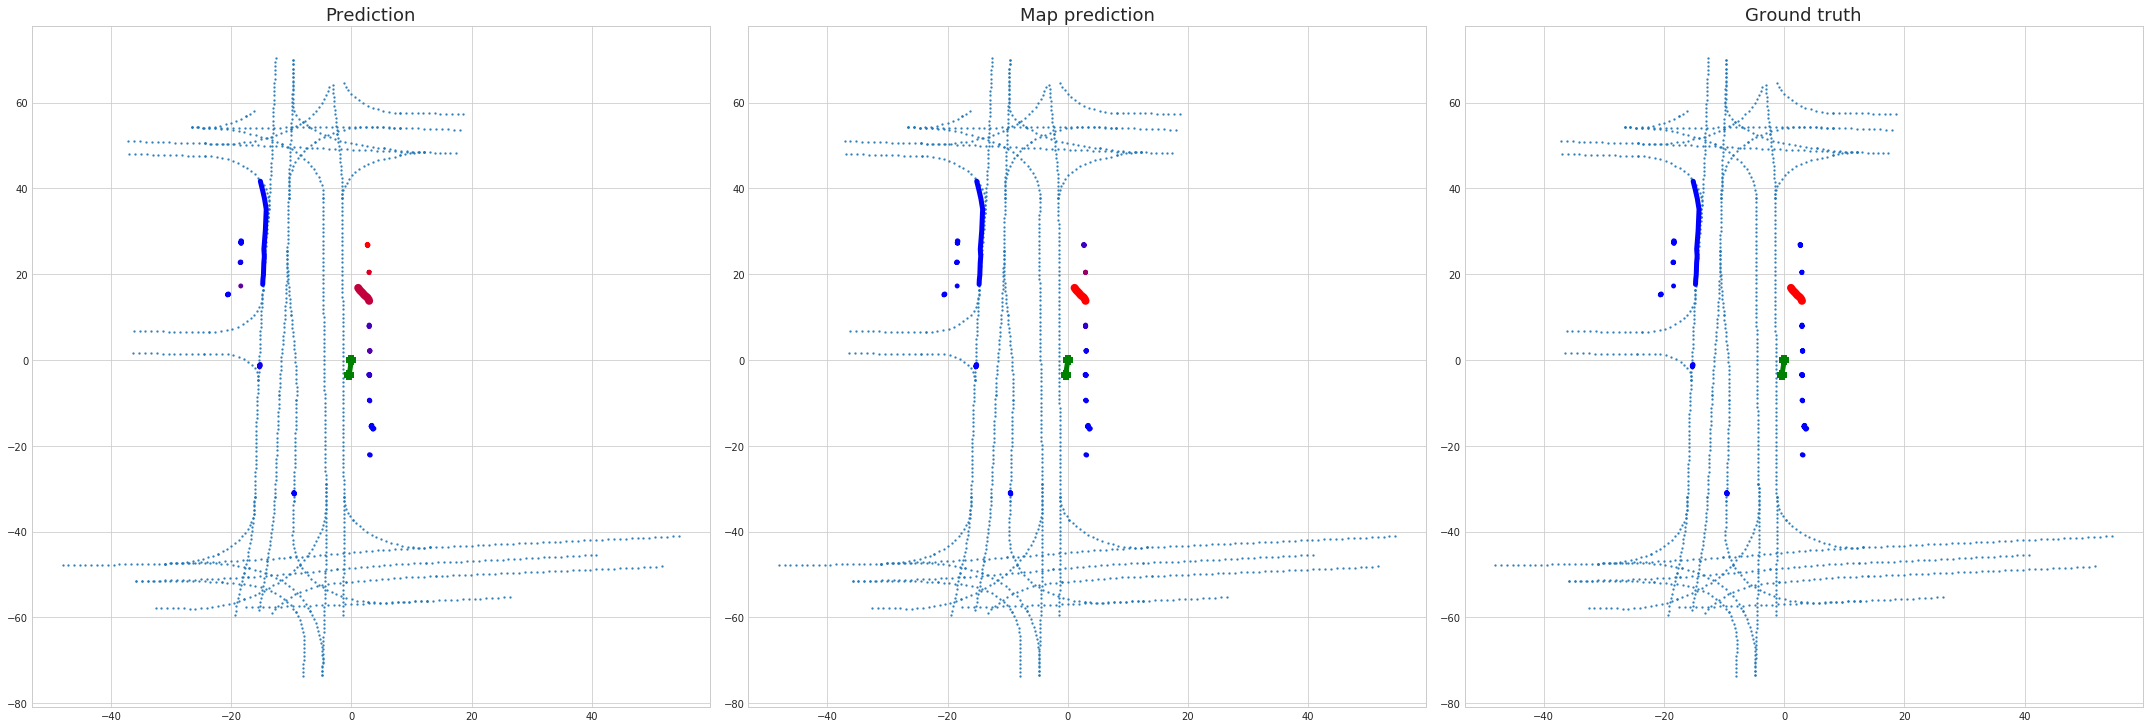

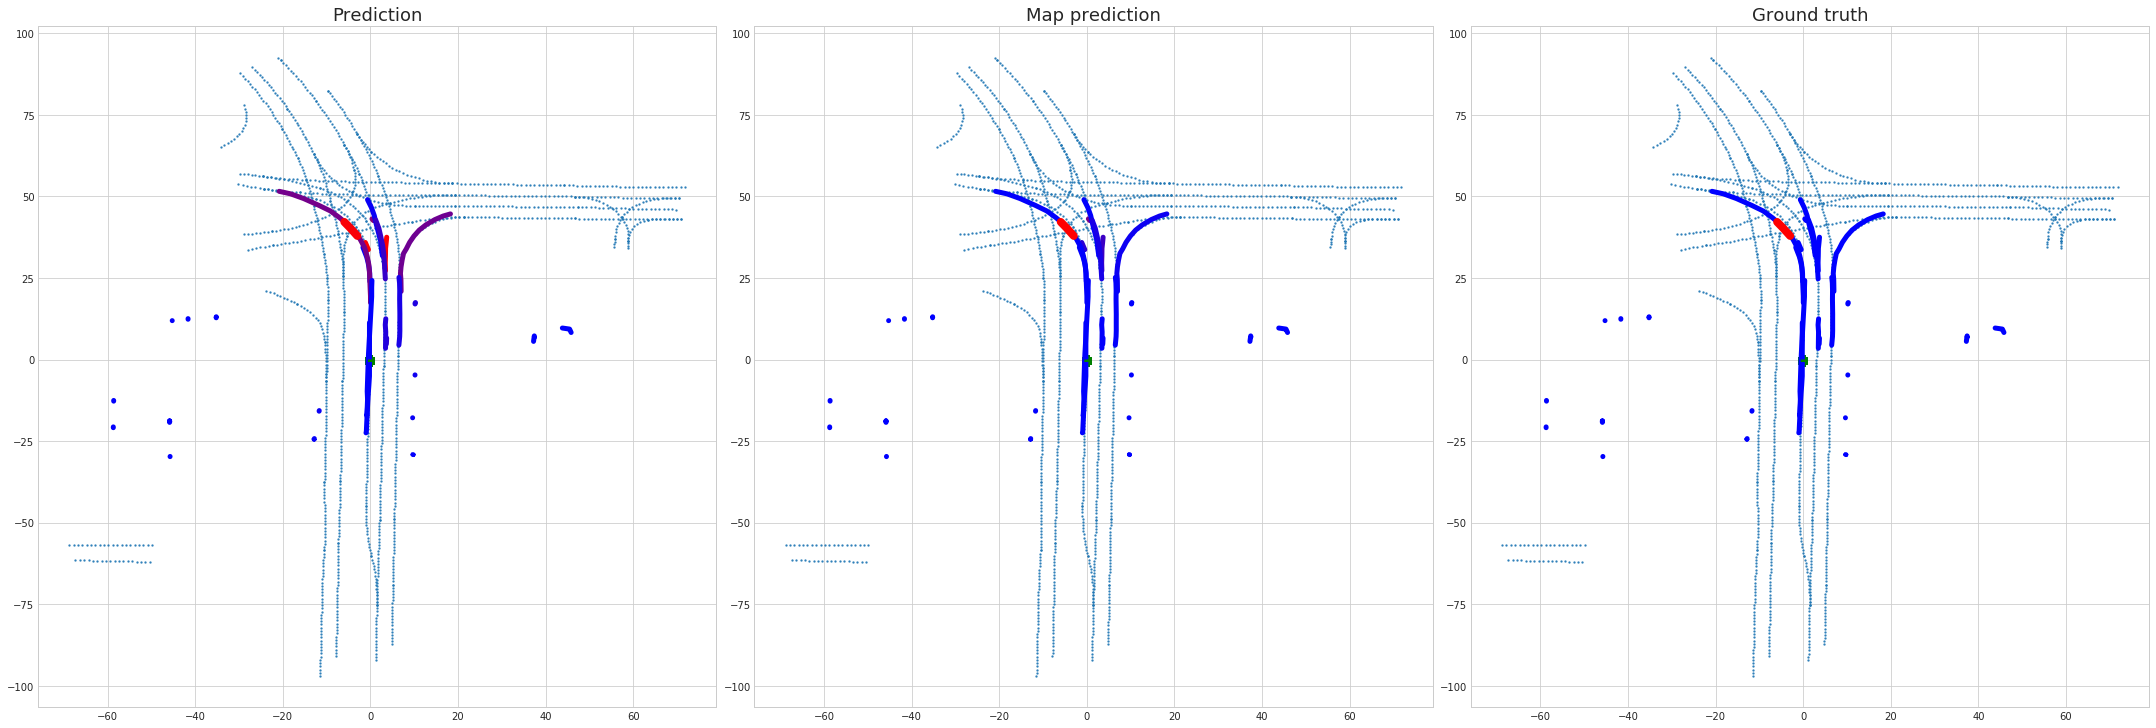

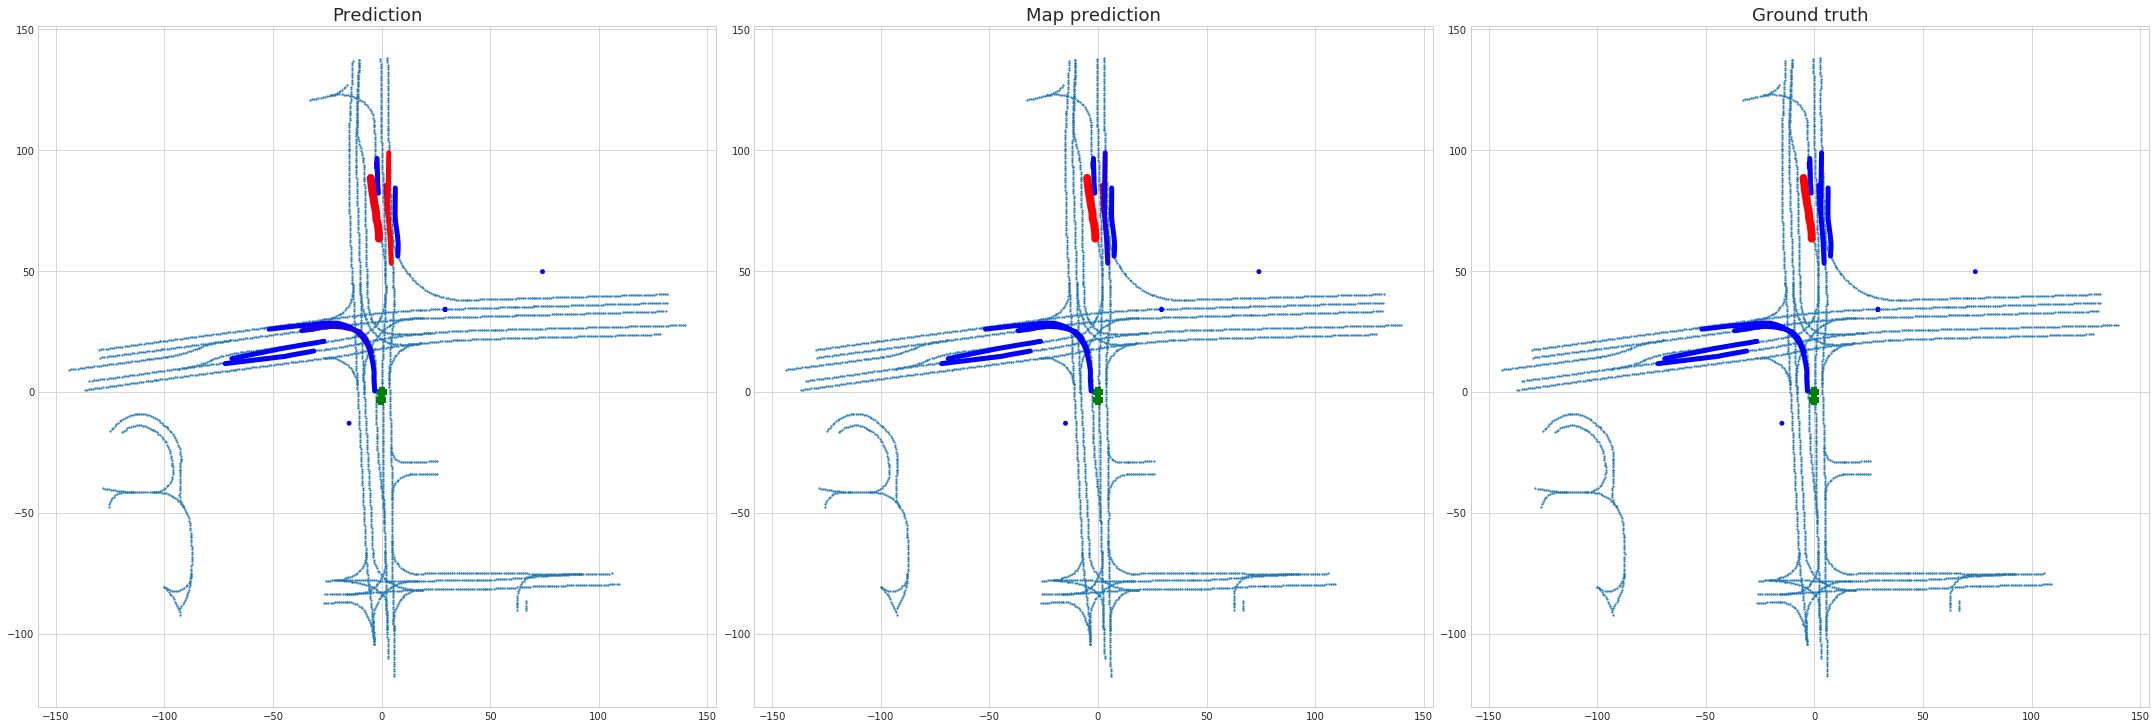

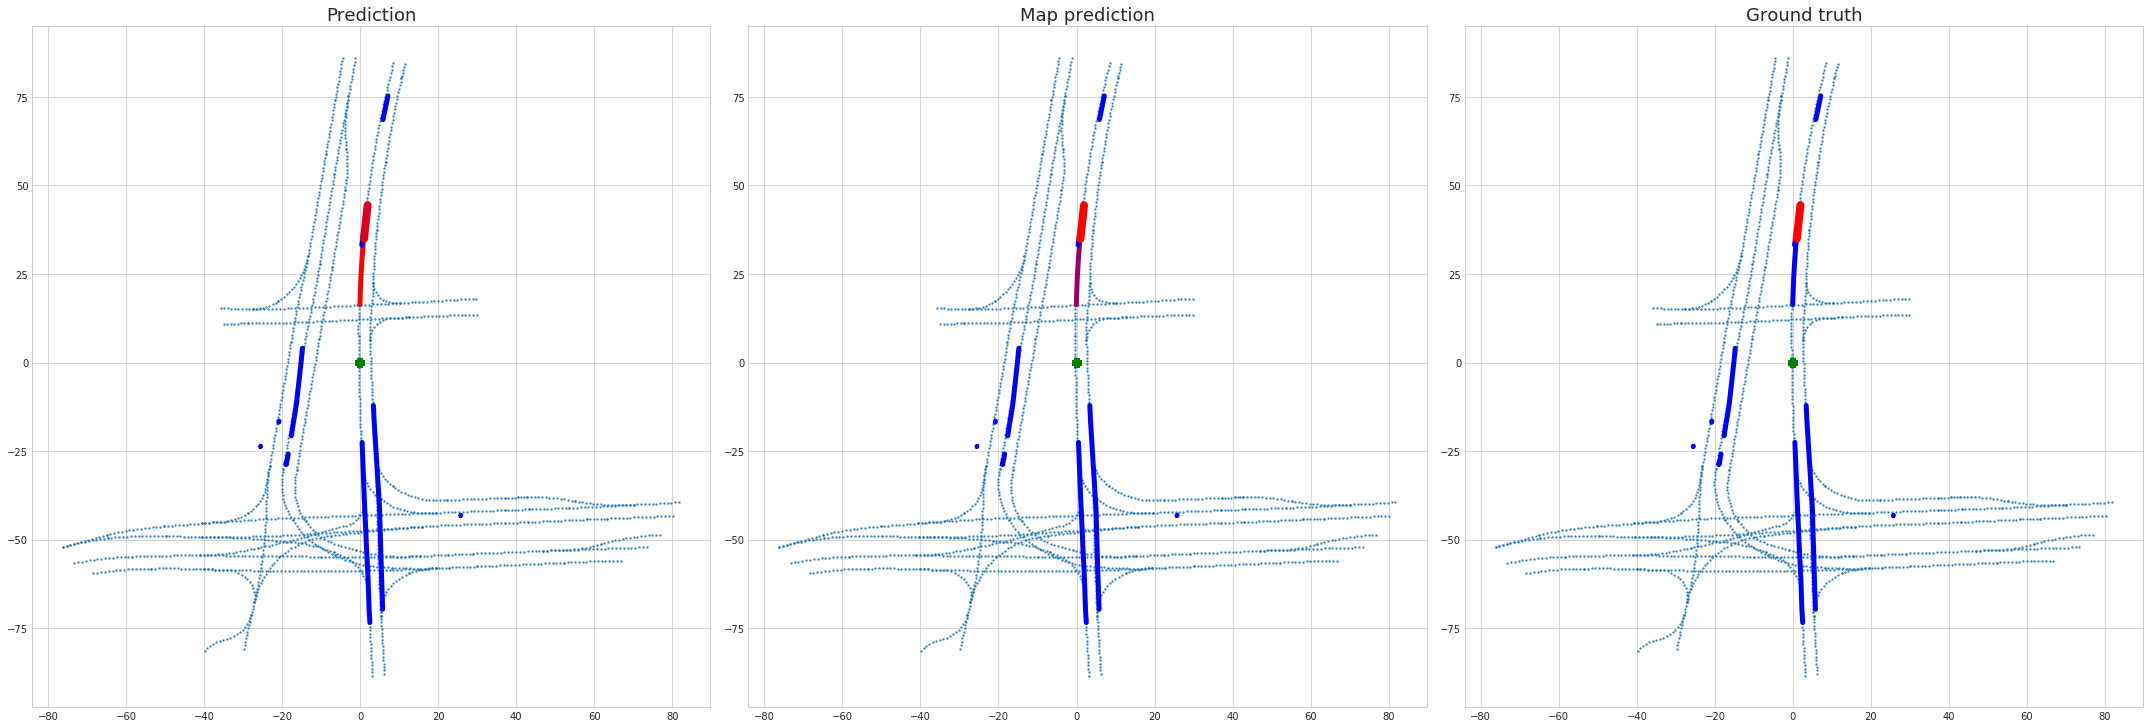

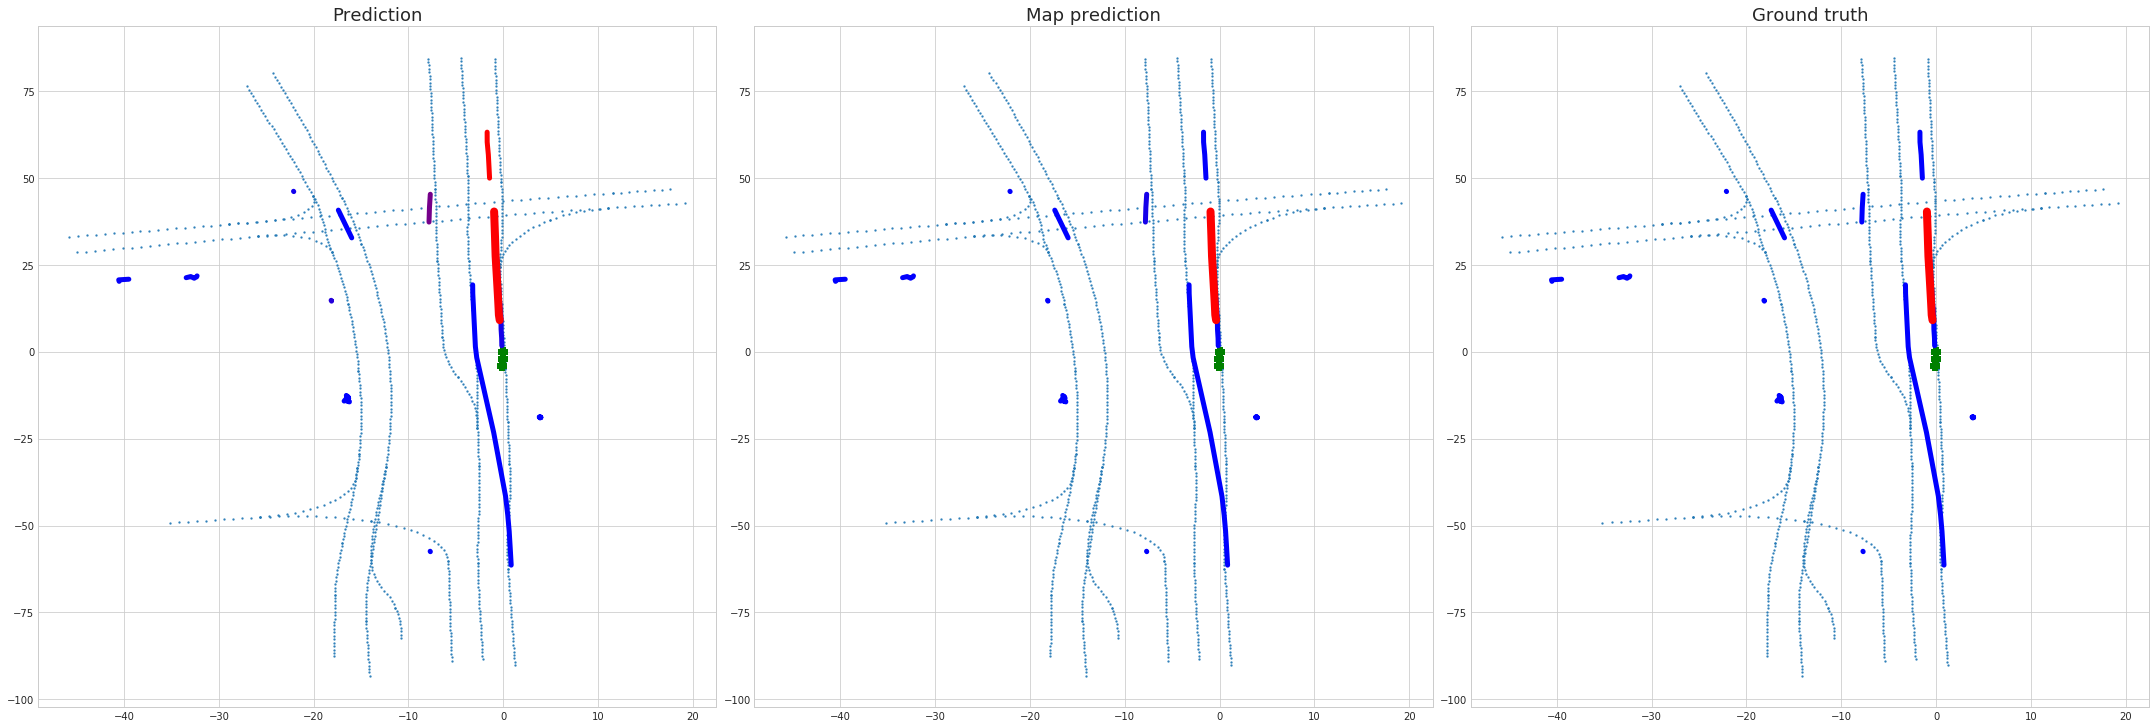

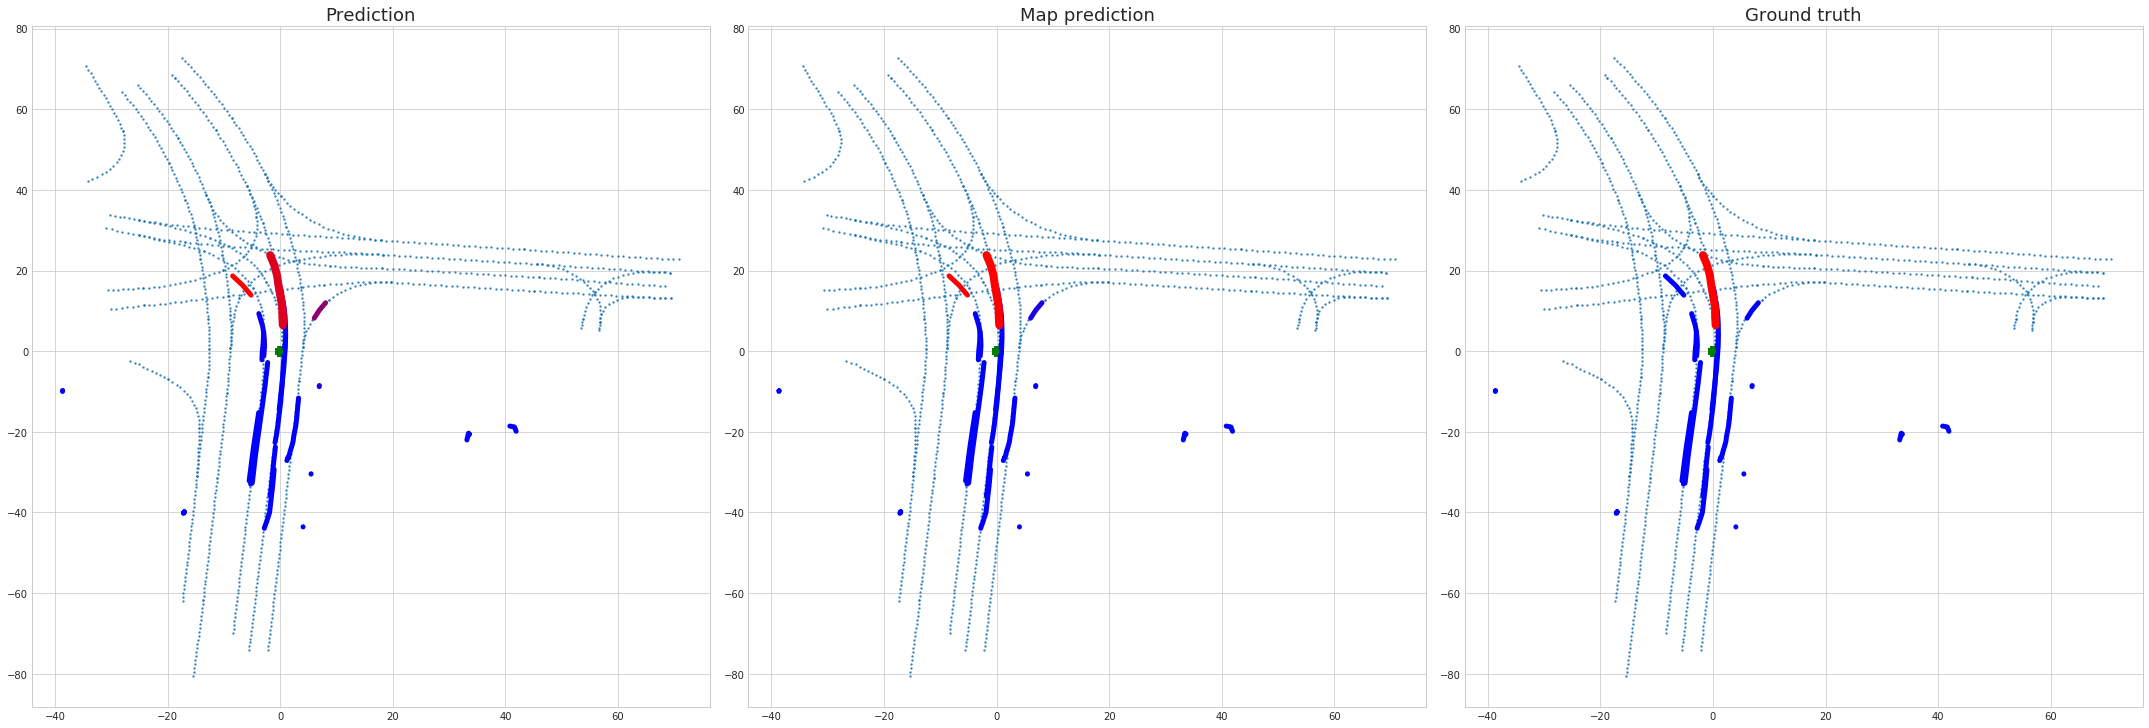

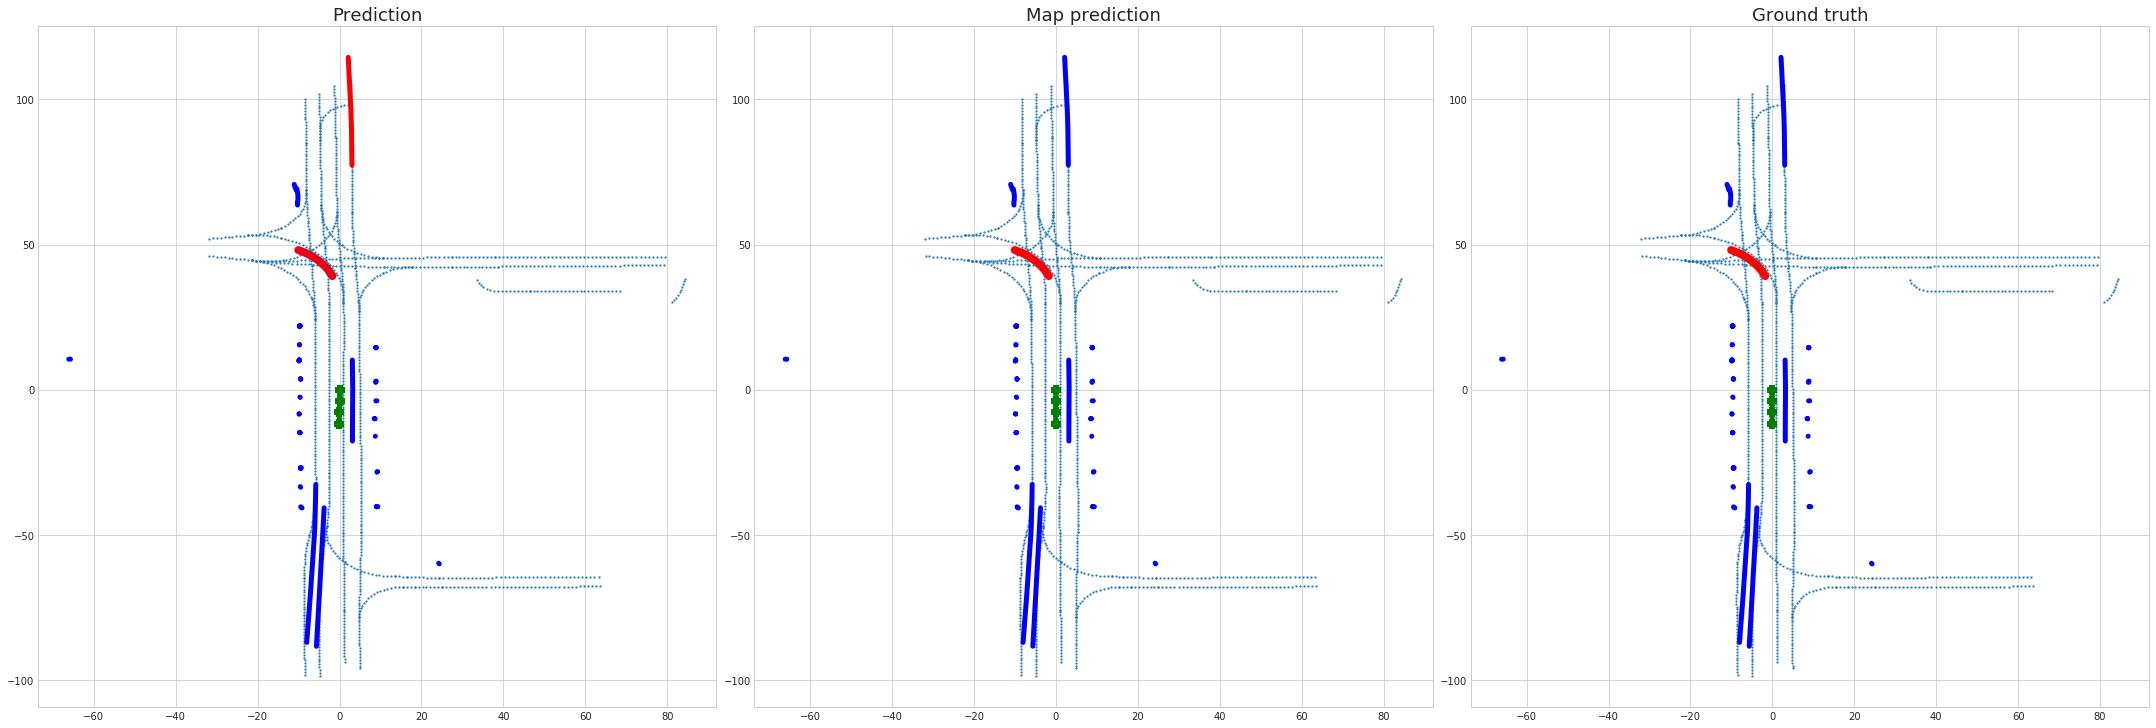

In [8]:
for idx,vis_map in enumerate(vis_lanes):
    if np.argmax(vis_scores[idx])==0:
        continue
    fig, ax = plt.subplots(1, 3, figsize=(30, 10))
    fig.tight_layout()
    colors = get_colors(vis_scores[idx])
    map_colors = get_colors(map_vis_scores[idx])
    gt_scores=np.zeros_like(np.array(vis_scores[idx]))
    gt_scores[0]=1
    gt_colors = get_colors(list(gt_scores))
    # print(vis_scores[idx])
    for i,traj in enumerate(vis_future[idx]):

        # plt.plot(traj[:,0],traj[:,1],linewidth=8,color='b')
        if i==0:
            continue
        ax[0].plot(traj[:,0],traj[:,1],linewidth=5,color=colors[i])
        ax[1].plot(traj[:,0],traj[:,1],linewidth=5,color=map_colors[i])
        ax[2].plot(traj[:,0],traj[:,1],linewidth=5,color=gt_colors[i])
    ax[0].plot(vis_future[idx][0][:,0],vis_future[idx][0][:,1],linewidth=8,color=colors[0])
    ax[1].plot(vis_future[idx][0][:,0],vis_future[idx][0][:,1],linewidth=8,color=map_colors[0])
    ax[2].plot(vis_future[idx][0][:,0],vis_future[idx][0][:,1],linewidth=8,color=gt_colors[0])
    ax[0].scatter(vis_map[:,0],vis_map[:,1],s=2.0,alpha=0.75)
    ax[0].scatter(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=10,color='g',marker="+")
    ax[0].plot(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=5,color='g',linestyle="--")
    ax[1].scatter(vis_map[:,0],vis_map[:,1],s=2.0,alpha=0.75)
    ax[1].scatter(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=10,color='g',marker="+")
    ax[1].plot(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=5,color='g',linestyle="--")
    ax[2].scatter(vis_map[:,0],vis_map[:,1],s=2.0,alpha=0.75)
    ax[2].scatter(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=10,color='g',marker="+")
    ax[2].plot(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=5,color='g',linestyle="--")
    ax[0].set_title('Prediction',fontsize=18)
    ax[1].set_title('Map prediction',fontsize=18)
    ax[2].set_title('Ground truth',fontsize=18)
    # if idx>20:
    #     break

In [18]:
vis_future[0]

[array([[ -4.346872 , 117.795    ],
        [ -4.1601524, 112.888275 ],
        [ -3.9734333, 107.98155  ]], dtype=float32),
 array([[  4.6428604, -15.248845 ],
        [  4.6460786, -15.174262 ],
        [  4.6395984, -14.688618 ],
        [  4.7097993, -14.331606 ],
        [  4.6551876, -13.655089 ],
        [  4.649299 , -12.564039 ]], dtype=float32),
 array([[  5.7621174, -71.5152   ],
        [  5.763264 , -71.5604   ]], dtype=float32),
 array([[  4.815061 , -24.747158 ],
        [  4.815061 , -24.747158 ],
        [  4.815061 , -24.747158 ],
        [  4.815061 , -24.747158 ],
        [  4.815061 , -24.747158 ],
        [  4.815061 , -24.747158 ],
        [  4.815061 , -24.747158 ],
        [  4.861667 , -24.74622  ],
        [  4.908481 , -24.743881 ],
        [  4.9247246, -24.55757  ],
        [  4.941772 , -24.370663 ],
        [  5.0325103, -24.274769 ],
        [  4.9800143, -24.113272 ]], dtype=float32)]

In [9]:
import train_eval.utils as u
with torch.no_grad():
    vis_lanes=[]
    vis_history=[]
    vis_future=[]
    vis_scores=[]
    for i,data in enumerate(trainer.tr_dl):
    # torch.cuda.empty_cache()
    # Load data
        sys.stdout.write('processing %d, %d/%d\r' % (i, i+1, len(trainer.tr_dl)))
        sys.stdout.flush()
        data = u.send_to_device(u.convert_double_to_float(data))
        data_test=data['inputs']
        gt_test=data['ground_truth']
        predictions=trainer.model(data_test)
        for idx,sample_token in enumerate(data_test['sample_token']):
            map_nodes=data_test['map_representation']['lane_node_feats'][idx,:,:,:2]
            history=data_test['history'][idx,:,:2]
            future=data_test['future'][idx,:,:,:2].cpu().numpy()
            map_mask=~(data_test['map_representation']['lane_node_masks'][idx,:,:,0]).bool()
            history_mask=~(data_test['history_mask'][idx,:,0]).bool()
            future_mask=~(data_test['future_mask'][idx,:,:,0]).bool().cpu().numpy()
            vis_lanes.append(map_nodes[map_mask].cpu().numpy())
            vis_history.append(history[history_mask].cpu().numpy())
            scores=predictions['map_scores'][idx].cpu().numpy()
            sample_future=[]
            sample_scores=[]
            for i,traj in enumerate(future):
                if future_mask[i].any():
                    sample_future.append(traj[future_mask[i]])
                    sample_scores.append(scores[i,0])
                    
            vis_future.append(sample_future)
            vis_scores.append(sample_scores)
        

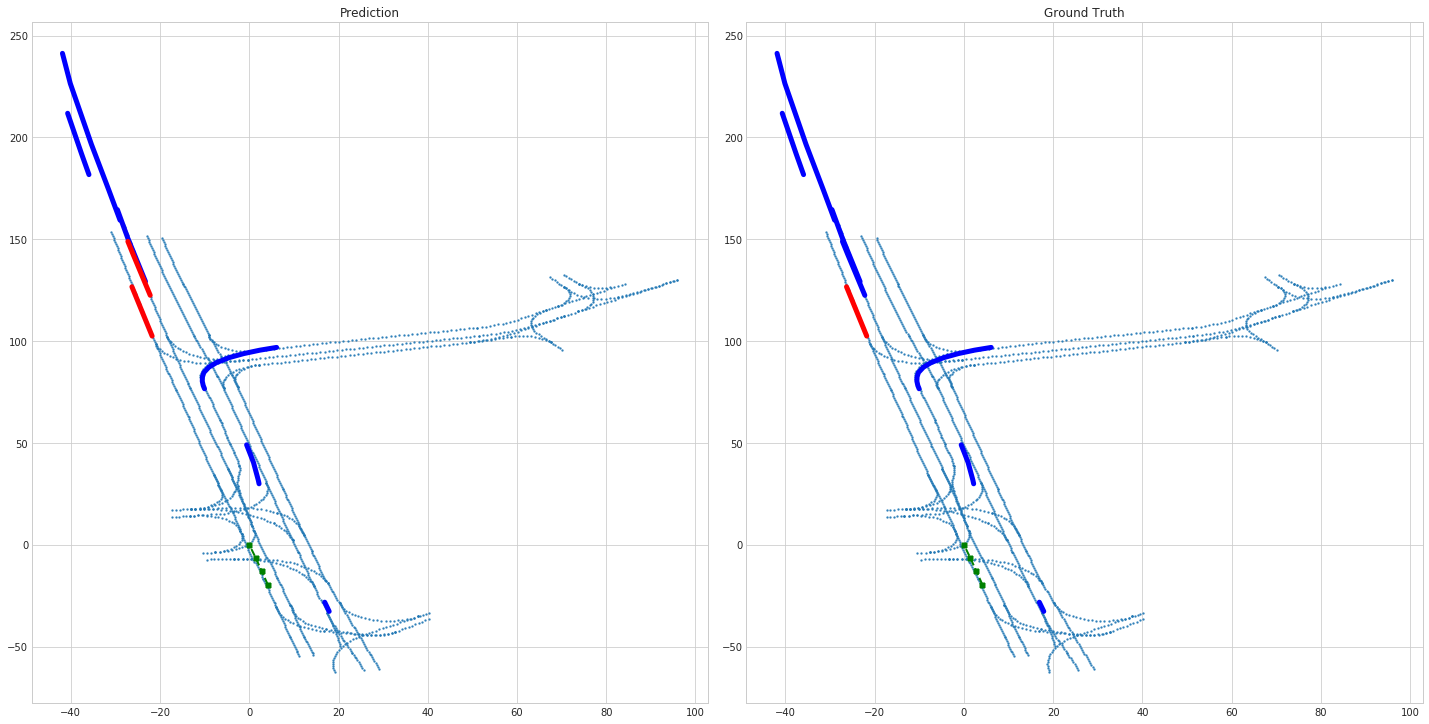

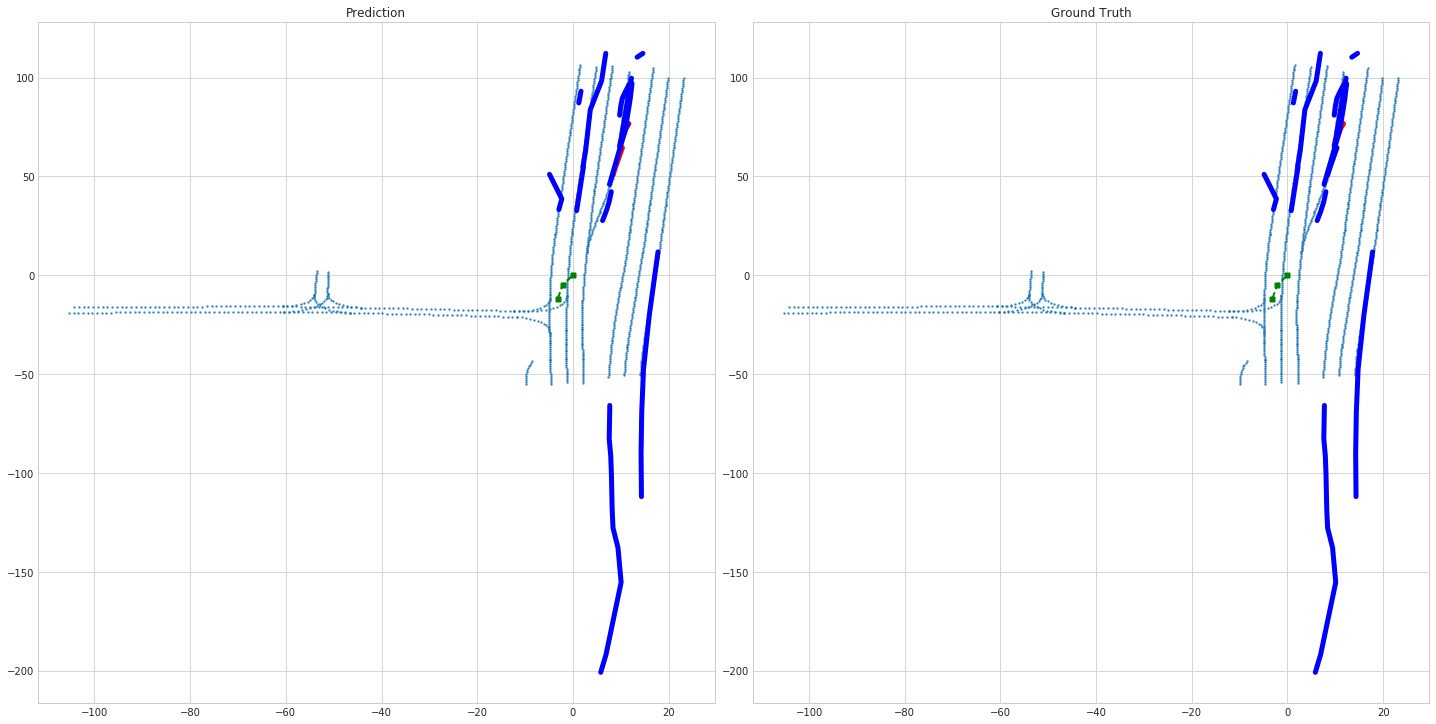

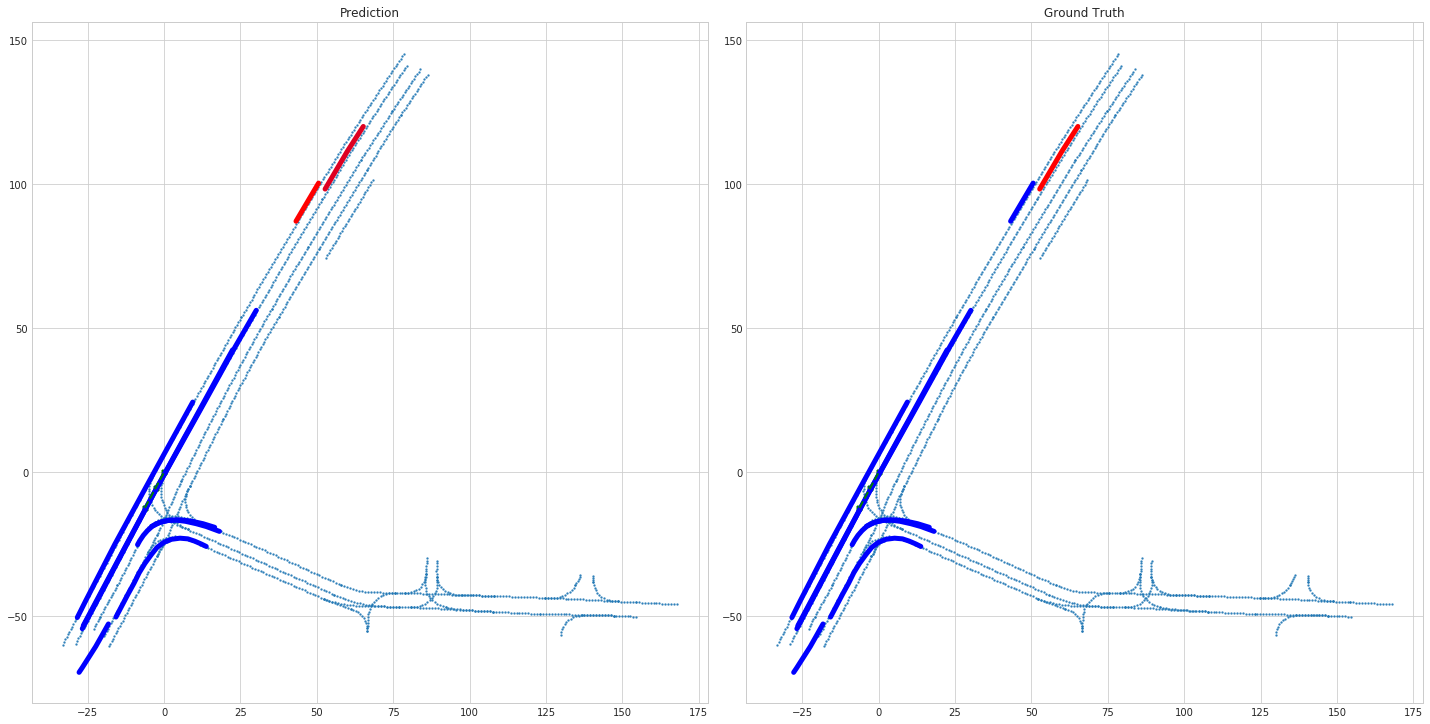

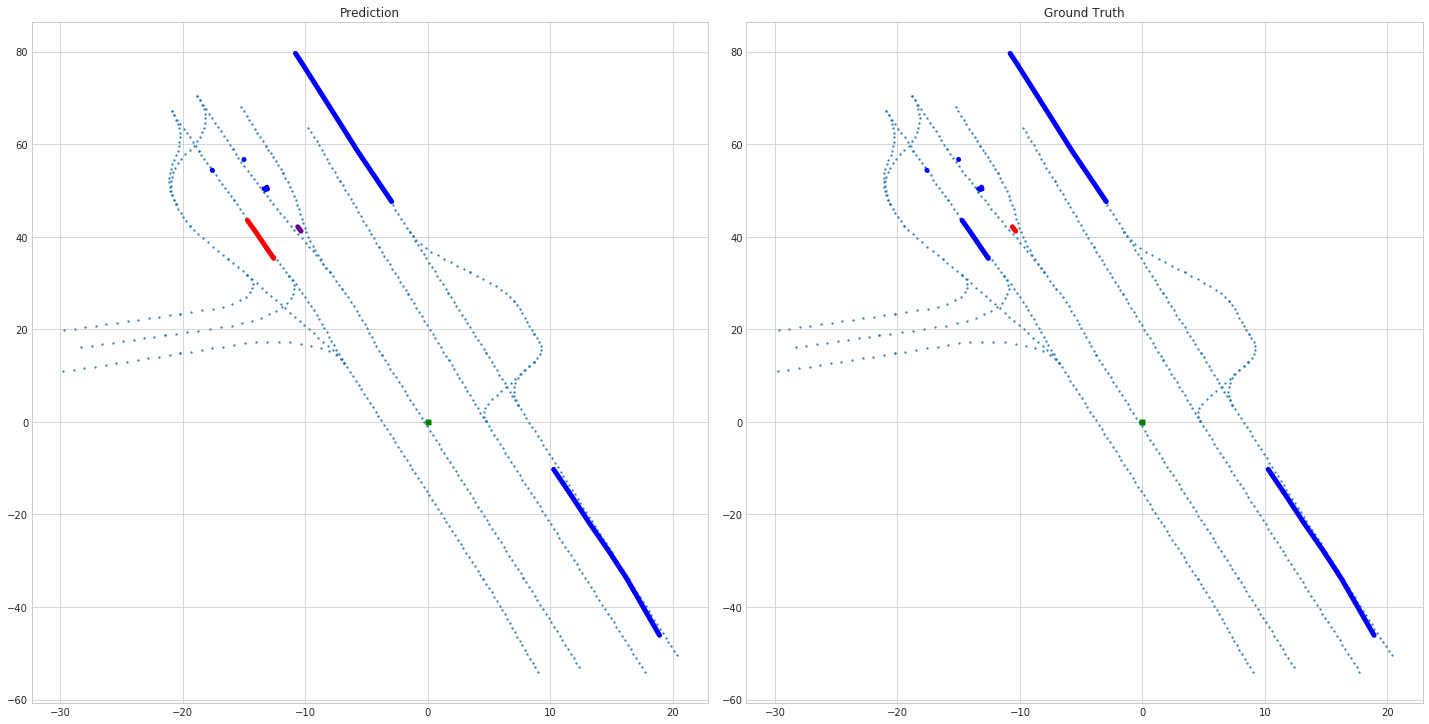

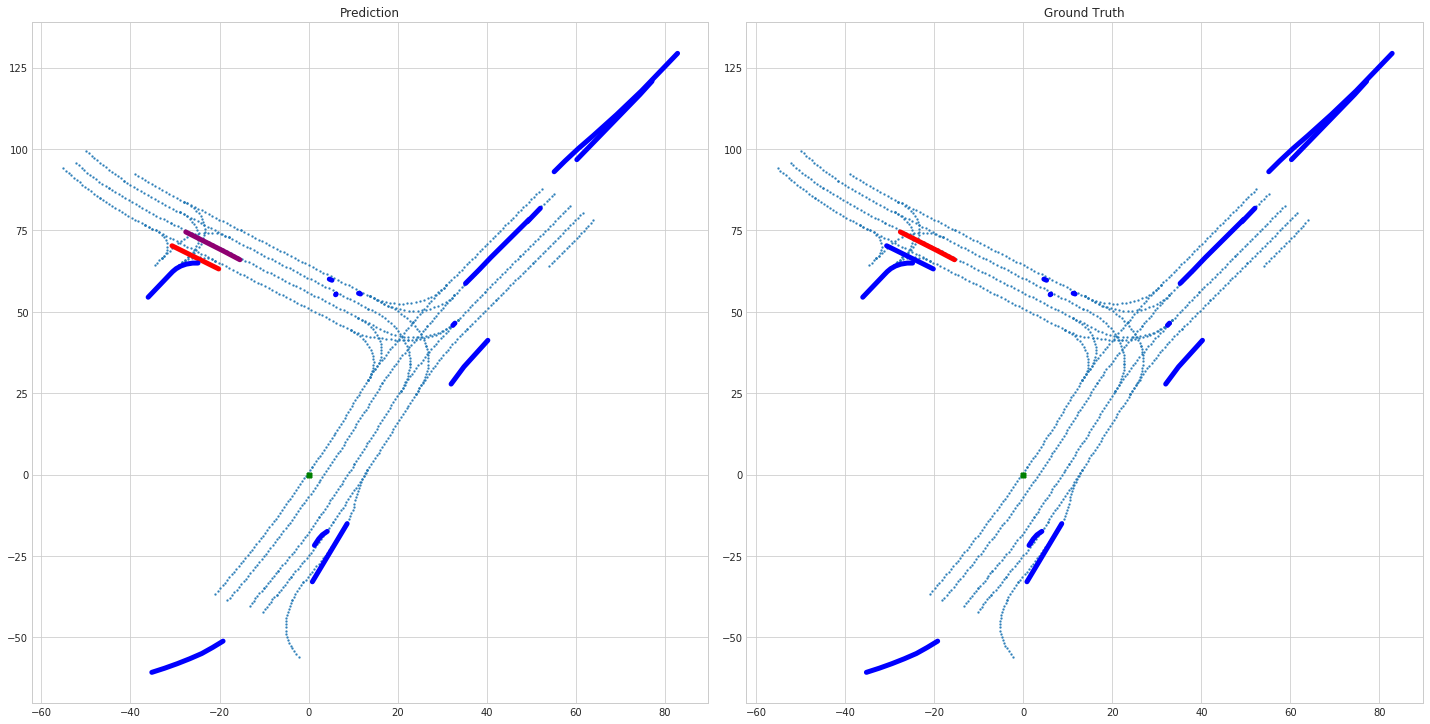

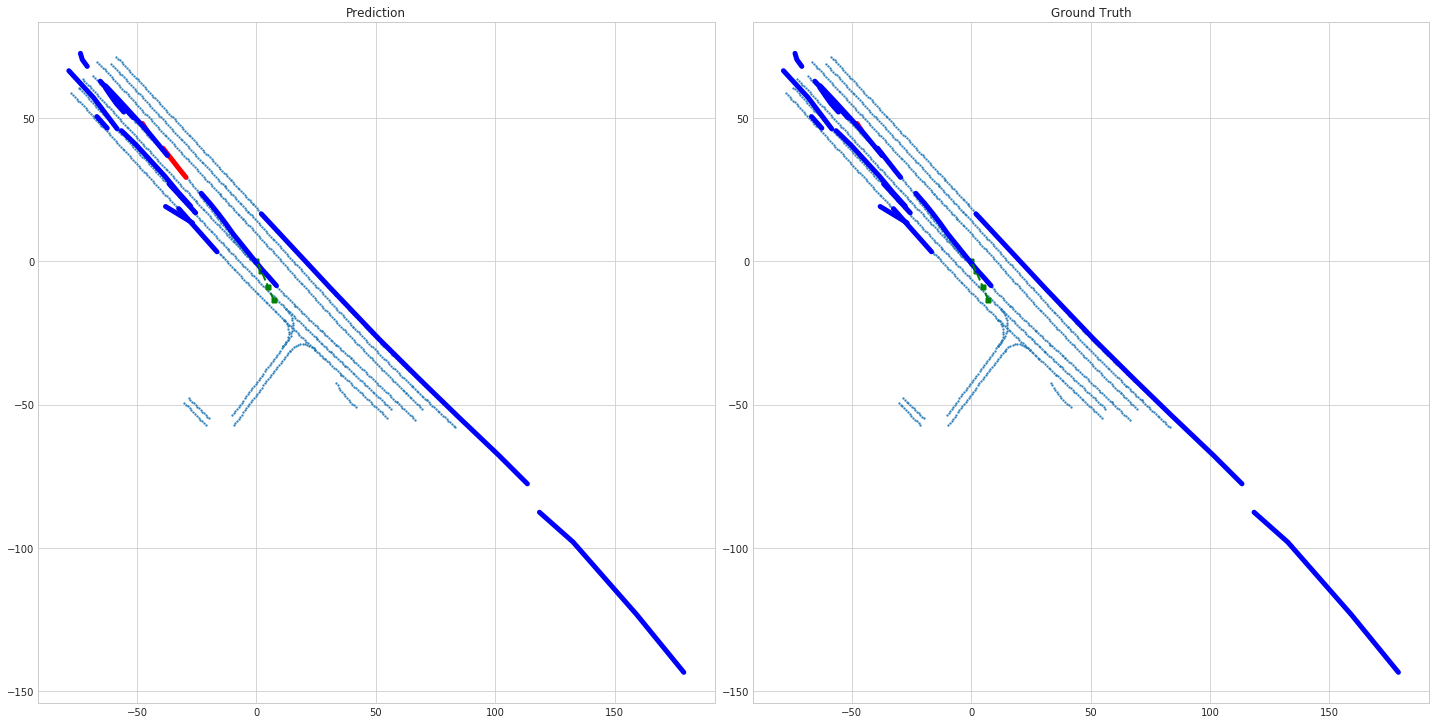

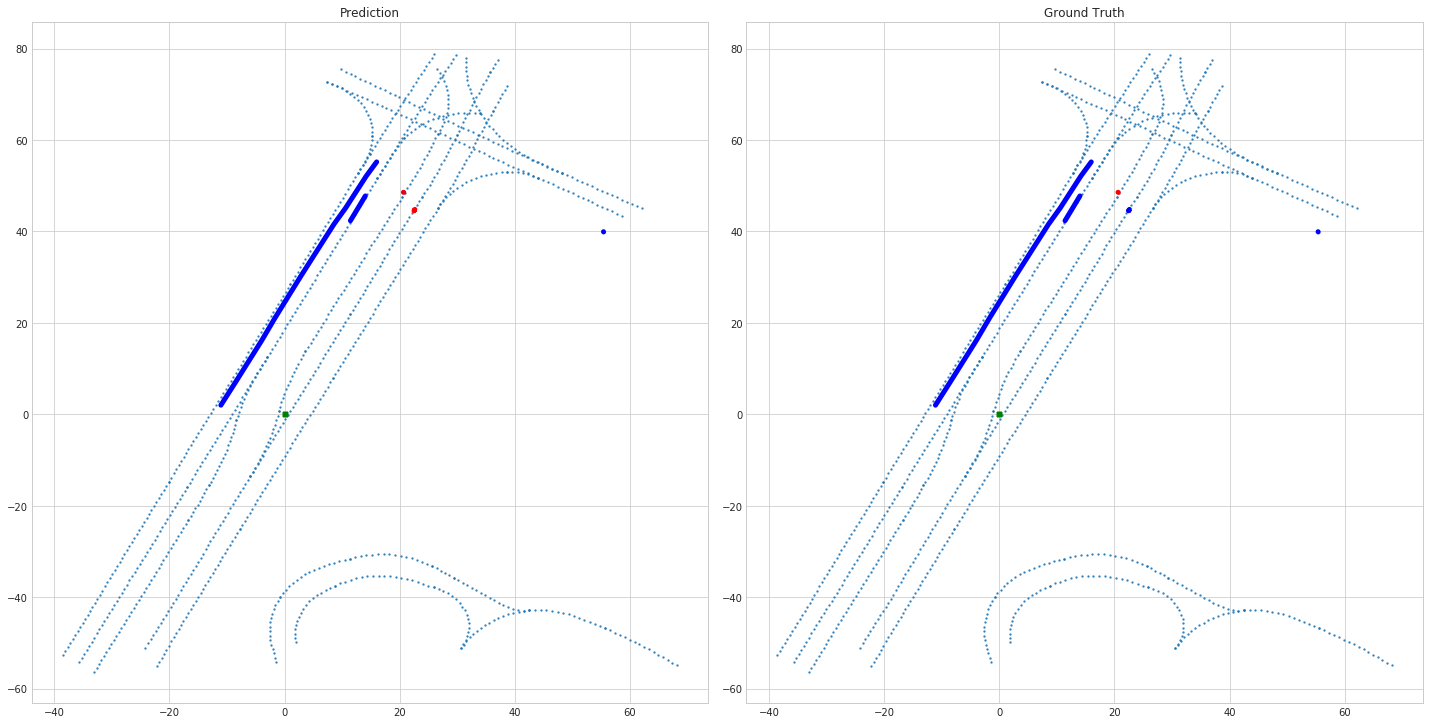

In [10]:
for idx,vis_map in enumerate(vis_lanes):
    if np.argmax(vis_scores[idx])==0:
        continue
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    fig.tight_layout()
    colors = get_colors(vis_scores[idx])
    gt_scores=np.zeros_like(np.array(vis_scores[idx]))
    gt_scores[0]=1
    gt_colors = get_colors(list(gt_scores))
    # print(vis_scores[idx])
    for i,traj in enumerate(vis_future[idx]):

        # plt.plot(traj[:,0],traj[:,1],linewidth=8,color='b')

        ax[0].plot(traj[:,0],traj[:,1],linewidth=5,color=colors[i])
        ax[1].plot(traj[:,0],traj[:,1],linewidth=5,color=gt_colors[i])
    
    ax[0].scatter(vis_map[:,0],vis_map[:,1],s=2.0,alpha=0.75)
    ax[0].scatter(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=5,color='g',marker="+")
    ax[0].plot(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=2,color='g',linestyle="--")
    ax[1].scatter(vis_map[:,0],vis_map[:,1],s=2.0,alpha=0.75)
    ax[1].scatter(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=5,color='g',marker="+")
    ax[1].plot(vis_history[idx][:,0],vis_history[idx][:,1],linewidth=2,color='g',linestyle="--")
    ax[0].set_title('Prediction')
    ax[1].set_title('Ground Truth')
    # ax.imshow()
    
    

In [23]:
inputs=data_test
self=trainer.model.encoder
target_agent_representation=inputs['target_agent_representation']
hist=target_agent_representation['history']['traj']
hist_mask=target_agent_representation['history']['mask']
future=target_agent_representation['future']['traj']
future_mask=target_agent_representation['future']['mask']
concat=target_agent_representation['concat_motion']['traj']
concat_mask=target_agent_representation['concat_motion']['mask']
target_past_embedding = self.leaky_relu(self.target_past_emb(hist))
target_future_embedding = self.leaky_relu(self.target_fut_emb(future))

In [9]:
len(predictions['traj'])

2

In [30]:
data_test['target_agent_representation']['future'].keys()
data_test['target_agent_representation']['future']['mask'].shape

torch.Size([2, 5, 4])

/home/stanliu/.local/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


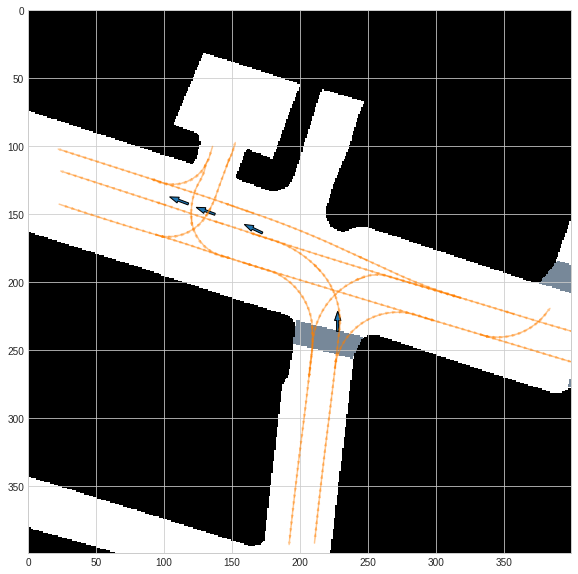

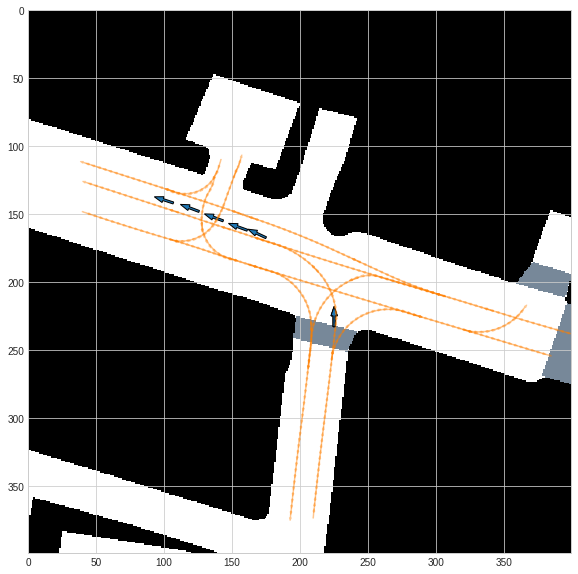

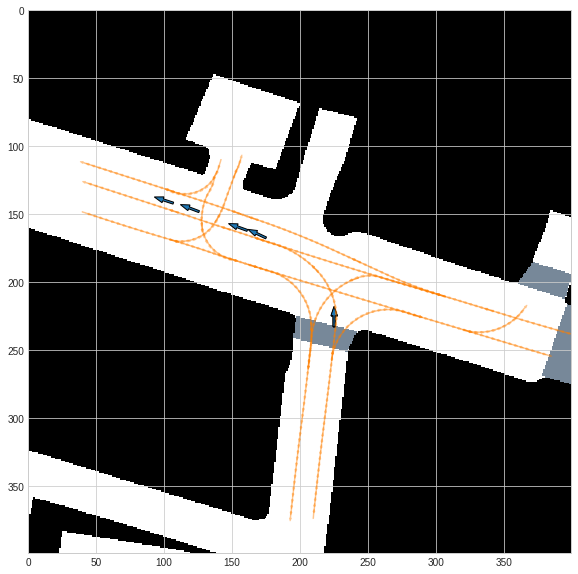

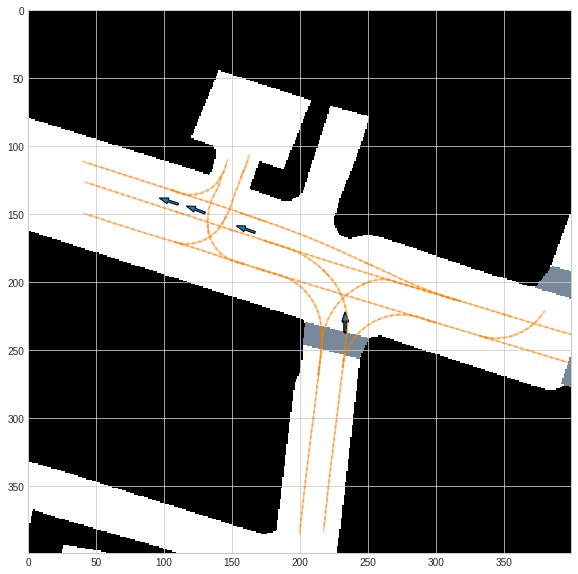

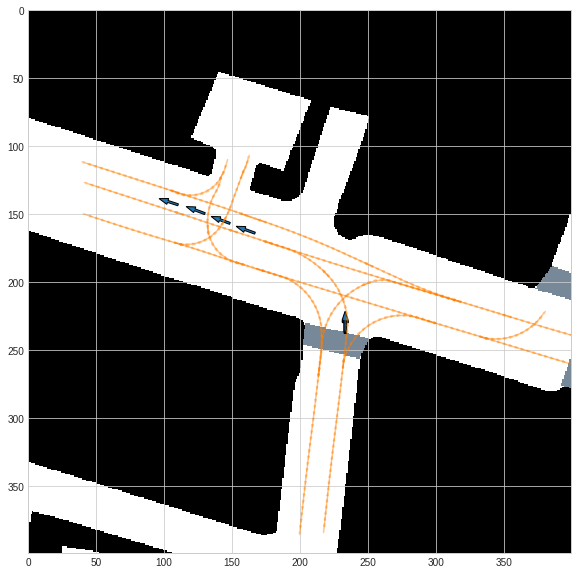

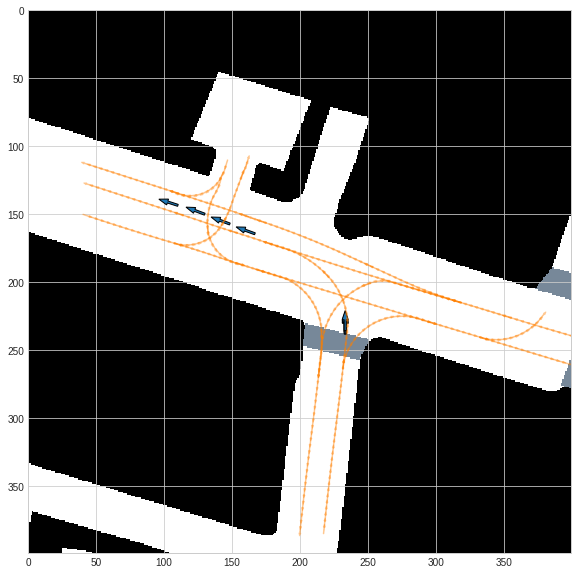

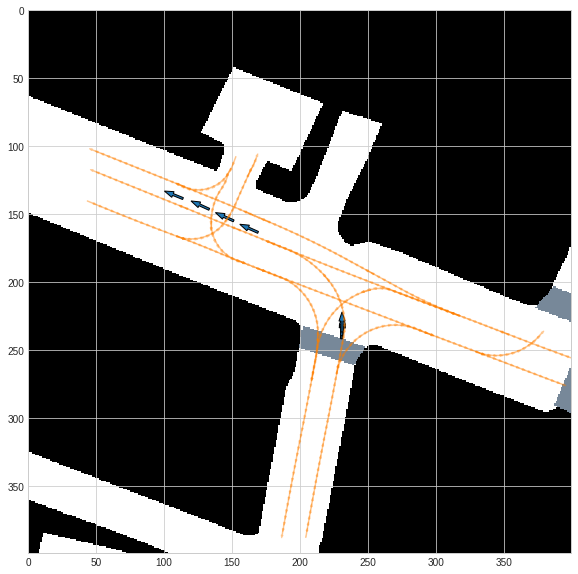

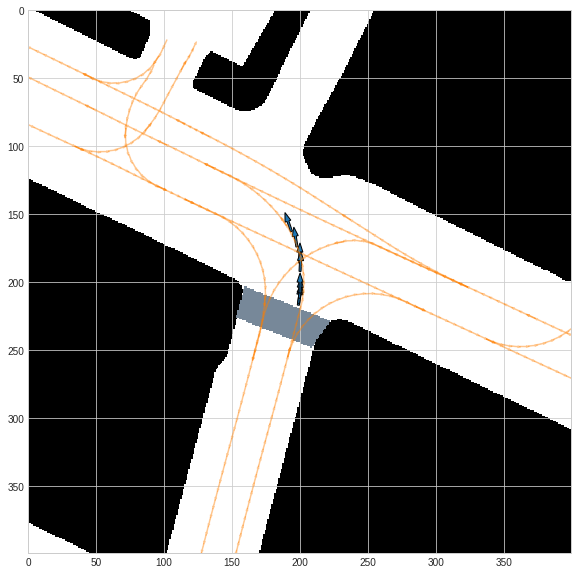

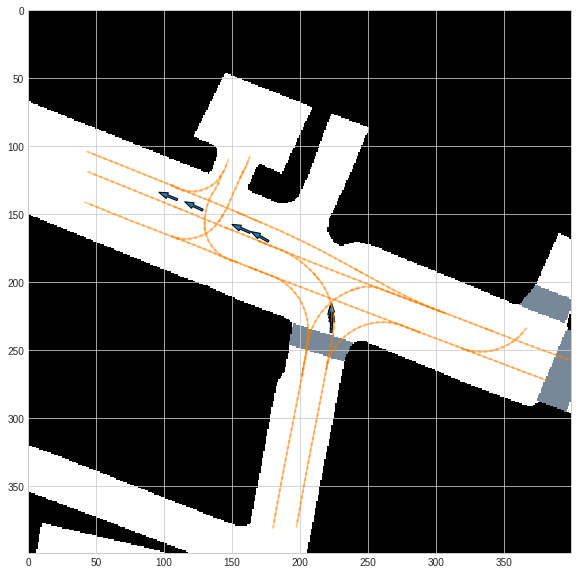

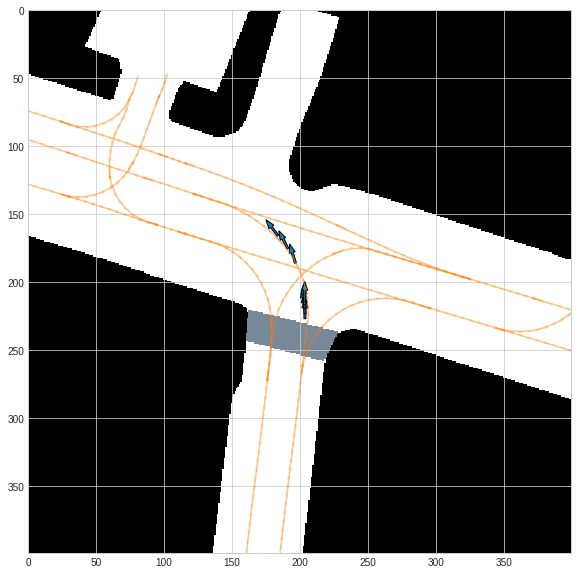

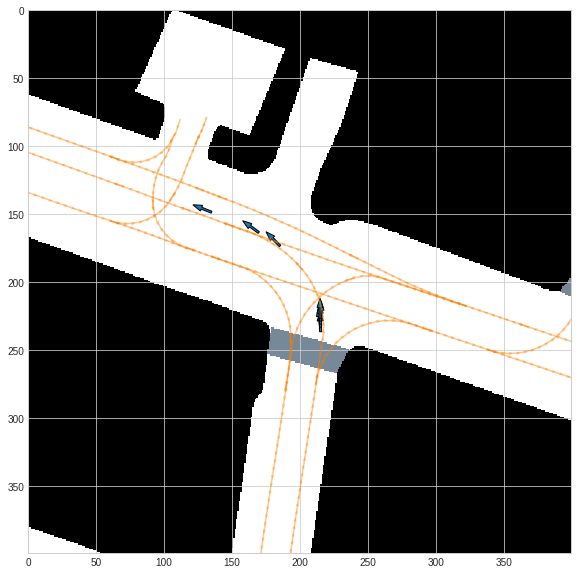

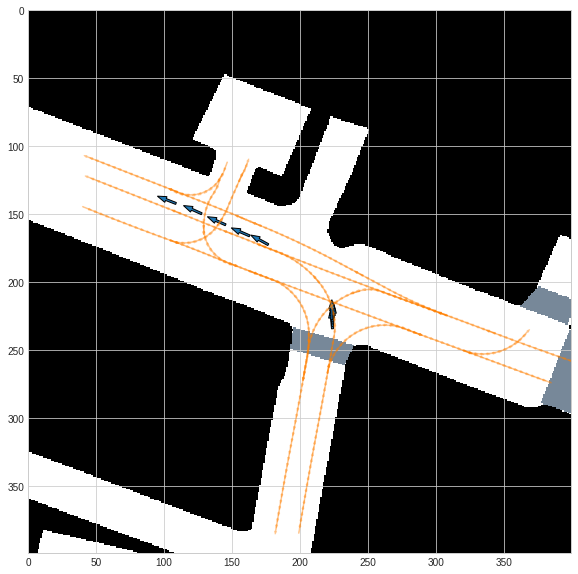

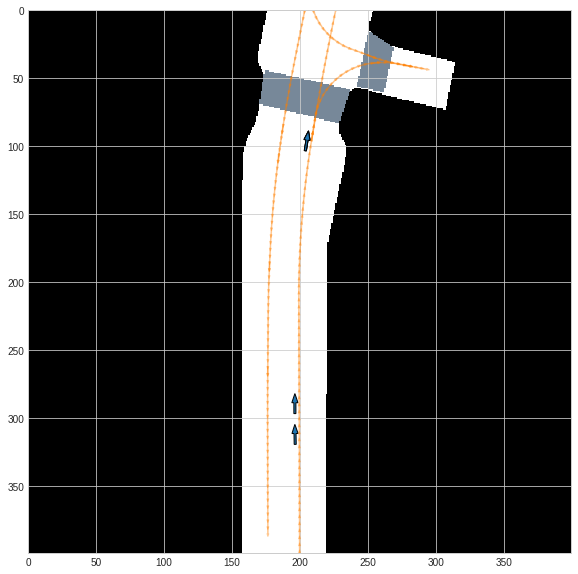

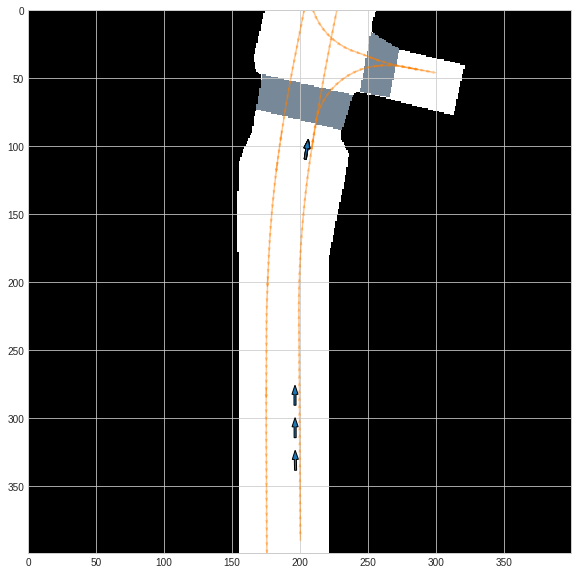

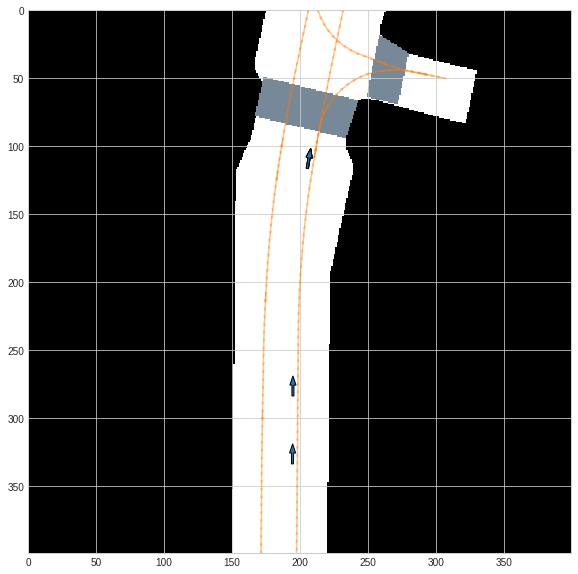

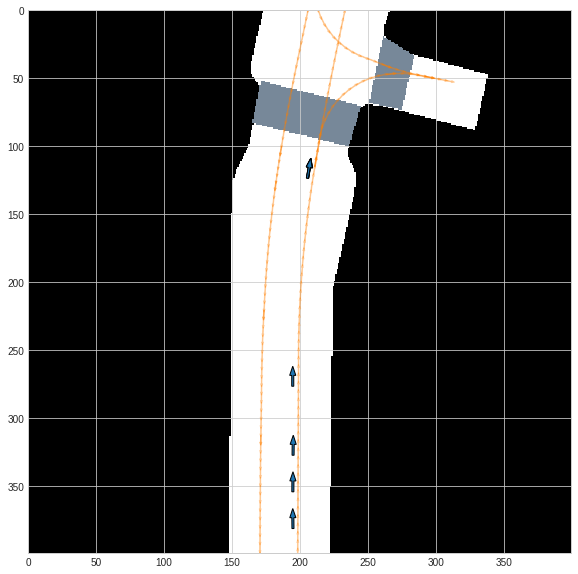

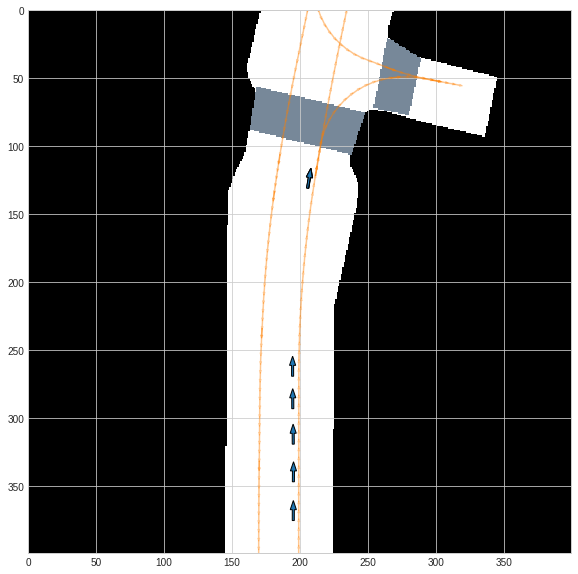

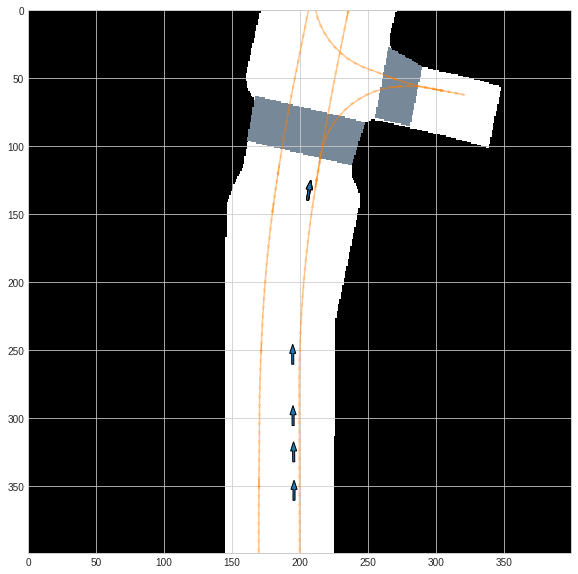

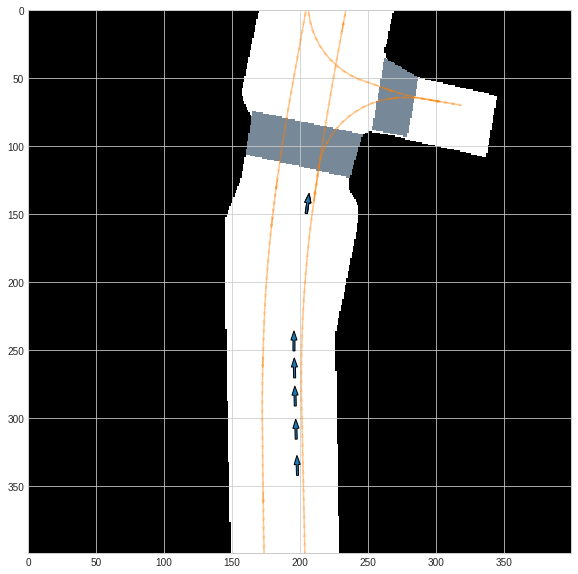

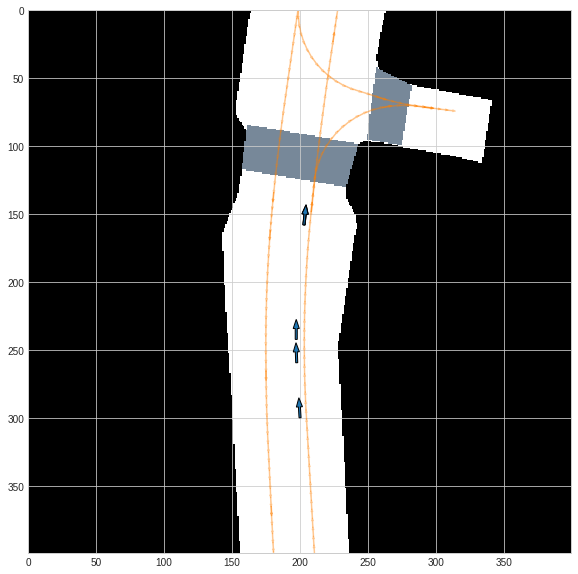

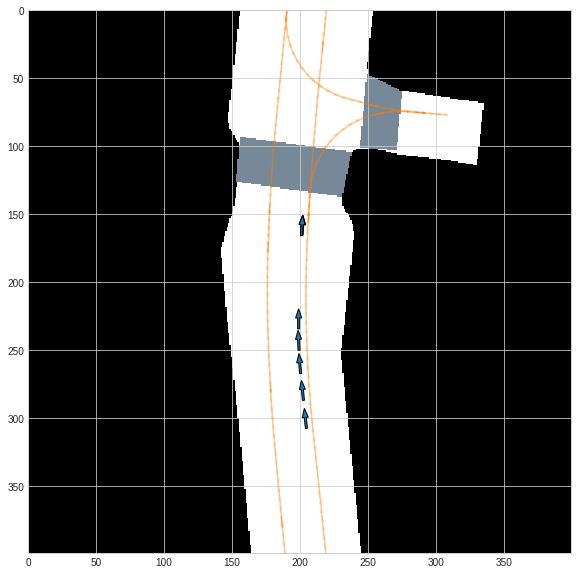

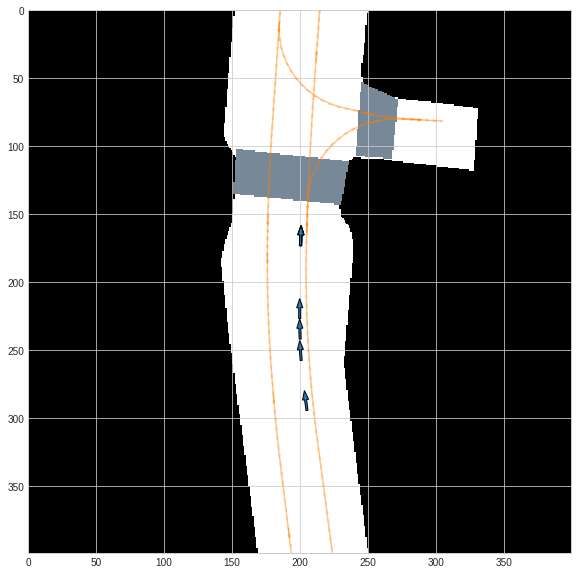

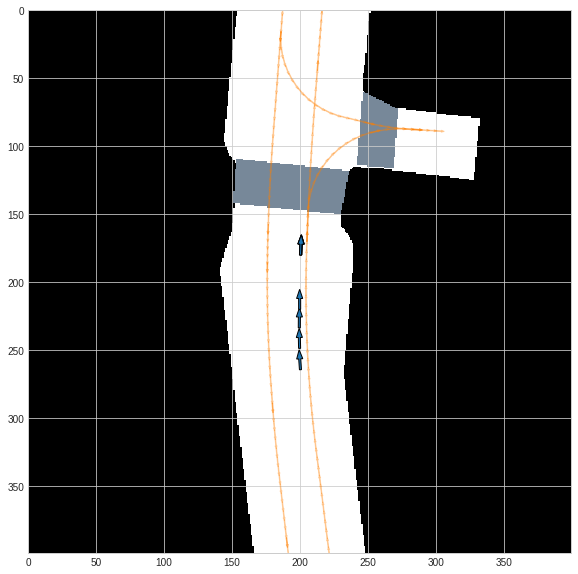

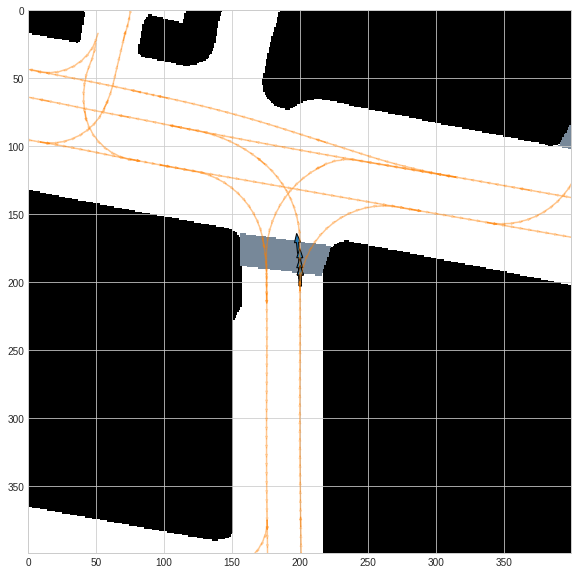

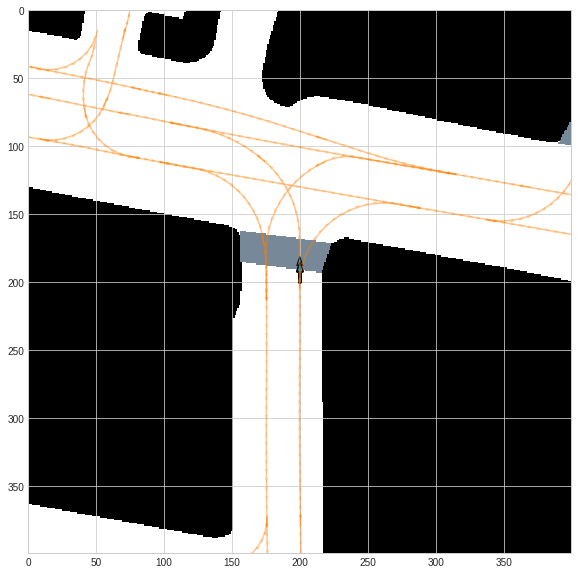

In [20]:
import numpy as np
from datasets.nuScenes.prediction import PredictHelper_occ
from nuscenes.prediction.input_representation.static_layers import correct_yaw
from pyquaternion import Quaternion
from nuscenes.eval.common.utils import quaternion_yaw
from numpy import linalg as LA
from nuscenes.prediction.input_representation.static_layers import *
from nuscenes.prediction.input_representation.combinators import Rasterizer
@torch.no_grad()
def local_pose_to_image(local_poses,pose_mask,resolution,img_size,arror_length=None):
    '''local_poses: [T,4] 
    mask: [T]
    '''
    if arror_length is None:
        arror_length=8
    y_m=np.asarray(local_poses[:,1][pose_mask].cpu())
    x_m=np.asarray(local_poses[:,0][pose_mask].cpu())
    img_origin=np.round(np.asarray(img_size)/2).astype(np.int)
    x=img_origin[1]+x_m*resolution
    y=img_origin[0]-y_m*resolution
    yaw=np.asarray((local_poses[:,2][pose_mask]).cpu())
    dy=-np.sin(yaw+np.pi/2)*arror_length
    dx=np.cos(yaw+np.pi/2)*arror_length
    return x,y,dx,dy

for sample_id in range(25):
    instance_token=data_test['instance_token'][sample_id]
    sample_token=data_test['sample_token'][sample_id]
    helper=PredictHelper_occ(trainer.tr_dl.dataset.helper.data)
    future=data_test['target_agent_representation']['future']['traj'][sample_id]
    mask=data_test['target_agent_representation']['future']['mask'][sample_id]
    hist=data_test['target_agent_representation']['history']['traj'][sample_id]
    mask_hist=data_test['target_agent_representation']['history']['mask'][sample_id]
    nearest_idx=np.where(mask[:, 0].cpu() == 0)[0][-1]
    prediction_horizon=future[nearest_idx,-1]
    prediction_horizon.item()
    sample_annotation = helper.get_sample_annotation(instance_token, sample_token)
    map_name = helper.get_map_name_from_sample_token(sample_token)

    x, y = sample_annotation['translation'][:2]
    yaw = quaternion_yaw(Quaternion(sample_annotation['rotation']))
    yaw_corrected = correct_yaw(yaw)
    global_pose=(x,y,yaw_corrected)
    if 'origin' in data_test:
        origin=tuple([data_test['origin'][sample_id,0].item(),data_test['origin'][sample_id,1].item(),data_test['origin'][sample_id,2].item()])
    else:
        coords_fut,global_yaw_fut,time_fut = helper.get_future_for_agent(instance_token, sample_token, seconds=2+prediction_horizon, in_agent_frame=False,add_yaw_and_time=True)

        sep_idx= np.searchsorted(time_fut, (prediction_horizon-0.001).item())
        origin_fut=coords_fut[sep_idx][0],coords_fut[sep_idx][1],correct_yaw(quaternion_yaw(Quaternion(global_yaw_fut[sep_idx])))
        origin=tuple((np.asarray(global_pose)+np.asarray(origin_fut))/2)

    dist=LA.norm(future[0,:2].cpu(),ord=2)
    image_side_length = 2 * max(30,dist+20)
    image_side_length_pixels = 400
    resolution=image_side_length_pixels/image_side_length
    patchbox = get_patchbox(origin[0], origin[1], image_side_length)

    angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi

    canvas_size = (image_side_length_pixels, image_side_length_pixels)
    maps= load_all_maps(helper)
    layer_names = ['drivable_area', 'ped_crossing']
    masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)
    colors = [(255, 255, 255), (119, 136, 153)]
    images = []
    for mask, color in zip(masks, colors):
        images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))


    lanes=data_test['map_representation']['lane_node_feats'][sample_id].flatten(0,1).clone()
    # submask=torch.zeros_like(data_test['map_representation']['lane_node_feats'][sample_id])
    # for i in data_test['map_representation']['s_next'][sample_id,0,:-1]:
    #     # print(i)
    #     submask[0]=1
    # lanes*=submask.flatten(0,1)
    lanes_mask=data_test['map_representation']['lane_node_feats'][sample_id].flatten(0,1)[:,0].bool()
    image = Rasterizer().combine(images)
    pose_future_mask=~data_test['target_agent_representation']['future']['mask'][sample_id][:,0].bool()
    pose_hist_mask=~data_test['target_agent_representation']['history']['mask'][sample_id][:,0].bool()
    xs, ys, dxs, dys=local_pose_to_image(future,pose_future_mask,resolution,canvas_size)
    xsh, ysh, dxsh, dysh=local_pose_to_image(hist,pose_hist_mask,resolution,canvas_size)
    xsl, ysl, dxsl, dysl=local_pose_to_image(lanes,lanes_mask,resolution,canvas_size,5)
    # plt.imshow(image)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.imshow(image)
    for x, y, dx, dy in zip(xs, ys, dxs, dys):
        ax.arrow(x, y, dx, dy, width=1.5)
    for x, y, dx, dy in zip(xsh, ysh, dxsh, dysh):
        ax.arrow(x, y, dx, dy, width=1.5)
    for x, y, dx, dy in zip(xsl, ysl, dxsl, dysl):
        ax.arrow(x, y, dx, dy, width=0.5, color=(1,0.5,0,0.3))
    ax.imshow(image)
    fig.canvas.draw()

In [7]:
import numpy as np
from datasets.nuScenes.prediction import PredictHelper_occ
sample_id=0
instance_token=data_test['instance_token'][sample_id]
sample_token=data_test['sample_token'][sample_id]
helper=PredictHelper_occ(trainer.tr_dl.dataset.helper.data)
future=data_test['target_agent_representation']['future']['traj'][sample_id]
mask=data_test['target_agent_representation']['future']['mask'][sample_id]
hist=data_test['target_agent_representation']['history']['traj'][sample_id]
mask_hist=data_test['target_agent_representation']['history']['mask'][sample_id]
nearest_idx=np.where(mask[:, 0].cpu() == 0)[0][-1]
prediction_horizon=future[nearest_idx,-1]
prediction_horizon.item()

15.500601768493652

In [ ]:
gt_test['endpoints']

In [ ]:
hist

In [ ]:
future

In [14]:
from nuscenes.prediction.input_representation.static_layers import correct_yaw
from pyquaternion import Quaternion
from nuscenes.eval.common.utils import quaternion_yaw
from numpy import linalg as LA
sample_annotation = helper.get_sample_annotation(instance_token, sample_token)
map_name = helper.get_map_name_from_sample_token(sample_token)

x, y = sample_annotation['translation'][:2]
yaw = quaternion_yaw(Quaternion(sample_annotation['rotation']))
yaw_corrected = correct_yaw(yaw)
global_pose=(x,y,yaw_corrected)
if 'origin' in data_test:
    origin=tuple([data_test['origin'][sample_id,0].item(),data_test['origin'][sample_id,1].item(),data_test['origin'][sample_id,2].item()])
else:
    coords_fut,global_yaw_fut,time_fut = helper.get_future_for_agent(instance_token, sample_token, seconds=2+prediction_horizon, in_agent_frame=False,add_yaw_and_time=True)

    sep_idx= np.searchsorted(time_fut, (prediction_horizon-0.001).item())
    origin_fut=coords_fut[sep_idx][0],coords_fut[sep_idx][1],correct_yaw(quaternion_yaw(Quaternion(global_yaw_fut[sep_idx])))
    origin=tuple((np.asarray(global_pose)+np.asarray(origin_fut))/2)

dist=LA.norm(future[0,:2].cpu(),ord=2)

In [15]:
origin

(1758.365478515625, 2626.405029296875, 0.8997405171394348)

/home/stanliu/.local/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/stanliu/.local/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


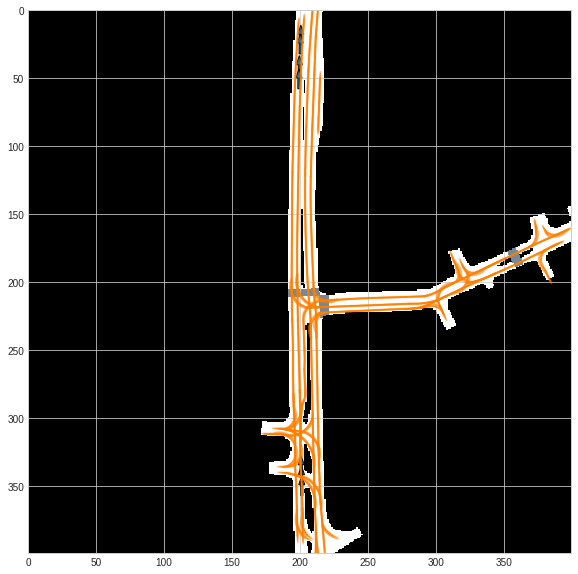

In [16]:
@torch.no_grad()
def local_pose_to_image(local_poses,pose_mask,resolution,img_size,arror_length=None):
    '''local_poses: [T,4] 
    mask: [T]
    '''
    if arror_length is None:
        arror_length=8
    y_m=np.asarray(local_poses[:,1][pose_mask].cpu())
    x_m=np.asarray(local_poses[:,0][pose_mask].cpu())
    img_origin=np.round(np.asarray(img_size)/2).astype(np.int)
    x=img_origin[1]+x_m*resolution
    y=img_origin[0]-y_m*resolution
    yaw=np.asarray((local_poses[:,2][pose_mask]).cpu())
    dy=-np.sin(yaw+np.pi/2)*arror_length
    dx=np.cos(yaw+np.pi/2)*arror_length
    return x,y,dx,dy

from nuscenes.prediction.input_representation.static_layers import *
from nuscenes.prediction.input_representation.combinators import Rasterizer

image_side_length = 2 * max(30,dist+20)
image_side_length_pixels = 400
resolution=image_side_length_pixels/image_side_length
patchbox = get_patchbox(origin[0], origin[1], image_side_length)

angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi

canvas_size = (image_side_length_pixels, image_side_length_pixels)
maps= load_all_maps(helper)
layer_names = ['drivable_area', 'ped_crossing']
masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)
colors = [(255, 255, 255), (119, 136, 153)]
images = []
for mask, color in zip(masks, colors):
    images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))


lanes=data_test['map_representation']['lane_node_feats'][sample_id].flatten(0,1).clone()
# submask=torch.zeros_like(data_test['map_representation']['lane_node_feats'][sample_id])
# for i in data_test['map_representation']['s_next'][sample_id,0,:-1]:
#     # print(i)
#     submask[0]=1
# lanes*=submask.flatten(0,1)
lanes_mask=data_test['map_representation']['lane_node_feats'][sample_id].flatten(0,1)[:,0].bool()
image = Rasterizer().combine(images)
pose_future_mask=~data_test['target_agent_representation']['future']['mask'][sample_id][:,0].bool()
pose_hist_mask=~data_test['target_agent_representation']['history']['mask'][sample_id][:,0].bool()
xs, ys, dxs, dys=local_pose_to_image(future,pose_future_mask,resolution,canvas_size)
xsh, ysh, dxsh, dysh=local_pose_to_image(hist,pose_hist_mask,resolution,canvas_size)
xsl, ysl, dxsl, dysl=local_pose_to_image(lanes,lanes_mask,resolution,canvas_size,5)
# plt.imshow(image)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.imshow(image)
for x, y, dx, dy in zip(xs, ys, dxs, dys):
    ax.arrow(x, y, dx, dy, width=1.5)
for x, y, dx, dy in zip(xsh, ysh, dxsh, dysh):
    ax.arrow(x, y, dx, dy, width=1.5)
for x, y, dx, dy in zip(xsl, ysl, dxsl, dysl):
    ax.arrow(x, y, dx, dy, width=0.5, color=(1,0.5,0,0.3))
ax.imshow(image)
fig.canvas.draw()
# image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
# image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
# plt.close(fig)
# import matplotlib.image
# matplotlib.image.imsave('train_eval/test/name.png', image_from_plot)



/home/stanliu/.local/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/stanliu/.local/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


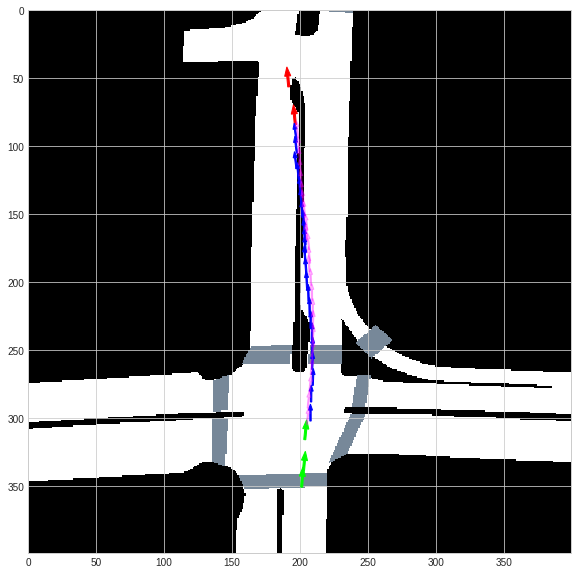

In [37]:
with torch.no_grad():
    predictions=trainer.model(data_test)
    resolution=0.5
    image_side_length = 2 * max(30,dist+20)
    image_side_length_pixels = 400
    resolution=image_side_length_pixels/image_side_length
    patchbox = get_patchbox(origin[0], origin[1], image_side_length)

    angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi

    canvas_size = (image_side_length_pixels, image_side_length_pixels)
    maps= load_all_maps(helper)
    layer_names = ['drivable_area', 'ped_crossing']
    masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)
    colors = [(255, 255, 255), (119, 136, 153)]
    images = []
    for mask, color in zip(masks, colors):
        images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))

    traj = predictions['refined_traj'][sample_id].squeeze(0)
    yaw = predictions['refined_yaw'][sample_id]
    pred = torch.cat((traj,yaw),-1)
    pose_pred_mask=~(predictions['mask'][sample_id]).bool()
    gt = gt_test['traj'][sample_id]
    image = Rasterizer().combine(images)
    pose_future_mask=~data_test['target_agent_representation']['future']['mask'][sample_id][:,0].bool()
    pose_hist_mask=~data_test['target_agent_representation']['history']['mask'][sample_id][:,0].bool()
    xs, ys, dxs, dys=local_pose_to_image(future,pose_future_mask,resolution,canvas_size)
    xsh, ysh, dxsh, dysh=local_pose_to_image(hist,pose_hist_mask,resolution,canvas_size)
    xsp, ysp, dxsp, dysp=local_pose_to_image(pred,pose_pred_mask,resolution,canvas_size)
    xsg, ysg, dxsg, dysg=local_pose_to_image(gt,pose_pred_mask,resolution,canvas_size)
    # plt.imshow(image)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    # ax.imshow(image)
    for x, y, dx, dy in zip(xs, ys, dxs, dys):
        ax.arrow(x, y, dx, dy, width=1.5, color=(1,0,0,1))
    for x, y, dx, dy in zip(xsh, ysh, dxsh, dysh):
        ax.arrow(x, y, dx, dy, width=1.5, color=(0,1,0,1))
    for x, y, dx, dy in zip(xsp, ysp, dxsp, dysp):
        ax.arrow(x, y, dx, dy, width=1.0, color=(0,0.0,1,1))
    for x, y, dx, dy in zip(xsg, ysg, dxsg, dysg):
        ax.arrow(x, y, dx, dy, width=1.0, color=(1,0,1,0.3))
    ax.imshow(image)

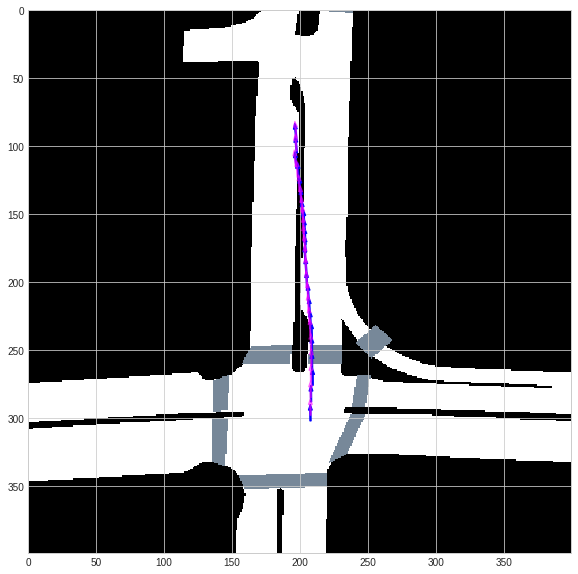

In [16]:
with torch.no_grad():

    resolution=0.5
    image_side_length = 2 * max(30,dist+20)
    image_side_length_pixels = 400
    resolution=image_side_length_pixels/image_side_length
    patchbox = get_patchbox(origin[0], origin[1], image_side_length)

    angle_in_degrees = angle_of_rotation(origin[2]) * 180 / np.pi

    canvas_size = (image_side_length_pixels, image_side_length_pixels)
    maps= load_all_maps(helper)
    layer_names = ['drivable_area', 'ped_crossing']
    masks = maps[map_name].get_map_mask(patchbox, angle_in_degrees, layer_names, canvas_size=canvas_size)
    colors = [(255, 255, 255), (119, 136, 153)]
    images = []
    for mask, color in zip(masks, colors):
        images.append(change_color_of_binary_mask(np.repeat(mask[::-1, :, np.newaxis], 3, 2), color))

    ref_traj = predictions['refined_traj'][sample_id].squeeze(0)
    ref_yaw = predictions['yaw'][sample_id]
    ref_pred = torch.cat((ref_traj,ref_yaw),-1)
    traj = predictions['traj'][sample_id].squeeze(0)
    yaw = predictions['yaw'][sample_id]
    pred = torch.cat((traj,yaw),-1)
    pose_pred_mask=~(predictions['mask'][sample_id]).bool()
    # gt = gt_test['traj'][sample_id]
    image = Rasterizer().combine(images)
    pose_future_mask=~data_test['target_agent_representation']['future']['mask'][sample_id][:,0].bool()
    pose_hist_mask=~data_test['target_agent_representation']['history']['mask'][sample_id][:,0].bool()

    xsp, ysp, dxsp, dysp=local_pose_to_image(ref_pred ,pose_pred_mask,resolution,canvas_size)
    xsg, ysg, dxsg, dysg=local_pose_to_image(pred,pose_pred_mask,resolution,canvas_size)
    # plt.imshow(image)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    # ax.imshow(image)
    for x, y, dx, dy in zip(xsp, ysp, dxsp, dysp):
        ax.arrow(x, y, dx, dy, width=1.0, color=(0,0.0,1,1))
    for x, y, dx, dy in zip(xsg, ysg, dxsg, dysg):
        ax.arrow(x, y, dx, dy, width=1.0, color=(1,0,1,0.5))
    ax.imshow(image)

In [46]:
gt_test['traj'][sample_id].shape

torch.Size([34, 3])

In [5]:
import sys
dists=torch.empty(0)
import train_eval.utils as u
for i,data in enumerate(trainer.tr_dl):
    # torch.cuda.empty_cache()
    # Load data
    sys.stdout.write('processing  %d/%d\r' % (i+1, len(trainer.tr_dl)))
    sys.stdout.flush()
    data = u.send_to_device(u.convert_double_to_float(data))
    data_test=data['inputs']
    traj=data_test['target_agent_representation']['future']['traj'][:,0,:2]
    dist=torch.norm(traj,dim=-1).cpu()
    dists=torch.cat((dists,dist),dim=0)
    # break

tensor(322.3613)


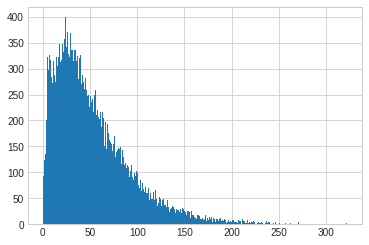

In [6]:
plt.hist(dists,bins=400)
print(torch.max(dists))

In [5]:
data_test.keys()

dict_keys(['instance_token', 'sample_token', 'map_representation', 'surrounding_agent_representation', 'target_agent_representation', 'agent_node_masks'])

In [32]:
data_test['map_representation']['lane_node_masks'].shape

torch.Size([36, 329, 20, 6])

In [66]:
for k,v in data_test['target_agent_representation'].items():
    try:
        print(k)
    except:
        for key,val in v.items():
            print(val.shape)

history
future
concat_motion
time_query


In [13]:
data_test['target_agent_representation']['time_query']['query'].shape

torch.Size([36, 34, 2])

In [9]:
focal=trainer.losses[0]
ade=trainer.losses[1]
# dri_loss=trainer.losses[1]


In [6]:
if trainer.use_teacher_force:
    trainer.model.aggregator.teacher_force=True
    trainer.model.decoder.teacher_force=True
    data_test['gt_traj']=data['ground_truth']['traj']
else:
    trainer.model.aggregator.teacher_force=False
    trainer.model.decoder.teacher_force=False
    data_test['gt_traj']=None

In [14]:
if trainer.pretrain_mlp:
    data_test['gt_traj']=data['ground_truth']['traj']
else:
    data_test['gt_traj']=None   

In [5]:
inputs=data_test
self=trainer.model.encoder
torch.cuda.empty_cache()
lane_node_feats = inputs['map_representation']['lane_node_feats']
lane_node_masks = inputs['map_representation']['lane_node_masks']
lane_node_embedding = self.leaky_relu(self.node_emb(lane_node_feats))
lane_node_enc = self.variable_size_gru_encode(lane_node_embedding, lane_node_masks, self.node_encoder)
lane_node_enc.shape


torch.Size([16, 218, 48])

In [6]:
# test_tensor=torch.arange(10).unsqueeze(0).unsqueeze(-1).repeat(12,1,3)
# start=torch.zeros_like(hist_seq_length)

def get_bidirec_data(input_tensor, start_indices, end_indices, max_length=5):
    """
    Extracts data from a 3D tensor according to start and end indices.

    :param input_tensor: the input tensor of shape (B, T, C)
    :param start_indices: a tensor of shape (B,) containing the start indices for each mini-batch
    :param end_indices: a tensor of shape (B,) containing the end indices for each mini-batch
    :param max_length: the maximum length of the extracted data
    :return: a tensor of shape (B, Q, C), where Q is the maximum length
    """
    # Create a tensor to hold the extracted data
    B, T, C = input_tensor.shape
    Q = max_length
    extracted_data = torch.zeros((B, Q, C), dtype=input_tensor.dtype, device=input_tensor.device)

    # Iterate over each mini-batch and extract the data
    for b in range(B):
        start_index = int(start_indices[b])
        end_index = int(end_indices[b])
        length = end_index - start_index

        # Ensure the length is not greater than the maximum length
        if length > Q:
            length = Q

        # Extract the data
        if length > 0:
            extracted_data[b, :length] = extracted_data[b, :length]+input_tensor[b, start_index:end_index]

    return extracted_data

In [18]:
target_agent_representation=inputs['target_agent_representation']
hist=target_agent_representation['history']['traj']
hist_mask=target_agent_representation['history']['mask']
future=target_agent_representation['future']['traj']
future_mask=target_agent_representation['future']['mask']
concat=target_agent_representation['concat_motion']['traj']
concat_mask=target_agent_representation['concat_motion']['mask']
target_concat_embedding = self.leaky_relu(self.target_concat_emb(concat))
hist_unpacked,future_unpacked=self.get_ugru_enc(concat_mask,target_concat_embedding,hist_mask,future_mask)
target_past_embedding = self.leaky_relu(self.target_past_emb(hist))
target_future_embedding = self.leaky_relu(self.target_fut_emb(future))
# concatenate bi-gru output with original feature 
past_feature=torch.cat((target_past_embedding,hist_unpacked),dim=-1).unsqueeze(1)
future_feature=torch.cat((target_future_embedding,future_unpacked),dim=-1).unsqueeze(1)
target_past_encdoings = self.variable_size_gru_encode(past_feature, hist_mask.unsqueeze(1), self.target_past_enc)
target_future_encdoings = self.variable_size_gru_encode(future_feature, future_mask.unsqueeze(1), self.target_fut_enc)

In [9]:
future

tensor([[[37.0878, 39.8689, -0.7563,  9.8991],
         [33.3429, 36.0024, -0.7563,  9.3992],
         [29.7169, 32.2359, -0.7563,  8.8993],
         [26.0879, 28.4644, -0.7563,  8.3989],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.9533,  2.1810, -0.5935,  4.5011],
         [ 0.8033,  1.7644, -0.5892,  4.0006],
         [ 0.6380,  1.3070, -0.5844,  3.4504],
         [ 0.4762,  1.0205, -0.5801,  2.9494],
         [ 0.3145,  0.7340, -0.5758,  2.4490]],

        [[10.6328, 12.1947, -0.8110,  6.5520],
         [ 7.7385,  9.5716, -0.8110,  5.0021],
         [ 6.8040,  8.7254, -0.8110,  4.5017],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 9.2306, 23.3531, -0.3450,  6.0013],
         [ 7.9353, 19.8809, -0.3537,  5.5014],
         [ 6.6392, 16.4046, -0.3625,  5.0010],
         [ 5.4644, 13.4010, -0.3756,  4.5012],
         [ 4.2886, 10.3973, -0.3887,  4.0012]]], device='cuda:0')

In [12]:
hist

tensor([[[-31.5411, -33.6220,  -0.7738,  -1.9995],
         [-30.6037, -32.8892,  -0.7563,  -1.4996],
         [-29.0822, -31.3574,  -0.7650,  -0.9998],
         [-27.5222, -29.8670,  -0.7738,  -0.4999],
         [  0.0000,   0.0000,   0.0000,   0.0000]],

        [[ -0.4176,  -0.8511,  -0.5439,  -2.0001],
         [ -0.3924,  -0.8223,  -0.5471,  -1.5002],
         [ -0.3661,  -0.7925,  -0.5503,  -0.9997],
         [ -0.3408,  -0.7638,  -0.5535,  -0.4999],
         [  0.0000,   0.0000,   0.0000,   0.0000]],

        [[-19.7126, -20.8194,  -0.8459,  -1.9497],
         [-15.8182, -17.4355,  -0.8459,  -1.4499],
         [-12.1664, -14.2673,  -0.8459,  -0.9500],
         [ -9.1222, -11.6300,  -0.8459,  -0.4999],
         [  0.0000,   0.0000,   0.0000,   0.0000]],

        [[ -8.3237, -15.6913,  -1.0928,  -2.0482],
         [ -7.1268, -14.6498,  -0.9472,  -1.4951],
         [ -5.9987, -13.4049,  -0.7781,  -0.9997],
         [ -5.2174, -12.0321,  -0.6074,  -0.4999],
         [  0.0000,   0.0

In [13]:
nbr_vehicle_feats = inputs['surrounding_agent_representation']['vehicles']
nbr_vehicle_feats = torch.cat((nbr_vehicle_feats, torch.zeros_like(nbr_vehicle_feats[:, :, :, 0:1])), dim=-1)
nbr_vehicle_masks = inputs['surrounding_agent_representation']['vehicle_masks']
nbr_vehicle_embedding = self.leaky_relu(self.nbr_emb(nbr_vehicle_feats))
nbr_vehicle_enc = self.variable_size_gru_encode(nbr_vehicle_embedding, nbr_vehicle_masks, self.nbr_enc)
nbr_ped_feats = inputs['surrounding_agent_representation']['pedestrians']
nbr_ped_feats = torch.cat((nbr_ped_feats, torch.ones_like(nbr_ped_feats[:, :, :, 0:1])), dim=-1)
nbr_ped_masks = inputs['surrounding_agent_representation']['pedestrian_masks']
nbr_ped_embedding = self.leaky_relu(self.nbr_emb(nbr_ped_feats))
nbr_ped_enc = self.variable_size_gru_encode(nbr_ped_embedding, nbr_ped_masks, self.nbr_enc)

In [60]:

# Agent-node attention
nbr_encodings = torch.cat((nbr_vehicle_enc, nbr_ped_enc), dim=1)
queries = self.query_emb(lane_node_enc).permute(1, 0, 2)
keys = self.key_emb(nbr_encodings).permute(1, 0, 2)
vals = self.val_emb(nbr_encodings).permute(1, 0, 2)
attn_masks = torch.cat((inputs['agent_node_masks']['agent']['vehicles'],
                        inputs['agent_node_masks']['agent']['pedestrians']), dim=2)
attn_masks.shape

torch.Size([16, 218, 98])

In [ ]:
att_op, _ = self.a_n_att(queries, keys, vals, attn_mask=attn_masks.bool())
att_op = att_op.permute(1, 0, 2)
lane_node_enc

In [41]:
indication_mask = (~attn_masks.bool())
for i,(mask,output) in enumerate(zip(indication_mask,att_op)):
    if mask.any():
        lane_node_enc[i] = lane_node_enc[i] + output

In [43]:
torch.isnan(lane_node_enc).sum()

tensor(0, device='cuda:0')

In [ ]:

# att_op[torch.isnan(att_op)]=0
# Concatenate with original node encodings and 1x1 conv
lane_node_enc = self.leaky_relu(self.mix(torch.cat((lane_node_enc, att_op), dim=2)))

# GAT layers
adj_mat = self.build_adj_mat(inputs['map_representation']['s_next'], inputs['map_representation']['edge_type'])
for gat_layer in self.gat:
    lane_node_enc += gat_layer(lane_node_enc, adj_mat)

In [64]:
from models.library.blocks import leaky_MLP
args={'node_enc_size':32,'target_agent_enc_size':32}
self.nd_key_emb = nn.Linear(args['node_enc_size'], args['target_agent_enc_size']).cuda()
self.nd_val_emb = nn.Linear(args['node_enc_size'], args['target_agent_enc_size']).cuda()
self.t_n_att = nn.MultiheadAttention(args['target_agent_enc_size'], num_heads=1).cuda()
self.past_mix = leaky_MLP(args['target_agent_enc_size']*2, args['target_agent_enc_size']).cuda()
self.future_mix = leaky_MLP(args['target_agent_enc_size']*2, args['target_agent_enc_size']).cuda()

In [18]:
attn_masks.shape

torch.Size([12, 112, 93])

In [15]:
tgt_queries = torch.cat((target_past_encdoings, target_future_encdoings), dim=1).permute(1, 0, 2)
nd_keys = self.leaky_relu(self.nd_key_emb(lane_node_enc)).permute(1, 0, 2)
nd_vals = self.leaky_relu(self.nd_val_emb(lane_node_enc)).permute(1, 0, 2)
t_n_attn_masks = inputs['agent_node_masks']['target']
t_n_att_op, _ = self.t_n_att(tgt_queries, nd_keys, nd_vals, attn_mask=t_n_attn_masks.bool())
t_n_att_op = t_n_att_op.permute(1, 0, 2)
t_n_att_op[torch.isnan(t_n_att_op)]=0
aug_past_enc=self.mix(torch.cat((target_past_encdoings,t_n_att_op[:,0].unsqueeze(1)),dim=2))
aug_future_enc=self.mix(torch.cat((target_future_encdoings,t_n_att_op[:,1].unsqueeze(1)),dim=2))


In [55]:

# Concatenate with original node encodings and 1x1 conv
# lane_node_enc = self.leaky_relu(self.mix(torch.cat((target_past_encdoings, t_n_att_op[:,0]), dim=2)))

In [16]:
# data['ground_truth']['traj']
map_representation = data_test['map_representation']['image']
mask=data_test['map_representation']['mask']


mask.shape

torch.Size([8, 488, 488])

In [9]:
data_test['map_representation']['image'].shape

torch.Size([12, 3, 488, 488])

In [12]:
traj_hist=data_test['target_agent_representation']

In [ ]:
from models.library.RasterSampler import *
sampler = Sampler(cfg['aggregator_args'],resolution=1.0,apply_mask=True)
nodes_2D=sampler.sample_goals(mask)
mask_under=sampler.sample_mask(mask)

In [ ]:
import matplotlib.pyplot as plt
for idx in range(8):
    surrounding_agents=data_test['surrounding_agent_representation']['image'][idx]
    plt.imshow(map_representation[idx].permute(1,2,0).cpu())
    plt.show()
    # plt.imshow(gs_map[idx,0].cpu())
    # plt.show()
    plt.imshow(surrounding_agents.permute(1,2,0).cpu())
    plt.show()
    # plt.imshow(mask[idx].cpu())
    # plt.show()

In [3]:
import torch
from math import exp
from torch.autograd import Variable
import torch.nn.functional as F
def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss#/gauss.sum()
def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 0.8).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window
window=create_window(5, 1)
window


tensor([[[[0.0019, 0.0201, 0.0439, 0.0201, 0.0019],
          [0.0201, 0.2096, 0.4578, 0.2096, 0.0201],
          [0.0439, 0.4578, 1.0000, 0.4578, 0.0439],
          [0.0201, 0.2096, 0.4578, 0.2096, 0.0201],
          [0.0019, 0.0201, 0.0439, 0.0201, 0.0019]]]])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data_test['surrounding_agent_representation'][4,:3].permute(1,2,0))
plt.show()
# plt.imshow(test_heatmap[0,0])
# plt.show()
# data['ground_truth']['traj']

In [5]:
data_test['map_representation']['lane_node_feats'].shape

torch.Size([36, 276, 20, 6])

In [ ]:
print('lane_node_feats has shape of ',data_test['map_representation']['lane_node_feats'].shape)
print('lane_node_masks has shape of ',data_test['map_representation']['lane_node_masks'].shape)
print('s_next has shape of ',data_test['map_representation']['s_next'].shape)
print('edge_type has shape of ',data_test['map_representation']['edge_type'].shape)

In [34]:
inputs=data_test
data_test.keys()

dict_keys(['instance_token', 'sample_token', 'map_representation', 'surrounding_agent_representation', 'target_agent_representation', 'agent_node_masks'])

In [ ]:
data_test['surrounding_agent_representation']['pedestrians'][-1]

In [20]:
total_norm=0
for p in trainer.model.parameters():
    
    param_norm = p.grad.data.norm(2)
    if torch.isnan(param_norm):
        print(type(p),p.size())
    total_norm += param_norm.item() ** 2
total_norm = total_norm ** (1. / 2)

AttributeError: 'NoneType' object has no attribute 'data'

In [8]:
trainer.model.encoder.nd_tgt_emb=nn.Linear(32, 36).cuda()

In [8]:
from torch.autograd.profiler import profile
with profile( profile_memory=True, record_shapes=True, use_cuda=True) as prof:
    encodings=trainer.model.encoder(data_test)
print(prof.key_averages().table(sort_by='cuda_time', row_limit=10))

-------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                           Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
           aten::masked_scatter         0.03%     185.862us         8.14%      43.806ms       7.301ms      45.141us         0.01%      43.747ms       7.291ms           0 b           0 b      26.16 Mb           0 b             6  
          aten::masked_scatter_         7.23%      38.898ms         7.95%     

In [17]:
encodings['context_encoding']['lane_info'].keys()

dict_keys(['lane_enc', 'lane_ctrs'])

In [16]:
loss=encodings['context_encoding']['lane_info']['lane_enc'].sum()

In [18]:
target_representation=encodings['target_agent_encoding']
target_hist=target_representation['hist']
target_future=target_representation['future']

In [8]:
inputs=data_test
self=trainer.model.encoder
target_agent_representation=inputs['target_agent_representation']
hist=target_agent_representation['history']['traj']
hist_mask=target_agent_representation['history']['mask']
future=target_agent_representation['future']['traj']
future_mask=target_agent_representation['future']['mask']
concat=target_agent_representation['concat_motion']['traj']
concat_mask=target_agent_representation['concat_motion']['mask']
# concat_indicator = torch.cat((torch.zeros([concat.shape[0],hist.shape[1],1]),torch.ones([concat.shape[0],future.shape[1],1])),1).cuda()

target_past_embedding = self.leaky_relu(self.target_past_emb(hist))
target_future_embedding = self.leaky_relu(self.target_fut_emb(future))

## U-GRU method
if self.motion_enc_type == 'ugru':
    target_concat_embedding = self.leaky_relu(self.target_concat_emb(concat))
    hist_unpacked,future_unpacked=self.get_ugru_enc(concat_mask,target_concat_embedding,hist_mask,future_mask)
    # concatenate bi-gru output with original feature 
    past_feature=torch.cat((target_past_embedding,hist_unpacked),dim=-1).unsqueeze(1)
    future_feature=torch.cat((target_future_embedding,future_unpacked),dim=-1).unsqueeze(1)
    target_past_encdoings = self.variable_size_gru_encode(past_feature, hist_mask.unsqueeze(1), self.target_past_enc)
    target_future_encdoings = self.variable_size_gru_encode(future_feature, future_mask.unsqueeze(1), self.target_fut_enc)
else:
## Baseline method
    target_past_encdoings = self.variable_size_gru_encode(target_past_embedding.unsqueeze(1), hist_mask.unsqueeze(1), self.target_past_enc)
    target_future_encdoings = self.variable_size_gru_encode(target_future_embedding.unsqueeze(1), future_mask.unsqueeze(1), self.target_fut_enc)
if self.map_aggregation:
    # Encode lane nodes
    lane_node_feats = inputs['map_representation']['lane_node_feats']
    lane_node_masks = inputs['map_representation']['lane_node_masks']
    lane_node_embedding = self.leaky_relu(self.node_emb(lane_node_feats))
    lane_node_enc = self.variable_size_gru_encode(lane_node_embedding, lane_node_masks, self.node_encoder)

    # Encode surrounding agents
    nbr_vehicle_feats = inputs['surrounding_agent_representation']['vehicles']
    nbr_vehicle_feats = torch.cat((nbr_vehicle_feats, torch.zeros_like(nbr_vehicle_feats[:, :, :, 0:1])), dim=-1)
    nbr_vehicle_masks = inputs['surrounding_agent_representation']['vehicle_masks']
    nbr_vehicle_embedding = self.leaky_relu(self.nbr_emb(nbr_vehicle_feats))
    nbr_vehicle_enc = self.variable_size_gru_encode(nbr_vehicle_embedding, nbr_vehicle_masks, self.nbr_enc)
    nbr_ped_feats = inputs['surrounding_agent_representation']['pedestrians']
    nbr_ped_feats = torch.cat((nbr_ped_feats, torch.ones_like(nbr_ped_feats[:, :, :, 0:1])), dim=-1)
    nbr_ped_masks = inputs['surrounding_agent_representation']['pedestrian_masks']
    nbr_ped_embedding = self.leaky_relu(self.nbr_emb(nbr_ped_feats))
    nbr_ped_enc = self.variable_size_gru_encode(nbr_ped_embedding, nbr_ped_masks, self.nbr_enc)

    # Agent-node attention
    nbr_encodings = torch.cat((nbr_vehicle_enc, nbr_ped_enc), dim=1)
    queries = self.query_emb(lane_node_enc).permute(1, 0, 2)
    keys = self.key_emb(nbr_encodings).permute(1, 0, 2)
    vals = self.val_emb(nbr_encodings).permute(1, 0, 2)
    attn_masks = torch.cat((inputs['agent_node_masks']['agent']['vehicles'],
                            inputs['agent_node_masks']['agent']['pedestrians']), dim=2)

    att_op, _ = self.a_n_att(queries, keys, vals, attn_mask=attn_masks.bool())
    att_op = att_op.permute(1, 0, 2)
    indication_mask = (~attn_masks.bool())
    nbr_attn_enc=torch.empty([0,lane_node_enc.shape[1],lane_node_enc.shape[2]]).cuda()
    for i,mask in enumerate(indication_mask):
        if mask.any():
            nbr_attn_enc = torch.cat((nbr_attn_enc,att_op[i].unsqueeze(0)),dim=0)
        else:
            nbr_attn_enc = torch.cat((nbr_attn_enc,torch.zeros_like(att_op[i]).unsqueeze(0)),dim=0)
    lane_node_enc=nbr_attn_enc+lane_node_enc

In [11]:
future

tensor([[[ 1.2993e-01,  2.6521e+01,  2.0554e-03,  3.3996e+00],
         [ 1.0115e-01,  2.2675e+01,  2.0554e-03,  2.9003e+00],
         [ 7.2017e-02,  1.8825e+01,  2.0554e-03,  2.4004e+00],
         [ 4.8416e-02,  1.5741e+01,  2.0554e-03,  2.0001e+00],
         [ 1.9278e-02,  1.1890e+01,  2.0554e-03,  1.5002e+00]],

        [[ 1.5213e+00,  8.6999e+01,  1.0844e-02,  1.0501e+01],
         [ 1.5385e+00,  8.4194e+01,  2.0477e-02,  1.0100e+01],
         [ 1.5643e+00,  7.9993e+01,  3.4907e-02,  9.5007e+00],
         [ 1.3732e+00,  7.5335e+01,  3.4907e-02,  8.9994e+00],
         [ 1.1634e+00,  7.0223e+01,  1.7453e-02,  8.4492e+00]],

        [[ 1.5276e+00,  8.2230e+01,  1.0844e-02,  9.9002e+00],
         [ 1.5707e+00,  7.5224e+01,  3.4907e-02,  8.9002e+00],
         [ 1.3795e+00,  7.0566e+01,  3.4907e-02,  8.3989e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 3.8879e-01,  3.5573e+01, -3.4939e-03, 

In [ ]:
bool_indicartor=(~inputs['agent_node_masks']['target'].bool()).any(dim=-1)
bool_indicartor


In [15]:
future[-3]

tensor([[ 1.3818e+00,  7.2346e+01, -1.7453e-02,  1.1450e+01],
        [ 1.1145e+00,  6.6284e+01, -1.7453e-02,  1.0450e+01],
        [ 7.9173e-01,  6.0126e+01, -1.7453e-02,  9.4999e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]], device='cuda:0')

In [11]:
for k,v in encodings['target_agent_encoding'].items():
    try:
        print(k)
        print(' ',v.shape)
    except:
        for key,val in v.items():
            print(key)
            print(' ',val.shape)

hist
  torch.Size([12, 1, 32])
future
  torch.Size([12, 1, 32])
time_query
query
  torch.Size([12, 34, 2])
mask
  torch.Size([12, 34, 2])


In [23]:
self=trainer.model.aggregator
time_dim=32
self.tq_embder=nn.Sequential(nn.Linear(2,time_dim),
                               nn.LeakyReLU()).cuda()
self.tq_attn=nn.MultiheadAttention(time_dim, num_heads=1).cuda()
target_representation=encodings['target_agent_encoding']
target_hist=target_representation['hist']
target_future=target_representation['future']
time_query=target_representation['time_query']['query']
mask=target_representation['time_query']['mask']
q_t_attn_masks = mask.bool()
query_emb=self.tq_embder(time_query).permute(1,0,2)
concat_kv=torch.cat((target_hist,target_future),dim=1).permute(1,0,2)
t_q_att_op, _ = self.tq_attn(query_emb, concat_kv, concat_kv, attn_mask=q_t_attn_masks.bool())
t_q_att_op[torch.isnan(t_q_att_op)]=0

In [25]:
t_q_att_op=t_q_att_op.transpose(0,1)
t_q_att_op.shape

torch.Size([12, 34, 32])

In [15]:
encodings.keys()

dict_keys(['target_agent_encoding', 'context_encoding'])

In [9]:
torch.cuda.empty_cache()
with profile( profile_memory=True, record_shapes=True, use_cuda=True) as prof:
    agg_feat=trainer.model.aggregator(encodings)
print(prof.key_averages().table(sort_by="cpu_time", row_limit=10))
torch.cuda.empty_cache()
# connectivities=agg_feat['node_connectivity']
# mask_map=agg_feat['under_sampled_mask']
# init=agg_feat['initial_states']
# print(connectivities.requires_grad)
# print(mask_map.requires_grad)

-----------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-----------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  aten::equal         1.28%     473.017us        14.63%       5.408ms       1.352ms     248.066us         0.59%       3.951ms     987.648us           0 b           0 b           0 b      -9.00 Kb             4  
                     aten::eq         9.77%       3.612ms        10.11%       3.736ms 

In [9]:
agg_feat.keys()

dict_keys(['query', 'mask', 'endpoints', 'lane_info', 'lane_ctrs', 'nbr_info', 'refine_input'])

In [11]:
future_encodings=agg_feat['future_encodings']
hist_encodings=agg_feat['hist_encodings']
future_ctrs=agg_feat['future_ctrs']
hist_ctrs=agg_feat['hist_ctrs']
map_enc=encodings['context_encoding']
lane_node_masks=map_enc['lane_mask']
lane_node_encodings=map_enc['lane_enc']
lane_ctrs=map_enc['lane_ctrs']

In [21]:
from models.library.blocks import *
hist_encodings = get_attention(  hist_ctrs, hist_encodings, data_test['map_representation']['lane_ctrs'], lane_node_encodings, hist_aggtor)

In [ ]:
lane_subnode_embedding = get_attention( lane_node_ctrs, lane_subnode_embedding, hist_last_ctrs.unsqueeze(1), h0.transpose(0,1), self.past_map_aggtor)

In [14]:
agg_encoding=agg_feat
self=trainer.model.decoder
query=agg_encoding['query']
initial_traj=self.init_traj_decoder(query).unsqueeze(1)
initial_yaw=self.init_yaw_decoder(query)
mask=agg_encoding['mask'][:,:,0]
if 'refine_input' in agg_encoding:
    base_info=agg_encoding['refine_input']['traj'].clone()
    refine_mask=agg_encoding['refine_input']['mask'].clone()
    fill_in_mask=torch.isinf(base_info)
    fill_in_vals=torch.cat((initial_traj.clone().squeeze(1),initial_yaw.clone()),-1)
    extract_mask=(1-(mask.clone().unsqueeze(-1).repeat(1,1,3))).bool()
    base_info[fill_in_mask]=fill_in_vals[extract_mask]
    init_traj_feature=self.traj_emb(base_info)
    traj_mask=refine_mask[:,:,0]
    query_refined=self.get_bigru_enc(traj_mask,torch.cat((init_traj_feature,base_info),-1),self.bi_gru_refiner)
    traj_offset=self.init_traj_refiner(query_refined)
    yaw_offset=self.init_yaw_refiner(query_refined)
    traj=initial_traj.clone().squeeze(1)
    yaw=initial_yaw.clone()
    traj[(1-agg_encoding['mask'][:,:,:2]).bool()]+=(traj_offset[fill_in_mask[:,:,:2]])
    yaw[(1-agg_encoding['mask'][:,:,:1]).bool()]+=(yaw_offset[fill_in_mask[:,:,:1]])
    traj=traj.unsqueeze(1)


In [15]:
lane_enc=agg_encoding['lane_info']['lane_enc'] 
lane_ctrs=agg_encoding['lane_info']['lane_ctrs']
nbr_enc=agg_encoding['nbr_info']['nbr_enc'] 
nbr_ctrs=agg_encoding['nbr_info']['nbr_ctrs']

In [17]:
base_info=agg_encoding['refine_input']['traj'].clone()
refine_mask=agg_encoding['refine_input']['mask'].clone()
fill_in_mask=torch.isinf(base_info)
fill_in_vals=torch.cat((traj.clone().squeeze(1),yaw.clone()),-1)
extract_mask=(1-(mask.clone().unsqueeze(-1).repeat(1,1,3))).bool()
base_info[fill_in_mask]=fill_in_vals[extract_mask]
traj_ctrs=base_info[:,:,:2]
traj_mask=refine_mask[:,:,0]

concat_base=self.traj_encoder(base_info)
map_enc=self.get_attention( traj_mask, traj_ctrs, concat_base, lane_ctrs, lane_enc, self.map_aggtor)
interact_enc=self.get_attention( traj_mask, traj_ctrs, concat_base, nbr_ctrs, nbr_enc, self.nbr_aggtor)
concat_enc=torch.cat((map_enc,interact_enc),-1)

attn_mask=traj_mask.unsqueeze(1).repeat(1,agg_encoding['refine_input']['mask'].shape[1],1).bool()
query_embd=self.query_emb(concat_enc).transpose(0,1)
key_embd=self.key_emb(concat_enc).transpose(0,1)
val_embd=self.val_emb(concat_enc).transpose(0,1)
att_op, _ = self.traj_attn(query_embd, key_embd, val_embd, attn_mask=attn_mask)
att_op=att_op.transpose(0,1)

concat_enc=torch.cat((concat_enc,att_op,concat_base),-1)

In [7]:
self=trainer.model.decoder
agg_encoding=agg_feat
query=agg_encoding['query']
traj=self.traj_decoder(query).unsqueeze(1)
yaw=self.yaw_decoder(query)

In [7]:
tq_self_attn = nn.MultiheadAttention(48, 1).cuda()
query_emb = nn.Linear(48, 48).cuda()
key_emb = nn.Linear(48, 48).cuda()
val_emb = nn.Linear(48, 48).cuda()



In [8]:
agg_encoding=agg_feat
attn_mask=agg_encoding['mask'][:,:,0].unsqueeze(-1).transpose(1,2).repeat(1,agg_encoding['mask'].shape[1],1).bool()
query=query_emb(agg_encoding['query']).transpose(0,1)
key=key_emb(agg_encoding['query']).transpose(0,1)
val=val_emb(agg_encoding['query']).transpose(0,1)
att_op, _ = tq_self_attn(query, key, val, attn_mask=attn_mask.bool())
att_op=att_op.transpose(0,1)

aug_query=torch.cat((agg_encoding['query'],att_op),dim=-1)

In [9]:
from models.library.blocks import *
traj_decoder=nn.Sequential(leaky_MLP(96,48),
                            nn.Linear(48,2)).cuda()
yaw_decoder=nn.Sequential(leaky_MLP(96,48),
                            nn.Linear(48,1)).cuda()

traj=traj_decoder(aug_query).unsqueeze(1)
yaw=yaw_decoder(aug_query)
mask=agg_encoding['mask'][:,:,0]

predictions = {'traj': traj, 'yaw': yaw, 'mask': mask}

In [8]:
print(agg_feat.keys())
# print(agg_feat['node_connectivity'].shape)
# inputs=agg_feat
# attn_output_weights = inputs['node_connectivity']
# print(attn_output_weights[0].shape)
# init_states=inputs['initial_states']
# target_encodings = inputs['target_encodings']
# map_feature=inputs['feature'].permute(0,2,3,1) 
# mask=inputs['under_sampled_mask']  

# print(agg_feat['node_connectivity'].shape)
# print((agg_feat['initial_states'].indices().nelement() * agg_feat['initial_states'].indices().element_size() + agg_feat['initial_states'].values().nelement() *agg_feat['initial_states'].values().element_size()) / 1024**2)

dict_keys(['query', 'mask'])


In [ ]:
(~data_test['agent_node_masks']['target'].bool()).any(-1)

In [10]:

with profile( use_cuda=True,profile_memory=True, record_shapes=True) as prof:
    predictions=trainer.model.decoder(agg_feat)
print(prof.key_averages().table(sort_by="cpu_time", row_limit=10))
# print(predictions['pred'].element_size() * predictions['pred'].nelement()/ 1024**2)
# pred=predictions['pred'].to_sparse()
# print(pred.element_size() * pred.nelement()/ 1024**2)

# print((pred.indices().nelement() * pred.indices().element_size() + pred.values().nelement() * pred.values().element_size()) / 1024**2)

-------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                           Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                      aten::gru         0.10%     217.938us         3.73%       7.826ms       3.913ms      21.512us         0.01%       6.388ms       3.194ms           0 b           0 b       2.16 Mb           0 b             2  
               aten::_cudnn_rnn         2.75%       5.762ms         3.56%     

In [21]:
predictions.keys()

dict_keys(['init_traj', 'init_yaw', 'traj', 'yaw', 'mask', 'endpoint_traj', 'endpoint_yaw', 'refined_traj', 'refined_yaw'])

In [24]:
for k,v in predictions.items():
    print(k)
    print(v)

init_traj
tensor([[[[-0.0614,  0.2033],
          [-0.0787,  0.2056],
          [-0.0964,  0.2002],
          ...,
          [-0.1879,  0.2878],
          [-0.1879,  0.2878],
          [-0.1879,  0.2878]]],


        [[[-0.1665,  0.3839],
          [-0.1189,  0.4341],
          [-0.0388,  0.4979],
          ...,
          [ 0.1668,  0.7091],
          [ 0.1668,  0.7091],
          [ 0.1668,  0.7091]]],


        [[[-0.0957,  0.4117],
          [-0.0986,  0.4714],
          [-0.0807,  0.5663],
          ...,
          [-0.0326,  0.6495],
          [-0.0326,  0.6495],
          [-0.0326,  0.6495]]],


        ...,


        [[[-0.0212,  0.2448],
          [-0.0315,  0.2492],
          [-0.0431,  0.2534],
          ...,
          [-0.0146,  0.6089],
          [-0.0146,  0.6089],
          [-0.0146,  0.6089]]],


        [[[-0.0147,  0.1960],
          [-0.0210,  0.1970],
          [-0.0279,  0.1981],
          ...,
          [-0.0174,  0.2979],
          [-0.0174,  0.2979],
          [-0.

In [8]:
from models.library.blocks import Att

traj=predictions['traj'].squeeze(1)
traj_mask=predictions['mask']
lane_enc=encodings['context_encoding']['combined'] #32
lane_mask=encodings['context_encoding']['combined_masks']
lane_ctrs=data_test['map_representation']['lane_ctrs']
query = agg_feat['query'] #48
map_agg = Att(n_agt=48,n_ctx=32).cuda()

In [9]:

agt_idcs=[]
agt_ctrs=[]
ctx_idcs=[]
ctx_ctrs=[]
agt_mask=[]
for batch_id,mask in enumerate(traj_mask):
    agt_idcs.append(torch.arange(traj.shape[1],device=traj.device).long())
    agt_ctrs.append(traj[batch_id])
    ctx_idcs.append(torch.arange(lane_enc.shape[1],device=lane_enc.device).long())
    ctx_ctrs.append(lane_ctrs[batch_id])
    agt_mask.append(traj_mask[batch_id])

In [14]:
map_enc=map_agg.forward(agts=query.flatten(0,1), agt_idcs=agt_idcs, agt_ctrs=agt_ctrs, ctx=lane_enc.flatten(0,1), ctx_idcs=ctx_idcs, ctx_ctrs=ctx_ctrs, dist_th=20,agt_mask=agt_mask)


torch.Size([1088, 48])

In [15]:
map_enc=map_enc.view(query.shape)
query=torch.cat((map_enc,traj),-1)

torch.Size([32, 34, 48])

In [ ]:
mask=agg_feat['mask'][:,:,0]

In [10]:
yaw = predictions['yaw'].squeeze(-1)
yaw_gt = gt_test['traj'][:,:,-1] if type(gt_test) == dict else gt_test[:,:,-1]

# Useful params
batch_size = yaw.shape[0]
sequence_length = yaw.shape[1]

# Masks for variable length ground truth trajectories
masks = predictions['mask'] if type(predictions) == dict and 'mask' in predictions.keys() \
    else torch.zeros(batch_size, sequence_length).to(yaw.device)
indices=torch.abs(yaw-yaw_gt)>(3.14159/2)
multipliers=torch.abs(yaw-yaw_gt)//(3.14159/2)
larger_inds=(yaw_gt>yaw)*indices
smaller_inds=(yaw_gt<yaw)*indices
yaw_gt[larger_inds]-=((3.14159/2)*multipliers[larger_inds])
yaw_gt[smaller_inds]+=((3.14159/2)*multipliers[smaller_inds])

errs=torch.sum(torch.abs(yaw-yaw_gt)*(1-masks),dim=1)/torch.sum((1-masks),dim=1)

In [ ]:
((3.14159/2)*multipliers[larger_inds])

In [8]:
self=trainer.model.decoder
inputs=agg_feat
if type(inputs) is torch.Tensor:
    agg_encoding = inputs
else:
    agg_encoding = inputs['agg_encoding']
    if 'under_sampled_mask' in inputs:
        mask=inputs['under_sampled_mask']
    else:
        mask=None
    
if self.output_traj:
    target_encodings = inputs['target_encodings']
if 'traj_feature' in inputs:
    target_encodings = inputs['traj_feature']
predictions=self.decoding_net(agg_encoding)

In [9]:
map_feature=agg_encoding.flatten(2).permute(2,0,1)
# nodes_2D=get_index(predictions[:,-1].unsqueeze(1),mask,self.H,self.W)
dense_pred=predictions[:,-1].unsqueeze(1)
endpoints,confidences = self.endpoint_sampler(dense_pred)
endpoints=endpoints.long()
concat_feature=torch.empty([0,self.num_target,self.feature_dim],device=predictions.device)
x_coord,y_coord=torch.meshgrid(torch.arange(self.map_extent[-1],self.map_extent[-2],-self.resolution)-self.resolution/2, ##### SHould be changed when image size changes
                                torch.arange(self.map_extent[0],self.map_extent[1],self.resolution)+self.resolution/2)
indices=torch.cat([y_coord.unsqueeze(-1),x_coord.unsqueeze(-1)],dim=-1).to(predictions.device)

In [12]:
for batch_idx in range(len(dense_pred)):
    diff = (indices[endpoints[batch_idx,:,0],endpoints[batch_idx,:,1]]).float()
    feature=torch.cat([self.diff_encoder(diff),target_encodings[batch_idx].repeat(self.endpoint_sampler._n_targets,1)],dim=-1).unsqueeze(0)
    concat_feature=torch.cat([concat_feature,feature],dim=0)

In [12]:
print(len(agg_feat['node_connectivity']))
print(agg_feat['under_sampled_mask'].shape)

torch.Size([16, 59536])


In [8]:
agg_encoding = agg_feat['agg_encoding']
mask=agg_feat['under_sampled_mask']

In [10]:
agg_feat.keys()

dict_keys(['agg_encoding', 'under_sampled_mask', 'target_encodings', 'traj_feature', 'gt_traj'])

In [13]:
agg_feat['target_encodings'].sum(-1)


tensor([ 4.1723e-06,  2.8610e-06, -1.9073e-06, -3.3379e-06,  3.3379e-06,
         0.0000e+00, -2.1458e-06,  5.2452e-06, -2.8610e-06,  1.4305e-06,
         9.5367e-07,  2.3842e-06,  2.8610e-06, -9.5367e-07, -3.4571e-06,
         1.6689e-06], device='cuda:0', grad_fn=<SumBackward1>)

In [11]:
self=trainer.model.decoder
print(self.decoding_net)
x=agg_encoding
for i,layer in enumerate(self.decoding_net):
    x=layer(x)
predictions=self.sigmoid(x)


ModuleList(
  (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Conv2d(16, 12, kernel_size=(1, 1), stride=(1, 1), bias=False)
)


In [12]:
focal=trainer.losses[0]
traj_gt = gt_test['traj']
mask_da=mask
_,gs_map=focal.generate_gtmap(traj_gt,mask_da)

In [ ]:
import matplotlib.pyplot as plt
query_images=predictions[:,-1].detach().cpu()
gt_image=torch.clamp(gs_map.sum(dim=1),max=1.0).detach().cpu()
query_num=cfg['batch_size']
fig, ax = plt.subplots(query_num, 2, figsize=(10, 40))
fig.tight_layout()
for i in range(query_num):
    ax[i, 0].imshow(query_images[i])
    ax[i, 0].set_title(i)
    ax[i, 1].imshow(gt_image[i])

In [22]:
focal.compute({'pred': predictions,'mask': mask},gt_test)

tensor(20327.2539, device='cuda:0', grad_fn=<DivBackward0>)

In [10]:
self = trainer.model.aggregator
# mask=agg_feat['under_sampled_mask']
# feature=agg_feat['node_connectivity']
# init_pos=torch.zeros([self.H,self.W],device=feature[0].device)
# init_pos[self.compensation[0],self.compensation[1]]=1
### Goes to aggregator

In [10]:
target_agent_enc = encodings['target_agent_encoding']
context_enc = encodings['context_encoding']
if context_enc['combined'] is not None:
    combined_enc, map_mask = context_enc['combined'], context_enc['map_masks'].bool()
else:
    combined_enc, _ = self.get_combined_encodings(context_enc)

augmented_target_agent_enc = target_agent_enc.unsqueeze(2).unsqueeze(3).repeat(1,1,combined_enc.shape[-2],combined_enc.shape[-1])
concatenated_encodings=torch.cat([combined_enc,augmented_target_agent_enc],dim=1)
context_encoding = self.dim_reduction_block(concatenated_encodings)##Fuse agent feat with map feat by compressing the dimension (actually is linear layer)
augmented_encoding = self.transpose_conv(context_encoding)
augmented_encoding = augmented_encoding + self.pos_enc(augmented_encoding)
context_encoding = context_encoding.view(context_encoding.shape[0], context_encoding.shape[1], -1)## [Batch number, channel, H*W]
context_encoding = context_encoding.permute(0, 2, 1)## [Batch number, H*W, channel]

nodes_2D=self.sampler.sample_goals().repeat(context_encoding.shape[0],1,1).type(torch.float32)
torch.cuda.empty_cache()
query = self.query_emb(nodes_2D).permute(1,0,2)
keys = self.key_emb(context_encoding).permute(1, 0, 2)
vals = self.val_emb(context_encoding).permute(1, 0, 2)
mask_map=(self.sampler.sample_mask(map_mask))
if self.apply_mask:
    
    attn_mask=~mask_map.unsqueeze(-1).repeat(self.num_heads,1,context_encoding.shape[1])
    attn_output, _ = self.mha(query, keys, vals, attn_mask=attn_mask)
    attn_output[torch.isnan(attn_output)]=0
else:
    attn_output, _ = self.mha(query, keys, vals)
torch.cuda.empty_cache()
op = attn_output.permute(1,0,2)
op = op.view(op.shape[0],self.sampler.H,self.sampler.W,-1)
# op = torch.cat((target_agent_enc, op), dim=-1)
if self.conv:
    op=self.final_convs(op.permute(0,3,1,2))
    op=op+self.pos_enc(op)
torch.cuda.empty_cache()

### Desired shape for fold function
$$[B,H*W,conv\_kernel^2]$$

### TODO
1. Get reduced feature with shape $[B,num\_valid\_nodes,conv\_kernel^2,channel]$
2. Applied MLP on reduced feature and get `connectivity` with shape $[B,num\_valid\_nodes,conv\_kernel^2,1]$
3. Recover the reduced `connectivity` to full connectivity with shape $[B,H*W,conv\_kernel^2]$


In [11]:
def get_unfolded_feature(feature,mask,augmented_encoding):
        ## Input shape B,C,H,W
    kernel=self.conv_kernel
    # diff=self.get_diff().to(feature.device)
    # diff_encoding=self.diff_encoder(diff.view(2,-1).permute(1,0))
    torch.cuda.empty_cache()
    unfold = nn.Unfold(kernel_size=(kernel, kernel), dilation=1, padding=kernel//2, stride=(1, 1))
    unfolded=unfold(feature).permute(0,2,1)
    unfolded=(unfolded.view(feature.shape[0],self.H,self.W,-1,self.conv_kernel**2)[:,:-(self.source_row-self.center_row)]).transpose(-1,-2)
    # unfolded=torch.cat((unfolded,diff_encoding.repeat(unfolded.shape[0],unfolded.shape[1],unfolded.shape[2],1,1)),dim=-1)#.view(unfolded_feature.shape[0],unfolded_feature.shape[1],unfolded_feature.shape[2],-1)
    unfolded=unfolded.view(unfolded.shape[0],unfolded.shape[1]*unfolded.shape[2],self.conv_kernel**2,unfolded.shape[-1])## B*Number of slided window,kernel_size**2, channel
    # target_mask=mask.view(mask.shape[0],self.H,self.W)[:,:-(self.source_row-self.center_row)].view(mask.shape[0],-1)
    # unfolded_feature=unfolded_feature.view(unfolded_feature.shape[0],unfolded_feature.shape[1],channel,kernel**2)
    # current_node_feat=feature[:,:,(self.source_row-self.center_row):].view(feature.shape[0],channel,-1).permute(0,2,1)## B,Number of slided window, channel
    source_mask=mask.view(mask.shape[0],self.H,self.W)[:,(self.source_row-self.center_row):].view(mask.shape[0],-1)
    augmented_encoding=augmented_encoding.permute(0,2,3,1)[:,(self.source_row-self.center_row):]
    augmented_encoding=augmented_encoding.view(augmented_encoding.shape[0],-1,augmented_encoding.shape[-1]).unsqueeze(-2)
    # unfolded_feature=(unfolded_feature*mask.unsqueeze(-1)).to_sparse()
    # current_node_feat=(current_node_feat*mask.unsqueeze(-1)).to_sparse()
    summed_feat=torch.zeros([0,self.conv_kernel**2,augmented_encoding.shape[-1]],device=feature.device)
    for idx,batch in enumerate(unfolded):
        summed_feat=torch.cat((summed_feat,(batch+augmented_encoding[idx])[source_mask[idx]]),dim=0)
    # source_mask=torch.cat((source_mask,torch.zeros([mask.shape[0],mask.shape[-1]-source_mask.shape[-1]],device=mask.device)),dim=-1)
    # source_feat=(current_node_feat.unsqueeze(-2).repeat(1,1,self.conv_kernel**2,1)*source_mask).view(-1,channel).to_sparse()
    # target_feat=(unfolded*source_mask).view(-1,unfolded.shape[-1]).to_sparse()
    # torch.cuda.empty_cache()
    # concat_feature=torch.cat((target_feat,source_feat),dim=-1)

    return summed_feat,source_mask

In [65]:
def fake_unfold(feature,mask,augmented_encoding):
    points=torch.cat((self.compensation.unsqueeze(0),torch.Tensor([[186,113],[203,129]]).cuda()),dim=0).long()
    ind0=points[:,0]-(self.source_row-self.center_row)
    ind1=points[:,1]
    channel=augmented_encoding.shape[1]
    B=feature.shape[0]
    torch.cuda.empty_cache()
    unfolded=torch.zeros([B,self.H,self.W,self.conv_kernel**2,channel],device=feature.device)
    unfolded[:,ind0,ind1]=1
    unfolded=unfolded[:,:-(self.source_row-self.center_row)]
    torch.cuda.empty_cache()
    
    unfolded=unfolded.view(unfolded.shape[0],unfolded.shape[1]*unfolded.shape[2],self.conv_kernel**2,unfolded.shape[-1])
    source_mask=mask.view(mask.shape[0],self.H,self.W)[:,(self.source_row-self.center_row):].view(mask.shape[0],-1)
    summed_feat=torch.zeros([0,self.conv_kernel**2,channel],device=feature.device)
    for idx,batch in enumerate(unfolded):
        summed_feat=torch.cat((summed_feat,batch[source_mask[idx]]),dim=0)
    return summed_feat,source_mask

In [15]:
torch.cuda.empty_cache()

In [13]:
mask=mask_map.view(mask_map.shape[0],self.H,self.W).clone()
mask[:,:(self.source_row-self.center_row)]=False
mask=mask.view(mask_map.shape[0],-1)

In [14]:
summed_feat,source_mask=get_unfolded_feature(op,mask,augmented_encoding)
# summed_feat,source_mask=fake_unfold(op,mask,augmented_encoding)
# connectivities=self.concat_feat(source_feat,target_feat,diff)
torch.cuda.empty_cache()

In [15]:
print(summed_feat.shape)
self.deocde_block

torch.Size([50009, 361, 36])


Sequential(
  (0): Linear(in_features=36, out_features=18, bias=True)
  (1): LayerNorm()
  (2): LeakyReLU(negative_slope=0.01)
  (3): Linear(in_features=18, out_features=9, bias=True)
  (4): LayerNorm()
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=9, out_features=1, bias=True)
)

In [16]:
connectivity=self.softmax(self.deocde_block(summed_feat).squeeze(-1))
# connectivity=summed_feat[:,:,0].squeeze(-1)
unfolded_base=torch.zeros(mask.shape[0],self.H*self.W,self.conv_kernel**2,device=op.device)
indices=torch.nonzero(mask)
ind0=indices[:,0]
ind1=indices[:,1]
unfolded_base[ind0,ind1]=connectivity
torch.cuda.empty_cache()


In [17]:
self=trainer.model.aggregator
init_pos=torch.zeros([self.H,self.W],device=connectivity.device)
init_pos[self.compensation[0],self.compensation[1]]=1
init_states=init_pos.repeat(mask.shape[0],1,1).view(mask.shape[0],-1).unsqueeze(-1)
prev_states=init_states.clone()
fold=nn.Fold(output_size=(self.H, self.W), kernel_size=(self.conv_kernel, self.conv_kernel), padding=self.conv_kernel//2, dilation=1, stride=(1, 1))

In [18]:
self=trainer.model.decoder
predictions=torch.empty([init_states.shape[0],0,self.H,self.W],device=unfolded_base.device)
for step in range(self.horizon):
    unfolded_map=(prev_states*unfolded_base).transpose(-1,-2)
    prob_map=torch.cat((fold(unfolded_map)[:,:,5:],torch.zeros([mask.shape[0],1,5,self.W],device=mask.device)),dim=2)
    predictions=torch.cat((predictions,prob_map),dim=1)
    # prev_map=torch.cat((prob_map[:,:,5:],torch.zeros([prob_map.shape[0],1,5,self.W],device=prob_map.device)),dim=2)
    prev_states=prob_map.view(init_states.shape[0],self.H*self.W,1)

In [29]:

pad_mask=((agg_feat['under_sampled_mask'].clone().view(mask.shape[0],self.H,self.W))[:,(self.source_row-self.center_row):]).view(mask.shape[0],-1)
unfold_base=torch.zeros([1,self.conv_kernel**2,(self.source_row-self.center_row)*self.W],device=feature[0].device)
unfold_feature=torch.zeros([0,self.conv_kernel**2,self.H*self.W],device=feature[0].device)
for batch_id,batch in enumerate(pad_mask):
    unfold_batch=unfold_base.clone()
    valid_count=0
    for node_id,node_validity in enumerate(batch):
        if node_validity:
            unfold_batch=torch.cat((unfold_batch,feature[batch_id][valid_count].view(1,-1,1)),dim=-1)
            valid_count+=1
        else:
            unfold_batch=torch.cat((unfold_batch,torch.zeros([1,self.conv_kernel**2,1],device=feature[0].device)),dim=-1)
    unfold_feature=torch.cat((unfold_feature,unfold_batch),dim=0)
    

In [10]:
def get_next(prev_states,feature,mask,indices):
    # unfold_base=torch.zeros([1,self.conv_kernel**2,(self.source_row-self.center_row)*self.W],device=feature[0].device)
    # unfold_feature=torch.zeros([0,self.conv_kernel**2,self.H*self.W],device=feature[0].device)
    unfold_base=torch.zeros([len(feature),self.conv_kernel**2,self.H*self.W],device=feature[0].device)
    for node_idx in indices:
        ## Get valid count
        if mask[node_idx[0],node_idx[1]]==True:
            valid_count=mask[node_idx[0],:node_idx[1]+1].sum().long()
            unfold_base[node_idx[0],:,node_idx[1]-self.W*(self.source_row-self.center_row)]=unfold_base[node_idx[0],:,node_idx[1]-self.W*(self.source_row-self.center_row)]+feature[node_idx[0]][valid_count-1]*prev_states[node_idx[0],node_idx[1]]
    fold=nn.Fold(output_size=(self.H, self.W), kernel_size=(self.conv_kernel, self.conv_kernel), padding=self.conv_kernel//2, dilation=1, stride=(1, 1))
    return fold(unfold_base)

In [11]:
### Goes to decoder
self.horizon=12
predictions=torch.empty([len(feature),0,self.H,self.W],device=feature[0].device)
prev_states=init_pos.repeat([len(feature),1,1])
mask_filtered=mask.clone().view(mask.shape[0],self.H,self.W)
mask_filtered[:,:(self.source_row-self.center_row)]=False
for t in range(self.horizon):
    # prev_states[prev_states<1e-5]=0
    indices=torch.nonzero(prev_states.view(len(feature),-1))
    next_states=get_next(prev_states.view(len(feature),-1),feature,mask_filtered.view(mask.shape[0],-1),indices)
    # print(next_states.shape)
    predictions=torch.cat((predictions,next_states),dim=1)
    prev_states=next_states

In [12]:
predictions=self.softmax(predictions.view(predictions.shape[0],predictions.shape[1],-1)).view(predictions.shape[0],predictions.shape[1],self.H,self.W)

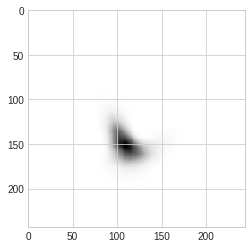

In [26]:
plt.imshow(predictions[1,-1].squeeze(0).detach().cpu())
plt.show()

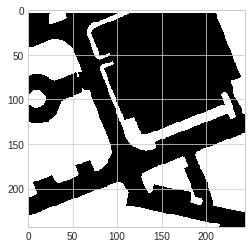

In [25]:
plt.imshow(mask[1].view(244,244).detach().cpu())
plt.show()

In [9]:

self=trainer.model.decoder


In [ ]:
# test_feat=op.view(op.shape[0],op.shape[1],-1).permute(0,2,1)
torch.cuda.empty_cache()
inputs=agg_feat


In [11]:
if type(inputs) is torch.Tensor:
    agg_encoding = inputs
else:
    agg_encoding = inputs['agg_encoding']
    if 'under_sampled_mask' in inputs:
        mask=inputs['under_sampled_mask'].to(agg_encoding.device)
    else:
        mask=None
if self.output_traj:
    target_encodings = inputs['target_encodings']
context_encoding = agg_encoding + self.pos_enc(agg_encoding)

In [12]:
torch.cuda.empty_cache()
context_encoding = context_encoding.view(context_encoding.shape[0], context_encoding.shape[1], -1)
feature = context_encoding.permute(0, 2, 1).unsqueeze(1).repeat(1,self.horizon,1,1)
x=self.decoding_net(feature).view(feature.shape[0],self.horizon,self.H,self.W)
torch.cuda.empty_cache()
predictions=self.sigmoid(x)

In [ ]:
inputs = agg_feat
if type(inputs) is torch.Tensor:
    agg_encoding = inputs
else:
    agg_encoding = inputs['agg_encoding']
    if 'under_sampled_mask' in inputs:
        mask=inputs['under_sampled_mask']
    else:
        mask=None
if self.output_traj:
    target_encodings = inputs['target_encodings']
time_querys=torch.cat((self.querys_embedder(self.time_steps),self.time_steps),dim=-1).repeat(agg_encoding.shape[0],1,1).unsqueeze(2)

In [9]:
predictions.keys()

dict_keys(['pred', 'mask', 'traj', 'probs', 'endpoints'])

In [11]:
sum=predictions['pred'].flatten(1).mean(dim=-1)
sum

torch.Size([16, 1, 968, 968])

In [10]:
predictions['pred'].shape

torch.Size([16, 1, 242, 242])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


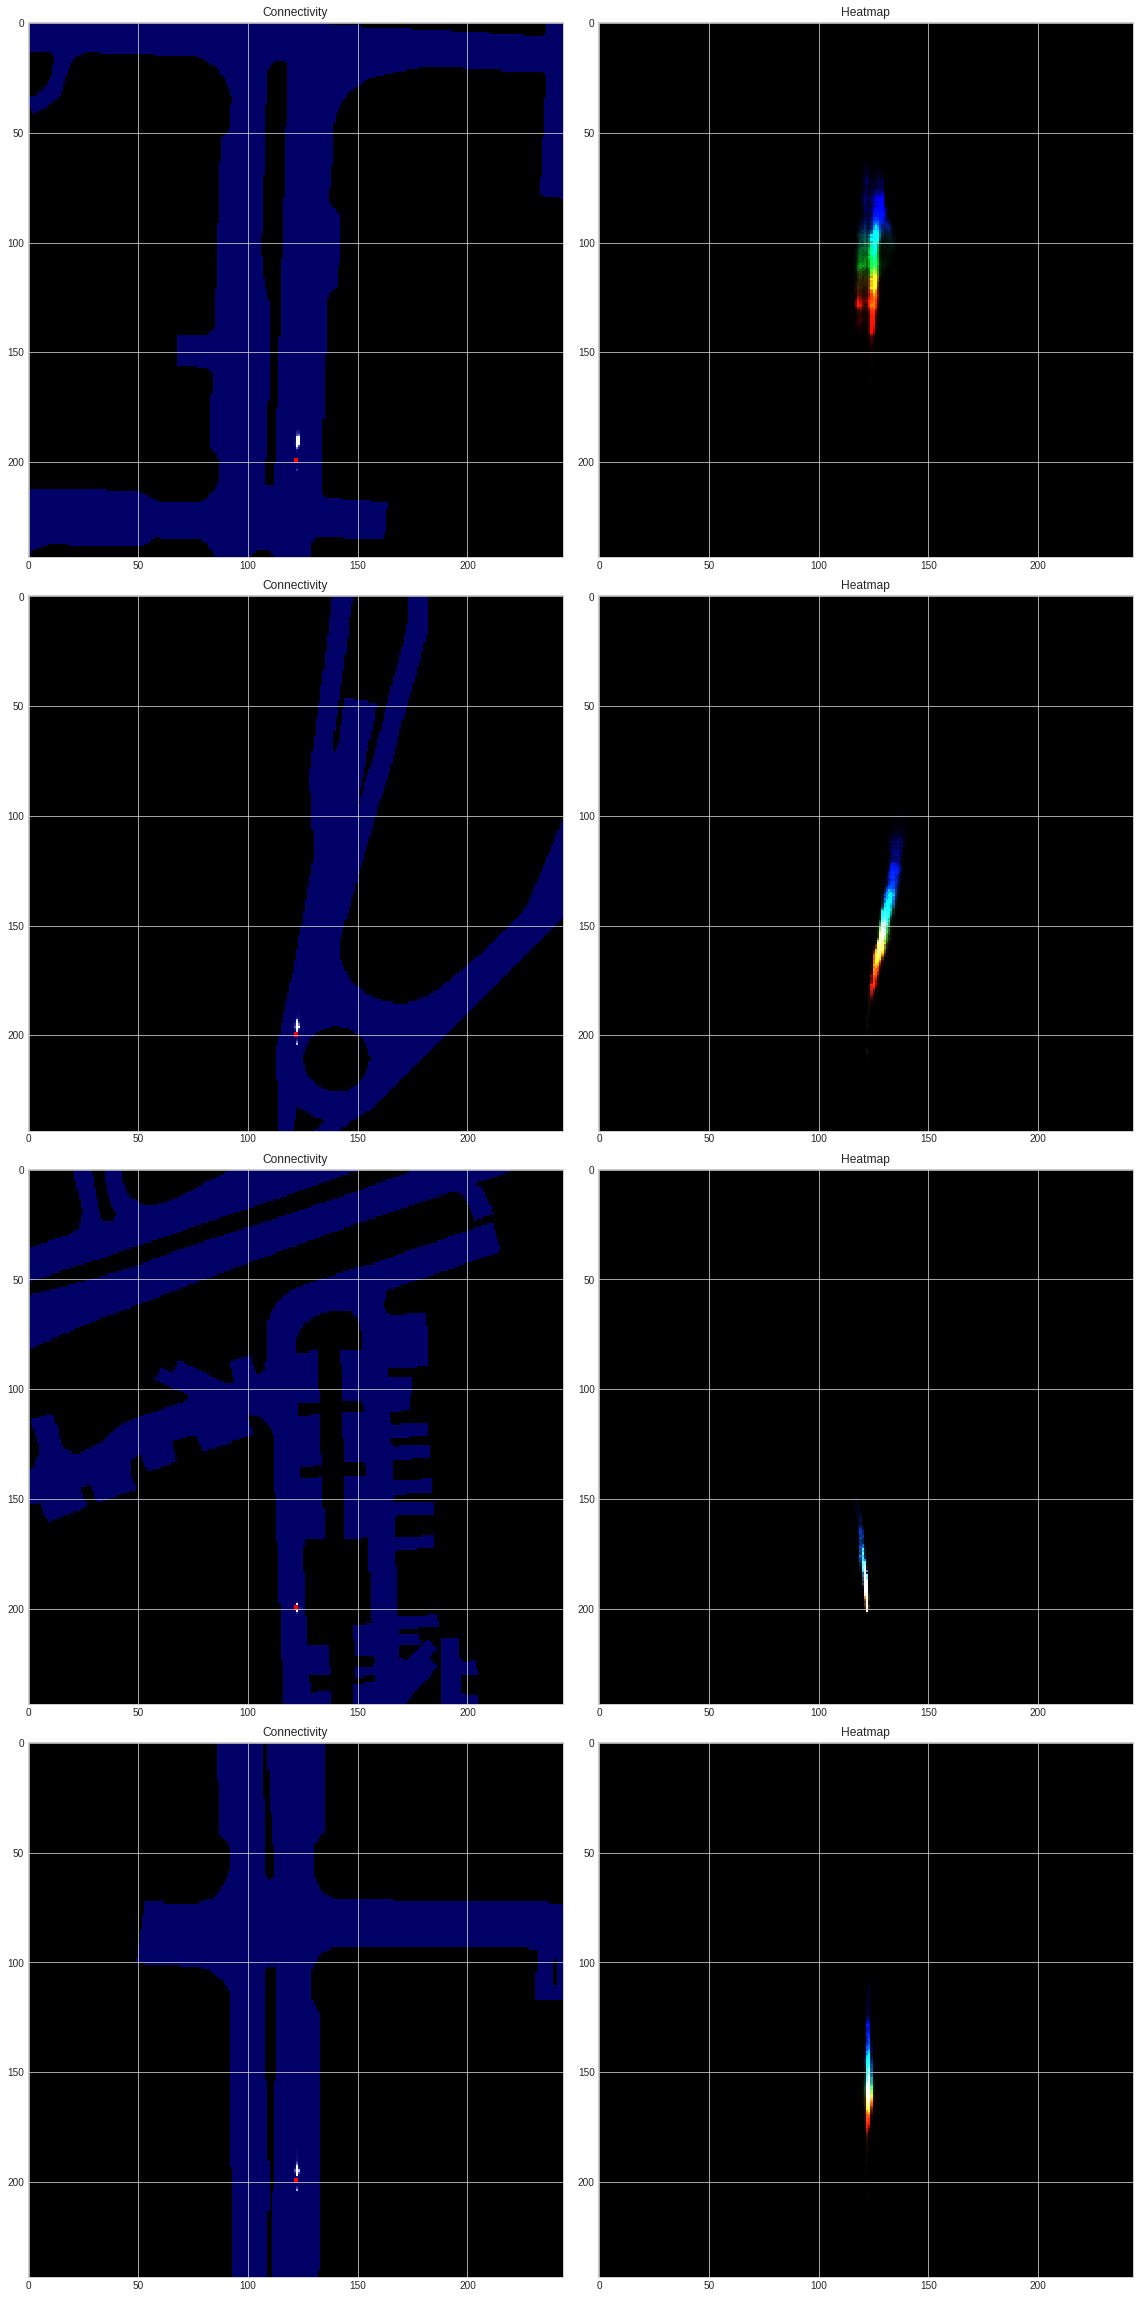

In [11]:
from models.decoders.ram_decoder import get_index,get_dense
self=trainer.model.aggregator
def get_heatmap(predictions,mask):
    if self.agg_type=='global':
        nodes_2D=get_index(predictions['pred'],mask)
        dense_pred=get_dense(predictions['pred'],nodes_2D,self.H,self.W).squeeze(1).clone().detach()
    else:
        dense_pred=predictions['pred'].clone().detach()
    heatmap=torch.cat((dense_pred[:,-5].unsqueeze(1),dense_pred[:,-3].unsqueeze(1),dense_pred[:,-1].unsqueeze(1)),dim=1)
    return heatmap.permute(0,2,3,1).cpu()
def visualize_connectivity(point,connectivity,mask,predictions):
    max_num=max(mask.sum(dim=1))
    init_pos=torch.zeros([self.H,self.W]).to(connectivity.device)
    init_pos[point[0],point[1]]=1
    state=init_pos.view(-1)
    fig, ax = plt.subplots(mask.shape[0], 2, figsize=(16, 8*mask.shape[0]))
    fig.tight_layout()
    if self.agg_type=='global':
        graphs=torch.empty([0,1,max_num]).to(connectivity.device)
        for i in range(mask.shape[0]):
            print(mask.view(mask.shape[0],self.H,self.W)[i,point[0],point[1]])
            reduced_state=((init_pos.view(-1))[mask[i]]).to_sparse()
            aug_state=torch.cat((reduced_state, torch.sparse_coo_tensor(torch.empty([1,0]), [], [max_num - reduced_state.size(0),]).to(connectivity.device)), 0).unsqueeze(0)
            reduced_graph=(aug_state.to_dense()@connectivity[i]).unsqueeze(1)
            graphs=torch.cat((graphs,reduced_graph),dim=0)
        nodes_2D=get_index(graphs,mask)
        dense_pred=get_dense(graphs,nodes_2D,self.H,self.W).squeeze(1).clone().detach().unsqueeze(1)
    else:
        init_states=init_pos.repeat(mask.shape[0],1,1).view(mask.shape[0],-1).unsqueeze(-1)
        fold=nn.Fold(output_size=(self.H, self.W), kernel_size=(self.conv_kernel, self.conv_kernel), padding=self.conv_kernel//2, dilation=1, stride=(1, 1))
        unfolded_map=(init_states*connectivity).transpose(-1,-2)
        dense_pred=torch.cat((fold(unfolded_map)[:,:,5:],torch.zeros([mask.shape[0],1,5,self.W],device=mask.device)),dim=2).clone().detach()
    # mask_map=dense_pred.clone()
    # mask_map[mask.view(dense_pred.shape)]=0.01
    # dense_pred+=mask_map
    # print(dense_pred.shape)
    dense_pred=dense_pred.repeat(1,3,1,1)
    dense_pred*=128
    dense_pred[:,2][mask.view(mask.shape[0],self.H,self.W)]+=0.4
    dense_pred[:,1:,point[0]-1:point[0]+1,point[1]-1:point[1]+1]=0
    dense_pred[:,0,point[0]-1:point[0]+1,point[1]-1:point[1]+1]=255
    
    dense_pred=dense_pred.permute(0,2,3,1)
    last_steps=get_heatmap(predictions,mask)*255
    # last_steps[:,1:,point[0]-1:point[0]+1,point[1]-1:point[1]+1]=0
    # last_steps[:,0,point[0]-1:point[0]+1,point[1]-1:point[1]+1]=600
    # print(last_steps.shape)
    # print(dense_pred)
    for i in range(mask.shape[0]):
        # print(dense_pred[i].shape)

        ax[i, 0].imshow(dense_pred[i].cpu())
        ax[i, 0].set_title('Connectivity')
        ax[i, 1].imshow(last_steps[i])
        ax[i, 1].set_title('Heatmap')

    
visualize_connectivity(self.compensation,agg_feat['node_connectivity'],agg_feat['under_sampled_mask'],predictions)

In [10]:
inputs= agg_feat
self=trainer.model.decoder
attn_output_weights = inputs['node_connectivity']
init_states=inputs['initial_states']

if 'under_sampled_mask' in inputs:
    mask=inputs['under_sampled_mask']
else:
    mask=None
if self.output_traj:
    target_encodings = inputs['target_encodings']
    map_feature=inputs['feature'].permute(0,2,3,1)

In [12]:
torch.cuda.empty_cache()
predictions=torch.empty([init_states.shape[0],0,init_states.shape[-1]],device=attn_output_weights.device)
prev_states=init_states.unsqueeze(1).to_dense()
for step in range(self.horizon):
    predictions=torch.cat((predictions,torch.bmm(prev_states,attn_output_weights)),dim=1)
    prev_states=predictions[:,step].unsqueeze(1)

In [14]:
from models.decoders.ram_decoder import get_dense,get_index
nodes_2D=get_index(predictions[:,-1].unsqueeze(1),mask,self.H,self.W)
dense_pred=get_dense(predictions[:,-1].unsqueeze(1),nodes_2D,self.H,self.W)

In [ ]:
traj_idx=0
idx=5
import matplotlib.pyplot as plt
gt_map=predictions['pred'][:,-1].detach()
mask_map=gt_map.clone()
mask_map[predictions['mask'].view(gt_map.shape)]=0.005
gt_map+=mask_map
plt.imshow(gt_map[idx].squeeze(0).cpu())
plt.show()


In [ ]:
# print(predictions['pred'].shape)
normalized_pred=predictions['pred']/(torch.max(predictions['pred'].detach(),dim=-1,keepdim=True)[0])
print(torch.max(predictions['pred'],dim=-1,keepdim=True)[0])
print(torch.max(normalized_pred,dim=-1,keepdim=True)[0])

In [60]:
focal=trainer.losses[0]
focal.horizon=12

In [ ]:
traj_idx=0
idx=0
import matplotlib.pyplot as plt
from models.decoders.ram_decoder import get_index,get_dense
gt_map=trainer.losses[0].generate_gtmap(predictions['traj'][:,traj_idx].view(predictions['traj'].shape[0],-1,predictions['traj'].shape[-1]).clone().detach(),predictions['mask'],visualize=True)
gt_map=torch.clamp(torch.sum(gt_map,dim=1,keepdim=True),0.0,1.0)
mask_map=gt_map.clone()
mask_map[predictions['mask'].view(gt_map.shape)]=0.005
gt_map+=mask_map
gt_map=gt_map.repeat(1,3,1,1)
gt_map*=127
endpoints=predictions['endpoints']
for batch in range(gt_map.shape[0]):
    for i,point in enumerate(endpoints[batch]):
        if i== traj_idx:
            x,y=point
            gt_map[batch,-1,max(0,x-2):min(x+3,trainer.losses[0].H),max(0,y-2):min(trainer.losses[0].W,y+3)]=255
            gt_map[batch,:-1,max(0,x-2):min(x+3,trainer.losses[0].H),max(0,y-2):min(trainer.losses[0].W,y+3)]=0
        else:
            x,y=point
            gt_map[batch,0,max(0,x-1):min(x+1,trainer.losses[0].H),max(0,y-1):min(trainer.losses[0].W,y+1)]=255
            gt_map[batch,1:,max(0,x-1):min(x+3,trainer.losses[0].H),max(0,y-1):min(trainer.losses[0].W,y+1)]=0

gt_map=gt_map.permute(0,2,3,1)
# normalize_factor,_=torch.max(dense_pred.view(dense_pred.shape[0],-1),dim=-1)
plt.imshow(gt_map[idx].cpu())
plt.show()
# plt.imshow(mask[idx])
# plt.show()
# gt_map.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


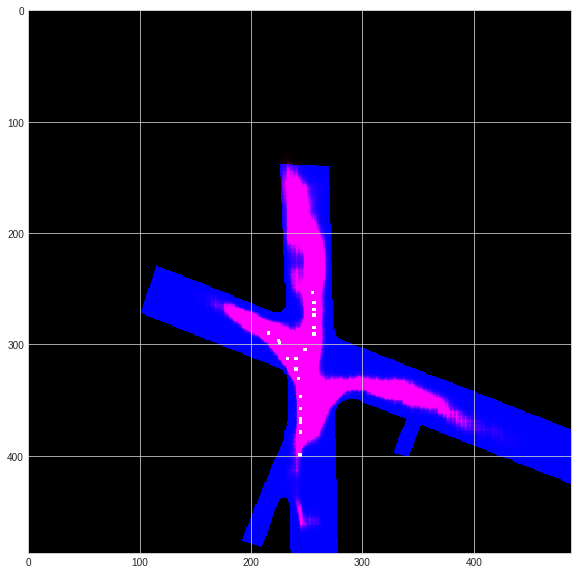

In [17]:
idx=1
fde_sampler=trainer.model.decoder.endpoint_sampler
endpoints,_ = fde_sampler(predictions['pred'])
endpoints=endpoints.long()
mask_map=predictions['mask'].unsqueeze(1).clone().detach().float()
prob=predictions['pred'][:,-1].clone().detach().unsqueeze(1)*255
heatmap=torch.cat((prob,torch.zeros_like(prob),mask_map*10),dim=1)
origin=torch.round(trainer.losses[0].compensation).int()
heatmap[:,:,origin[0]-2:origin[0]+2,origin[1]-2:origin[1]+2]=20
for point in endpoints[idx]:
    heatmap[:,:,point[0]-1:point[0]+2,point[1]-1:point[1]+2]=60
plt.figure(figsize = (10,10))
plt.imshow(heatmap[idx].permute(1,2,0).cpu())
plt.show()

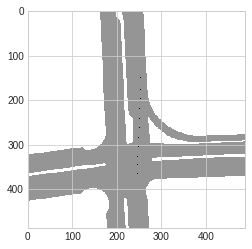

In [24]:
idx=0
# traj_idx=0
import matplotlib.pyplot as plt
from models.decoders.ram_decoder import get_index,get_dense
gt_map=trainer.losses[0].generate_gtmap(data['ground_truth']['traj'],predictions['mask'],visualize=True)
gt_map=torch.sum(gt_map,dim=1,keepdim=True)
mask_map=torch.zeros_like(gt_map)
mask_map[predictions['mask'].view(gt_map.shape)]=1
gt_map+=mask_map
# gt_map=gt_map.permute(0,2,3,1)
# normalize_factor,_=torch.max(dense_pred.view(dense_pred.shape[0],-1),dim=-1)
plt.imshow(gt_map[idx].squeeze(0).cpu())
plt.show()

In [15]:
self=trainer.model.decoder
trajs=predictions['traj']
heatmaps=predictions['pred']
mask=agg_feat['under_sampled_mask']
shape=[mask.shape[0],self.horizon,self.H,self.W]
swapped=torch.zeros_like(trajs)
swapped[:,:,:,0],swapped[:,:,:,1]=-trajs[:,:,:,1],trajs[:,:,:,0]
coord=torch.round(swapped/self.resolution+self.compensation.to(swapped.device))
coord=torch.clamp(coord,0,shape[-1]).long()
coord.device


device(type='cuda', index=0)

In [16]:
horizon=coord.shape[-2]
B=coord.shape[0]
x_coord,y_coord=torch.meshgrid(torch.arange(B,device=coord.device), 
                            torch.arange(horizon,device=coord.device))
indices_front=torch.cat([x_coord.unsqueeze(-1),y_coord.unsqueeze(-1)],dim=-1).long().unsqueeze(1).repeat(1,coord.shape[1],1,1)

# indices=torch.cat((indices_front,coord),dim=-1)
indices_front.device

device(type='cuda', index=0)

In [14]:
indices=torch.cat((indices_front,coord),dim=-1).long()
indices.device

device(type='cpu')

In [17]:
from models.decoders.ram_decoder import get_dense,get_index
nodes_2D=get_index(heatmaps,mask,self.H,self.W)
dense_pred=get_dense(heatmaps,nodes_2D,self.H,self.W)
# dense_pred.device
dense_pred.device

device(type='cuda', index=0)

In [ ]:
ind0=indices.view(-1,4)[:,0]
ind1=indices.view(-1,4)[:,1]
ind2=indices.view(-1,4)[:,2]
ind3=indices.view(-1,4)[:,3]
ind1


In [31]:
probs=dense_pred[ind0,ind1,ind2,ind3].view(B,coord.shape[1],horizon).sum(-1)

In [35]:
probs.sort(descending=True)

torch.return_types.sort(
values=tensor([[1.0372, 0.8492, 0.7616, 0.6335, 0.6223, 0.4670, 0.4462, 0.3702, 0.3455,
         0.3272, 0.3265, 0.3232, 0.2768, 0.2766, 0.2643, 0.2563, 0.2272, 0.2249,
         0.2210, 0.2205],
        [0.3282, 0.1116, 0.0635, 0.0494, 0.0465, 0.0298, 0.0283, 0.0281, 0.0262,
         0.0219, 0.0206, 0.0192, 0.0190, 0.0183, 0.0181, 0.0170, 0.0163, 0.0162,
         0.0159, 0.0148]], grad_fn=<SortBackward>),
indices=tensor([[ 5,  4,  6,  2,  0, 12,  1, 10,  9, 13,  3, 16, 11,  7, 17,  8, 18, 19,
         14, 15],
        [ 2,  0,  1,  4, 15, 13,  9,  6,  3, 17,  7, 19,  5,  8, 10, 11, 12, 14,
         18, 16]]))

In [10]:
predictions['yaw'].shape

torch.Size([32, 34, 1])

In [25]:
encodings['target_agent_encoding'].keys()

dict_keys(['hist', 'future', 'time_query', 'map_info'])

In [9]:
predictions['init_yaw'].shape

torch.Size([64, 34, 1])

In [11]:

with profile( profile_memory=True, record_shapes=True, use_cuda=True) as prof:
   focal=trainer.losses[0]
   # loss=focal.compute({'pred':predictions,'mask':mask_map},gt_test)
   loss_val=focal.compute(predictions,gt_test)
   
   for loss in trainer.losses[1:]:
      print(loss_val.item())
      loss_val+=loss.compute(predictions,gt_test)
   # loss+=trainer.losses[2].compute(predictions,gt_test)
print(prof.key_averages().table(sort_by="cuda_time", row_limit=10))

8.310708999633789
8.885429382324219
17.143224716186523
17.652690887451172
25.871963500976562
26.397663116455078
40.59269714355469
-----------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-----------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
             aten::index_put_         0.73%     431.657us        28.18%      16.599ms       2.075ms     110.596us         0.19%      11.406ms       1.426ms           0 b           0 b 

In [15]:
loss_val

tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)

In [14]:
ade=trainer.losses[1]
loss=ade.compute(predictions,gt_test)

In [20]:
from math import exp
window_size=9
gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*1.5**2)) for x in range(window_size)])
gauss

tensor([0.0286, 0.1353, 0.4111, 0.8007, 1.0000, 0.8007, 0.4111, 0.1353, 0.0286])

In [26]:
ade.compute(predictions,gt_test)

tensor(39.9779, device='cuda:0', grad_fn=<MeanBackward0>)

In [12]:
torch.cuda.empty_cache()

In [12]:
torch.cuda.empty_cache()
with profile( profile_memory=True, record_shapes=True, use_cuda=True) as prof:
   loss_val.backward()
print(prof.key_averages().table(sort_by="cuda_time", row_limit=10))

--------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                        Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
--------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                            CudnnRnnBackward         0.18%     874.064us        10.24%      51.041ms       5.671ms     720.914us         0.14%      50.930ms       5.659ms           0 b           0 b       7.39 Mb    -799.50 Kb             9  
                   aten::_

In [15]:
total_norm=0
for p in trainer.model.encoder.parameters():
    try:
        # print(p.shape)
        param_norm = p.grad.data.norm(2)
        if torch.isnan(param_norm):
            print(p.grad.data.shape)
    except:
        print('param_not_used')
        # raise NotImplementedError()
    total_norm += param_norm.item() ** 2
total_norm = total_norm ** (1. / 2)

param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used
param_not_used


In [33]:
predictions['mask'].sum(-1)


tensor([3181, 4249, 4796, 3145], device='cuda:0')

In [34]:
inputs = agg_feat
attn_output_weights = inputs['node_connectivity']
init_states=inputs['initial_states']


mask=inputs['under_sampled_mask']
target_encodings = inputs['target_encodings']
map_feature=inputs['feature'].permute(0,2,3,1)

In [35]:
torch.cuda.empty_cache()
predictions=torch.empty([init_states.shape[0],0,init_states.shape[-1]],device=attn_output_weights.device)
prev_states=init_states.unsqueeze(1).to_dense()

for step in range(12):
    predictions=torch.cat((predictions,torch.bmm(prev_states,attn_output_weights)),dim=1)
    prev_states=predictions[:,step].unsqueeze(1)

torch.cuda.empty_cache()

In [36]:
map_extent= [-61, 61, -22, 100]
from models.decoders.ram_decoder import get_dense,get_index
nodes_2D=get_index(predictions[:,-1].unsqueeze(1),mask)
dense_pred=get_dense(predictions[:,-1].unsqueeze(1),nodes_2D,122,122)
endpoints,confidences = trainer.model.decoder.endpoint_sampler(dense_pred)
endpoints=endpoints.long()
concat_feature=torch.empty([0,12,90],device=attn_output_weights.device)
x_coord,y_coord=torch.meshgrid(torch.arange(map_extent[-1],map_extent[-2],-1), ##### SHould be changed when image size changes
                                torch.arange(map_extent[0],map_extent[1],1))
indices=torch.cat([x_coord.unsqueeze(-1),y_coord.unsqueeze(-1)],dim=-1).to(attn_output_weights.device)
for batch_idx in range(len(dense_pred)):
    map_feat = (map_feature[batch_idx])[endpoints[batch_idx,:,0],endpoints[batch_idx,:,1]]
    diff = indices[endpoints[batch_idx,:,0],endpoints[batch_idx,:,1]].float()

    feature=torch.cat([map_feat,trainer.model.decoder.diff_encoder(diff),target_encodings[batch_idx].repeat(trainer.model.decoder.endpoint_sampler._n_targets,1)],dim=-1).unsqueeze(0)
    concat_feature=torch.cat([concat_feature,feature],dim=0)

In [ ]:
print(torch.cuda.memory_summary(0))

In [ ]:
pred=predictions['pred']
mask=predictions['mask']
traj_gt = gt_test['traj']

In [ ]:
import torch.nn.functional as F
with profile( profile_memory=True, record_shapes=True) as prof:
    swapped=torch.zeros_like(traj_gt).to(pred.device)
    swapped[:,:,0],swapped[:,:,1]=-traj_gt[:,:,1],traj_gt[:,:,0]
    coord=torch.round(swapped/trainer.losses[0].resolution+trainer.losses[0].compensation).int()
    coord=torch.clamp(coord,0,122)
    gt_map=torch.zeros([6,12,122,122],device=pred.device)
    for batch in range(6):
        for t in range(12):
            x,y=coord[batch,t]
            gt_map[batch,t,x,y]=1##Only one ground truth in each heatmap layer
    gs_map=F.conv2d(gt_map, trainer.losses[0].window, padding = trainer.losses[0].window_size//2, groups = trainer.losses[0].horizon)
print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))

In [ ]:
with profile( profile_memory=True, record_shapes=True) as prof:
    loss_mask = (reduced_gts == 1).float()
    pred_heatmap = torch.clamp(pred, min=1e-4)
print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))

In [ ]:
with profile( profile_memory=True, record_shapes=True) as prof:
    loss=-torch.sum(
                    torch.pow(pred_heatmap - reduced_maps, 2) * (
                    loss_mask * torch.log(pred_heatmap)
                    +
                    (1-loss_mask) * (torch.pow(1 - reduced_maps, 4) * torch.log(1 - pred_heatmap))
                )
            )
    loss.backward()
print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))

In [ ]:
torch.cuda.empty_cache()
with profile( profile_memory=True, record_shapes=True) as prof:
    trainer.optimizer.step()
print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))


In [ ]:
with profile( profile_memory=True, record_shapes=True) as prof:
    gs_map=gs_map.view([6,12,-1])
    gt_map=gt_map.view([6,12,-1])
    max_num=max(mask.sum(dim=1))
    reduced_maps=[]
    reduced_gts=[]
    for i,batch in enumerate(gs_map):
        reduced_map=batch[mask[i].repeat(12,1)].view(12,-1)
        reduced_gt=gt_map[i][mask[i].repeat(12,1)].view(12,-1)
        aug_map=torch.cat((reduced_map, torch.zeros(12,max_num - reduced_map.size(1),device=pred.device)), -1)
        aug_gt=torch.cat((reduced_gt, torch.zeros(12,max_num - reduced_map.size(1),device=pred.device)), -1)
        reduced_maps.append(aug_map.unsqueeze(0))
        reduced_gts.append(aug_gt.unsqueeze(0))
    reduced_maps=torch.cat(reduced_maps,dim=0).to(pred.device)
    reduced_gts=torch.cat(reduced_gts,dim=0).to(pred.device)
print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))

In [ ]:
reduced_gts.sum()

In [ ]:
def get_index(pred,mask):
    x_coord,y_coord=torch.meshgrid(torch.arange(0,122,1),
                                torch.arange(0,122,1))
    nodes_candidates=torch.cat((x_coord.unsqueeze(0),y_coord.unsqueeze(0)),dim=0).view(2,-1).T
    nodes_2D=torch.zeros([mask.shape[0],pred.shape[-1],2])
    for i in range(mask.shape[0]):
        nodes_batch=nodes_candidates[mask[i]]
        nodes_2D[i,:nodes_batch.shape[0]]=nodes_batch
    return nodes_2D.int().permute(0,2,1).to(pred.device)
nodes_2D=get_index(pred,mask)
nodes_2D.shape

In [ ]:
def get_dense(pred,nodes_2D,H,W):
    dense_rep=torch.empty(0,pred.shape[1],H,W,device=pred.device)
    for batch in range(pred.shape[0]):
        batch_heatmap=torch.empty(0,H,W,device=pred.device)
        for step in range(pred.shape[1]):
            heatmap=torch.sparse_coo_tensor(nodes_2D[batch],pred[batch,step],(122,122))
            batch_heatmap=torch.cat((batch_heatmap,heatmap.to_dense().unsqueeze(0)),dim=0)
        dense_rep=torch.cat((dense_rep,batch_heatmap.unsqueeze(0)),dim=0)
    return dense_rep
dense_rep=get_dense(pred,nodes_2D,122,122)

In [ ]:
predictions['probs']=predictions['prob']

In [22]:


with profile( profile_memory=True, record_shapes=True) as prof:

# loss=pred.sum()
    loss=focal.compute(predictions,gt_test)
    loss+=ade.compute(predictions,gt_test)
    loss.backward()
print(prof.key_averages().table(sort_by="self_cuda_memory_usage", row_limit=10))

NameError: name 'focal' is not defined

In [ ]:
trainer.model.aggregator

In [ ]:
pred = predictions['pred']
mask_da = predictions['mask'].view(-1,pred.shape[-2],pred.shape[-1]).unsqueeze(1)
ground_truth = gt_test
traj_gt = ground_truth['traj'] if type(ground_truth) == dict else ground_truth
true_heatmap,gs_map = focal.generate_gtmap(traj_gt,pred.shape)
gs_map=gs_map*mask_da
mask = (true_heatmap == 1).float()
pred_heatmap = torch.clamp(pred, min=1e-4)

In [ ]:
pred = predictions['pred']
mask = predictions['mask'].view(-1,pred.shape[-2],pred.shape[-1]).unsqueeze(1)
non_drivable_area_mask=~mask

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(non_drivable_area_mask[0,0].cpu())
plt.show()
plt.imshow(torch.zeros_like(non_drivable_area_mask[0,0].cpu()))
plt.show()

In [ ]:
from nuscenes.prediction import PredictHelper
from nuscenes.prediction.input_representation.static_layers import StaticLayerRasterizer
from nuscenes.nuscenes import NuScenes
map_extent=[ -50, 50, -20, 80 ]
img_size=[400,400]
resolution = (map_extent[1] - map_extent[0]) /  img_size[1]
nusc = NuScenes(version='v1.0-trainval', dataroot="/home/stanliu/data/mnt/nuScenes/", verbose=True)
helper=PredictHelper(nusc)
map_rasterizer = StaticLayerRasterizer(helper,
                                        resolution=resolution,
                                        meters_ahead=map_extent[3],
                                        meters_behind=-map_extent[2],
                                        meters_left=-map_extent[0],
                                        meters_right=map_extent[1])

In [ ]:
import torch
target_agent_representation = data_test['target_agent_representation']
surrounding_agent_representation = data_test['surrounding_agent_representation']
map_representation = data_test['map_representation'][0]
mask= data_test['map_representation'][1].type(torch.bool)
mask.shape

In [ ]:
idx=10
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(mask[idx]))
plt.show()
plt.imshow(np.array(map_representation[idx]).transpose(1,2,0))

In [ ]:
from models.encoders.raster_encoder import *
encoder=RasterEncoder(cfg['encoder_args'])
# encodings=encoder.forward(data_test)

In [ ]:
encodings['context_encoding']["combined"].shape

In [ ]:
test_tensor=torch.randn([32,20,100,100])
test_walker=LocalWalk(radius=0.2)
test_walker.forward(test_tensor,test_tensor).shape

In [ ]:
from models.library.RasterSampler import *
sampler=Sampler(cfg['train_set_args'],1)

In [ ]:
fake_mask=torch.randn([32,488,488]).ge(0)
nodes_2D=sampler.sample_goals().repeat(32,1,1).type(torch.float32)
mask_under=(sampler.sample_mask(mask))
attn_mask=~mask_under.unsqueeze(-1).repeat(2,1,256)
print(attn_mask.shape)
print(mask.shape)
print(nodes_2D.shape)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np.array(mask[0]))
plt.show()
plt.imshow(np.array(~mask_under[0].view(122,122)))
plt.show()

In [6]:
with open("configs/preprocess_nuscenes_occ.yml", 'r') as yaml_file:
    cfg = yaml.safe_load(yaml_file)

In [8]:
from datasets.nuScenes.nuScenes_graphs_occ import NuScenesGraphs_OCC
from nuscenes.nuscenes import NuScenes
nusc = NuScenes(version='v1.0-trainval', dataroot="/home/stanliu/data/mnt/nuScenes/", verbose=True)


Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 47.758 seconds.
Reverse indexing ...
Done reverse indexing in 13.2 seconds.


In [10]:
from datasets.nuScenes.prediction import PredictHelper_occ
helper=PredictHelper_occ(nusc)
graph_extractor=NuScenesGraphs_OCC('compute_stats','preprocess_graph_rot_test',cfg['train_set_args'],helper)

6.0
19.5


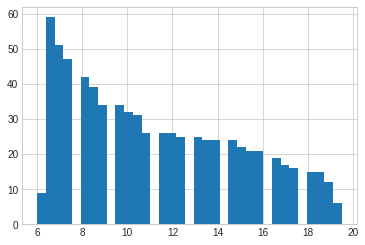

In [54]:
self=graph_extractor
future_lengths=[]
for idx,token in enumerate(self.token_list):
    future_lengths.append(len(self.get_target_agent_future(idx))*0.5)
plt.hist(future_lengths,bins=35)
print(min(future_lengths))
print(max(future_lengths))

1.5
16.0


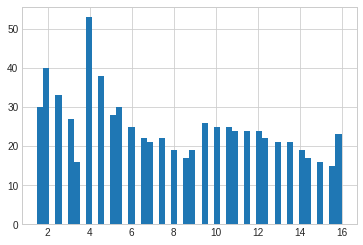

In [6]:
plt.hist(graph_extractor.time_lengths,bins=50)
print(min(graph_extractor.time_lengths))
print(max(graph_extractor.time_lengths))

In [1]:
import numpy as np
from pyquaternion import Quaternion
from nuscenes.eval.common.utils import quaternion_yaw, angle_diff
from nuscenes.prediction.input_representation.static_layers import correct_yaw
def get_surrounding_agent_representation(self, idx: int, time: float):
        """
        Extracts surrounding agent representation
        :param idx: data index
        :return: ndarrays with surrounding pedestrian and vehicle track histories and masks for non-existent agents
        """

        # Get vehicles and pedestrian histories for current sample
        
        vehicles = self.get_agents_of_type(idx, 'vehicle', time)
        pedestrians = self.get_agents_of_type(idx, 'human', time)

        # Discard poses outside map extent
        vehicles = self.discard_poses_outside_extent(vehicles)
        pedestrians = self.discard_poses_outside_extent(pedestrians)
        return vehicles,pedestrians
        # While running the dataset class in 'compute_stats' mode:
        if self.mode == 'compute_stats':
            return len(vehicles), len(pedestrians)

        # Convert to fixed size arrays for batching
        if self.use_home:
            vehicles = self.list_to_tensor(vehicles, self.max_vehicles, int(self.t_h * 2 + 1), 5,True)
            pedestrians = self.list_to_tensor(pedestrians, self.max_pedestrians, int(self.t_h * 2 + 1), 5,True)

            surrounding_agent_representation = {
                'vehicles': vehicles,
                'pedestrians': pedestrians
            }
        else:
            vehicles, vehicle_masks = self.list_to_tensor(vehicles, self.max_vehicles, int(self.t_f * 2 + 1), 4,False)
            pedestrians, pedestrian_masks = self.list_to_tensor(pedestrians, self.max_pedestrians, int(self.t_f * 2 + 1), 4,False)

            surrounding_agent_representation = {
                'vehicles': vehicles,
                'vehicle_masks': vehicle_masks,
                'pedestrians': pedestrians,
                'pedestrian_masks': pedestrian_masks
            }
        if self.use_raster:
            i_t, s_t = self.token_list[idx].split("_")
            img = self.agent_rasterizer.make_representation(i_t, s_t)
            img = np.moveaxis(img, -1, 0)
            img = img.astype(float) / 255
            surrounding_agent_representation['image']=img

        return surrounding_agent_representation

In [71]:
def get_target_agent_representation(self, idx: int, time: float) :
    """
    Extracts target agent representation
    :param idx: data index
    :return hist: track history for target agent, shape: [t_h * 2, 5]
    """
    i_t, s_t = self.token_list[idx].split("_")

    # x, y co-ordinates in agent's frame of reference
    coords,global_yaw,time_past = self.helper.get_past_for_agent(i_t, s_t, seconds=self.t_h, in_agent_frame=False,add_yaw_and_time=True)
    origin = self.get_target_agent_global_pose(idx)
    past_hist=np.zeros([1,4])
    for xy,r,t in zip(coords,global_yaw,time_past):
        local_pose = self.global_to_local(origin, (xy[0], xy[1], quaternion_yaw(Quaternion(r))))
        past_hist=np.concatenate((past_hist,np.asarray([local_pose.__add__((t,))])),0)
    # Zero pad for track histories shorter than t_h
    hist=[past_hist[::-1]]
    
    # Get future information
    coords_fut,global_yaw_fut,time_fut = self.helper.get_future_for_agent(i_t, s_t, seconds=self.t_h+time, in_agent_frame=False,add_yaw_and_time=True)
    sep_idx= np.searchsorted(time_fut, time-0.1)
    future_rec=np.empty([0,4])
    for xy,r,t in zip(coords_fut[sep_idx:],global_yaw_fut[sep_idx:],time_fut[sep_idx:]):
        local_pose = self.global_to_local(origin, (xy[0], xy[1], quaternion_yaw(Quaternion(r))))
        future_rec=np.concatenate((future_rec,np.asarray([local_pose.__add__((t,))])),0)
    future=[future_rec[::-1]]
    
    gt_poses=np.empty([0,3])
    time_query=[]
    for xy,r,t in zip(coords_fut[:sep_idx],global_yaw_fut[:sep_idx],time_fut[:sep_idx]):
        local_pose = np.asarray([self.global_to_local(origin, (xy[0], xy[1], quaternion_yaw(Quaternion(r))))])
        gt_poses= np.concatenate((gt_poses,local_pose),0)
        time_query.append([np.array([t,t/time])])
    time_query=np.concatenate(time_query,axis=0)
    hist, hist_masks = self.list_to_tensor(hist, 1, self.t_h * 2 + 1, 4,False)
    future, future_masks = self.list_to_tensor(future, 1, self.t_h * 2 + 1, 4,False)
    # gt_traj=np.flip(gt_coords,0)
    history={'traj':np.squeeze(hist,0),'mask':np.squeeze(hist_masks,0)}
    future={'traj':np.squeeze(future,0),'mask':np.squeeze(future_masks,0)}
    target_representation={'history':history,'future':future,'time_query':time_query}
    return target_representation,gt_poses

In [5]:
data,ground_truth=graph_extractor.get_inputs(0)

In [10]:
data['map_representation'].keys()

dict_keys(['lane_node_feats', 'lane_node_masks', 's_next', 'edge_type', 'lane_ctrs'])

In [39]:
idx=0
i_t, s_t = graph_extractor.token_list[idx].split("_")
map_name = graph_extractor.helper.get_map_name_from_sample_token(s_t)
map_api = graph_extractor.maps[map_name]

# Get agent representation in global co-ordinates
global_pose = graph_extractor.get_target_agent_global_pose(idx)

# Get lanes around agent within map_extent
lanes = graph_extractor.get_lanes_around_agent(global_pose, map_api)

# Get relevant polygon layers from the map_api
polygons = graph_extractor.get_polygons_around_agent(global_pose, map_api)

# Get vectorized representation of lanes
lane_node_feats, lane_ids = graph_extractor.get_lane_node_feats(global_pose, lanes, polygons)


In [43]:
len(lane_node_feats)

95

In [42]:
lane_node_feats, lane_ids = graph_extractor.discard_poses_outside_extent(lane_node_feats, lane_ids)

In [30]:
e_succ = graph_extractor.get_successor_edges(lane_ids, map_api)
e_prox = graph_extractor.get_proximal_edges(lane_node_feats, e_succ)

In [50]:
lane_node_feats = graph_extractor.add_boundary_flag(e_succ, lane_node_feats)
lane_node_feats[0].shape

(6, 6)

In [36]:

num_nbrs = [len(e_succ[i]) + len(e_prox[i]) for i in range(len(e_succ))]
max_nbrs = max(num_nbrs) if len(num_nbrs) > 0 else 0
num_nodes = len(lane_node_feats)


In [37]:
print('num_nbrs',(num_nbrs))
print('max_nbrs',max_nbrs)
print('num_nodes',num_nodes)

num_nbrs [6, 1, 1, 5, 7, 6, 3, 2, 4, 3, 4, 2, 1, 2, 2, 5, 3, 5, 2, 3, 1, 4, 6, 4, 4, 2, 3, 5, 7, 4, 5, 3, 4, 6, 4, 4, 2, 3, 4, 4, 5, 8, 5, 3, 7, 4, 6, 5, 4, 2, 3, 5, 7, 6, 6, 2, 4, 5, 5, 3, 5, 7, 5, 3, 5, 4, 2, 3, 7, 5, 5, 4, 1, 4, 2, 5, 4, 6, 7, 5, 3, 5, 2, 2, 4, 5, 3, 6, 5, 4, 5, 9, 4, 6, 3]
max_nbrs 9
num_nodes 172


In [ ]:
s_next, edge_type = graph_extractor.get_edge_lookup(e_succ, e_prox)

In [ ]:
from numpy import linalg as LA
lengths=[]
segment_lengths=[]
for idx in range(len(lane_node_feats)):
    lengths.append(LA.norm(lane_node_feats[idx][1:,:2]-lane_node_feats[idx][:-1,:2],axis=1).sum())
    segment_lengths.append(LA.norm(lane_node_feats[idx][1:,:2]-lane_node_feats[idx][:-1,:2],axis=1)[0])
print(lengths)
print(segment_lengths)

In [48]:
lane_node_feats[0]

array([[-1.42395266e+00,  5.90538053e+01,  5.70842960e-02,
         0.00000000e+00,  0.00000000e+00],
       [-1.47032578e+00,  5.98723220e+01,  5.53921665e-02,
         0.00000000e+00,  0.00000000e+00],
       [-1.51451804e+00,  6.06909591e+01,  5.24686033e-02,
         0.00000000e+00,  0.00000000e+00],
       [-1.55631679e+00,  6.15097219e+01,  4.95450402e-02,
         0.00000000e+00,  0.00000000e+00],
       [-1.59572166e+00,  6.23286035e+01,  4.66214771e-02,
         0.00000000e+00,  0.00000000e+00],
       [-1.63273230e+00,  6.31475967e+01,  4.36979139e-02,
         0.00000000e+00,  0.00000000e+00]])

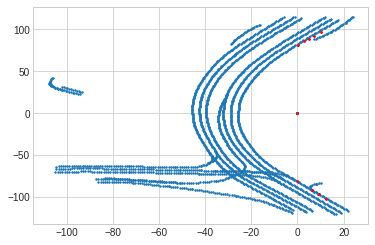

In [20]:
import numpy as np
batch=0
prev_feat=np.empty([0,6])
for idx in range(lane_node_feats.shape[1]):
    feat=lane_node_feats[batch,idx].cpu()
    prev_feat=np.r_[prev_feat,feat]

import matplotlib.pyplot as plt
x=prev_feat[:,0]
y=prev_feat[:,1]
plt.scatter(x,y,s=2)

motion=np.array(concat[batch].cpu())

x=motion[:,0]
y=motion[:,1]
plt.scatter(x,y,s=3,color='r')


In [14]:
data['map_representation']['lane_node_feats'].shape

(218, 20, 6)

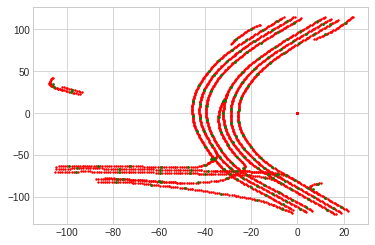

In [32]:
x,y=data_test['map_representation']['lane_node_feats'][batch,:,:,0].flatten(),data_test['map_representation']['lane_node_feats'][batch,:,:,1].flatten()
plt.scatter(x.cpu(),y.cpu(),s=2,color='r')


x,y=data_test['map_representation']['lane_ctrs'][batch,:,0],data_test['map_representation']['lane_ctrs'][batch,:,1]
plt.scatter(x.cpu(),y.cpu(),s=3,color='g')

In [31]:
data_test['map_representation']['lane_ctrs'].shape

torch.Size([36, 296, 2])

In [15]:
hist


tensor([[[  85.0252, -107.9808,    0.6942,   -2.0000],
         [  80.0219, -102.3110,    0.6983,   -1.5002],
         [  75.0120,  -96.6339,    0.7025,   -0.9997],
         [  70.0941,  -90.8804,    0.7066,   -0.4993],
         [  65.2459,  -84.9334,   -0.7939,    0.0000]],

        [[  -6.5201,   -7.4377,   -1.2864,   -1.9486],
         [  -5.1718,   -6.9618,   -1.2428,   -1.4487],
         [  -3.9417,   -6.3271,   -1.1338,   -0.9489],
         [  -2.9003,   -5.6441,   -1.0357,   -0.4993],
         [  -1.8284,   -4.7707,    1.6753,    0.0000]],

        [[  30.9018,  -21.8958,    1.8666,   -1.8989],
         [  29.4595,  -22.3762,    1.8666,   -1.3990],
         [  28.0172,  -22.8566,    1.8666,   -0.8991],
         [  26.5746,  -23.3356,    1.8666,   -0.3992],
         [  25.4232,  -23.7192,   -3.0866,    0.0000]],

        [[ -25.7863,  -28.0576,   -0.7324,   -0.4999],
         [ -23.0704,  -25.2717,    0.6801,    0.0000],
         [   0.0000,    0.0000,    0.0000,    0.0000],
    

In [16]:
future

tensor([[[-8.2116e+01,  1.0817e+02,  6.3683e-01,  1.6500e+01],
         [-7.7983e+01,  1.0231e+02,  6.3683e-01,  1.6000e+01],
         [-7.3736e+01,  9.6514e+01,  6.3683e-01,  1.5500e+01],
         [-6.5246e+01,  8.4933e+01,  6.3683e-01,  1.4501e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 2.5305e+00,  1.2026e+01, -9.0900e-02,  4.5487e+00],
         [ 2.3673e+00,  9.6022e+00, -1.1998e-01,  4.0489e+00],
         [ 2.1331e+00,  7.1842e+00, -1.4906e-01,  3.5489e+00],
         [ 1.8284e+00,  4.7707e+00, -1.7817e-01,  3.0485e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[-3.4701e+01,  3.5543e+01,  6.9020e-01,  1.3948e+01],
         [-2.5423e+01,  2.3719e+01,  6.4660e-01,  1.2449e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 2.6807e+01,  2.8840e+01, -7.8479e-01, 